In [ ]:
import tensorflow

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.cluster import KMeans

from IPython.display import clear_output
import time

from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', None)

In [7]:
pd.set_option('display.max_columns', 40)

sns.set_style('whitegrid')
sns.set_context('notebook')

import warnings
warnings.simplefilter('ignore')

colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*7     # Colors to differentiate clusters

# Loading Data

In [8]:
data = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Final Data\\gym_neighborhood_data.csv')

In [9]:
trans = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Samples/Rio de Janeiro/economia/Transa%C3%A7%C3%B5es_Imobili%C3%A1rias_-_ITBI.csv')

In [10]:
trans_ter = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Samples/Rio de Janeiro/economia/ITBI_-_Transa%C3%A7%C3%B5es_por_Logradouro_-_Im%C3%B3veis_Territoriais.csv')

In [11]:
trans_res = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Samples/Rio de Janeiro/economia/ITBI_-_Transa%C3%A7%C3%B5es_por_Logradouro_-_Im%C3%B3veis_Residenciais_e_N%C3%A3o_Residenciais (1).csv')

In [12]:
fav = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Samples/Rio de Janeiro/favelas/Limites_de_Favelas_e_Urbaniza%C3%A7%C3%A3o.csv')

In [13]:
roubo = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Samples/Rio de Janeiro/segurança/Roubo_de_Rua.csv')

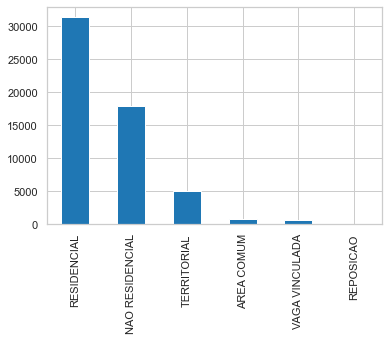

In [9]:
trans['UTILIZACAO'].value_counts().plot.bar()

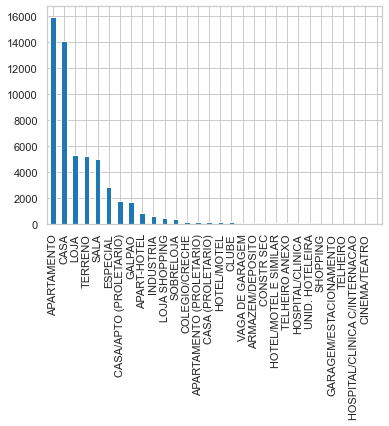

In [30]:
trans['TIPOLOGIA'].value_counts().plot.bar()

In [45]:
len(trans_res.LOGRADOURO.unique())

4206

In [48]:
trans_res.Principais_Tipologias.unique()

array(['APARTAMENTO', 'LOJA', 'SALA', 'CASA/APTO (PROLETARIO)', 'GALPAO',
       'VAGA DE GARAGEM', 'SOBRELOJA', 'APARTAMENTO (PROLETARIO)',
       'LOJA SHOPPING', 'ARMAZEM/DEPOSITO', 'CASA (PROLETARIO)',
       'GARAGEM/ESTACIONAMENTO'], dtype=object)

In [649]:
trans

X             Y   OBJECTID   ANO  MES            NOME  \
0      686234.608719  7.466702e+06          1  2014    1           SAUDE   
1      677250.386438  7.468748e+06          2  2014    1    DEL CASTILHO   
2      655114.431338  7.473288e+06          3  2014    1           BANGU   
3      688876.903489  7.461017e+06          4  2014    1            URCA   
4      664723.099048  7.467109e+06          5  2014    1  JARDIM SULACAP   
...              ...           ...        ...   ...  ...             ...   
55689  686385.578711  7.474610e+06  107318583  2020   11          CACUIA   
55690  685350.048538  7.466692e+06  107318584  2020    7          GAMBOA   
55691  677024.179870  7.467635e+06  107318585  2020   11        CACHAMBI   
55692  681907.471910  7.457172e+06  107318586  2020    8          LEBLON   
55693  671499.781822  7.471171e+06  107318587  2020    4        VAZ LOBO   

            UTILIZACAO    TIPOLOGIA  TOTAL  VALOR_RECOLHIDO  
0      NAO RESIDENCIAL     ESPECIAL      3        411051.79  
1      NAO RESIDENCIAL         SALA     63        348093.30  
2          RESIDENCIAL         CASA     19         72341.57  
3          RESIDENCIAL  APARTAMENTO      3         45164.61  
4          RESIDENCIAL  APARTAMENTO     12         58594.20  
...                ...          ...    ...              ...  
55689      RESIDENCIAL         CASA      2         34068.00  
55690      RESIDENCIAL         CASA      1          4946.18  
55691  NAO RESIDENCIAL         LOJA      1         13363.79  
55692      RESIDENCIAL         CASA      1        513000.00  
55693      RESIDENCIAL         CASA      1          6300.00  

[55694 rows x 10 columns]

In [838]:
var_lst = ['TIPOLOGIA', 'TOTAL']

In [534]:
var_lst = ['TIPOLOGIA', 'VALOR_RECOLHIDO']

In [839]:
logr1 = trans.groupby(['NOME', 'TIPOLOGIA']).sum().reset_index()

dfs = [logr1[logr1['NOME']==hood][var_lst].set_index('TIPOLOGIA').T for hood in logr1['NOME'].unique()]

logr = pd.concat(dfs, axis=0).set_index(logr1['NOME'].unique()).fillna(0)

In [669]:
var_lst = ['UTILIZACAO', 'VALOR_RECOLHIDO']

In [694]:
var_lst = ['UTILIZACAO', 'TOTAL']

In [695]:
logr1 = trans.groupby(['NOME', 'UTILIZACAO']).sum().reset_index()

dfs = [logr1[logr1['NOME']==hood][var_lst].set_index('UTILIZACAO').T for hood in logr1['NOME'].unique()]

logr = pd.concat(dfs, axis=0).set_index(logr1['NOME'].unique()).fillna(0)

# Visualization

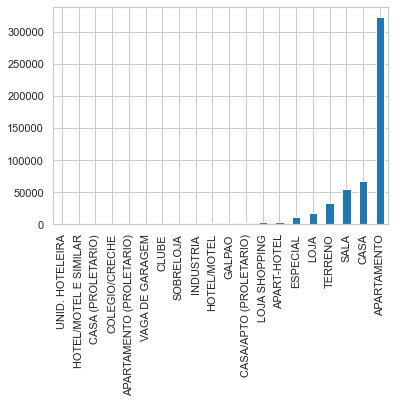

In [840]:
logr.sum(axis=0).sort_values().tail(20).plot.bar()

# Calculating Proportions

In [848]:
for row in logr.index:
    
    logr.loc[row] = (logr.loc[row] / logr.loc[row].sum()).copy()

# Clustering

trans_res['Principais_Tipologias'].value_counts().plot.bar()

In [519]:
from sklearn.preprocessing import MinMaxScaler as mms, StandardScaler as ss

In [544]:
x = 'APARTAMENTO'
y = 'CASA'
z = 'TERRENO'
w = 'SALA'
k = 'LOJA'
l = 'ESPECIAL'

In [654]:
x = 'TERRITORIAL'
y = 'NAO RESIDENCIAL'
z = 'RESIDENCIAL'

In [726]:
logr_log = logr[[x,y,z]].apply(np.log1p)

logr_ss = ss().fit_transform(logr_log)

logr_mms = mms().fit_transform(logr_log)

In [318]:
logr_log = pd.concat([logr[[x]].apply(np.log1p), logr[[y,z]]], axis=1)

logr_ss = ss().fit_transform(logr_log)

logr_mms = mms().fit_transform(logr_log)

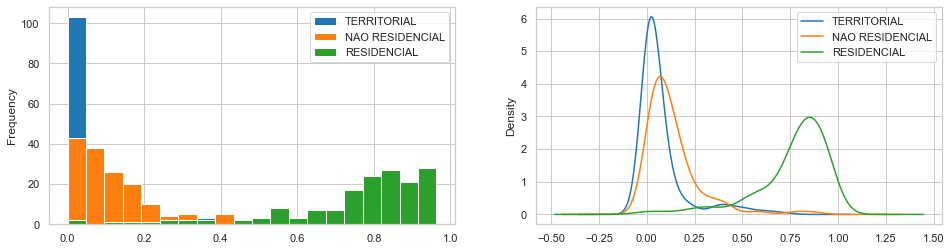

In [729]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
logr[[x,y,z]].plot.hist(bins=20, ax=axes[0])
logr[[x,y,z]].plot.kde(ax=axes[1])

# Optimization

In [730]:
scrs = []

for n_clusters in range(1,50):
    kmeans = KMeans(n_clusters=n_clusters).fit(logr_ss)
    scrs.append([n_clusters, kmeans.inertia_])
    if n_clusters in range(1,50,3): print(n_clusters, kmeans.n_iter_)

scrs_df = pd.DataFrame(scrs, columns=['n_clusters', 'inertia'])

scrs_df.plot(x='n_clusters', y='inertia', xticks=range(50), ylim=(0,200), figsize=(9,4))
plt.show()

# K-Means Clustering

In [421]:
from sklearn.cluster import KMeans

In [731]:
kmeans = KMeans(n_clusters=7, max_iter=30).fit(logr_ss)

In [732]:
logr['cluster'] = kmeans.labels_
clusters = kmeans.labels_

# Density Based Scan Clustering

In [124]:
from sklearn.cluster import DBSCAN

In [127]:
dbs = DBSCAN(eps=0.01, min_samples=1)
dbs.fit(logr[[x,y,z]])
clusters = dbs.labels_

# Mean Shift Clustering

In [135]:
from sklearn.cluster import MeanShift

In [557]:
mean_shift = MeanShift(bandwidth=0.5).fit(logr)

In [558]:
clusters = mean_shift.labels_

# Clustering Visualization

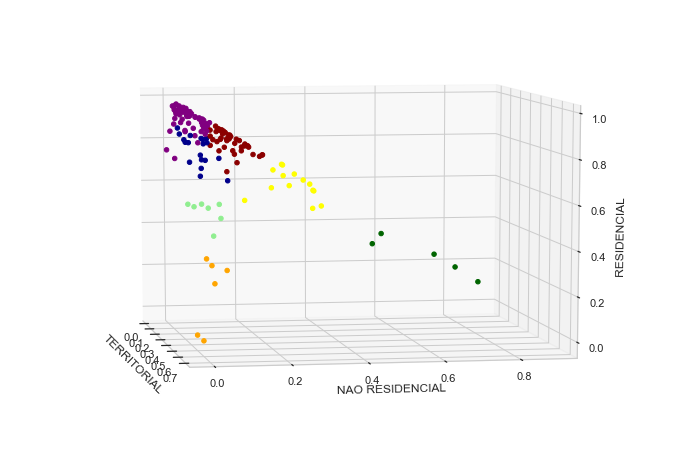

In [733]:
for angle in range(0,360,10):
    
    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(1,1,1, projection='3d')
    
    ax0.scatter(logr[x], logr[y], logr[z], color=[colors[cluster] for cluster in logr['cluster']], alpha=1)
    
#    for cluster in np.unique(clusters):
        
 #       ax0.scatter(logr[clusters==cluster][x], logr[clusters==cluster][y], logr[clusters==cluster][z], color=colors[cluster], alpha=1)
    
    ax0.set_xlabel(x)
    ax0.set_ylabel(y)
    ax0.set_zlabel(z)
    
    ax0.view_init(8,angle)
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)

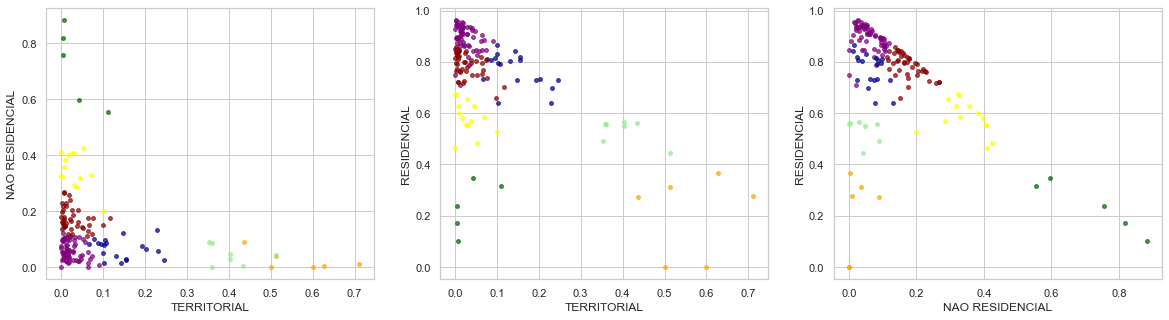

In [734]:
fig = plt.figure(figsize=(20,5))
axes = [fig.add_subplot(1,3,i) for i in range(1,4)]

cnt=0
for i, col1 in enumerate([x,y,z]):
    for j, col2 in enumerate([x,y,z]):
        if i<j:
            
            for cluster in logr['cluster'].unique():
                
                axes[cnt].scatter(logr[logr['cluster']==cluster][col1], logr[logr['cluster']==cluster][col2], color=colors[cluster], s=15, alpha=0.7)
                axes[cnt].set_xlabel(col1)
                axes[cnt].set_ylabel(col2)
            
            cnt+=1

In [735]:
{colors[cluster]: cluster for cluster in np.unique(clusters)}

{'orange': 0,
 'darkblue': 1,
 'yellow': 2,
 'darkred': 3,
 'darkgreen': 4,
 'purple': 5,
 'lightgreen': 6}

In [736]:
logr[logr['cluster'].isin([4])].index

Index(['CAJU', 'CENTRO', 'MARE', 'SANTO CRISTO', 'SAUDE'], dtype='object')

(-10000.0, 250000.0)

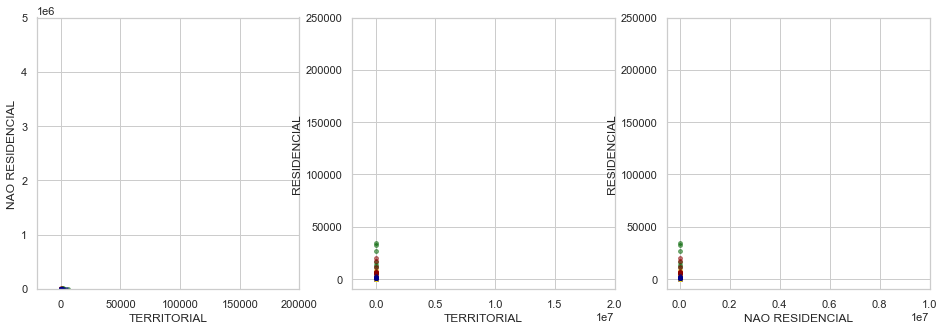

In [721]:
fig = plt.figure(figsize=(16,5))
axes = [fig.add_subplot(1,3,i) for i in range(1,4)]

cnt=0
for i, col1 in enumerate([x,y,z]):
    for j, col2 in enumerate([x,y,z]):
        if i<j:
            
            for cluster in logr['cluster'].unique():
                
                axes[cnt].scatter(logr[logr['cluster']==cluster][col1], logr[logr['cluster']==cluster][col2], color=colors[cluster], s=15, alpha=0.5)
                axes[cnt].set_xlabel(col1)
                axes[cnt].set_ylabel(col2)
            
            cnt+=1
            
axes[0].set_xlim(-20000,0.2e6)
axes[0].set_ylim(-10000,0.5e7)
axes[1].set_xlim(-2000000,0.2e8)
axes[1].set_ylim(-10000,0.25e6)
axes[2].set_xlim(-500000,1e7)
axes[2].set_ylim(-10000,0.25e6)

In [516]:
logr[logr['cluster']==3].index

Index(['BARRA DE GUARATIBA', 'CIDADE UNIVERSITARIA', 'COSMOS', 'GUARATIBA',
       'JOA', 'PACIENCIA', 'PARQUE COLUMBIA', 'PEDRA DE GUARATIBA',
       'SANTA CRUZ', 'SANTISSIMO', 'VARGEM GRANDE', 'VILA MILITAR'],
      dtype='object')

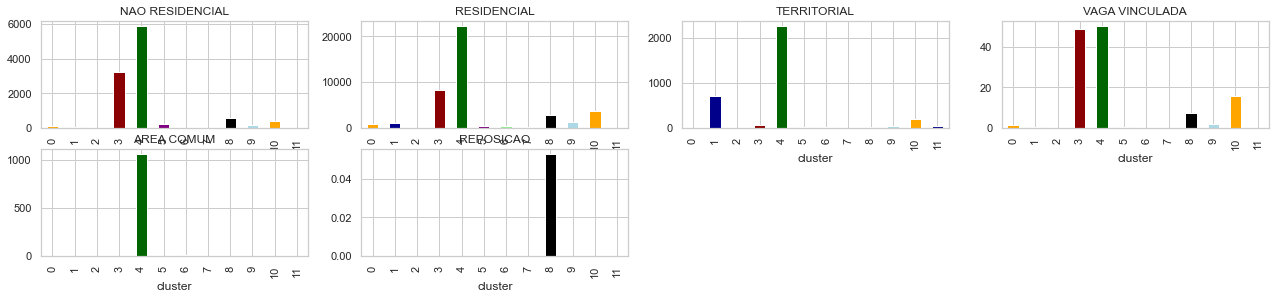

In [722]:
logr_mean = logr.groupby('cluster').mean()

fig = plt.figure(figsize=(22,35))
axes = [fig.add_subplot(15,4,i) for i in range(1, len(logr.columns))]

for i, col in enumerate(logr_mean):
    logr_mean[col].plot(kind='bar', ax=axes[i], title=logr.columns[i], color=[colors[cluster] for cluster in range(len(logr['cluster'].unique()))])

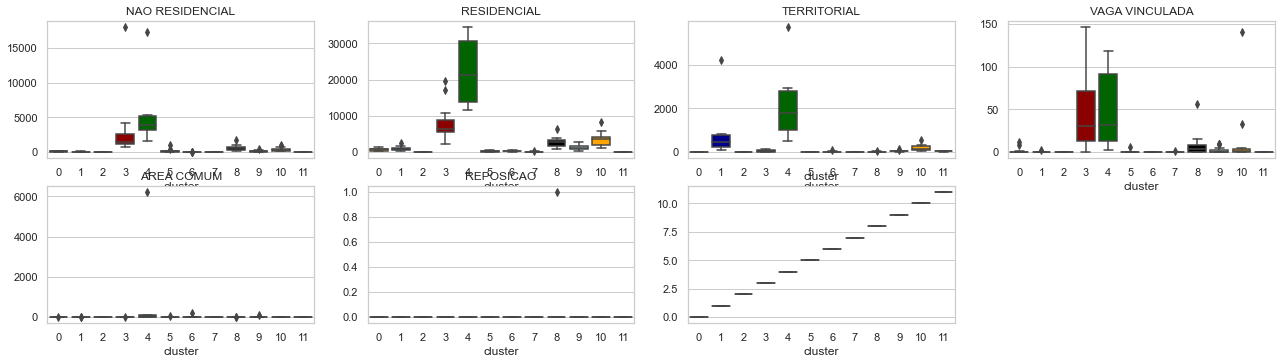

In [723]:
fig = plt.figure(figsize=(22,45))
axes=[fig.add_subplot(15,4,i+1) for i in range(len(logr.columns))]

for i, col in zip(range(len(logr.columns)), logr.columns):
    
    sns.boxplot(data=logr, x='cluster', y=col, ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(col)

    for j in range(len(logr['cluster'].unique())):
        axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

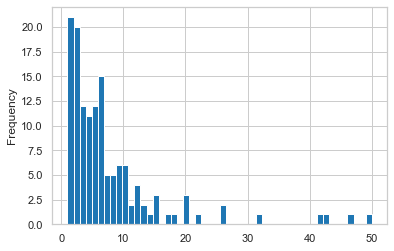

In [184]:
fav.groupby('Bairro').count()['Nome'].plot.hist(bins=50)

In [186]:
roubo.shape

(552, 64)

In [193]:
crimes = roubo.columns[9:-10]

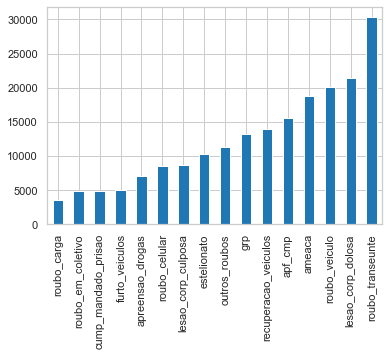

In [745]:
roubo[crimes].sum(axis=0).sort_values().tail(19).head(-3).plot.bar()

In [747]:
top_crimes = roubo[crimes].sum(axis=0).sort_values().tail(19).head(-3).index.tolist()

In [750]:
roubo.loc[:, top_crimes]

roubo_carga  roubo_em_coletivo  cump_mandado_prisao  furto_veiculos  \
0              0                 10                   13              17   
1              1                  9                    3              10   
2              0                  6                    6              18   
3              0                 10                    1               7   
4              0                  7                   14              15   
..           ...                ...                  ...             ...   
547           26                 11                    7              11   
548           51                 55                    5               6   
549            7                 50                    2              46   
550           25                 12                    4              17   
551           28                 36                    4              12   

     apreensao_drogas  roubo_celular  lesao_corp_culposa  estelionato  \
0                   5             18                  11           57   
1                   5             27                  11           48   
2                  13             60                  20           37   
3                   2             30                  18           57   
4                   8             24                  26           60   
..                ...            ...                 ...          ...   
547                 2             57                  21           13   
548                15             34                  28           20   
549                 4             50                  22           37   
550                 5             41                  13           24   
551                14             48                  19           17   

     outros_roubos  grp  recuperacao_veiculos  apf_cmp  ameaca  roubo_veiculo  \
0               26   36                    17       38      50             39   
1               21   28                     4       29      17             23   
2               51   31                    13       33      19             37   
3               32   10                     4       10      23             33   
4               34   42                    12       46      33             31   
..             ...  ...                   ...      ...     ...            ...   
547             33   18                   137       24      30            185   
548            187   42                   356       43      27            393   
549             55   24                    94       26      53            110   
550             39   18                   133       20      36            130   
551            129   35                   301       39      25            222   

     lesao_corp_dolosa  roubo_transeunte  
0                   43                98  
1                   31                59  
2                   42               134  
3                   31                81  
4                   47               129  
..                 ...               ...  
547                 46               147  
548                 38               110  
549                 40               163  
550                 38               139  
551                 37                98  

[552 rows x 16 columns]

In [851]:
dps = roubo.groupby('DP').mean()[top_crimes]

In [853]:
for row in dps.index:
    
    dps.loc[row] = (dps.loc[row] / dps.loc[row].sum()).copy()

In [804]:
dps_log = dps.apply(np.log1p)

dps_ss = ss().fit_transform(dps_log)

dps_mms = mms().fit_transform(dps_log)

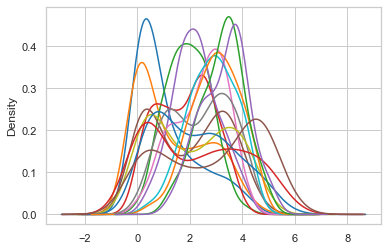

In [805]:
dps.apply(np.log1p).plot.kde(legend=[])

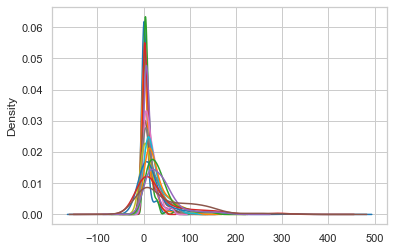

In [806]:
dps.plot.kde(legend=[])

In [807]:
scrs = []

for n_clusters in range(1,50):
    
    kmeans = KMeans(n_clusters=n_clusters).fit(dps_ss)
    scrs.append([n_clusters, kmeans.inertia_])
    if n_clusters in range(1,50,5): print(n_clusters, kmeans.n_iter_)

scrs_df = pd.DataFrame(scrs, columns=['n_clusters', 'inertia'])

1 2
6 6
11 4
16 5
21 4
26 4
31 4
36 5
41 5
46 3


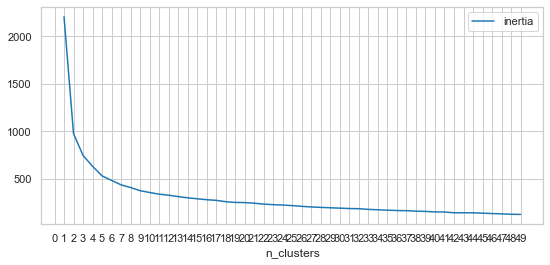

In [808]:
scrs_df.plot(x='n_clusters', y='inertia', xticks=range(50), figsize=(9,4))
plt.show()

In [809]:
kmeans = KMeans(n_clusters=7, max_iter=30).fit(dps_ss)

dps['cluster'] = kmeans.labels_
clusters = kmeans.labels_

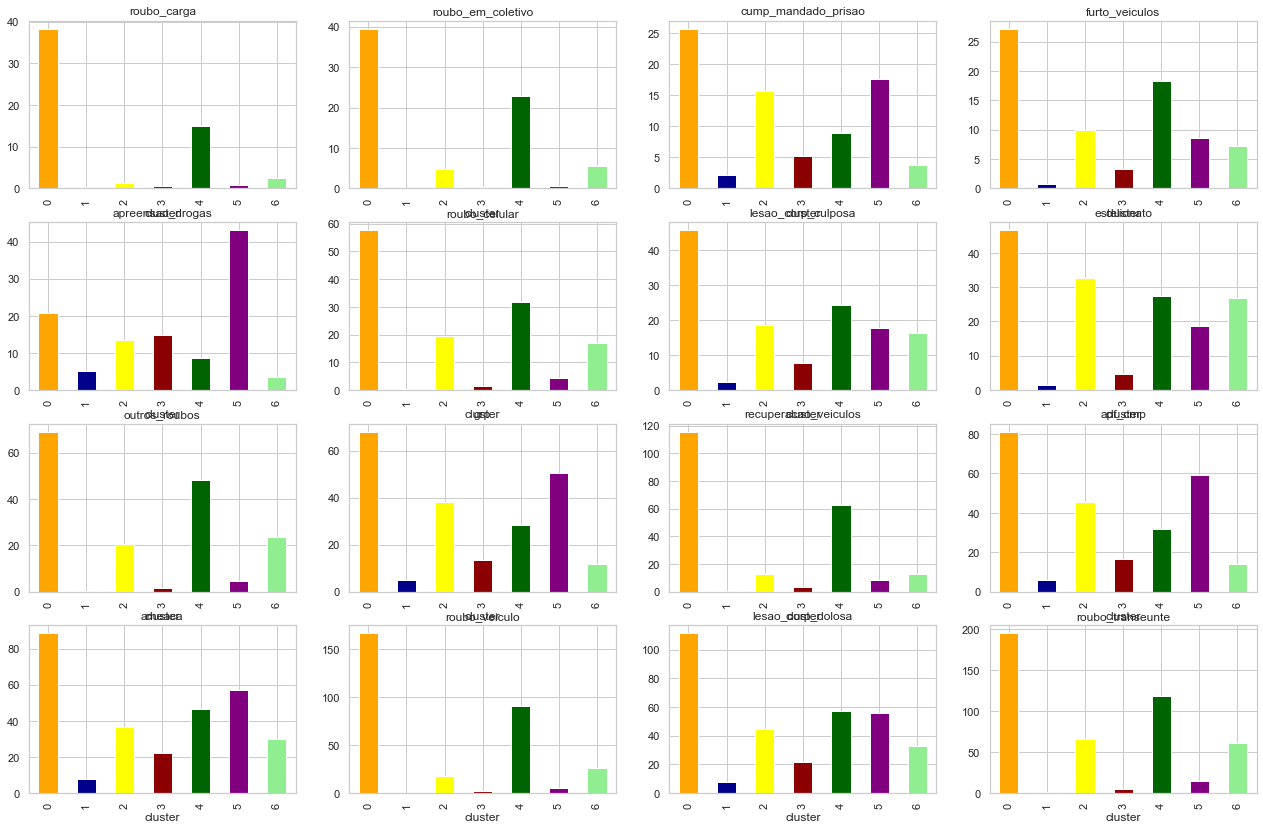

In [810]:
dps_mean = dps.groupby('cluster').mean()

fig = plt.figure(figsize=(22,55))
axes = [fig.add_subplot(15,4,i) for i in range(1, len(dps.columns))]

for i, col in enumerate(dps_mean):
    dps_mean[col].plot(kind='bar', ax=axes[i], title=dps.columns[i], color=[colors[cluster] for cluster in range(len(dps['cluster'].unique()))])

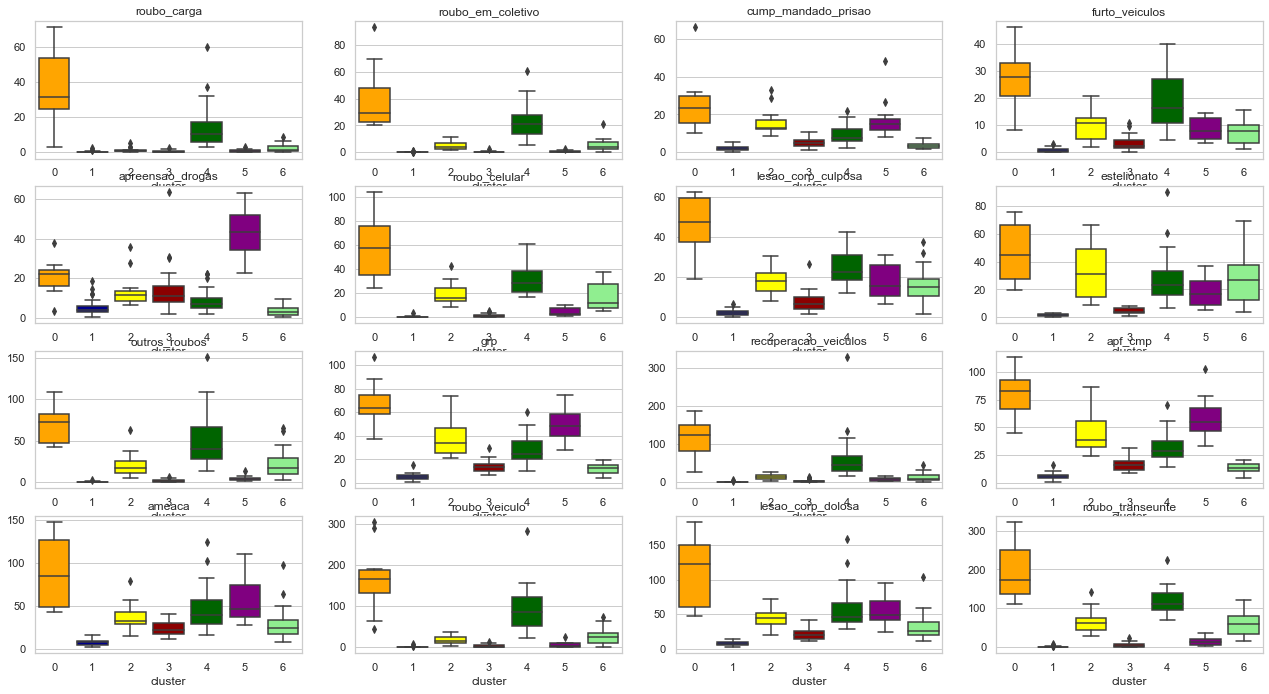

In [811]:
fig = plt.figure(figsize=(22,45))
axes=[fig.add_subplot(15,4,i+1) for i in range(len(dps.columns)-1)]

for i, col in zip(range(len(dps.columns)-1), dps.columns):
    
    sns.boxplot(data=dps, x='cluster', y=col, ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(col)

    for j in range(len(dps['cluster'].unique())):
        axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

In [850]:
dps

roubo_carga  roubo_em_coletivo  cump_mandado_prisao  furto_veiculos  \
DP                                                                         
1           0.75               4.25                  2.0            3.75   
4           1.00              11.75                 18.0            3.50   
5           1.00               9.25                 28.5            6.25   
6           6.50              21.25                  9.0            8.50   
7           1.25               1.75                  2.0            7.75   
..           ...                ...                  ...             ...   
159         0.75               2.75                  2.0            3.00   
165         0.25               1.00                  4.0            9.75   
166         0.50               2.75                 16.5            8.00   
167         0.25               0.00                  7.0            2.50   
168         0.00               0.00                  5.5            1.25   

     apreensao_drogas  roubo_celular  lesao_corp_culposa  estelionato  \
DP                                                                      
1                3.50          27.75                6.00        69.50   
4               11.00          21.00               21.75        11.75   
5               12.25          42.25               13.50        62.25   
6                3.00          18.75               22.75        23.00   
7                2.50           7.75                1.50         3.50   
..                ...            ...                 ...          ...   
159              7.25           1.00               11.00         3.25   
165              2.00           3.00                9.00         6.25   
166             32.00           7.50               11.25         9.25   
167             11.25           1.50                9.75         6.50   
168              3.25           0.50                3.25         1.75   

     outros_roubos    grp  recuperacao_veiculos  apf_cmp  ameaca  \
DP                                                                 
1            14.00  15.25                  2.50    16.75    7.50   
4            16.25  34.00                 18.50    38.75   15.00   
5            62.50  68.25                  5.25    82.00   32.00   
6            25.75  24.50                 45.75    29.00   26.50   
7            38.75   3.75                 11.75     4.25    9.50   
..             ...    ...                   ...      ...     ...   
159           2.00  10.00                  2.75    11.25   18.75   
165           2.00  11.75                  2.75    18.75   30.50   
166           5.00  39.75                 16.25    46.50   36.75   
167           2.50  10.75                  2.75    14.50   18.75   
168           1.25   2.50                  1.00     7.75    6.25   

     roubo_veiculo  lesao_corp_dolosa  roubo_transeunte  cluster  
DP                                                                
1             4.50              10.75             66.50        6  
4             9.75              19.25             69.50        2  
5             9.50              48.00            141.25        2  
6            23.50              39.00             73.75        4  
7            11.50              12.75             41.00        6  
..             ...                ...               ...      ...  
159           2.50              15.75              7.50        3  
165           7.75              24.00              6.75        3  
166          24.25              51.75             18.25        5  
167           0.50              18.25              2.00        3  
168           0.50               4.25              0.00        1  

[138 rows x 17 columns]

(-10000.0, 400000.0)

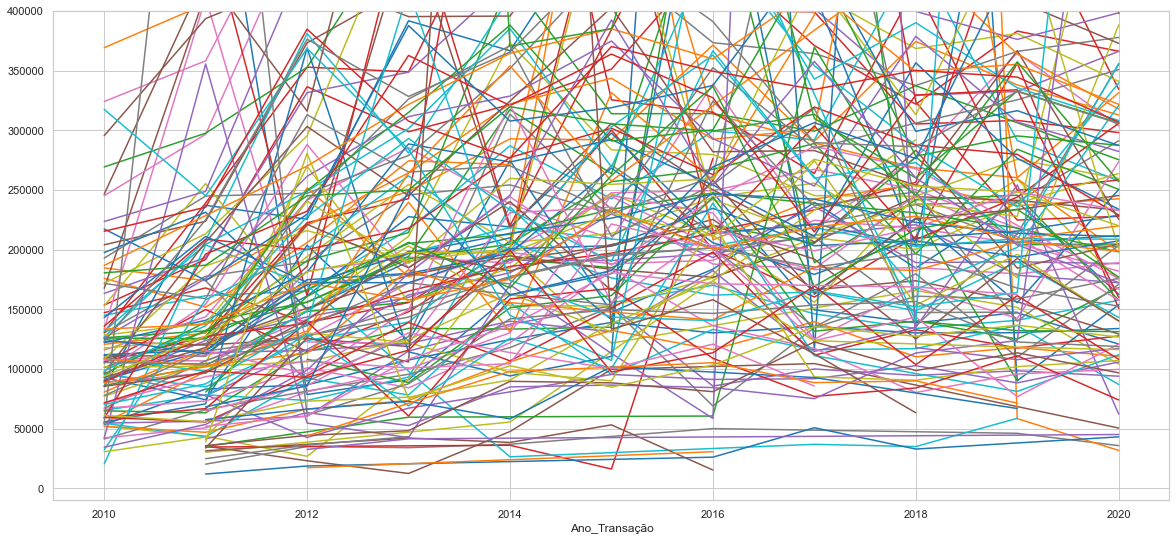

In [829]:
fig, ax0 = plt.subplots(1,1, figsize=(20,9))
for i in range(len(trans_res.Bairro.unique())):
    
    trans_res[trans_res.Bairro==trans_res.Bairro.unique()[i]].groupby('Ano_Transação').mean().plot(y='Média_Valor_Imóvel', ax=ax0, legend=[])

ax0.set_ylim(-1e4,4e5)

In [846]:
logr

APARTAMENTO  APARTAMENTO (PROLETARIO)   CASA  \
ABOLICAO                 558.0                       1.0  192.0   
ACARI                      3.0                       0.0   17.0   
AGUA SANTA               355.0                       0.0  127.0   
ALTO DA BOA VISTA        140.0                       0.0  141.0   
ANCHIETA                 110.0                       0.0  327.0   
...                        ...                       ...    ...   
VILA KOSMOS              205.0                       0.0  240.0   
VILA MILITAR               0.0                       0.0   16.0   
VILA VALQUEIRE          2834.0                       0.0  908.0   
VISTA ALEGRE             239.0                       0.0  180.0   
ZUMBI                    185.0                       0.0   41.0   

                   CASA/APTO (PROLETARIO)  COLEGIO/CRECHE  ESPECIAL  GALPAO  \
ABOLICAO                              1.0             1.0       2.0     2.0   
ACARI                                 1.0             0.0       0.0     2.0   
AGUA SANTA                            2.0             0.0       1.0     0.0   
ALTO DA BOA VISTA                     1.0             0.0      11.0     0.0   
ANCHIETA                              8.0             1.0       5.0     1.0   
...                                   ...             ...       ...     ...   
VILA KOSMOS                          16.0             0.0       1.0     0.0   
VILA MILITAR                          2.0             0.0       0.0     1.0   
VILA VALQUEIRE                        7.0             1.0      11.0     1.0   
VISTA ALEGRE                         36.0             0.0       3.0     3.0   
ZUMBI                                 2.0             1.0       0.0     0.0   

                   INDUSTRIA  LOJA   SALA  TERRENO  CASA (PROLETARIO)  \
ABOLICAO                 1.0  30.0    4.0      9.0                0.0   
ACARI                    1.0   5.0    0.0      4.0                0.0   
AGUA SANTA               1.0  11.0    0.0     15.0                0.0   
ALTO DA BOA VISTA        0.0   2.0    0.0     34.0                0.0   
ANCHIETA                 2.0  29.0    9.0     48.0                1.0   
...                      ...   ...    ...      ...                ...   
VILA KOSMOS              0.0  10.0   45.0     23.0                2.0   
VILA MILITAR             0.0   1.0    0.0     24.0                0.0   
VILA VALQUEIRE           0.0  53.0  146.0    270.0                0.0   
VISTA ALEGRE             1.0  20.0    6.0      6.0                1.0   
ZUMBI                    0.0   4.0    0.0      3.0                0.0   

                   ARMAZEM/DEPOSITO  CINEMA/TEATRO  LOJA SHOPPING  SHOPPING  \
ABOLICAO                        0.0            0.0            0.0       0.0   
ACARI                           0.0            0.0            0.0       0.0   
AGUA SANTA                      0.0            0.0            0.0       0.0   
ALTO DA BOA VISTA               0.0            0.0            0.0       0.0   
ANCHIETA                        0.0            0.0            0.0       0.0   
...                             ...            ...            ...       ...   
VILA KOSMOS                     0.0            0.0            0.0       0.0   
VILA MILITAR                    0.0            0.0            0.0       0.0   
VILA VALQUEIRE                  0.0            0.0            0.0       0.0   
VISTA ALEGRE                    0.0            0.0            0.0       0.0   
ZUMBI                           0.0            0.0            0.0       0.0   

                   CONSTR SEC  TELHEIRO ANEXO  SOBRELOJA  TELHEIRO  \
ABOLICAO                  0.0             0.0        0.0       0.0   
ACARI                     0.0             0.0        0.0       0.0   
AGUA SANTA                0.0             0.0        0.0       0.0   
ALTO DA BOA VISTA         0.0             0.0        0.0       0.0   
ANCHIETA                  0.0             0.0        0.0       0.0   
...                

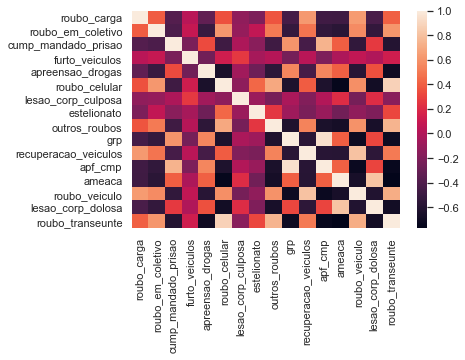

In [854]:
sns.heatmap(dps.corr())

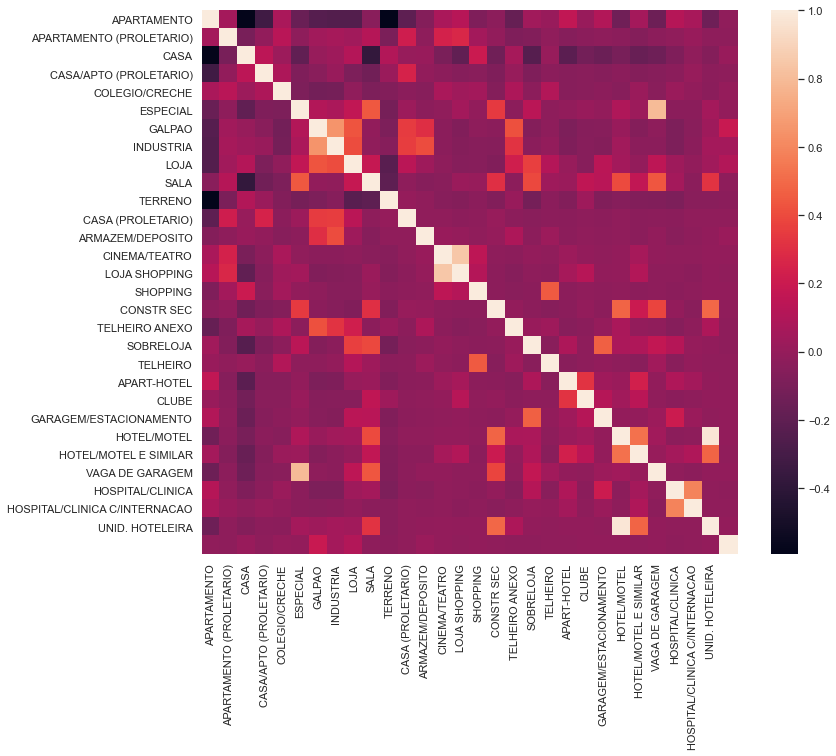

In [849]:
fig, ax0 = plt.subplots(1,1, figsize=(12,10))
sns.heatmap(logr.corr(), ax=ax0)

In [855]:
data

neighborhood  gyms  População  < de 1 ano  1 ano  2 anos  3 anos  \
0             abolição     2    11356.0       111.0   88.0    93.0   105.0   
1    alto da boa vista     8     9343.0       117.0   89.0    96.0    73.0   
2             anchieta     9    55652.0       719.0  740.0   669.0   712.0   
3              andarai     9    39365.0       363.0  352.0   347.0   321.0   
4                 anil     8    24172.0       261.0  215.0   196.0   228.0   
..                 ...   ...        ...         ...    ...     ...     ...   
129      vila da penha     7    25465.0       203.0  191.0   196.0   219.0   
130        vila isabel    23    86018.0       763.0  767.0   756.0   729.0   
131       vila militar     1    13184.0       182.0  201.0   195.0   175.0   
132     vila valqueire     9    32279.0       288.0  288.0   278.0   297.0   
133       vista alegre     1     8622.0        70.0   56.0    63.0    63.0   

     4 anos  5 anos  6 anos  7 anos  8 anos  9 anos  10 anos  11 anos  \
0     109.0    98.0    99.0   104.0   105.0   119.0    146.0    122.0   
1      97.0   109.0    98.0   134.0   117.0   140.0    140.0    145.0   
2     694.0   746.0   762.0   828.0   790.0   865.0    993.0    923.0   
3     331.0   365.0   337.0   336.0   371.0   388.0    450.0    409.0   
4     257.0   231.0   241.0   252.0   233.0   308.0    329.0    324.0   
..      ...     ...     ...     ...     ...     ...      ...      ...   
129   203.0   236.0   206.0   255.0   214.0   256.0    222.0    239.0   
130   761.0   805.0   849.0   802.0   860.0   965.0   1069.0   1039.0   
131   164.0   197.0   189.0   168.0   173.0   192.0    219.0    187.0   
132   305.0   289.0   358.0   329.0   364.0   368.0    403.0    399.0   
133    88.0    82.0    83.0    70.0    81.0    72.0    103.0     87.0   

     12 anos  13 anos  14 anos  15 anos  16 e 17 anos  18 e 19 anos  \
0      135.0    105.0    127.0    147.0         253.0         264.0   
1      127.0    137.0    148.0    112.0         270.0         248.0   
2      948.0    966.0    985.0    987.0        1904.0        1736.0   
3      437.0    451.0    464.0    468.0         970.0        1039.0   
4      319.0    309.0    316.0    335.0         649.0         715.0   
..       ...      ...      ...      ...           ...           ...   
129    298.0    273.0    274.0    268.0         548.0         599.0   
130   1078.0    957.0   1081.0   1166.0        2163.0        2177.0   
131    212.0    196.0    196.0    205.0         433.0         357.0   
132    392.0    480.0    422.0    423.0         856.0         883.0   
133     99.0    118.0     95.0    112.0         222.0         228.0   

     20 a 24 anos  25 a 29 anos  30 a 34 anos  35 a 39 anos  40 a 49 anos  \
0           826.0         940.0         858.0         738.0        1561.0   
1           701.0         706.0         691.0         660.0        1312.0   
2          4610.0        4634.0        4418.0        4105.0        7747.0   
3          2852.0        3332.0        3116.0        2657.0        5387.0   
4          1841.0        2013.0        1941.0        1803.0        3688.0   
..            ...           ...           ...           ...           ...   
129        1722.0        2057.0        1914.0        1785.0        3798.0   
130        6347.0        7626.0        6836.0        6203.0       11794.0   
131         988.0        1209.0        1445.0        1075.0        1692.0   
132        2366.0        2497.0        2544.0        2281.0        4882.0   
133         586.0         671.0         625.0         538.0        1291.0   

     50 a 59 anos  60 a 64 anos  65 a 69 anos  70 a 74 anos  75 a 79 anos  \
0          1691.0         682.0         472.0         459.0         367.0   
1          1253.0         445.0         337.0         290.0         251.0   
2          6624.0        2136.0        1550.0        1177.0         840.0   
3          5722.0        2163.0        1585.0        1445.0        1226.0   
4          3316.0        1226.0  

In [920]:
trans_res

CL               LOGRADOURO  CODBAIRRO                      Bairro  \
0       91264       RUA JOSE PEREGRINO         86  Rocha Miranda                
1       91264       RUA JOSE PEREGRINO         86  Rocha Miranda                
2       91330          AVN LUCIO COSTA        132  Recreio dos Bandeirantes     
3       91330          AVN LUCIO COSTA        128  Barra da Tijuca              
4       91330          AVN LUCIO COSTA        132  Recreio dos Bandeirantes     
...       ...                      ...        ...                         ...   
26783  127449       RUA MODESTO BROCOS         28  Jardim Botânico              
26784  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              
26785  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              
26786  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              
26787  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              

       Total_Transações              Uso     Principais_Tipologias  \
0                     3      RESIDENCIAL               APARTAMENTO   
1                     3      RESIDENCIAL               APARTAMENTO   
2                    16      RESIDENCIAL               APARTAMENTO   
3                   158      RESIDENCIAL               APARTAMENTO   
4                    19      RESIDENCIAL               APARTAMENTO   
...                 ...              ...                       ...   
26783                 3      RESIDENCIAL  APARTAMENTO (PROLETARIO)   
26784                 2  NAO RESIDENCIAL                      SALA   
26785                 3  NAO RESIDENCIAL                      LOJA   
26786                 3  NAO RESIDENCIAL                      SALA   
26787                 2  NAO RESIDENCIAL                      LOJA   

       Média_Percentual_Transferido  Média_Área_Construída  \
0                            100.00                  22.00   
1                            100.00                  40.66   
2                             96.87                 173.75   
3                             96.87                 180.31   
4                             96.88                 201.31   
...                             ...                    ...   
26783                        100.00                  40.66   
26784                        100.00                  67.50   
26785                        100.00                  42.00   
26786                        100.00                  32.33   
26787                        100.00                  41.00   

       Média_Valor_Transação  Média_Valor_Imóvel Principal_Transação_Mercado  \
0                   50712.49            50712.49              COMPRA E VENDA   
1                   89298.85            89298.85              COMPRA E VENDA   
2                 1622825.12          1698048.91              COMPRA E VENDA   
3                 2398400.84          2462901.69              COMPRA E VENDA   
4                 1767230.44          1821146.89              COMPRA E VENDA   
...                      ...                 ...                         ...   
26783              197202.39           197202.39              COMPRA E VENDA   
26784              695623.28           695623.28              COMPRA E VENDA   
26785              395797.51           395797.51              COMPRA E VENDA   
26786              333212.13           333212.13              COMPRA E VENDA   
26787              385180.65           385180.65              COMPRA E VENDA   

       Ano_Transação  CD_UTILIZACAO  OBJECTID  
0               2012              1    209774  
1               2018              1    209774  
2               2017              1    209781  
3               2017              1    209781  
4               2018              1    209781  
...              ...            ...       ...  
26783           2019              1    268408  
26784           2018              2    268410  
26785           2019              2    268410  
26786      

In [878]:
roubo['apreensoes'].unique()

array([nan,  0.])

In [883]:
roubo1 = roubo[crimes].drop(['total_roubos', 'total_furtos'], axis=1).copy()

In [884]:
for row in roubo1.index:
    roubo1.loc[row] = roubo1.loc[row] / roubo1.loc[row].sum()

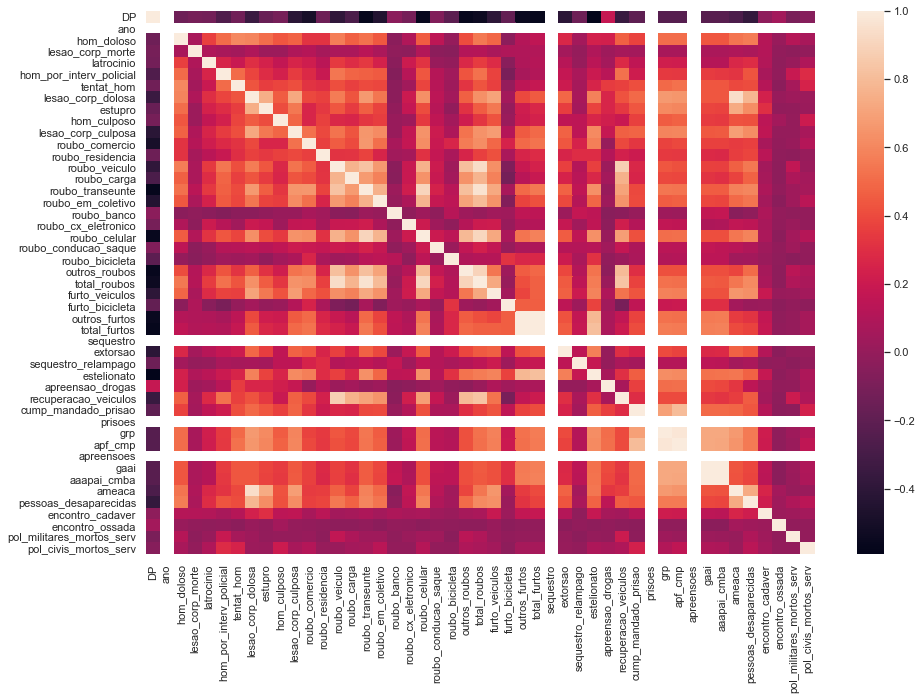

In [892]:
fig, ax0 = plt.subplots(1,1,figsize=(15,10))

sns.heatmap(roubo[['DP', 'ano']+crimes.tolist()].corr())

In [896]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score

In [899]:
l_reg = lr().fit(roubo[['ameaca']], roubo[['lesao_corp_dolosa']])

In [910]:
a = l_reg.coef_[0][0]
b = l_reg.intercept_[0]

In [911]:
x = np.linspace(roubo['ameaca'].min(), roubo['ameaca'].max(), 200)
y_pred = a*x + b

In [909]:
np.arctan(a)*180/np.pi

48.110743373624146

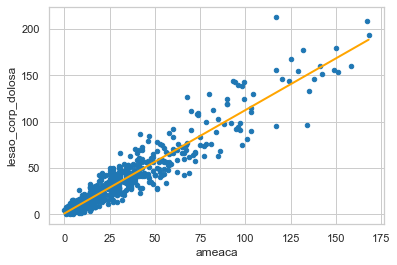

In [916]:
roubo.plot.scatter(x='ameaca', y='lesao_corp_dolosa')
plt.plot(x, y_pred, linewidth=2, color='orange')

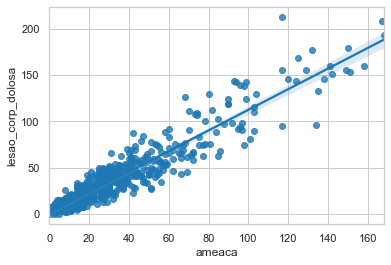

In [917]:
sns.regplot(data=roubo, x='ameaca', y='lesao_corp_dolosa')


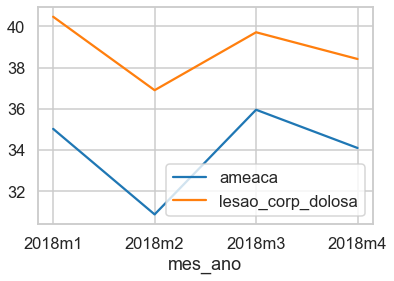

In [76]:
roubo.groupby('mes_ano').mean()[['ameaca', 'lesao_corp_dolosa']].plot()

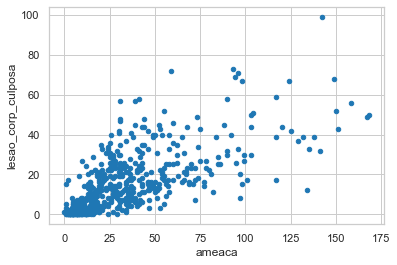

In [893]:
roubo.plot.scatter(x='ameaca', y='lesao_corp_culposa')

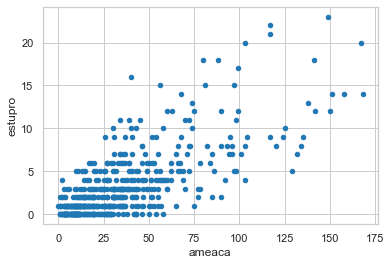

In [894]:
roubo.plot.scatter(x='ameaca', y='estupro')

In [1387]:
bins = [0,340000,1200000,1e15]

In [1378]:
bins_mesh = [[a for j in range(100)] for a in bins]

In [1379]:
oy = np.linspace(0,610,100)

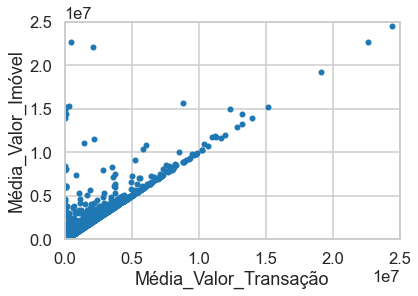

In [184]:
trans_res.plot.scatter(y='Média_Valor_Imóvel', x='Média_Valor_Transação', xlim=(0,2.5e7), ylim=(0,2.5e7))
#[plt.plot(u, oy, linewidth=3) for u in bins_mesh]
plt.show()

In [180]:
float_cols = ['Total_Transações', 'Principais_Tipologias', 'Média_Percentual_Transferido', 'Média_Área_Construída', 'Média_Valor_Transação', 'Média_Valor_Imóvel', 'Ano_Transação']

In [185]:
sns.pairplot(trans_res[float_cols].apply(np.log1p), hue='Principais_Tipologias')
#[plt.plot(u, oy, linewidth=3) for u in bins_mesh]
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log1p method

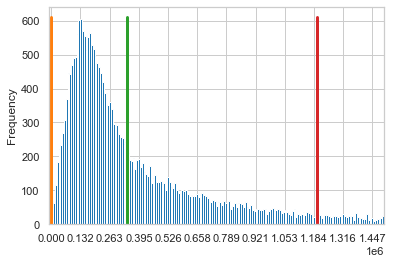

In [1380]:
trans_res['Média_Valor_Transação'].plot.hist(bins=3000, xlim=(-10000,0.15e7), xticks=np.linspace(0,2.5e6, 20))
[plt.plot(u, oy, linewidth=3) for u in bins_mesh]
plt.show()

In [1381]:
trans_res

CL               LOGRADOURO  CODBAIRRO                      Bairro  \
0       91264       RUA JOSE PEREGRINO         86  Rocha Miranda                
1       91264       RUA JOSE PEREGRINO         86  Rocha Miranda                
2       91330          AVN LUCIO COSTA        132  Recreio dos Bandeirantes     
3       91330          AVN LUCIO COSTA        128  Barra da Tijuca              
4       91330          AVN LUCIO COSTA        132  Recreio dos Bandeirantes     
...       ...                      ...        ...                         ...   
26783  127449       RUA MODESTO BROCOS         28  Jardim Botânico              
26784  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              
26785  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              
26786  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              
26787  336107  RUA LUIZ BONFA (MUSICO)        128  Barra da Tijuca              

       Total_Transações              Uso     Principais_Tipologias  \
0                     3      RESIDENCIAL               APARTAMENTO   
1                     3      RESIDENCIAL               APARTAMENTO   
2                    16      RESIDENCIAL               APARTAMENTO   
3                   158      RESIDENCIAL               APARTAMENTO   
4                    19      RESIDENCIAL               APARTAMENTO   
...                 ...              ...                       ...   
26783                 3      RESIDENCIAL  APARTAMENTO (PROLETARIO)   
26784                 2  NAO RESIDENCIAL                      SALA   
26785                 3  NAO RESIDENCIAL                      LOJA   
26786                 3  NAO RESIDENCIAL                      SALA   
26787                 2  NAO RESIDENCIAL                      LOJA   

       Média_Percentual_Transferido  Média_Área_Construída  \
0                            100.00                  22.00   
1                            100.00                  40.66   
2                             96.87                 173.75   
3                             96.87                 180.31   
4                             96.88                 201.31   
...                             ...                    ...   
26783                        100.00                  40.66   
26784                        100.00                  67.50   
26785                        100.00                  42.00   
26786                        100.00                  32.33   
26787                        100.00                  41.00   

       Média_Valor_Transação  Média_Valor_Imóvel Principal_Transação_Mercado  \
0                   50712.49            50712.49              COMPRA E VENDA   
1                   89298.85            89298.85              COMPRA E VENDA   
2                 1622825.12          1698048.91              COMPRA E VENDA   
3                 2398400.84          2462901.69              COMPRA E VENDA   
4                 1767230.44          1821146.89              COMPRA E VENDA   
...                      ...                 ...                         ...   
26783              197202.39           197202.39              COMPRA E VENDA   
26784              695623.28           695623.28              COMPRA E VENDA   
26785              395797.51           395797.51              COMPRA E VENDA   
26786              333212.13           333212.13              COMPRA E VENDA   
26787              385180.65           385180.65              COMPRA E VENDA   

       Ano_Transação  CD_UTILIZACAO  OBJECTID  
0               2012              1    209774  
1               2018              1    209774  
2               2017              1    209781  
3               2017              1    209781  
4               2018              1    209781  
...              ...            ...       ...  
26783           2019              1    268408  
26784           2018              2    268410  
26785           2019              2    268410  
26786      

# Bagging

In [16]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score as acc_scr, confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder as le


In [216]:
cols = [trans_res.columns[4], trans_res.columns[9], trans_res.columns[10]]

In [217]:
#x = trans_res.iloc[:, 3:-1].drop(['Média_Valor_Transação','Média_Valor_Imóvel'], axis=1)
x = trans_res.iloc[:, 3:-1].drop(cols[1:], axis=1)

In [218]:
#x['Bairro'] = [i.lower().strip().replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u') for i in x['Bairro']]

#x = pd.merge(x, data.rename(columns={'neighborhood':'Bairro'}), on='Bairro')

for i in [0,2,3,6]:   
#for i in [0,1,2,-3]:
#for i in [3]:
    x.iloc[:,i] = le().fit_transform(x.iloc[:,i])

x.fillna(0, inplace=True)

In [219]:
x[[x.columns[1], x.columns[5]]] = x[[x.columns[1], x.columns[5]]].apply(np.log1p)

In [236]:
x[x.columns[4]] = x[x.columns[4]]**3

In [237]:
x = pd.DataFrame(ss().fit_transform(x))

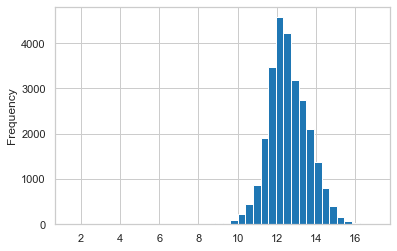

In [252]:
trans_res[cols[1]].apply(np.log1p).plot.hist(bins=40)
#trans_res[cols[1]].plot.hist(bins=40)

In [245]:
np.quantile(trans_res[cols[1]].apply(np.log1p), 0.95)

14.337905771377137

In [290]:
#bins = [0,150000,340000,1200000,2500000,1e15]
bins = [0, np.quantile(trans_res[cols[1]].loc[x.index].apply(np.log1p), 0.25), 1e5]

#bins = [0,80000,195000,350000,1000000,1e15]

#y = pd.cut(trans_res['Média_Valor_Transação'].loc[x.index], bins=bins, labels=range(len(bins)-1))
y = pd.cut(trans_res[cols[1]].loc[x.index].apply(np.log1p), bins=bins, labels=range(len(bins)-1))

y.value_counts()

1    20091
0     6697
Name: Média_Valor_Transação, dtype: int64

In [291]:
msk = np.random.rand(len(y)) < 0.8

x_train, x_test, y_train, y_test = x[msk], x[~msk], y[msk], y[~msk]

y_train.value_counts()/y.value_counts()

1    0.799612
0    0.799612
Name: Média_Valor_Transação, dtype: float64

# Neural Network

In [292]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization

from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [293]:
x_train.shape

(21420, 9)

In [294]:
nn = Sequential()

nn.add(Dense(18, input_shape=(x_train.shape[1],), activation='sigmoid'))
#nn.add(Dense(6, input_shape=(x_train.shape[1],), activation='sigmoid'))


#nn.add(Dense(12, activation='sigmoid'))
#nn.add(Dense(12, activation='sigmoid'))

#nn.add(Dense(12, activation='sigmoid'))


#nn.add(Dense(6, input_shape=(12,), activation='sigmoid'))
#nn.add(Dense(6, input_shape=(12,), activation='sigmoid'))
#nn.add(Dense(6, input_shape=(12,), activation='sigmoid'))

nn.add(Dense(1, activation='sigmoid'))

nn.compile(SGD(lr=0.003), 'binary_crossentropy', metrics=['accuracy'])

nn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 18)                180       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 19        
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [295]:
model = nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=75, verbose=1)

Epoch 1/75
670/670 [==============================] - 2s 1ms/step - loss: 0.5766 - accuracy: 0.7448 - val_loss: 0.5569 - val_accuracy: 0.7500
Epoch 2/75
670/670 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7471 - val_loss: 0.5429 - val_accuracy: 0.7500
Epoch 3/75
670/670 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.7508 - val_loss: 0.5301 - val_accuracy: 0.7500
Epoch 4/75
670/670 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7517 - val_loss: 0.5182 - val_accuracy: 0.7500
Epoch 5/75
670/670 [==============================] - 1s 1ms/step - loss: 0.5160 - accuracy: 0.7517 - val_loss: 0.5069 - val_accuracy: 0.7502
Epoch 6/75
670/670 [==============================] - 1s 1ms/step - loss: 0.5048 - accuracy: 0.7511 - val_loss: 0.4962 - val_accuracy: 0.7513
Epoch 7/75
670/670 [==============================] - 1s 1ms/step - loss: 0.4937 - accuracy: 0.7527 - val_loss: 0.4859 - val_accuracy: 0.7534
Epoch 

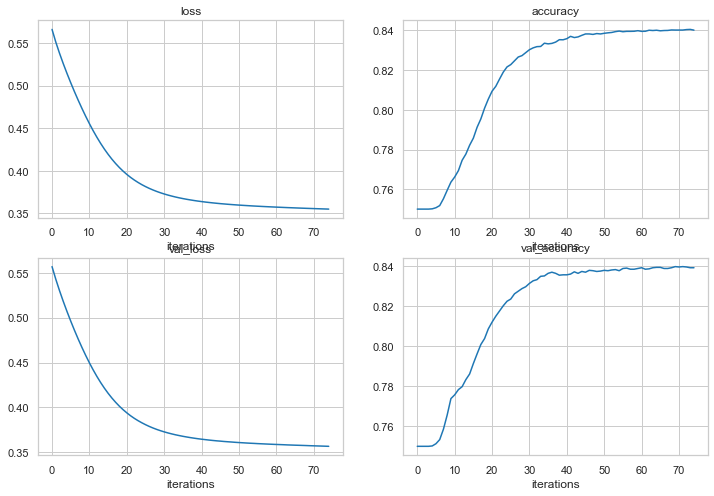

In [296]:
keys = [key for key in model.history.keys()]

fig = plt.figure(figsize=(12,8))
axes = [fig.add_subplot(2,2,i) for i in range(1,5)]


for i in range(4):
    
    axes[i].plot(model.history[keys[i]])
    axes[i].set(title=keys[i], xlabel='iterations')

In [272]:
from sklearn.metrics import confusion_matrix, classification_report

In [297]:
print(classification_report(y_test, nn.predict_classes(x_test)))
confusion_matrix(y_test, nn.predict_classes(x_test))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65      1342
           1       0.87      0.92      0.90      4026

    accuracy                           0.84      5368
   macro avg       0.79      0.76      0.77      5368
weighted avg       0.83      0.84      0.83      5368



array([[ 794,  548],
       [ 315, 3711]], dtype=int64)

In [ ]:
# Grid Search

In [ ]:
from sklearn.linear_model import LogisticRegression

In [129]:
log_reg = LogisticRegression(penalty='l2', max_iter=500, solver='saga')

In [130]:
from sklearn.ensemble import VotingClassifier

In [133]:
estimators = [('log_reg',log_reg), ('GV_GBC',GV_GBC)]


In [134]:
vc = VotingClassifier(estimators, voting='soft')

In [135]:
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(max_iter=500, solver='saga')),
                             ('GV_GBC',
                              GridSearchCV(estimator=GradientBoostingClassifier(),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.1,
                                                                         0.2],
                                                       'max_features': [6, 7,
                                                                        8],
                                                       'n_estimators': [160,
                                                                        250],
                                                       'subsample': [1.0]},
                                           scoring='accuracy'))],
                 voting='soft')

In [136]:
y_pred = vc.predict(x_test)

In [137]:
acc_scr(y_test, y_pred)

0.7757359834989687

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.1)
ABC.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=10)

In [126]:
y_pred = ABC.predict(x_test)

In [127]:
acc_scr(y_test, y_pred)

0.7110444402775173

In [125]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.1)
ABC.fit(x_train, y_train)

In [121]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': [1,3,5,15,100],
              'learning_rate': [0.1, 0.01]}

# The grid search object
GV_ABC = GridSearchCV(ABC, 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_ABC = GV_ABC.fit(x_train, y_train)

In [110]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': [160,250],
              'learning_rate': [0.1, 0.2],
              'subsample': [1.0],
              'max_features': [6,7,8]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(x_train, y_train)

In [112]:
# The best model
GV_GBC.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_features=8, n_estimators=250)

In [122]:
# The best model
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100)

In [114]:
pd.DataFrame(GV_GBC.cv_results_).loc[GV_GBC.best_index_], GV_GBC.best_score_

(mean_fit_time                                                    38.9081
 std_fit_time                                                     3.24456
 mean_score_time                                                 0.125046
 std_score_time                                                 0.0261943
 param_learning_rate                                                  0.2
 param_max_features                                                     8
 param_n_estimators                                                   250
 param_subsample                                                        1
 params                 {'learning_rate': 0.2, 'max_features': 8, 'n_e...
 split0_test_score                                               0.810445
 split1_test_score                                               0.825793
 split2_test_score                                                 0.8125
 split3_test_score                                               0.816931
 split4_test_score                    

The error metrics. Classification report is particularly convenient for multi-class cases.

In [115]:
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.66       412
           1       0.86      0.91      0.89      2726
           2       0.84      0.82      0.83      1718
           3       0.83      0.80      0.82       491

    accuracy                           0.85      5347
   macro avg       0.83      0.78      0.80      5347
weighted avg       0.85      0.85      0.84      5347



In [123]:
from sklearn.metrics import classification_report

y_pred = GV_ABC.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1312
           1       0.72      0.73      0.72      1835
           2       0.80      0.79      0.80      1711
           3       0.68      0.64      0.66       363
           4       0.67      0.67      0.67       112

    accuracy                           0.75      5333
   macro avg       0.72      0.72      0.72      5333
weighted avg       0.75      0.75      0.75      5333



The confusion matrix. Note that the gradient boosted model has a little trouble distinguishing between activity class 1 and 2.

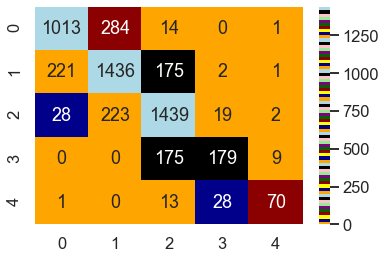

In [138]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
### END SOLUTION

In [69]:
oob_scrs = []
for n_trees in [1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,25,35,50,65]:
    
    bc = BaggingClassifier(n_estimators=n_trees, oob_score=True).fit(x_train, y_train)

    etc = ExtraTreesClassifier(n_estimators=n_trees, oob_score=True, bootstrap=True).fit(x_train, y_train)

    rf  = RandomForestClassifier(n_estimators=n_trees, oob_score=True).fit(x_train, y_train)
    
    bc_pred = bc.predict(x_test)
    etc_pred = etc.predict(x_test)
    rf_pred = rf.predict(x_test)    

    oob_scrs.append([n_trees, bc.oob_score_, etc.oob_score_, rf.oob_score_]+[acc_scr(y_test, pred) for pred in [bc_pred, etc_pred, rf_pred]])

    print(n_trees)
    if n_trees in [1,9,25]: 
        if input()=='exit': break

oob_df = pd.DataFrame(oob_scrs, columns=['n_trees', 'oob bc', 'oob etc', 'oob rf', 'acc bc', 'acc etc', 'acc rf'])

1


3
5
6
7
8
9


10
11
12
13
14
15
16
17
25


35
50
65


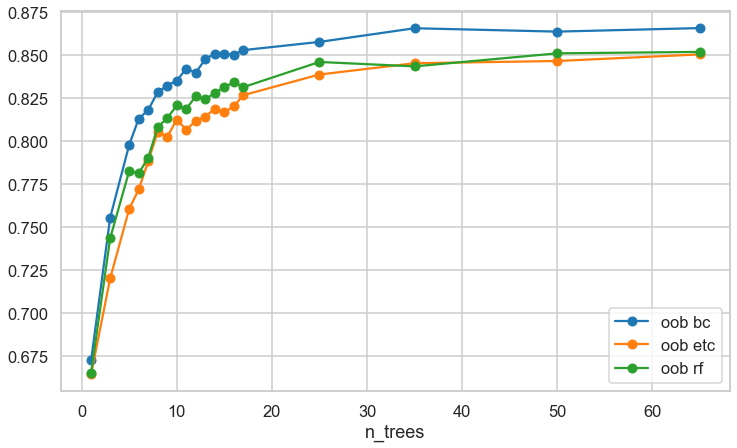

In [70]:
oob_df.set_index('n_trees').iloc[:,:3].plot(marker='o', figsize=(12,7))

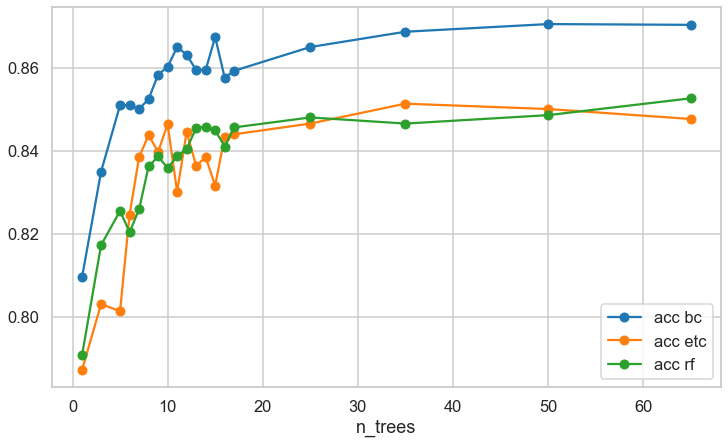

In [71]:
oob_df.set_index('n_trees').iloc[:,3:].plot(marker='o', figsize=(12,7))

In [92]:
bc = BaggingClassifier(max_features=6, oob_score=True).fit(x_train, y_train)

etc = ExtraTreesClassifier(oob_score=True, bootstrap=True).fit(x_train, y_train)

rf  = RandomForestClassifier(oob_score=True).fit(x_train, y_train)

In [93]:
y_pred = bc.predict(x_test)

In [94]:
acc_scr(y_test, y_pred)

0.8591065292096219

In [95]:
y_pred = etc.predict(x_test)

In [96]:
acc_scr(y_test, y_pred)

0.862733867888507

In [97]:
y_pred = rf.predict(x_test)

In [98]:
acc_scr(y_test, y_pred)

0.8592974417716686

In [99]:
feat_imp = pd.Series(etc.feature_importances_, index=x.columns)

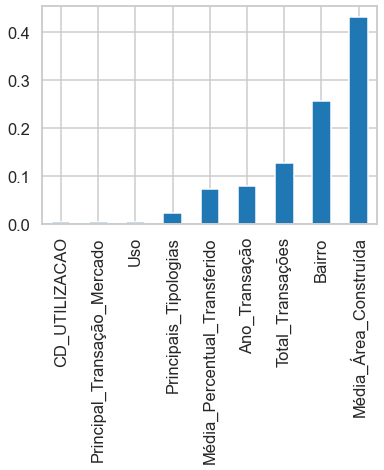

In [100]:
feat_imp.sort_values().tail(20).plot.bar()

In [1360]:
feat = feat_imp.sort_values().tail(15).index

In [14]:
fav

OBJECTID_12  Cod_Favela                                       Nome  \
0               1         683                         Vila São Sebastião   
1               2         672                       Rua Tenente Lassance   
2               3         407                              Fazenda Velha   
3               4         671                     Rua Adalberto Tanajura   
4               5         807  Rua Adalberto Tanajura (altura do nº 152)   
...           ...         ...                                        ...   
1013         1014          80                          Morro dos Macacos   
1014         1015         482                  Condomínio Paco do Lumiar   
1015         1016         503                  Beira Rio (RA - Realengo)   
1016         1017         498          Vila Vitória (RA - São Cristóvão)   
1017         1018          61                                 Vila Arará   

      Cod_Comp                   Complexo                         UPP  \
0         2072         Vila São Sebastião                           N   
1         2072         Vila São Sebastião                           N   
2         2072         Vila São Sebastião                           N   
3         2072         Vila São Sebastião                           N   
4            0                    Isolada                           N   
...        ...                        ...                         ...   
1013      2023          Morro dos Macacos                     Macacos   
1014      2094  Condomínio Paco do Lumiar                           N   
1015         0                    Isolada                       Batan   
1016         0                    Isolada                           N   
1017      2011                 Vila Arará  Manguinhos - Arará/Mandela   

      Pop_SABR  Dom_SABR                                          Fonte  \
0          596       171                  IBGE - Censo Demográfico 2010   
1          131        41                  IBGE - Censo Demográfico 2010   
2          483       158                  IBGE - Censo Demográfico 2010   
3          126        45                  IBGE - Censo Demográfico 2010   
4          208        59                  IBGE - Censo Demográfico 2010   
...        ...       ...                                            ...   
1013      5072      1384                  IBGE - Censo Demográfico 2010   
1014       484       160                  IBGE - Censo Demográfico 2010   
1015       104        37  IPP com base em IBGE - Censo Demográfico 2010   
1016       152        56                  IBGE - Censo Demográfico 2010   
1017      5119      1567                  IBGE - Censo Demográfico 2010   

                           Porte  Bairro  RA   RP  AP  Programa_Urbanizacao_1  \
0     entre 101 e 500 domicílios     107  22  3.6   3                       0   
1               < 100 domicílios     107  22  3.6   3                       0   
2     entre 101 e 500 domicílios     107  22  3.6   3                       0   
3               < 100 domicílios     107  22  3.6   3                       0   
4               < 100 domicílios     107  22  3.6   3                       0   
...                          ...     ...  ..  ...  ..                     ...   
1013            > 500 domicílios      36   9  2.2   2                       1   
1014  entre 101 e 500 domicílios     121  16  4.1   4                       0   
1015            < 100 domicílios     139  33  5.1   5                       0   
1016            < 100 domicílios      12   7  1.1   1                       0   
1017            > 500 domicílios      12   7  1.1   1                       1   

      Programa_Urbanizacao_2  Programa_Urbanizacao_3  Contagem_Domicílios  \
0                          0                       0                    0   
1                          0                       0                    0   
2                          0                       0                    0   
3                          0      

In [188]:
test = pd.read_csv('/Users/luisr/Desktop/AllBooks_baseline_DTM_Unlabelled.csv')

In [192]:
test.describe()

# foolishness        hath   wholesome      takest    feelings  \
count     590.000000  590.000000  590.000000  590.000000  590.000000   
mean        0.003390    0.566102    0.006780    0.001695    0.032203   
std         0.058173    1.777487    0.082129    0.041169    0.488211   
min         0.000000    0.000000    0.000000    0.000000    0.000000   
25%         0.000000    0.000000    0.000000    0.000000    0.000000   
50%         0.000000    0.000000    0.000000    0.000000    0.000000   
75%         0.000000    0.000000    0.000000    0.000000    0.000000   
max         1.000000   14.000000    1.000000    1.000000   11.000000   

            anger  vaivaswata      matrix     kindled     convict      diadem  \
count  590.000000  590.000000  590.000000  590.000000  590.000000  590.000000   
mean     0.059322    0.001695    0.001695    0.006780    0.001695    0.001695   
std      0.326851    0.041169    0.041169    0.082129    0.041169    0.041169   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      4.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           rushed      saliva  revelation  indirectly        open  \
count  590.000000  590.000000  590.000000  590.000000  590.000000   
mean     0.003390    0.003390    0.003390    0.001695    0.057627   
std      0.058173    0.058173    0.058173    0.041169    0.273445   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    3.000000   

       distortions   expecteth   perishing        rage  ...    admireth  \
count   590.000000  590.000000  590.000000  590.000000  ...  590.000000   
mean      0.001695    0.001695    0.001695    0.011864  ...    0.001695   
std       0.041169    0.041169    0.041169    0.108368  ...    0.041169   
min       0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%       0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%       0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%       0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max       1.000000    1.000000    1.000000    1.000000  ...    1.000000   

         foothold       shots      turner   inversion    lifeless  \
count  590.000000  590.000000  590.000000  590.000000  590.000000   
mean     0.003390    0.001695    0.001695    0.003390    0.001695   
std      0.058173    0.041169    0.041169    0.058173    0.041169   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       postponement       stout      taketh      kettle       erred  \
count    590.000000  590.000000  590.000000  590.000000  590.000000   
mean       0.001695    0.001695    0.022034    0.005085    0.003390   
std        0.041169    0.041169    0.146918    0.091995    0.058173   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.000000    0.000000    0.000000    0.000000    0.000000   
50%        0.000000    0.000000    0.000000    0.000000    0.000000   
75%        0.000000    0.000000    0.000000    0.000000    0.000000   
max        1.000000    1.000000    1.000000    2.000000    1.000000   

         thinkest      modern     reigned   sparingly      visual   

In [194]:
test.columns.size

8266

# Drugs Dataset

In [2122]:
drug = pd.read_csv('/Users/luisr/Desktop/drug_consumption.data', delimiter=',')

In [1886]:
text = '''1. ID is number of record in original database. Cannot be related to participant. It can be used for reference only.

2. Age (Real) is age of participant and has one of the values:
Value Meaning Cases Fraction
-0.95197 18-24 643 34.11%
-0.07854 25-34 481 25.52%
0.49788 35-44 356 18.89%
1.09449 45-54 294 15.60%
1.82213 55-64 93 4.93%
2.59171 65+ 18 0.95%
Descriptive statistics
Min Max Mean Std.dev.
-0.95197 2.59171 0.03461 0.87813

3. Gender (Real) is gender of participant:
Value Meaning Cases Fraction
0.48246 Female 942 49.97%
-0.48246 Male 943 50.03%
Descriptive statistics
Min Max Mean Std.dev.
-0.48246 0.48246 -0.00026 0.48246

4. Education (Real) is level of education of participant and has one of the values:
Value Meaning Cases Fraction
-2.43591 Left school before 16 years 28 1.49%
-1.73790 Left school at 16 years 99 5.25%
-1.43719 Left school at 17 years 30 1.59%
-1.22751 Left school at 18 years 100 5.31%
-0.61113 Some college or university, no certificate or degree 506 26.84%
-0.05921 Professional certificate/ diploma 270 14.32%
0.45468 University degree 480 25.46%
1.16365 Masters degree 283 15.01%
1.98437 Doctorate degree 89 4.72%
Descriptive statistics
Min Max Mean Std.dev.
-2.43591 1.98437 -0.00379 0.95004

5. Country (Real) is country of current residence of participant and has one of the values:
Value Meaning Cases Fraction
-0.09765 Australia 54 2.86%
0.24923 Canada 87 4.62%
-0.46841 New Zealand 5 0.27%
-0.28519 Other 118 6.26%
0.21128 Republic of Ireland 20 1.06%
0.96082 UK 1044 55.38%
-0.57009 USA 557 29.55%
Descriptive statistics
Min Max Mean Std.dev.
-0.57009 0.96082 0.35554 0.70015

6. Ethnicity (Real) is ethnicity of participant and has one of the values:
Value Meaning Cases Fraction
-0.50212 Asian 26 1.38%
-1.10702 Black 33 1.75%
1.90725 Mixed-Black/Asian 3 0.16%
0.12600 Mixed-White/Asian 20 1.06%
-0.22166 Mixed-White/Black 20 1.06%
0.11440 Other 63 3.34%
-0.31685 White 1720 91.25%
Descriptive statistics
Min Max Mean Std.dev.
-1.10702 1.90725 -0.30958 0.16618

7. Nscore (Real) is NEO-FFI-R Neuroticism. Possible values are presented in table below:
Nscore Cases Value Nscore Cases Value Nscore Cases Value
12 1 -3.46436 29 60 -0.67825 46 67 1.02119
13 1 -3.15735 30 61 -0.58016 47 27 1.13281
14 7 -2.75696 31 87 -0.46725 48 49 1.23461
15 4 -2.52197 32 78 -0.34799 49 40 1.37297
16 3 -2.42317 33 68 -0.24649 50 24 1.49158
17 4 -2.34360 34 76 -0.14882 51 27 1.60383
18 10 -2.21844 35 69 -0.05188 52 17 1.72012
19 16 -2.05048 36 73 0.04257 53 20 1.83990
20 24 -1.86962 37 67 0.13606 54 15 1.98437
21 31 -1.69163 38 63 0.22393 55 11 2.12700
22 26 -1.55078 39 66 0.31287 56 10 2.28554
23 29 -1.43907 40 80 0.41667 57 6 2.46262
24 35 -1.32828 41 61 0.52135 58 3 2.61139
25 56 -1.19430 42 77 0.62967 59 5 2.82196
26 57 -1.05308 43 49 0.73545 60 2 3.27393
27 65 -0.92104 44 51 0.82562
28 70 -0.79151 45 37 0.91093
Descriptive statistics
Min Max Mean Std.dev.
-3.46436 3.27393 0.00004 0.99808

8. Escore (Real) is NEO-FFI-R Extraversion. Possible values are presented in table below:
Escore Cases Value Escore Cases Value Escore Cases Value
16 2 -3.27393 31 55 -1.23177 45 91 0.80523
18 1 -3.00537 32 52 -1.09207 46 69 0.96248
19 6 -2.72827 33 77 -0.94779 47 64 1.11406
20 3 -2.53830 34 68 -0.80615 48 62 1.28610
21 3 -2.44904 35 58 -0.69509 49 37 1.45421
22 8 -2.32338 36 89 -0.57545 50 25 1.58487
23 5 -2.21069 37 90 -0.43999 51 34 1.74091
24 9 -2.11437 38 106 -0.30033 52 21 1.93886
25 4 -2.03972 39 107 -0.15487 53 15 2.12700
26 21 -1.92173 40 130 0.00332 54 10 2.32338
27 23 -1.76250 41 116 0.16767 55 9 2.57309
28 23 -1.63340 42 109 0.32197 56 2 2.85950
29 32 -1.50796 43 105 0.47617 58 1 3.00537
30 38 -1.37639 44 103 0.63779 59 2 3.27393
Descriptive statistics
Min Max Mean Std.dev.
-3.27393 3.27393 -0.00016 0.99745

9. Oscore (Real) is NEO-FFI-R Openness to experience. Possible values are presented in table below:
Oscore Cases Value Oscore Cases Value Oscore Cases Value
24 2 -3.27393 38 64 -1.11902 50 83 0.58331
26 4 -2.85950 39 60 -0.97631 51 87 0.72330
28 4 -2.63199 40 68 -0.84732 52 87 0.88309
29 11 -2.39883 41 76 -0.71727 53 81 1.06238
30 9 -2.21069 42 87 -0.58331 54 57 1.24033
31 9 -2.09015 43 86 -0.45174 55 63 1.43533
32 13 -1.97495 44 101 -0.31776 56 38 1.65653
33 23 -1.82919 45 103 -0.17779 57 34 1.88511
34 25 -1.68062 46 134 -0.01928 58 19 2.15324
35 26 -1.55521 47 107 0.14143 59 13 2.44904
36 39 -1.42424 48 116 0.29338 60 7 2.90161
37 51 -1.27553 49 98 0.44585
Descriptive statistics
Min Max Mean Std.dev.
-3.27393 2.90161 -0.00053 0.99623

10. Ascore (Real) is NEO-FFI-R Agreeableness. Possible values are presented in table below:
Ascore Cases Value Ascore Cases Value Ascore Cases Value
12 1 -3.46436 34 42 -1.34289 48 104 0.76096
16 1 -3.15735 35 45 -1.21213 49 85 0.94156
18 1 -3.00537 36 62 -1.07533 50 68 1.11406
23 1 -2.90161 37 83 -0.91699 51 58 1.2861
24 2 -2.78793 38 82 -0.76096 52 39 1.45039
25 1 -2.70172 39 102 -0.60633 53 36 1.61108
26 7 -2.53830 40 98 -0.45321 54 36 1.81866
27 7 -2.35413 41 114 -0.30172 55 16 2.03972
28 8 -2.21844 42 101 -0.15487 56 14 2.23427
29 13 -2.07848 43 105 -0.01729 57 8 2.46262
30 18 -1.92595 44 118 0.13136 58 7 2.75696
31 24 -1.77200 45 112 0.28783 59 1 3.15735
32 30 -1.62090 46 100 0.43852 60 1 3.46436
33 34 -1.47955 47 100 0.59042
Descriptive statistics
Min Max Mean Std.dev.
-3.46436 3.46436 -0.00024 0.99744

11. Cscore (Real) is NEO-FFI-R Conscientiousness. Possible values are presented in table below:
Cscore Cases Value Cscore Cases Value Cscore Cases Value
17 1 -3.46436 32 39 -1.25773 46 113 0.58489
19 1 -3.15735 33 49 -1.13788 47 95 0.7583
20 3 -2.90161 34 55 -1.01450 48 95 0.93949
21 2 -2.72827 35 55 -0.89891 49 76 1.13407
22 5 -2.57309 36 69 -0.78155 50 47 1.30612
23 5 -2.42317 37 81 -0.65253 51 43 1.46191
24 6 -2.30408 38 77 -0.52745 52 34 1.63088
25 9 -2.18109 39 87 -0.40581 53 28 1.81175
26 13 -2.04506 40 97 -0.27607 54 27 2.04506
27 13 -1.92173 41 99 -0.14277 55 13 2.33337
28 25 -1.78169 42 105 -0.00665 56 8 2.63199
29 24 -1.64101 43 90 0.12331 57 3 3.00537
30 29 -1.51840 44 111 0.25953 59 1 3.46436
31 41 -1.38502 45 111 0.41594
Descriptive statistics
Min Max Mean Std.dev.
-3.46436 3.46436 -0.00039 0.99752

12. Impulsive (Real) is impulsiveness measured by BIS-11. Possible values are presented in table below:
Impulsiveness Cases Fraction
-2.55524 20 1.06%
-1.37983 276 14.64%
-0.71126 307 16.29%
-0.21712 355 18.83%
0.19268 257 13.63%
0.52975 216 11.46%
0.88113 195 10.34%
1.29221 148 7.85%
1.86203 104 5.52%
2.90161 7 0.37%
Descriptive statistics
Min Max Mean Std.dev.
-2.55524 2.90161 0.00721 0.95446

13. SS (Real) is sensation seeing measured by ImpSS. Possible values are presented in table below:
SS Cases Fraction
-2.07848 71 3.77%
-1.54858 87 4.62%
-1.18084 132 7.00%
-0.84637 169 8.97%
-0.52593 211 11.19%
-0.21575 223 11.83%
0.07987 219 11.62%
0.40148 249 13.21%
0.76540 211 11.19%
1.22470 210 11.14%
1.92173 103 5.46%
Descriptive statistics
Min Max Mean Std.dev.
-2.07848 1.92173 -0.00329 0.96370

14. Alcohol is class of alcohol consumption. It is output attribute with following distribution of classes.

15. Amphet is class of amphetamines consumption. It is output attribute with following distribution of classes.

16. Amyl is class of amyl nitrite consumption. It is output attribute with following distribution of classes.

17. Benzos is class of benzodiazepine consumption. It is output attribute with following distribution of classes:
Value Class Alcohol Amphet Amyl Benzos
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 34 1.80% 976 51.78% 1305 69.23% 1000 53.05%
CL1 Used over a Decade Ago 34 1.80% 230 12.20% 210 11.14% 116 6.15%
CL2 Used in Last Decade 68 3.61% 243 12.89% 237 12.57% 234 12.41%
CL3 Used in Last Year 198 10.50% 198 10.50% 92 4.88% 236 12.52%
CL4 Used in Last Month 287 15.23% 75 3.98% 24 1.27% 120 6.37%
CL5 Used in Last Week 759 40.27% 61 3.24% 14 0.74% 84 4.46%
CL6 Used in Last Day 505 26.79% 102 5.41% 3 0.16% 95 5.04%

18. Caff is class of caffeine consumption. It is output attribute with following distribution of classes.

19. Cannabis is class of cannabis consumption. It is output attribute with following distribution of classes.

20. Choc is class of chocolate consumption. It is output attribute with following distribution of classes.

21. Coke is class of cocaine consumption. It is output attribute with following distribution of classes:
Value Class Caff Cannabis Choc Coke
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 27 1.43% 413 21.91% 32 1.70% 1038 55.07%
CL1 Used over a Decade Ago 10 0.53% 207 10.98% 3 0.16% 160 8.49%
CL2 Used in Last Decade 24 1.27% 266 14.11% 10 0.53% 270 14.32%
CL3 Used in Last Year 60 3.18% 211 11.19% 54 2.86% 258 13.69%
CL4 Used in Last Month 106 5.62% 140 7.43% 296 15.70% 99 5.25%
CL5 Used in Last Week 273 14.48% 185 9.81% 683 36.23% 41 2.18%
CL6 Used in Last Day 1385 73.47% 463 24.56% 807 42.81% 19 1.01%

22. Crack is class of crack consumption. It is output attribute with following distribution of classes.

23. Ecstasy is class of ecstasy consumption. It is output attribute with following distribution of classes.

24. Heroin is class of heroin consumption. It is output attribute with following distribution of classes.

25. Ketamine is class of ketamine consumption. It is output attribute with following distribution of classes:
Value Class Crack Ecstasy Heroin Ketamine
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 1627 86.31% 1021 54.16% 1605 85.15% 1490 79.05%
CL1 Used over a Decade Ago 67 3.55% 113 5.99% 68 3.61% 45 2.39%
CL2 Used in Last Decade 112 5.94% 234 12.41% 94 4.99% 142 7.53%
CL3 Used in Last Year 59 3.13% 277 14.69% 65 3.45% 129 6.84%
CL4 Used in Last Month 9 0.48% 156 8.28% 24 1.27% 42 2.23%
CL5 Used in Last Week 9 0.48% 63 3.34% 16 0.85% 33 1.75%
CL6 Used in Last Day 2 0.11% 21 1.11% 13 0.69% 4 0.21%

26. Legalh is class of legal highs consumption. It is output attribute with following distribution of classes

27. LSD is class of alcohol consumption. It is output attribute with following distribution of classes

28. Meth is class of methadone consumption. It is output attribute with following distribution of classes.

29. Mushrooms is class of magic mushrooms consumption. It is output attribute with following distribution of classes:
Value Class Legalh LSD Meth Mushrooms
Cases Fraction Cases Fraction Cases Fraction Cases Fraction
CL0 Never Used 1094 58.04% 1069 56.71% 1429 75.81% 982 52.10%
CL1 Used over a Decade Ago 29 1.54% 259 13.74% 39 2.07% 209 11.09%
CL2 Used in Last Decade 198 10.50% 177 9.39% 97 5.15% 260 13.79%
CL3 Used in Last Year 323 17.14% 214 11.35% 149 7.90% 275 14.59%
CL4 Used in Last Month 110 5.84% 97 5.15% 50 2.65% 115 6.10%
CL5 Used in Last Week 64 3.40% 56 2.97% 48 2.55% 40 2.12%
CL6 Used in Last Day 67 3.55% 13 0.69% 73 3.87% 4 0.21%

30. Nicotine is class of nicotine consumption. It is output attribute with following distribution of classes.

31. Semer is class of fictitious drug Semeron consumption. It is output attribute with following distribution of classes.

32. VSA is class of volatile substance abuse consumption. It is output attribute with following distribution of classes:
Value Class Nicotine S'''

In [2123]:
columns = [i.split()[1] for i in text.split('\n\n')]

In [2124]:
drug = drug.T.reset_index().T

drug.columns = columns

In [2125]:
for col in drug.columns[13:]:
    
#    drug[col+' ever'] = [0 if a!='CL0' else 1 for a in drug[col]]
    drug[col+' ever'] = [0 if a in ['CL0'] else 1 for a in drug[col]]

In [2126]:
for col in drug:
    
    if col in drug.columns[:6].tolist()+drug.columns[13:].tolist():
        
        drug[col] = le().fit_transform(drug[col].astype(str))

In [2127]:
drug[drug.columns[6:13]] = drug[drug.columns[6:13]].astype(float)

In [2128]:
drug = drug.drop('index')

In [2129]:
from sklearn.ensemble import StackingClassifier


from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score as acc_scr, confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder as le


from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


In [1893]:
drug

ID  Age  Gender  Education  Country  Ethnicity   Nscore   Escore  \
0     1000    0       0          9        7          1 -0.67825  1.93886   
1     1109    3       0          1        7          1 -0.46725  0.80523   
2     1220    1       2          8        7          1 -0.14882 -0.80615   
3     1331    3       2          9        7          1  0.73545 -1.63340   
4     1442    6       2          3        5          1 -0.67825 -0.30033   
...    ...  ...     ...        ...      ...        ...      ...      ...   
1879   983    1       2          2        3          1 -1.19430  1.74091   
1880   984    1       0          2        3          1 -0.24649  1.74091   
1881   985    0       2          7        3          1  1.13281 -1.37639   
1882   986    1       2          2        3          1  0.91093 -1.92173   
1883   987    1       0          2        4          1 -0.46725  2.12700   

       Oscore   Ascore   Cscore  Impulsive       SS  Alcohol  Amphet  Amyl  \
0     1.43533  0.76096 -0.14277   -0.71126 -0.21575        5       2     2   
1    -0.84732 -1.62090 -1.01450   -1.37983  0.40148        6       0     0   
2    -0.01928  0.59042  0.58489   -1.37983 -1.18084        4       0     0   
3    -0.45174 -0.30172  1.30612   -0.21712 -0.21575        4       1     1   
4    -1.55521  2.03972  1.63088   -1.37983 -1.54858        2       0     0   
...       ...      ...      ...        ...      ...      ...     ...   ...   
1879  1.88511  0.76096 -1.13788    0.88113  1.92173        5       0     0   
1880  0.58331  0.76096 -1.51840    0.88113  0.76540        5       0     0   
1881 -1.27553 -1.77200 -1.38502    0.52975 -0.52593        4       6     5   
1882  0.29338 -1.62090 -2.57309    1.29221  1.22470        5       0     0   
1883  1.65653  1.11406  0.41594    0.88113  1.22470        4       3     0   

      Benzos  Caff  Cannabis  Choc  ...  VSA  Alcohol ever  Amphet ever  \
0          0     6         5     7  ...    0             2            1   
1          0     6         4     4  ...    0             2            0   
2          4     5         3     4  ...    0             2            0   
3          0     6         4     7  ...    0             2            1   
4          0     6         0     4  ...    0             1            0   
...      ...   ...       ...   ...  ...  ...           ...          ...   
1879       0     4         6     4  ...    6             2            0   
1880       0     5         4     4  ...    0             2            0   
1881       6     6         7     7  ...    0             2            2   
1882       0     6         7     5  ...    0             2            0   
1883       4     6         4     7  ...    3             2            1   

      Amyl ever  Benzos ever  Caff ever  Cannabis ever  Choc ever  Coke ever  \
0             1            0          2              2          2          1   
1             0            0          2              1          2          0   
2             0            1          2              1          2          1   
3             1            0          2              1          2          0   
4             0            0          2              0          2          0   
...         ...          ...        ...            ...        ...        ...   
1879          0            0          2              2          2          0   
1880          0            0          2              1          2          0   
1881          2            2          2              2          2          2   
1882          0            0          2              2          2          0   
1883          0            1          2              1          2          1   

      Crack ever  Ecstasy ever  Heroin ever  Ketamine ever  Legalh ever  \
0              0             2            0              1            0   
1              0             0            0              0            0   
2              0             0            0              1            0

In [2130]:
j = 31

In [2136]:
j+=1
#j-=2
target = drug.columns[j]
j, target

(37, 'Cannabis ever')

In [2137]:
y = drug[target].copy()

x = drug.drop([target, target[:-5]], axis=1)
#x = drug[drug.columns[1:13]]

msk = np.random.rand(len(y)) < 0.8

x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]

In [2140]:
y = pd.concat([drug[drug[target]!=0].sample(662)[target], drug[drug[target]==0][target]], axis=0)

x = drug.drop([target, target[:-5]], axis=1).loc[y.index]
#x = drug[drug.columns[1:13]].loc[y.index]

msk = np.random.rand(len(y)) < 0.8

x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]

In [2141]:
y_train.value_counts()/y.value_counts()

1    0.782477
0    0.796117
Name: Cannabis ever, dtype: float64

In [2142]:
y_test.value_counts(), y.value_counts()

(1    144
 0     84
 Name: Cannabis ever, dtype: int64,
 1    662
 0    412
 Name: Cannabis ever, dtype: int64)

In [2145]:
acc = []
for i in range(15): 
    
    msk = np.random.rand(len(y)) < 0.8
    x_train, y_train, x_test, y_test = x[msk], y[msk], x[~msk], y[~msk]
    

    log_reg = LogisticRegression().fit(x_train, y_train)
    tree = DecisionTreeClassifier().fit(x_train, y_train)
    bagging = BaggingClassifier(bootstrap=True).fit(x_train, y_train)
    etc = ExtraTreesClassifier(bootstrap=True).fit(x_train, y_train)
    rfc = RandomForestClassifier(bootstrap=True).fit(x_train, y_train)
    gbc = GradientBoostingClassifier().fit(x_train, y_train)
    abc = AdaBoostClassifier().fit(x_train,y_train)
    voting = VotingClassifier([('gbc', gbc),('rfc', rfc),('etc', etc),('bagging',bagging),('abc',abc),('log',log_reg)]).fit(x_train, y_train)
    
    acc.append([acc_scr(y_test, log_reg.predict(x_test)), acc_scr(y_test, tree.predict(x_test)), acc_scr(y_test, bagging.predict(x_test)), acc_scr(y_test, etc.predict(x_test)), acc_scr(y_test, rfc.predict(x_test)), acc_scr(y_test, gbc.predict(x_test)), acc_scr(y_test, abc.predict(x_test)), acc_scr(y_test, voting.predict(x_test))])
    if i in range(5): print(i)
        

0
1
2
3
4


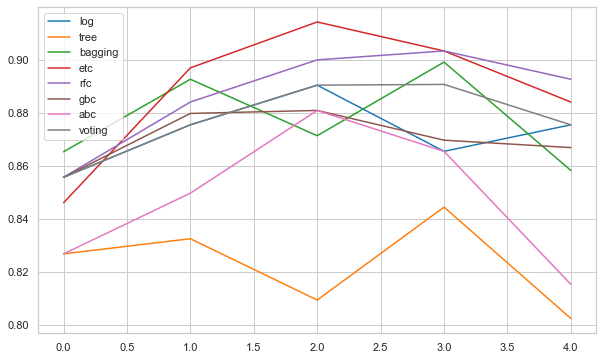

In [2144]:
acc_df = pd.DataFrame(acc, columns=['log', 'tree', 'bagging', 'etc', 'rfc', 'gbc', 'abc', 'voting'])
acc_df.plot(figsize=(10,6))

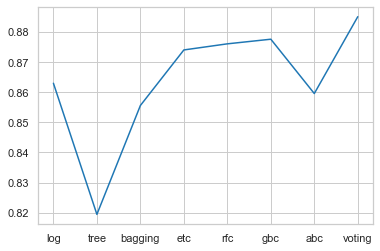

In [2098]:
acc_df.mean(axis=0).plot()

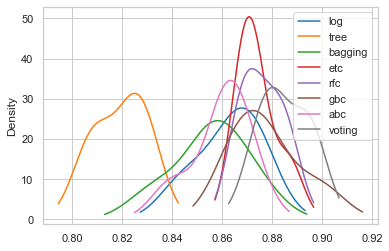

In [2099]:
acc_df.plot.kde()

fig = plt.figure(figsize=(18,44))
axes = [fig.add_subplot(10,3,i) for i in range(1, 29)]

cnt=0
for i, col1 in enumerate(acc_df):
    for j, col2 in enumerate(acc_df):
        if i<j:
            
            acc_df.plot.scatter(x=col1, y=col2, ax=axes[cnt])
            cnt+=1

In [1952]:
log_reg = LogisticRegression().fit(x_train, y_train)

acc_scr(y_test, log_reg.predict(x_test))

0.7546468401486989

In [1953]:
tree = DecisionTreeClassifier().fit(x_train, y_train)

acc_scr(y_test, tree.predict(x_test))

0.6728624535315985

acc = []
for n_est in [10,30,40,50,60,70,80,90,100,110,120,130,150,170]:
#for n_est in [120,130,150,170,190,210,230]:
    
    bagging = BaggingClassifier(n_estimators=n_est).fit(x_train, y_train)

    acc.append([n_est, acc_scr(y_test, bagging.predict(x_test))])
    print(n_est)
    
pd.DataFrame(acc, columns=['n_estimators', 'acc']).set_index('n_estimators').plot()

In [1918]:
bagging = BaggingClassifier(n_estimators=80).fit(x_train, y_train)
acc_scr(y_test, bagging.predict(x_test))

0.7611336032388664

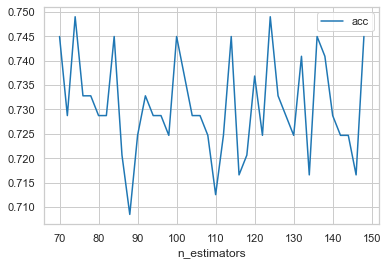

In [1930]:
acc1 = []
for n_est in range(70,150,2):
    etc = ExtraTreesClassifier(n_estimators=n_est).fit(x_train, y_train)
    acc1.append([n_est, acc_scr(y_test, etc.predict(x_test))])
    if n_est in range(1,100,20): print(n_est)
    
pd.DataFrame(acc1, columns=['n_estimators', 'acc']).set_index('n_estimators').plot()

In [1920]:
rfc = RandomForestClassifier().fit(x_train, y_train)

acc_scr(y_test, rfc.predict(x_test))

0.7327935222672065

In [1921]:
gbc = GradientBoostingClassifier().fit(x_train, y_train)

acc_scr(y_test, gbc.predict(x_test))

0.7408906882591093

acc = []

log_reg = LogisticRegression(solver='liblinear', tol=1e-4, C=1, warm_start=True, n_jobs=-1)
test_size=20

for n_est in range(1,test_size):
    
    abc = AdaBoostClassifier(n_estimators=n_est).fit(x_train, y_train)

    acc.append([n_est, acc_scr(y_test, abc.predict(x_test))])
    if n_est in range(1,100,10): print(n_est)

pd.DataFrame(acc, columns=['n_estimators', 'acc']).set_index('n_estimators').plot(xticks=range(1,test_size,5))

In [1472]:
abc = AdaBoostClassifier(n_estimators=7).fit(x_train, y_train)

acc_scr(y_test, abc.predict(x_test))

0.7383720930232558

In [1473]:
voting = VotingClassifier([('gbc', gbc),('rfc', rfc),('etc', etc),('bagging',bagging),('log_reg',log_reg)]).fit(x_train, y_train)

acc_scr(y_test, voting.predict(x_test))

0.7354651162790697

In [1420]:
stacking = StackingClassifier([('gbc', gbc),('rfc', rfc),('etc', etc),('bagging',bagging),('log_reg',log_reg)]).fit(x_train, y_train)

acc_scr(y_test, stacking.predict(x_test))

0.7894736842105263

In [1080]:
stacking.final_estimator_

LogisticRegression()

In [2100]:
models = [log_reg, tree, bagging, etc, rfc, gbc, abc, voting]
models_names = ['log_reg', 'tree', 'bagging', 'etc', 'rfc', 'gbc', 'abc', 'voting']

In [2101]:
k=-1

voting
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       114
           1       0.91      0.91      0.91       174

    accuracy                           0.90       288
   macro avg       0.89      0.89      0.89       288
weighted avg       0.90      0.90      0.90       288



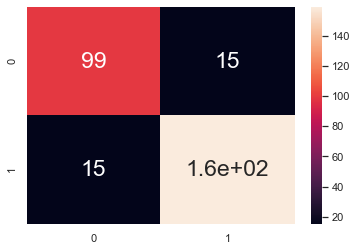

In [2109]:
k+=1

print(models_names[k])
print(classification_report(y_test, models[k].predict(x_test)))
sns.heatmap(confusion_matrix(y_test, models[k].predict(x_test)), annot=True, annot_kws={'fontsize':23})

In [1803]:
1-22/179

0.8770949720670391

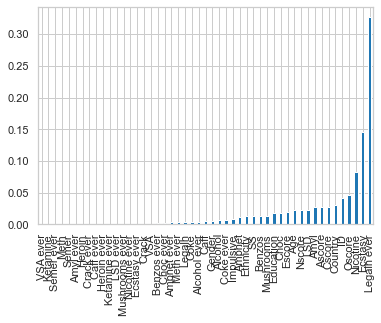

In [2113]:
pd.DataFrame(tree.feature_importances_, index=x.columns.tolist())[0].sort_values().plot.bar()

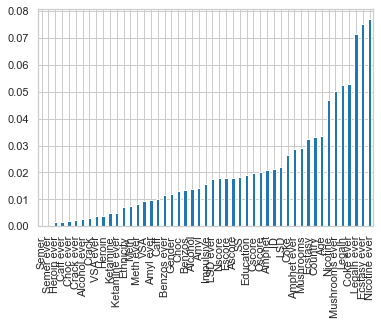

In [2110]:
pd.DataFrame(etc.feature_importances_, index=x.columns.tolist())[0].sort_values().plot.bar()

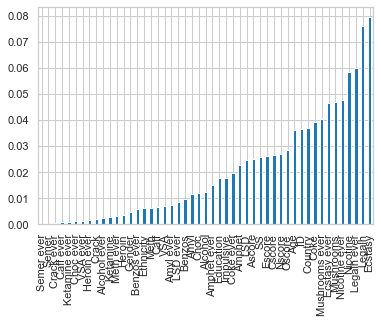

In [2111]:
pd.DataFrame(rfc.feature_importances_, index=x.columns.tolist())[0].sort_values().plot.bar()

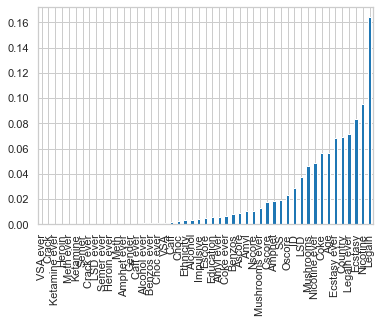

In [2112]:
pd.DataFrame(gbc.feature_importances_, index=x.columns.tolist())[0].sort_values().plot.bar()

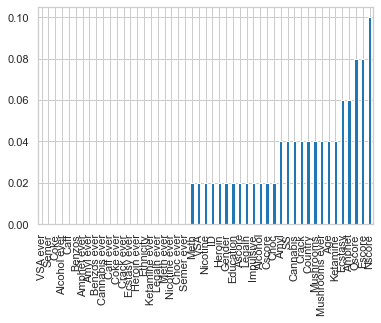

In [1848]:
pd.DataFrame(abc.feature_importances_, index=x.columns.tolist())[0].sort_values().plot.bar()

In [1507]:
scrs_cols = drug.columns[6:11].tolist()

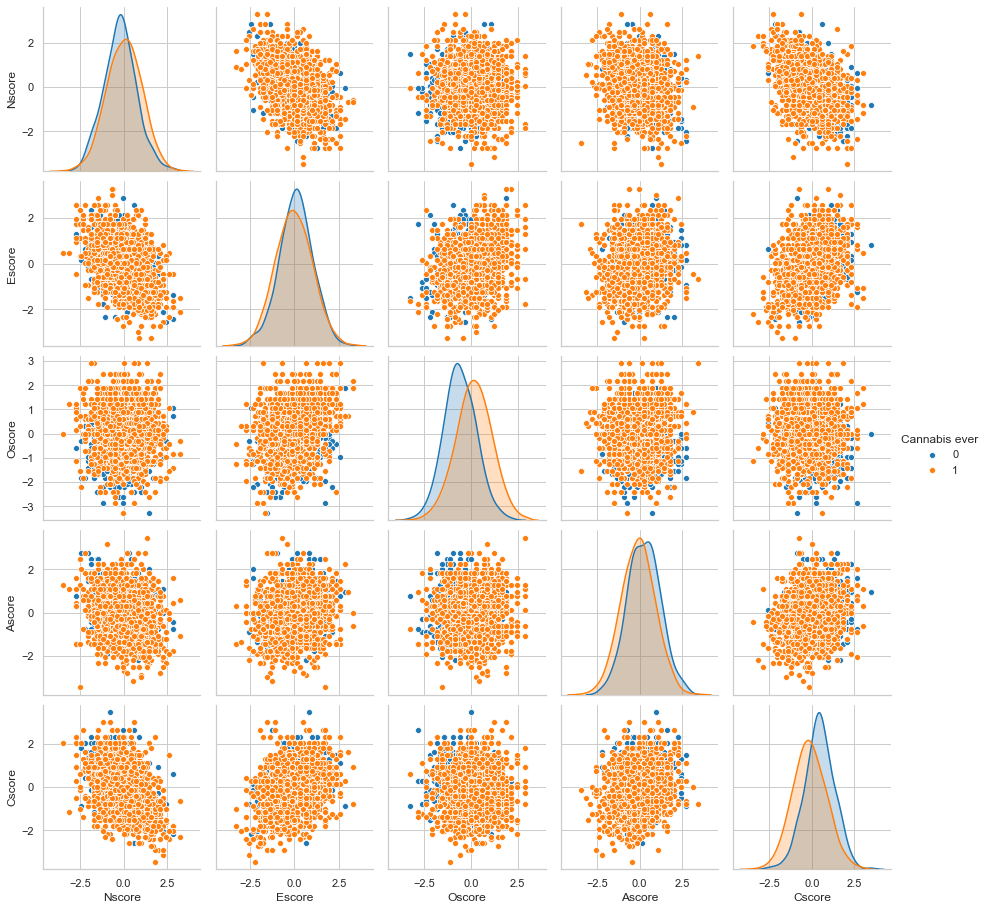

In [2149]:
sns.pairplot(drug[scrs_cols+[target]], hue=target)

In [2117]:
import scipy.stats as sts

In [2247]:
y0 = drug.loc[y.index][y==0]['Nscore']
y1 = drug.loc[y.index][y==1]['Nscore']

In [2248]:
n0 = len(y0)
n1 = len(y1)

u0 = y0.mean()
u1 = y1.mean()

var0 = y0.var()
var1 = y1.var()

std0 = y0.std()
std1 = y1.std()

alfa = 0.95

v = ((var0/n0 + var1/n1)**2) / (((var0/n0)**2)/(n0-1) + ((var1/n1)**2)/(n1-1))

Tobs = (u0-u1)/np.sqrt(var0/n0 + var1/n1)

In [2261]:
l1, l2 = np.linspace(-10,10,100), np.linspace(-3,3,100)

0.01150388666144166


([<matplotlib.lines.Line2D at 0x1a462290040>], None)

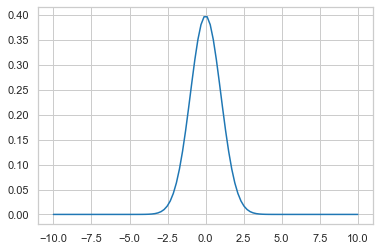

In [2265]:
plt.plot(l1, sts.t(v).pdf(l1)), print(sts.t(v).pdf(l1).var())

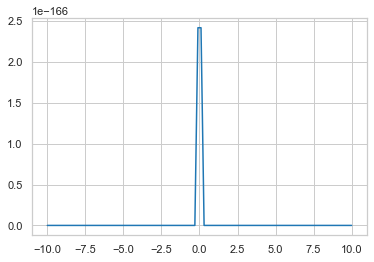

In [2275]:
plt.plot(l1, sts.norm.pdf(l1,0,var0/n0 + var1/n1))

In [2249]:
sts.t(v).cdf(Tobs)

4.949312548642783e-06

In [2250]:
sts.t(v).ppf(0.025)

-1.962565663795991

In [2251]:
sts.t.ppf(0.05, v)

-1.6465242785816598

In [2252]:
Tobs

-4.444343902637166

In [2246]:
(u0, u1), (std0, std1)

((0.09292371359223311, -0.04603867069486398),
 (0.9214295063013618, 1.0116240355023702))

In [2188]:
sts.norm.ppf(0.95, u0, std0)

0.8449722635635774

In [2189]:
sts.norm.ppf(0.05, u1, std1)

-1.4278840276107267

In [2178]:
sts.norm.cdf(u0, u0, np.sqrt(var0/n0))

0.5

In [2190]:
sts.norm.ppf(0.05, u0-u1, std0+std1)

-3.7397395057638105

In [2162]:
sts.norm.ppf(0.95, y0.mean(), y0.var())

0.6536785972875051

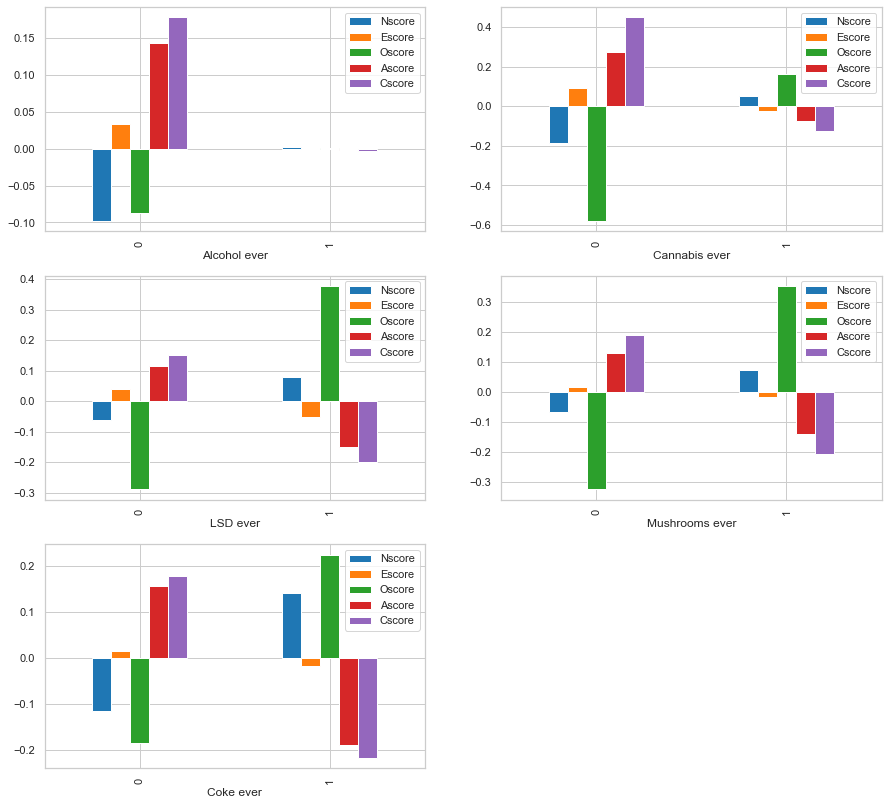

In [2277]:
fig = plt.figure(figsize=(15,14))
axes = [fig.add_subplot(3,2,i) for i in range(1,6)]

for i, target_i in enumerate(['Alcohol ever', 'Cannabis ever', 'LSD ever', 'Mushrooms ever', 'Coke ever']):

    drug[scrs_cols+[target_i]].groupby(target_i).mean().plot.bar(ax=axes[i])

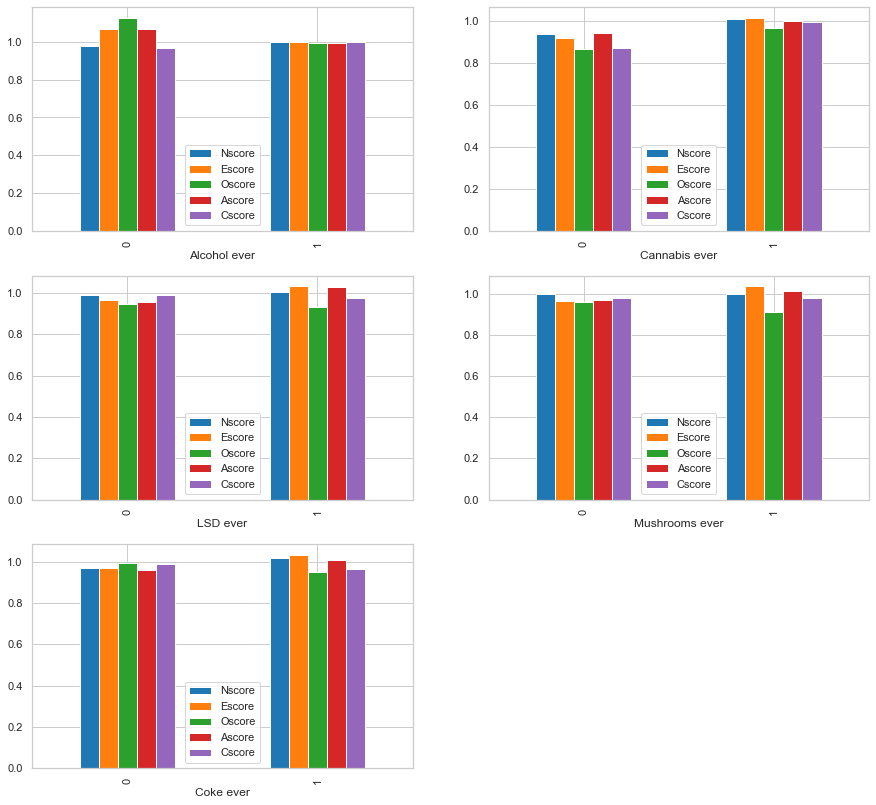

In [2253]:
fig = plt.figure(figsize=(15,14))
axes = [fig.add_subplot(3,2,i) for i in range(1,6)]

for i, target_i in enumerate(['Alcohol ever', 'Cannabis ever', 'LSD ever', 'Mushrooms ever', 'Coke ever']):

    drug[scrs_cols+[target_i]].groupby(target_i).std().plot.bar(ax=axes[i])

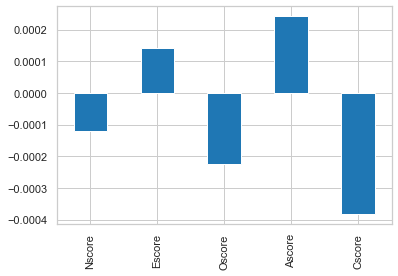

In [1551]:
drug[scrs_cols].mean().plot.bar()

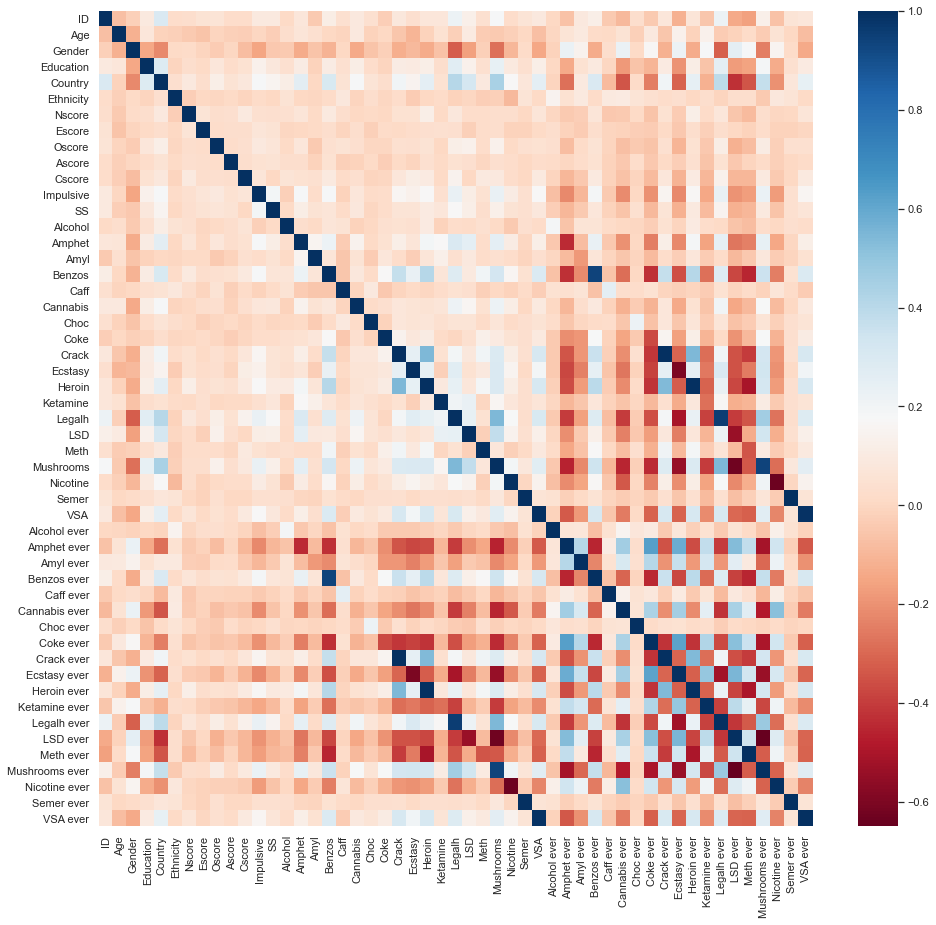

In [2276]:
fig, ax0 = plt.subplots(1,1,figsize=(16,15))

sns.heatmap(drug.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1), ax=ax0, cmap='RdBu')

In [1537]:
drug.groupby(target).mean().iloc[:, -18:]

Alcohol ever  Amphet ever  Amyl ever  Benzos ever  Caff ever  \
Mushrooms ever                                                                 
0                   0.009967     0.253599   0.548173     0.338870   0.002215   
1                   0.025484     0.761468   0.824669     0.707441   0.025484   

                Cannabis ever  Choc ever  Coke ever  Crack ever  Ecstasy ever  \
Mushrooms ever                                                                  
0                    0.013289   0.015504   0.293466    0.746401      0.261351   
1                    0.407747   0.018349   0.786952    0.970438      0.799185   

                Heroin ever  Ketamine ever  Legalh ever  LSD ever  Meth ever  \
Mushrooms ever                                                                 
0                  0.732004       0.631229     0.333333  0.231451   0.613511   
1                  0.961264       0.936799     0.807339  0.875637   0.890928   

                Nicotine ever  Semer ever  VSA ever  
Mushrooms ever                                       
0                    0.090808    0.991141  0.652270  
1                    0.352701    1.000000  0.881753

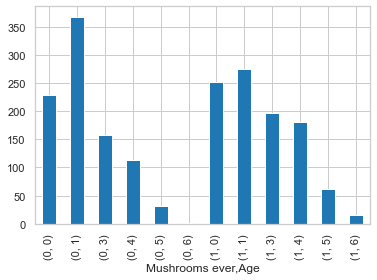

In [1524]:
drug[drug.columns[1:6].tolist()+[target]].groupby([target,'Age']).count()['Gender'].plot.bar()

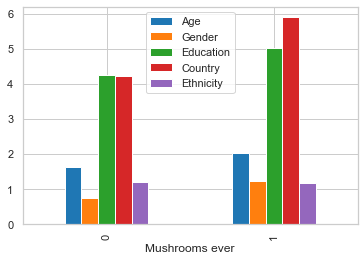

In [1516]:
drug[drug.columns[1:6].tolist()+[target]].groupby(target).count().plot.bar()

In [358]:
### BEGIN SOLUTION

# The parameters to be fit
param_grid = {'n_estimators': [1,10,100,],
              'learning_rate': [0.1, 0.01]}

# The grid search object
gs_cv = GridSearchCV(gbc, 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
gs_cv = gs_cv.fit(x_train, y_train)

In [360]:
acc_scr(y_test, gs_cv.predict(x_test))

0.6987012987012987

In [359]:
print(gs_cv.best_estimator_)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1)


In [ ]:
conda install -c conda-forge keras

In [2278]:
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'

In [2279]:
model=Sequential

NameError: name 'Sequential' is not defined

In [298]:
text = '''Capítulo 1
Coordenadas e distância na reta e
no plano
1. Introdução
A Geometria Analítica nos permite representar pontos da reta por
números reais, pontos do plano por pares ordenados de números reais e pontos
do espaço por ternos ordenados de números reais.
Desse modo, curvas no plano e superfícies no espaço podem ser descritas
por meio de equações, o que torna possível tratar algebricamente muitos
problemas geométricos e, reciprocamente, interpretar de forma geométrica
diversas questões algébricas.
Ao longo destas notas admitiremos que o leitor conheça os principais
axiomas e resultados da Geometria Euclidiana Plana e Espacial, relativos aos
seus elementos básicos: pontos, retas e planos. Por exemplo: por dois pontos
distintos passa uma, e somente uma reta; por três pontos do espaço não
situados na mesma reta passa um, e somente um plano; fixada uma unidade
de comprimento, a cada par de pontos A e B corresponde um número real,
denominado distância entre os pontos A e B ou comprimento do segmento
AB, e designado por d(A, B) ou |AB|, respectivamente, que satisfazem às
seguintes propriedades:
1
2 2.. COORDENADAS E DISTÂNCIA NA RETA
Sejam A, B e C pontos arbitrários. Então:
Teorema 1
a. para todo λ > 0 e para toda semirreta de origem A, existe
um único D nesta semirreta tal que d(A, D) = λ.
b. d(A, B) ≥ 0.
c. d(A, B) = 0 ⇐⇒ A = B.
d. d(A, B) = d(B, A).
e. d(A, B) ≤ d(A, C) + d(C, B)(desigualdade triangular).
f. d(A, B) = d(A, C) + d(C, B) ⇐⇒ A, B e C são colineares
e C está entre A e B.
Figura 1: O ponto C está entre A e B, logo d(A, B) = d(A, C) + d(C, B).
2. Coordenadas e distância na reta
Seja r uma reta.
Dizemos que r é uma reta orientada quando sobre ela se escolheu um
sentido de percurso chamado positivo. O sentido oposto sobre a reta r é
denominado negativo.
Figura 2: Escolha de um sentido de percurso na reta r.
Sejam A e B pontos na reta r. Dizemos que o ponto B está à direita
do ponto A (ou que A está à esquerda de B) quando o sentido de percurso
de A para B coincide com o sentido positivo escolhido na reta r.
Figura 3: B está à direita de A na reta orientada r.
Um eixo E é uma reta orientada na qual é fixado um ponto O, chamado
origem.
Figura 4: Origem O escolhida no eixo E.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 1. COORDENADAS E DISTÂNCIA NA RETA E NO PLANO 3
Todo eixo E pode ser posto em correspondência com o conjunto dos
números reais R da seguinte maneira:
E −→ R
• à origem O do eixo faz-se corresponder o número zero.
• a cada ponto X de E à direita de O corresponde o número real positivo
x = d(O, X).
• a cada ponto X de E à esquerda de O corresponde o número real negativo
x = −d(O, X).
Pode-se provar, usando o teorema 1, item a, que esta correspondência
entre E e R é biunívoca.
Definição 1
O número real x correspondente ao ponto X é chamado coordenada do
ponto X.
Figura 5: Coordenada de um ponto X do eixo E em relação à origem O.
Proposição 1
Sejam X e Y dois pontos sobre o eixo E com coordenadas x e y respectivamente. Então,
d(X, Y ) = |y − x| = |x − y|.
Prova.
Se X = Y , não há o que provar.
Suponhamos então que X 6= Y . Para fixar as idéias, vamos assumir que X
está à esquerda de Y , isto é, x < y. Temos três casos a considerar:
Caso 1. X e Y estão à direita da origem. Isto é, 0 < x < y.
Figura 6: Caso 1: 0 < x < y.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
4 2.. COORDENADAS E DISTÂNCIA NA RETA
Como X está entre O e Y , d(O, X) = x e d(O, Y ) = y, temos por
d(O, Y ) = d(O, X) + d(X, Y ),
que
y = x + d(X, Y ).
Portanto,
d(X, Y ) = y − x = |y − x|.
Caso 2. X e Y estão à esquerda da origem. Isto é, x < y < 0.
Figura 7: Caso 2: x < y < 0.
Neste caso, Y está entre X e O, d(O, X) = −x e d(O, Y ) = −y. Logo,
d(O, X) = d(X, Y ) + d(Y, O) ⇔ −x = d(X, Y ) − y,
ou seja,
d(X, Y ) = y − x = |y − x|.
Caso 3. X e Y estão em lados opostos em relação à origem. Isto é,
x < 0 < y.
Figura 8: Caso 3: x < 0 < y.
Como O está entre X e Y , d(X, Y ) = d(X, O) + d(O, Y ). Além disso,
d(X, O) = −x e d(O, Y ) = y. Logo,
d(X, Y ) = −x + y = y − x = |y − x|.
Verificando assim o desejado. 
Observação 1
• Se X estiver à direita de Y a demonstração é feita de maneira similar.
• Sejam X e Y pontos de coordenadas x e y, e M o ponto médio do
segmento XY de coordenada m. Então, m =
x + y
2
.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 1. COORDENADAS E DISTÂNCIA NA RETA E NO PLANO 5
Figura 9: Sendo M o ponto médio do segmento XY , temos d(M, X) = d(M, Y ).
De fato, suponhamos que X está à esquerda de Y . Como o ponto médio M
está entre X e Y , temos x < m < y. Logo,
d(M, X) = d(M, Y ) ⇐⇒ |x − m| = |y − m|
⇐⇒ m − x = y − m
⇐⇒ 2m = x + y
⇐⇒ m =
x + y
2
.
3. Coordenadas no Plano
Figura 10: Sistema de eixos ortogonais OXY no plano π.
• Designamos por R
2 o conjunto formado pelos pares ordenados (x, y), onde x e y são
números reais. O número x
chama-se primeira coordenada e o número y chamase segunda coordenada do
par ordenado (x, y).
• Um sistema de eixos ortogonais OXY num plano π
é um par de eixos OX e OY ,
tomados em π, que são perpendiculares e têm a mesma origem O.
O eixo−OX é chamado eixo horizontal e o eixo−OY , eixo vertical.
• Um plano π munido de um sistema de eixos ortogonais põe-se, de maneira
natural, em correspondência biunívoca com o conjunto R
2
:
π ←→ R
2
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
6 3.. COORDENADAS NO PLANO
De fato, dado um ponto P ∈ π, tomamos as retas r e s tais que:
Figura 11: Determinando as coordenadas do ponto P ∈ π
◦ r keixo−OY e P ∈ r,
◦ s keixo−OX e P ∈ s.
Se o ponto X de interseção da reta r com o eixo−OX
tem coordenada x no eixo−OX
e se o ponto Y de interseção da
reta s com o eixo−OY tem coordenada y no eixo−OY , associase ao ponto P o par ordenado
(x, y) ∈ R
2
.
Reciprocamente:
Dado o par ordenado (x, y) ∈ R
2
temos que, se:
◦ X é o ponto do eixo−OX de coordenada x;
◦ Y é o ponto do eixo−OY de coordenada y;
◦ r é a reta paralela ao eixo−OY que passa por X;
◦ s é a reta paralela ao eixo−OX que passa por Y , então {P} = r ∩ s.
• Os números x e y chamam-se coordenadas cartesianas do ponto P
relativamente ao sistema de eixos ortogonais fixado.
A coordenada x é a abscissa de P e y é a ordenada de P.
Observação 2
No eixo−OX, os pontos têm coordenadas (x, 0).
No eixo−OY , os pontos têm coordenadas (0, y).
Observação 3
Os eixos ortogonais decompõem o plano em quatro regiões chamadas quadrantes:
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 1. COORDENADAS E DISTÂNCIA NA RETA E NO PLANO 7
Figura 12: Quadrantes e eixos ortogonais no plano.
1
o Quadrante = {(x, y)| x > 0 e y > 0}
2
o Quadrante = {(x, y)| x < 0 e y > 0}
3
o Quadrante = {(x, y)| x < 0 e y < 0}
4
o Quadrante = {(x, y)| x > 0 e y < 0}
Cada ponto do plano pertence a um
dos eixos ortogonais ou a um dos quadrantes.
4. Distância entre dois pontos no plano
Figura 13: Distância entre dois pontos no plano.
Seja π um plano munido
de um sistema de eixos ortogonais OXY e sejam P1 = (x1, y1)
e P2 = (x2, y2) dois pontos do
plano π.
Seja Q = (x1, y2). Como,
d(P1, Q) = |y2 − y1| ,
d(P2, Q) = |x2 − x1| ,
temos, pelo teorema de Pitágoras,
d(P1, P2)
2 = d(P1, Q)
2 + d(P2, Q)
2
⇐⇒ d(P1, P2)
2 = |x2 − x1|
2 + |y2 − y1|
2
⇐⇒ d(P1, P2) = p
(x2 − x1)
2 + (y2 − y1)
2
Exemplo 1
Calcule a distância do ponto A = (−1, 2) ao ponto B = (2, −3).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
8 4.. DISTÂNCIA ENTRE DOIS PONTOS NO PLANO
Solução.
Temos:
d(A, B) = p
(2 − (−1))2 + (−3 − 2)2 =
√
9 + 25 = √
34.

Exemplo 2
Determine para quais valores de m ∈ R os pontos P = (m, 1) e Q = (2m, −m)
têm distância igual a 1.
Solução.
Temos:
d(P, Q) = p
(2m − m)
2 + (−m − 1)2 =
√
2m2 + 2m + 1 = 1
⇐⇒ 2m2 + 2m + 1 = 1
⇐⇒ m(m + 1) = 0
⇐⇒ m = 0 ou m = −1.

Exemplo 3
Determine os pontos P pertencentes ao eixo-OX tais que d(P, A) = 5, onde
A = (1, 3).
Solução.
O ponto P é da forma (x, 0) para algum x ∈ R. Logo,
d(A, P) = p
(x − 1)2 + (0 − 3)2 = 5
⇐⇒ (x − 1)2 + 9 = 25 ⇐⇒ (x − 1)2 = 16
⇐⇒ x − 1 = ±4 ⇐⇒ x = 5 ou x = −3
⇐⇒ P = (5, 0) ou P = (−3, 0).

Definição 2
Dados um ponto A num plano π e o número r > 0, o círculo C de centro
A e raio r > 0 é o conjunto dos pontos do plano π situados à distância r do
ponto A, ou seja:
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 1. COORDENADAS E DISTÂNCIA NA RETA E NO PLANO 9
C = {P ∈ π | d(P, A) = r}.
Seja OXY um sistema de eixos ortogonais no plano π e sejam a e b as
coordenadas do centro A neste sistema de eixos. Então,
P = (x, y) ∈ C ⇐⇒ d(P, A) = r ⇐⇒ d(P, A)
2 = r
2 ⇐⇒
(x − a)
2 + (y − b)
2 = r
2
Assim, associamos ao círculo C uma equação que relaciona a abscissa com a ordenada de cada um de seus
pontos. Uma vez obtida
a equação, as propriedades
geométricas do círculo podem ser deduzidas por métodos algébricos.
Figura 14: Círculo de centro A = (a, b) e raio r > 0.
Exemplo 4
Determine o centro e o raio do círculo dado pela equação:
(a) C : x
2 + y
2 − 4x + 6y = 0.
(b) C : x
2 + y
2 + 3x − 5y + 1 = 0.
Solução.
(a) Completando os quadrados, obtemos:
x
2 − 4x + y
2 + 6y = 0
(x
2 − 4x+4) + (y
2 + 6y+9) = 0+4+9
(x − 2)2 + (y + 3)2 = 13.
Portanto, o círculo C tem centro no ponto A = (2, −3) e raio r =
√
13.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
10 4.. DISTÂNCIA ENTRE DOIS PONTOS NO PLANO
(b) Completando os quadrados, obtemos:
x
2 + 3x + y
2 − 5y = −1

x
2 + 3x+
9
4

+

y
2 − 5y+
25
4

= −1+
9
4
+
25
4

x +
3
2
2
+

y −
5
2
2
=
30
4
.
Assim, C é o círculo de centro no ponto A =

−
3
2
,
5
2

e raio
√
30
2
.
Exemplo 5
Seja OXY um sistema de eixos ortogonais e considere os pontos P1 = (x1, y1)
e P2 = (x2, y2). Então, M =

x1 + x2
2
,
y1 + y2
2

é o ponto médio do
segmento P1P2.
Solução.
Figura 15: M é o ponto médio do segmento P1P2.
De fato, considerando os pontos
Q1 = (xM, y1) e Q2 = (xM, y2), temos que os triângulos 4P1MQ1 e
4P2MQ2 são congruentes (AAL),
onde M = (xM, yM).
Logo,
• d(P1, Q1) = d(P2, Q2)
=⇒ |xM − x1| = |x2 − xM|
=⇒ xM é o ponto médio entre
x1 e x2
=⇒ xM =
x1 + x2
2
.
• d(Q1, M) = d(Q2, M) =⇒ |yM − y1| = |y2 − yM|
=⇒ yM é o ponto médio entre y1 e y2
=⇒ yM =
y1 + y2
2
.
Assim, as coordenadas do ponto médio M do segmento P1P2 são os
valores médios das respectivas coordenadas dos pontos P1 e P2.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 1. COORDENADAS E DISTÂNCIA NA RETA E NO PLANO 11
Exemplo 6
Dados dois pontos A e B do plano π, seja R o conjunto dos pontos equidistantes de A e B, ou seja:
R = {P ∈ π | d(P, A) = d(P, B)}.
Mostre algebricamente que R é a mediatriz do segmento AB, isto é, R
é a reta perpendicular ao segmento AB que passa pelo ponto médio M de
AB.
Solução.
Para isso, escolhemos um sistema de eixos ortogonais OXY de modo que
o eixo−OX seja a reta que passa pelos pontos A e B, com origem no ponto
médio M do segmento AB e orientada de modo que A esteja à esquerda de
B (figura 17).
Neste sistema de eixos, A e B têm coordenadas (−x0, 0) e (x0, 0), respectivamente, para algum número real x0 > 0. Então,
P = (x, y) ∈ R ⇐⇒ d(P, A) = d(P, B) ⇐⇒ d(P, A)
2 = d(P, B)
2
⇐⇒ (x − (−x0))2 + (y − 0)2 = (x − x0)
2 + (y − 0)2
⇐⇒ (x + x0))2 + y
2 = (x − x0)
2 + y
2
⇐⇒ x
2 + 2xx0 + x
2
0 + y
2 = x
2 − 2xx0 + x
2
0 + y
2
⇐⇒ 2xx0 = −2xx0 ⇐⇒ 4xx0 = 0 ⇐⇒ x = 0 ⇐⇒ P ∈ eixo − OY .
Figura 16: Mediatriz e ponto médio de AB. Figura 17: Escolha do sistema de eixos ortogonais
OXY .
Portanto, R = {(x, y) ∈ R
2
| x = 0} = eixo − OY , que é geometricamente
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
12 4.. DISTÂNCIA ENTRE DOIS PONTOS NO PLANO
a reta perpendicular ao segmento AB que passa pelo ponto médio M deste
segmento, como queríamos provar.
Exemplo 7
Dado o ponto P = (x, y), considere os pontos P
0 = (−y, x) e P
00 = (y, −x).
Mostre que os pontos P
0
e P
00 são obtidos a partir do ponto P por uma
rotação de 90o do segmento OP em torno da origem.
Convencionamos dizer que a rotação de 90o que leva o ponto P = (x, y)
ao ponto P
0 = (−y, x) tem sentido positivo, e que a rotação de 90o que
leva o ponto P ao ponto P
00 tem sentido negativo.
Solução.
Figura 18: Posição dos pontos P e P
0 no plano.
Como
(
d(P, O)
2 = (x − 0)2 + (y − 0)2 = x
2 + y
2
d(P
0
, O)
2 = (−y − 0)2 + (x − 0)2 = y
2 + x
2
,
temos que o triângulo 4P OP0
é isósceles.
Além disso,
d(P, P0
)
2 = (−y − x)
2 + (y − x)
2 = y
2 + 2xy + x
2 + x
2 − 2xy + y
2
=⇒ d(P, P0
)
2 = 2(x
2 + y
2
) =⇒ d(P, P0
)
2 = d(P, O)
2 + d(P
0
, O)
2
.
Logo, pela lei dos cossenos, o triângulo 4P OP0
é retângulo em O.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 1. COORDENADAS E DISTÂNCIA NA RETA E NO PLANO 13
Isso significa que o ponto P
0
é obtido a partir do ponto P por uma rotação
de 90o do segmento OP em torno da origem.
Figura 19: P rotacionado de 90o até coincidir com P
0
.
Consideremos agora o ponto P
00 = (y, −x). De maneira análoga, podemos
provar que P
00 é obtido a partir do ponto P por uma rotação de 90o do
segmento OP em torno da origem.
Figura 20: P rotacionado de 90o até coincidir com P
00
.

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
14 4.. DISTÂNCIA ENTRE DOIS PONTOS NO PLANO
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
Capítulo 2
Vetores no plano
1. Paralelogramos
Lembremos que um paralelogramo é um quadrilátero (figura geométrica com quatro lados) cujos lados opostos são paralelos.
Usando congruência de triângulos, podemos verificar que as seguintes
afirmativas são equivalentes:
• O quadrilátero ABDC é um paralelogramo;
• Os lados opostos de ABDC são congruentes;
• Os ângulos opostos de ABDC são congruentes;
• Dois lados opostos de ABDC são congruentes e paralelos;
• As diagonais de ABDC se intersectam num ponto que é o
ponto médio de ambas.
Figura 1: Paralelogramo ABDC.
Por exemplo, vamos demonstrar a seguinte equivalência:
15
16 1.. PARALELOGRAMOS
Proposição 1
No quadrilátero ABDC os lados opostos AC e BD são congruentes e paralelos se, e somente se, as diagonais de ABDC se intersectam num ponto que
é o ponto médio de ambas.
Figura 2: ABDC de lados opostos congruentes e paralelos.
Prova.
(a) Suponhamos que os lados
opostos AC e BD no quadrilátero ABDC são congruentes e paralelos, e seja M o ponto
de interseção das diagonais AD
e BC. Pela hipótese, temos:
• |AC| = |BD|, isto é, os comprimentos dos lados AC e BD são iguais;
• AC k BD.
Logo,
• ACB [ = DBC \, por serem ângulos alternos internos;
• CAD \= BDA \, por serem ângulos alternos internos.
Pelo critério ALA (ângulo-lado-ângulo), concluímos que os triângulos
4AMC e 4DMB são congruentes.
Em particular, |AM| = |DM| e |BM| = |CM|. Portanto, M é o ponto
médio das diagonais AD e BC.
Figura 3: ABDC com |AM| = |DM| e |BM| = |MC|.
(b)Suponhamos agora que as
diagonais AD e BC do quadrilátero ABDC se intersectam no ponto M que é o ponto
médio de ambas.
Devemos mostrar que os lados
opostos AC e BD no paralelogramo ABDC são paralelos e congruentes. Temos:
• |AM| = |DM|
• |BM| = |CM|
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 17
• AMC \ = DMB \, pois são ângulos opostos pelo vértice.
Pelo critério LAL (lado-ângulo-lado), os triângulos 4AMC e 4DMB são
congruentes.
Em particular, |AC| = |DB| e ACB [ = CBD \, ou seja, os lados AC e DB
são congruentes e paralelos. 
Você pode (e deve) demonstrar as outras equivalências da mesma forma.
2. Segmentos orientados
Seja AB um segmento orientado com origem A e extremidade B.
Isto é, no segmento AB estabelecemos um sentido de percurso (orientação)
de A para B.
Figura 4: Os segmentos AB e BA têm sentidos opostos.
Dizemos que o segmento orientado BA tem sentido de percurso (ou
orientação) oposto ou contrário ao do segmento AB. Classificamos os
segmentos orientados da seguinte maneira:
Definição 1
Dizemos que os segmentos AB e CD são equipolentes, e escrevemos AB ≡ CD,
quando satisfazem às três propriedades abaixo:
• AB e CD têm o mesmo comprimento: |AB| = |CD|.
• AB e CD são paralelos ou colineares.
• AB e CD tem o mesmo sentido.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
18 2.. SEGMENTOS ORIENTADOS
Esclarecimento da definição de equipolência
• Se AB e CD são segmentos colineares, então eles têm o mesmo sentido
quando induzem o mesmo sentido de percurso na reta que os contêm.
Figura 5: Segmentos colineares AB e CD que
têm o mesmo sentido.
Figura 6: Segmentos colineares AB e CD que
não têm o mesmo sentido.
• Se AB e CD são segmentos paralelos de igual comprimento, então AB e
CD têm o mesmo sentido quando ABDC é um paralelogramo.
Figura 7: AB ≡ CD, pois ABDC é um paralelogramo.
Figura 8: AB 6≡ CD, pois ABDC não é um paralelogramo.
Proposição 2
AB ≡ CD ⇐⇒ ponto médio de AD = ponto médio de BC
Prova.
Com efeito, se AB k CD já sabemos que a equivalência é verdadeira, pois
ABDC é um paralelogramo.
Vejamos que isso também é verdadeiro quando AB e CD são segmentos
colineares.
Consideremos a reta r que contém A, B, C e D com uma orientação e uma
origem O escolhidas de modo que B esteja à direita de A (figura 9).
Sejam a, b, c e d as respectivas coordenadas dos pontos A, B, C e D na reta
r.
(a) Como AB e CD têm o mesmo sentido, a < b e c < d, e, como estes
segmentos têm o mesmo comprimento, b − a = d − c. Logo,
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 19
b − a = d − c ⇐⇒ a + d = b + c ⇐⇒
a + d
2
=
b + c
2
⇐⇒ ponto médio de AD = ponto médio de BC.
(b) Reciprocamente, suponhamos que o ponto médio de AD é igual ao ponto
médio de BC. Isto é, a + d
2
=
b + c
2
. Então,
a + d = b + c =⇒ b − a = d − c .
Como b − a e d − c têm o mesmo sinal e o mesmo módulo, AB e CD têm
o mesmo sentido e o mesmo comprimento, além de serem colineares (por
hipótese). Assim, AB ≡ CD. 
Figura 9: AB ≡ CD com A, B, C e D colineares.
Proposição 3
Dados A, B e C pontos quaisquer no plano, existe um único ponto D no
plano tal que AB ≡ CD.
Prova.
Como os pontos A, B e C podem ou não ser colineares, temos dois casos
a considerar.
(a) A, B e C são colineares.
Neste caso, a circunferência de centro no ponto C e raio |AB| intersecta a
reta que contém os pontos A, B e C em exatamente dois pontos, mas apenas
um deles, que designamos D, é tal que AB e CD têm o mesmo sentido (veja
a figura 10).
(b) A, B e C não são colineares.
Seja r a reta que passa pelo ponto C e é paralela à reta que contém os pontos
A e B.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
20 3.. VETORES
O círculo de centro C e raio |AB| intersecta a reta r em exatamente dois
pontos, mas só um, que designamos D, é tal que ABDC é um paralelogramo.
Ou seja, AB ≡ CD (veja a figura 11).
Figura 10: AB ≡ CD com A, B e C colineares. Figura 11: AB ≡ CD com A, B e C não colineares.

3. Vetores
Definição 2
Quando os segmentos de reta orientados AB e CD são equipolentes, dizemos
que eles representam o mesmo vetor −→v e escrevemos −→v =
−−→AB .
Isto é, o vetor −→v =
−−→AB é o conjunto que consiste de todos os segmentos orientados equipolentes ao segmento AB. Tais segmentos são chamados
representantes do vetor −→v .
Observação 1
(a) Da definição de vetor, temos AB ≡ CD ⇐⇒ −→v =
−−→AB =
−−→CD .
(b) Por convenção, o vetor nulo é o vetor
−→0 =
−−→AA , qualquer que seja o
ponto A no plano.
(c) Dado um vetor −→v e um ponto qualquer C, existe um único ponto D
tal que −→v =
−−→CD . Isto é, qualquer ponto do plano é origem de um único
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 21
segmento orientado representante do vetor −→v .
Na prática, trabalhamos com vetores usando a sua expressão em relação
a um sistema de eixos ortogonais dado.
Consideremos um sistema de eixos ortogonais OXY no plano, e sejam
A = (a1, a2) C = (c1, c2)
B = (b1, b2) D = (d1, d2)
pontos do plano. A seguinte proposição caracteriza a equipolência em termos
de coordenadas.
Proposição 4
AB ≡ CD ⇐⇒ b1 − a1 = d1 − c1 e b2 − a2 = d2 − c2
Prova.
Pela proposição 2,
AB ≡ CD ⇐⇒ ponto médio de AD = ponto médio de BC
⇐⇒ 
a1 + d1
2
,
a2 + d2
2

=

b1 + c1
2
,
b2 + c2
2

⇐⇒ (a1 + d1, a2 + d2) = (b1 + c1, b2 + c2)
⇐⇒ a1 + d1 = b1 + c1 e a2 + d2 = b2 + c2
⇐⇒ b1 − a1 = d1 − c1 e b2 − a2 = d2 − c2.
como queríamos demonstrar. 
Definição 3
Dados A = (a1, a2) e B = (b1, b2), os números b1 − a1 e b2 − a2 são as
coordenadas do vetor −→v =
−−→AB e escrevemos −→v = (b1 − a1, b2 − a2).
Note que, se AB ≡ CD, então, pela proposição anterior,
−−→AB = (b1 − a1, b2 − a2) = (d1 − c1, d2 − c2) = −−→CD .
Exemplo 1
Sejam A = (1, 2), B = (3, 1) e C = (4, 0). Determine as coordenadas do
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
22 3.. VETORES
vetor −→v =
−−→AB e as coordenadas do ponto D tal que −→v =
−−→CD .
Solução.
Temos −→v =
−−→AB = (3 − 1, 1 − 2) = (2, −1). Além disso, se D = (d1, d2),
temos
−→v =
−−→AB =
−−→CD ⇐⇒ AB ≡ CD
⇐⇒ (2, −1) = (d1 − 4, d2 − 0)
⇐⇒ 2 = d1 − 4 e − 1 = d2 − 0
⇐⇒ d1 = 2 + 4 = 6 e d2 = −1 + 0 = −1 .
Portanto, D = (6, −1).
Corolário 1
Usando a proposição 4, é fácil verificar que:
(a) AB ≡ CD ⇐⇒ AC ≡ BD.
Figura 12: AB ≡ CD ⇐⇒ AC ≡ BD
(b) AB ≡ CD e CD ≡ EF =⇒ AB ≡ EF.
Figura 13: AB ≡ CD e CD ≡ EF =⇒ AB ≡ EF.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 23
Em virtude do item (c) da observação 1, temos:
Proposição 5
Sejam OXY um sistema de eixos ortogonais e −→v =
−−→AB um vetor.
Então existe um único ponto P tal que −−→OP =
−−→AB =
−→v . Além disso, as
coordenadas do ponto P coincidem com as coordenadas do vetor −→v .
Prova.
De fato, se A = (a1, a2), B = (b1, b2) e P = (p1, p2), então −→v = (b1−a1, b2−a2)
e
AB ≡ OP ⇐⇒ (b1 − a1, b2 − a2) = (p1 − 0, p2 − 0)
⇐⇒ P = (p1, p2) = (b1 − a1, b2 − a2)
como queríamos verificar. 
Exemplo 2
Sejam A = (−1, 2) e B = (4, 1). Determine o ponto P tal que −−→OP =
−−→AB .
Solução.
Pela proposição anterior,
P = (4 − (−1), 1 − 2) = (4 + 1, −1) = (5, −1).
Figura 14: Exemplo 2, onde AB ≡ OP.

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
24 4.. OPERAÇÕES COM VETORES
4. Operações com vetores
Vamos definir a operação de adição de vetores que a cada par de vetores
−→u e
−→v faz corresponder um novo vetor, chamado soma dos vetores −→u e
−→v .
Sejam −→u =
−−→AB e
−→v =
−−→CD vetores dados e seja E um ponto no
plano. Tomemos pontos P e Q tais que −→u =
−−→EP e
−→v =
−−→P Q .
Definimos o vetor soma de −→u com −→v como sendo o único vetor que
tem o segmento EQ como um representante (veja a figura 15 ). Isto é,
−→u +
−→v =
−−→EQ
Figura 15: Adição de vetores.
Quando se faz uma definição que depende, aparentemente, da escolha
de um representante devemos mostrar que a classe do novo objeto definido
independe do representante escolhido.
A adição de vetores é uma operação bem definida.
Com efeito, seja E
0 outro ponto do plano, e sejam P
0
e Q0 pontos tais
que −→u =
−−−→
E
0P
0
e
−→v =
−−−→
P
0Q0
. Segundo a definição anterior, deveríamos ter
também −→u +
−→v =
−−−→
E
0Q0
.
Verifiquemos, então, que os segmentos EQ e E
0Q0
são equipolentes.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 25
Figura 16: O segmento EQ é equipolente ao segmento E0Q0?
Pelo corolário 1(a) (acompanhe a argumentação na figura 16), temos:
−→u =
−−→EP =
−−−→
E
0P
0 =⇒ EP ≡ E
0P
0 =⇒ EE0 ≡ P P0
,
−→v =
−−→P Q =
−−−→
P
0Q0 =⇒ P Q ≡ P
0Q0 =⇒ P P0 ≡ QQ0
.
Logo, pelo corolário 1(b), EE0 ≡ QQ0
e novamente pelo corolário 1(a):
EQ ≡ E
0Q0 =⇒
−−→EQ =
−−−→
E
0Q0
.
Portanto, o vetor −→u +
−→v está bem definido.
Observação 2
Sejam −→u =
−−→AB e
−→v =
−−→CD vetores no plano. Quando os segmentos AB
e CD não são colineares ou paralelos, podemos determinar também o vetor
soma
−−→AB +
−−→CD da seguinte maneira:
Figura 17: Adição de vetores como a diagonal de um paralelogramo.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
26 4.. OPERAÇÕES COM VETORES
Seja E um ponto do plano e sejam P e R tais que
−→u =
−−→EP e
−→v =
−−→ER .
Então o vetor soma −→u +
−→v é o vetor
−−→EQ , onde EQ é uma das diagonais do
paralelogramo que tem E, P e R como vértices.
De fato, como −→u =
−−→EP ,
−→v =
−−→ER =
−−→P Q , então
−→u +
−→v =
−−→EP +
−−→P Q =
−−→EQ .
Adição de vetores em coordenadas
Se −→u = (α, β) e
−→v = (α
0
, β0
) são dois vetores dados por suas coordenadas
com respeito a um sistema ortogonal OXY , então
−→u +
−→v = (α + α
0
, β + β
0
)
De fato, pela proposição 5, −→u =
−−→OP e
−→v =
−−→OQ , onde P = (α, β) e
Q = (α
0
, β0
).
Seja Q0 = (a, b) o ponto tal que −→v =
−−→
P Q0
. Então, pela proposição 4,
(α
0 − 0, β0 − 0) = (a − α, b − β)
=⇒ Q0 = (a, b) = (α + α
0
, β + β
0
)
=⇒ −→u +
−→v =
−−→OP +
−−→OQ =
−−→OP +
−−→
P Q0
=
−−−→
OQ0 = (α + α
0
, β + β
0
).
Figura 18: Adição de vetores em coordenadas.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 27
Multiplicação de um número real por um vetor
Definição 4
Sejam −−→AB um vetor e λ ∈ R. O produto de λ por
−−→AB é o vetor
−−→
AB0 = λ
−−→AB
representado pelo segmento orientado AB0
, tal que:
• A, B, B0
são colineares;
• d(A, B0
) = |λ|d(A, B);
• o sentido de AB0
é igual ao sentido de AB se λ > 0, e oposto, se λ < 0;
• B0 = A, se λ = 0.
Figura 19: Multiplicação de um vetor por um número real.
Seja OXY um sistema de eixos ortogonais. Vamos mostrar, usando a
definição geométrica dada acima, que:
B0 = (a1 + λ (b1 − a1), a2 + λ (b2 − a2)),
onde A = (a1, a2), B = (b1, b2) e λ 6= 0.
De fato:
• d(A, B0
) = p
λ
2
(b1 − a1)
2 + λ
2
(b2 − a2)
2
= |λ|
p
(b1 − a1)
2 + (b2 − a2)
2
= |λ|d(A, B);
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
28 4.. OPERAÇÕES COM VETORES
• d(B, B0
) = p
(λ(b1 − a1) + (a1 − b1))2 + (λ(b2 − a2) + (a2 − b2))2
=
p
(λ − 1)2
(b1 − a1)
2 + (λ − 1)2
(b2 − a2)
2
= |λ − 1|
p
(b1 − a1)
2 + (b2 − a2)
2
= |λ − 1|d(A, B).
Para verificar que A, B e B0
são colineares, analisaremos os quatro casos
abaixo:
Caso 1. Se λ ∈ (0, 1), então:
d(A, B0
) + d(B0
, B) = λd(A, B) + (1 − λ)d(A, B) = d(A, B).
Logo, pelo teorema 1, A, B e B0
são colineares e B0
está entre A e B.
Caso 2. Se λ = 1, B0 = (b1, b2) = B, o que coincide com a definição
geométrica de B0
.
Caso 3. Se λ > 1, então:
d(A, B) + d(B, B0
) = d(A, B) + (λ − 1)d(A, B) = λd(A, B) = d(A, B0
).
Então, pelo teorema 1, A, B e B0
são colineares e B está entre A e B0
.
Caso 4. Se λ < 0, então:
d(B0
, A) + d(A, B) = −λd(A, B) + d(A, B) = (1 − λ)d(A, B) = d(B0
, B).
Assim, pelo teorema 1, A, B e B0
são colineares e A está entre B0
e B.
Figura 20: Sentido de percurso de A para B.
Resta provar que −−→AB e
−−→
AB0
têm o mesmo sentido se λ > 0 e
sentidos opostos se λ < 0.
Suponhamos primeiro que
b1 − a1 > 0.
Neste caso, o sentido de percurso de A para B coincide, no eixoOX, com o sentido de crescimento
das abscissas dos pontos.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 29
Portanto:
• Se λ > 0, então a1 + λ(b1 − a1) > a1, ou seja, o sentido de A para B0
coincide com o sentido de A para B.
• Se λ < 0, então a1 + λ(b1 − a1) < a1, ou seja, o sentido de A para B0
é
oposto ao sentido de A para B.
O caso de b1 − a1 < 0 pode ser analisado de maneira análoga.
Suponhamos agora que b1 − a1 = 0. Neste caso, b2 − a2 6= 0, pois A e
B são pontos distintos.
Figura 21: Sentido de percurso de A para B.
Se b2 − a2 > 0, o sentido de
percurso de A para B coincide, no
eixo-OY, com o sentido de crescimento das ordenadas dos pontos.
De modo análogo ao caso
b1 − a1 > 0, podemos verificar que
o sentido de percurso de A para
B0
coincide com o de A para B se
λ > 0, e é oposto ao de A para B,
se λ < 0.
O caso b2 − a2 < 0 pode ser analisado da mesma maneira.
Provamos assim que:
−−→
AB0 = λ
−−→AB = (λ (b1 − a1), λ (b2 − a2)).
Definição 5
A multiplicação do vetor −→v pelo número real λ é, por definição, o vetor
λ
−→v = λ
−−→AB , onde −−→AB é um representante do vetor −→v .
Pelo provado acima, λ
−→v está bem definido, pois se −→v =
−−→CD =
−−→AB ,
então, num sistema de eixos ortogonais,
−→v = (d1 − c1, d2 − c2) = (b1 − a1, b2 − a2),
onde A = (a1, a2), B = (b1, b2), C = (c1, c2) e D = (d1, d2).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
30 4.. OPERAÇÕES COM VETORES
Portanto,
λ
−−→CD = (λ(d1 − c1), λ(d2 − c2)) = (λ(b1 − a1), λ(b2 − a2))
=⇒ λ
−−→CD = λ
−−→AB .
Além disso, fica provado também que:
se −→v = (α, β) então λ
−→v = (λα, λβ).
Então, se −→v =
−−→OP e λ
−→v =
−−→
OP0
, temos que P = (α, β) e P
0 = (λα, λβ).
Figura 22: Coordenadas dos vetores ~v = OP~ e λ~v = OP~ 0
.
Observação 3
Note que,
• λ
−→0 = λ
−−→AA =
−−→AA =
−→0 ;
• 0
−−→AB =
−−→AA =
−→0 .
Não confunda: o número 0 (zero) com o vetor −→0 .
Proposição 6
Um ponto P pertence a reta r que passa pelos pontos A e B se, e somente se,
−−→AP = λ
−−→AB , para algum λ ∈ R.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 31
Prova.
Pela definição de multiplicação do vetor −−→AB pelo número real λ, o ponto P
tal que −−→AP = λ
−−→AB pertence a reta r.
Reciprocamente, seja P um ponto pertencente a reta r e seja µ =
d(A, P)
d(A, B)
.
Se o sentido de percurso de A para P, ao longo de r, coincidir com o sentido
de A para B, então
−−→AP = λ
−−→AB , onde λ = µ, pois pelo teorema 1, item (a),
o ponto P é o único ponto da semirreta de origem em A que passa por B tal
que d(A, P) = µd(A, B).
Figura 23: Sentido de percurso de A para B.
Se o sentido de percurso, ao longo de r, de A para P for oposto ao sentido de
A para B, então
−−→AP = λ
−−→AB , onde λ = −µ, pois, pelo teorema 1, item (a),
o ponto P é o único ponto da semirreta de origem em A oposta a semirreta
de origem em A que passa por B tal que d(A, P) = µ(A, B). 
Exemplo 3
Dados os vetores −→u = (1, −1) e
−→v = (3, 1), determine
−→a = 2−→u +
−→v ,
−→b =
−→u + 2−→v , −→c =
1
2
−→b −
−→a .
Solução.
Temos
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
32 4.. OPERAÇÕES COM VETORES
−→a = 2−→u +
−→v
= 2(1, −1) + (3, 1)
= (2(1), 2(−1)) + (3, 1)
= (2, −2) + (3, 1)
= (2 + 3, −2 + 1)
= (5, −1),
−→b =
−→u + 2−→v
= (1, −1) + 2(3, 1)
= (1, −1) + (2(3), 2(1))
= (1, −1) + (6, 2)
= (1 + 6, −1 + 2)
= (7, 1),
−→c =
1
2
−→b −
−→a
=
1
2
(7, 1) − (5, −1)
=

7
2
,
1
2

− (5, −1)
=

7
2
− 5,
1
2
− (−1)
=

−
3
2
,
3
2

.
Figura 24: Exemplo 3.

Exemplo 4
Dados os pontos do plano A = (1, 3) e B = (6, 1).
(a) Calcule o ponto médio C do segmento AB utilizando a multiplicação de
um vetor por um número real.
(b) Determine os pontos D e E que dividem o segmento AB em três partes
iguais.
Solução.
(a) Para isto basta notar que
−−→AC =
1
2
−−→AB .
Assim, se C = (x, y) temos:
(x − 1, y − 3) = 1
2
(5, −2) = 
5
2
, −1

,
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 33
então:



x − 1 =
5
2
y − 3 = −1
=⇒ x =
7
2
e y = 2.
Portanto,
C =

7
2
, 2

.
(b) Note que:
−−→AD =
1
3
−−→AB e
−−→AE =
2
3
−−→AB
Assim, se D = (x, y) e E = (z, w) temos:
(x − 1, y − 3) = 1
3
(5, −2) = 
5
3
, −
2
3

,
(z − 1, w − 3) = 2
3
(5, −2) = 
10
3
, −
4
3

,
então:



x − 1 =
5
3
y − 3 = −
2
3
=⇒ x =
8
3
e y =
7
3
e



z − 1 =
10
3
w − 3 = −
4
3
=⇒ z =
13
3
e w =
5
3
Portanto, D =

8
3
,
7
3

e E =

13
3
,
5
3

.
Observação 4
O método utilizado para resolver o exemplo acima pode ser generalizado da
seguinte maneira: dado um segmento AB, os pontos P1, P2, · · · , Pn−1 que
dividem o segmento AB em n partes iguais são dados por:
−−−→APk =
k
n
−−→AB , k = 1, · · · , n − 1.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
34 5.. PROPRIEDADES DAS OPERAÇÕES COM VETORES
5. Propriedades das operações com vetores
Propriedades da adição de vetores
Sejam −→u ,
−→v e
−→w vetores no plano. Valem as seguintes propriedades.
• Comutatividade: −→u +
−→v =
−→v +
−→u .
• Associatividade: −→u + (−→v +
−→w ) = (−→u +
−→v ) + −→w .
• Existência de elemento neutro aditivo: o vetor zero
−→0 é tal
que −→u +
−→0 = −→u .
• Existência de inversos aditivos: para cada vetor −→u existe um
único vetor, que designamos −
−→u , tal que −→u + (−
−→u ) = −→0 .
• De fato, se −→u =
−−→AB e
−→v =
−−→BC , então
−→u +
−→v =
−−→AB +
−−→BC =
−−→AC .
Se D é o outro vértice do paralelogramo ABCD, então −→u =
−−→DC e
−→v =
−−→AD .
Logo,
−→v +
−→u =
−−→AD +
−−→DC =
−−→AC .
Portanto,
−→u +
−→v =
−−→AC =
−→v +
−→u .
Figura 25: Comutatividade da adição de vetores.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 35
• A associatividade da adição de vetores se verifica de maneira análoga.
Figura 26: Associatividade da adição de vetores.
Quanto às outras duas propriedades, observe que:
• se −→u =
−−→AB , sendo −→0 =
−−→AA =
−−→BB , temos:
−→u +
−→0 =
−−→AB +
−−→BB =
−−→AB =
−→u ,
−→0 + −→u =
−−→AA +
−−→AB =
−−→AB =
−→u .
• o simétrico ou inverso aditivo do vetor −→u =
−−→AB é o vetor
−
−→u =
−−→BA , pois
−→u + (−
−→u ) = −−→AB +
−−→BA =
−−→AA =
−→0 ,
−
−→u +
−→u =
−−→BA +
−−→AB =
−−→BB =
−→0 .
Observação 5
O vetor simétrico −
−→u =
−−→BA do vetor −→u =
−−→AB é o vetor (−1)−→u , pois
se −→u = (α, β) é o vetor −→u dado em coordenadas, então:
−−→BA = (−α, −β) = (−1)(α, β) = (−1)−−→AB .
Figura 27: Diferença entre vetores.
Definição 6
O vetor −→u + (−
−→v ), escrito −→u −
−→v , é
chamado diferença entre −→u e
−→v .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
36 6.. COMBINAÇÃO LINEAR DE VETORES
Sejam A, B, C pontos do plano tais que −→u =
−−→AB e
−→v =
−−→AC . Então,
−→u + (−
−→v ) = −−→AB + (−
−−→AC )
=
−−→AB +
−−→CA
=
−−→CA +
−−→AB =
−−→CB .
Propriedades da multiplicação de números reais por vetores
Sejam −→u e
−→v vetores no plano e λ, µ ∈ R. Valem as seguintes
propriedades:
• Existência de elemento neutro multiplicativo: 1 ∈ R satisfaz
1
−→u =
−→u .
• Propriedades distributivas: λ(
−→u +
−→v ) = λ
−→u + λ
−→v e
(λ + µ)
−→u = λ
−→u + µ
−→u .
As propriedades distributivas são verificadas usando coordenadas e a
propriedade distributiva que já conhecemos nos números reais.
De fato, se −→u = (a, b) e
−→v = (a
0
, b0
), então, dados λ, µ ∈ R, temos:
λ(
−→u +
−→v ) = λ [(a, b) + (a
0
, b0
)] = λ(a + a
0
, b + b
0
)
= (λ(a + a
0
), λ(b + b
0
)) = (λa + λa0
, λb + λb0
)
= (λa, λb) + (λa0
, λb0
) = λ(a, b) + λ(a
0
, b0
)
= λ
−→u + λ
−→v .
A outra propriedade distributiva se verifica da mesma forma (faça-o!).
6. Combinação linear de vetores
Definição 7
(a) Dizemos que o vetor −→v é múltiplo do vetor −→u se existe λ ∈ R tal que
−→v = λ
−→u .
(b) Dizemos que um vetor −→v é combinação linear dos vetores
−→v 1,
−→v 2, . . .,
−→v n quando existem números reais λ1, λ2, . . ., λn, tais que
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 37
−→v = λ1
−→v 1 + λ2
−→v 2 + · · · + λn
−→v n.
Em relação a esta definição, observe que:
• O vetor nulo −→0 é múltiplo de qualquer vetor −→u .
De fato, −→0 = 0−→u .
• Nenhum vetor não nulo pode ser múltiplo do vetor nulo.
De fato, se −→u 6=
−→0 , não existe λ ∈ R tal que λ
−→0 = −→u , pois λ
−→0 = −→0 ,
para todo λ ∈ R.
• Se −→v 6=
−→0 é múltiplo de −→u , então −→u é também múltiplo de −→v .
Com efeito, seja λ ∈ R tal que −→v = λ
−→u . Como −→v 6=
−→0 , temos λ 6= 0
e
−→u 6=
−→0 .
Logo −→u =
1
λ
−→v .
• Note que dizer que −→v é combinação linear dos vetores −→v 1,
−→v 2, . . . ,
−→v n
significa que −→v é soma de múltiplos dos vetores −→v 1,
−→v 2, . . . ,
−→v n.
A seguinte proposição fornece uma maneira para determinar quando
dois vetores são, ou não, múltiplo um do outro.
Proposição 7
Um dos vetores −→u = (a, b) e
−→v = (a
0
, b0
) é múltiplo do outro se, e somente
se,





a b
a
0
b
0





= ab0 − ba0 = 0 .
Prova.
(=⇒) Suponha que −→v = λ
−→u para algum λ ∈ R. Como −→u = (a, b) e
−→v = (a
0
, b0
), temos:
(a
0
, b0
) = λ(a, b) = (λa, λb) =⇒ a
0 = λa
e
b
0 = λb =⇒ ab0 − ba0 = aλb − bλa = 0.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
38 6.. COMBINAÇÃO LINEAR DE VETORES
(⇐=) Suponhamos agora que ab0 − ba0 = 0.
Caso a = 0: Se a = 0, então ba0 = 0, ou seja, b = 0 ou a
0 = 0. Logo:



• b = 0 =⇒ −→u = (0, 0) = −→0 =⇒ −→u = 0−→v .
• a
0 = 0 e b 6= 0 =⇒ (0, b0
) = b
0
b
(0, b) =⇒ −→v =
b
0
b
−→u .
Caso a 6= 0: Se a 6= 0, temos ab0 − ba0 = 0 =⇒ b
0 = b
a
0
a
. Logo:
a
0
a
−→u =
a
0
a
(a, b) = 
a
0
a
a,
a
0
a
b

= (a
0
, b0
) = −→v .
Portanto, em qualquer caso, um dos vetores é múltiplo do outro. 
Exemplo 5
Determine se os vetores −→u = (1, 2) e
−→v = (3, 6) são múltiplos um do outro.
Solução.
Temos





1 2
3 6





= 6 − 6 = 0. Portanto, um vetor é múltiplo do outro.
Note que −→v = 3−→u .
Proposição 8
Se nenhum dos vetores −→u e
−→v é múltiplo um do outro, então qualquer outro
vetor −→w do plano se escreve de modo único como combinação linear de −→u e
−→v . Isto é, existem λ, µ ∈ R, determinados de forma única por −→w , tais que
−→w = λ
−→u + µ
−→v .
Prova.
De fato, se −→u = (a, b),
−→v = (a
0
, b0
) e
−→w = (a
00, b00) temos, pela proposição 7, que ab0 − ba0 6= 0.
Vamos determinar λ, µ ∈ R de modo que −→w = λ
−→u + µ
−→v .
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 39
Figura 28: Vetor ~w é combinação linear de ~u e ~v.
Em coordenadas, esta condição equivale a
(a
00, b00) = λ(a, b) + µ(a
0
, b0
)
= (λa + µa0
, λb + µb0
).
Ou seja, os números λ e µ devem ser soluções do sistema:
(
λa + µa0 = a
00
λb + µb0 = b
00
.
Resolvendo o sistema obtemos:
λ =
a
00b
0 − b
00a
0
ab0 − ba0
e µ =
ab00 − ba00
ab0 − ba0
.
Ou seja, os números λ e µ existem e são determinados de forma única. 
Observação 6
O plano é bidimensional (de dimensão 2).Isso significa que basta conhecer
dois vetores −→u e
−→v , que não sejam múltiplos um do outro, para conhecer
todos os outros vetores do plano. De fato, pela proposição anterior, qualquer
outro vetor se expressa de forma única como combinação linear destes dois
vetores.
Exemplo 6
Verifique que qualquer vetor do plano se escreve como combinação linear dos
vetores −→u = (2, −1) e
−→v = (−3, 2), e escreva o vetor −→w = (1, 1) como
combinação linear de −→u e
−→v .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
40 7.. PRODUTO INTERNO DE DOIS VETORES
Solução.
• Como





2 −1
−3 2





= 4 − 3 = 1 6= 0, os vetores −→u e
−→v não são múltiplos um do outro. Pela proposição anterior, qualquer outro vetor se escreve
de maneira única como soma de múltiplos dos vetores −→u e
−→v .
• Dado o vetor −→w = (1, 1), devemos achar λ, µ ∈ R tais que:
−→w = λ
−→u + µ
−→v .
Escrevendo esta equação em coordenadas, vemos que:
(1, 1) = λ(2, −1) + µ(−3, 2) = (2λ − 3µ, −λ + 2µ),
ou seja,
(
2λ − 3µ = 1
−λ + 2µ = 1 .
Os números λ e µ que resolvem este sistema são:
λ =
1 × 2 − (−3) × 1
1
= 2 + 3 = 5
e
µ =
2 × 1 − 1 × (−1)
1
= 2 + 1 = 3.
Portanto, −→w = 5−→u + 3−→v .
7. Produto interno de dois vetores
Vamos agora definir um novo tipo de multiplicação. Os fatores desta
nova operação são vetores e o produto é um número real.
Começamos com a seguinte definição:
Definição 8
A norma ou comprimento do vetor −→v =
−−→AB é o número real não negativo:
k
−→v k = d(A, B).
Observe que a norma de um vetor é um número bem definido, isto
é, depende apenas do vetor e não do segmento orientado escolhido para
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 41
representá-lo.
De fato, se
−→v =
−−→AB =
−−→CD =⇒ AB ≡ CD =⇒ d(A, B) = d(C, D).
Ou seja, a norma de um vetor −→v se calcula usando qualquer segmento
representante.
Consideremos agora um sistema de eixos ortogonais OXY .
Se −→v = (x, y) = −−→OP , então P = (x, y) e
k
−→v k = d(O, P) = p
x
2 + y
2
.
Figura 29: Representante na origem de um vetor para o cálculo da norma.
Quando k
−→v k = 1, dizemos que o vetor −→v é um vetor unitário.
Observação 7
Se −→v = (x, y) e λ ∈ R então kλ
−→v k = |λ| k−→v k. De fato, como λ
−→v = (λx, λy),
então:
kλ
−→v k =
p
λ
2x
2 + λ
2 + y
2 =
p
λ
2
(x
2 + y
2
)
=
√
λ
2
p
x
2 + y
2 = |λ|
p
x
2 + y
2 = |λ| k−→v k.
Figura 30: Ângulo entre ~u e ~v.
Definição 9
Sejam −→u =
−−→AB e
−→v =
−−→AC vetores no plano.
O ângulo entre −→u e
−→v , designado ∠(
−→u , −→v ),
é o menor ângulo formado pelos segmentos AB
e AC.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
42 7.. PRODUTO INTERNO DE DOIS VETORES
Observação 8
Se −→v é um vetor não nulo, então
−→v
k
−→v k
é um vetor unitário que tem a mesma
direção e o mesmo sentido de −→v . Com efeito, pela observação 7,








−→v
k
−→v k







 =




1
k
−→v k




k
−→v k =
1
k
−→v k
k
−→v k = 1.
Além disso, como
−→v = k
−→v k
−→v
k
−→v k
e k
−→v k > 0, temos que −→v e
−→v
k
−→v k
têm a mesma direção e o mesmo sentido.
Assim, se −→u e
−→v são vetores não nulos,
∠(
−→u , −→v ) = ∠
 −→u
||−→u ||,
−→v
||−→v ||
.
Definição 10
O produto interno dos vetores −→u e
−→v do plano é o número real, que
designamos por h
−→u , −→v i, definido da seguinte maneira:
h
−→u , −→v i = 0 , se −→u =
−→0 ou −→v = 0
h
−→u , −→v i = k
−→u k k−→v k cos θ , se −→u 6= 0 ,
−→v 6= 0 e θ = ∠(
−→u , −→v )
Proposição 9
Sejam −→u = (α, β) e
−→v = (α
0
, β0
) dois vetores no plano. Então,
h
−→u , −→v i = αα0 + ββ0
Prova.
Se −→u ou −→v são vetores nulos, a identidade acima verifica-se, pois, neste
caso, h
−→u , −→v i = 0 e αα0 + ββ0 = 0.
Suponhamos agora que −→u e
−→v são vetores não nulos. Se −→u =
−−→OP e
−→v =
−−→OQ , então P = (α, β), Q = (α
0
, β0
) e
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 43
Figura 31: Diferença ~v − ~u.
−−→P Q =
−−→P O +
−−→OQ
=
−−→OQ −
−−→OP
=
−→v −
−→u
= (α
0 − α, β0 − β).
Aplicando a lei dos cossenos ao triângulo 4OP Q, temos:
k
−→v −
−→u k
2 = k
−→u k
2 + k
−→v k
2 − 2k
−→u k k−→v k cos θ ,
onde θ = ∠(
−→u , −→v ). Desta identidade, obtemos:
2k
−→u k k−→v k cos θ = k
−→u k
2 + k
−→v k
2 − k−→v −
−→u k
2
= (α
2 + β
2
) + ((α
0
)
2 + (β
0
)
2
) − ((α
0 − α)
2 + (β
0 − β)
2
)
= α
2 + β
2 + (α
0
)
2 + (β
0
)
2 − ((α
0
)
2 − 2α
0α + α
2
+ (β
0
)
2 − 2β
0β + β
2
)
= α
2 + β
2 + (α
0
)
2 + (β
0
)
2 − (α
0
)
2 + 2α
0α − α
2
− (β
0
)
2 + 2β
0β − β
2
= 2α
0α + 2β
0β
= 2(αα0 + ββ0
)
Portanto, h
−→u , −→v i = k
−→u k k−→v k cos θ = αα0 + ββ0
, como queríamos demonstrar. 
Com a expressão do produto interno em coordenadas, fica fácil provar
as seguintes propriedades.
Proposição 10
Sejam −→u ,
−→v e
−→w vetores do plano e seja λ ∈ R. Valem as seguintes propriedades:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
44 7.. PRODUTO INTERNO DE DOIS VETORES
(1) h
−→u , −→u i = k
−→u k
2 ≥ 0
(2) h
−→u , −→u i = 0 ⇐⇒ −→u =
−→0
(3) h
−→u , −→v i = h
−→v , −→u i
(4) hλ
−→u , −→v i = λh
−→u , −→v i
(5) h
−→u , λ−→v i = λh
−→u , −→v i
(6) h
−→u +
−→w , −→v i = h
−→u , −→v i + h
−→w , −→v i
(7) h
−→u , −→v +
−→w i = h
−→u , −→v i + h
−→u , −→w i
Definição 11
Sejam −→u e
−→v vetores do plano. Dizemos que −→u é perpendicular a
−→v
se ∠(
−→u , −→v ) = 90o ou −→u =
−→0 ou −→v =
−→0 . Se −→u é perpendicular a −→v
escrevemos −→u ⊥
−→v . Note que −→u é perpendicular a −→v se, e somente se, −→v
é perpendicular a −→u .
Temos, então, a seguinte caracterização da perpendicularidade entre
dois vetores por meio do produto interno.
Proposição 11
Dois vetores são perpendiculares se, e somente se, o seu produto interno é
igual a zero. Isto é,
−→u ⊥
−→v ⇐⇒ h−→u , −→v i = 0
Prova.
Sejam −→u e
−→v vetores do plano. Se algum destes vetores é o vetor nulo,
então −→u ⊥
−→v e h
−→u , −→v i = 0, por definição.
Suponhamos, então, que −→u 6=
−→0 e
−→v 6=
−→0 , e seja θ = ∠(
−→u , −→v ). Então,
h
−→u , −→v i = k
−→u k k−→v k cos θ = 0 ⇐⇒ cos θ = 0 ⇐⇒ θ = 90o
,
como queríamos demonstrar. 
Proposição 12
Seja −→u = (a, b) um vetor não nulo. Então o vetor −→v é perpendicular ao
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 45
vetor −→u se, e só se, −→v = λ(−b, a), para algum λ ∈ R.
Prova.
De fato, se v = λ(−b, a), então
h
−→u , −→v i = a(−λb) + b(λa) = 0 =⇒ −→u ⊥
−→v .
Reciprocamente, se h
−→u , −→v i = 0 e
−→v = (c, d), então ac + bd = 0, isto é,





c d
−b a





= 0.
Logo, pela Proposição 7, (c, d) é múltiplo de (−b, a), ou seja, existe λ ∈ R
tal que −→v = (c, d) = λ(−b, a). 
Exemplo 7
Dados os pontos A = (−2, 3), B = (0, 1) e C = (4, 2). Calcule o cosseno do
ângulo θ entre os vetores
−−→AB e
−−→AC .
Solução.
Sabemos que
h
−−→AB , −−→AC i = ||−−→AB || · ||−−→AC || cos θ.
Por outro lado, como −−→AB = (2, −2) e
−−→AC = (6, −1) , temos:
h
−−→AB , −−→AC i = 2 · 6 − 2 · (−1) = 14.
E ainda, ||−−→AB || = 2√
2 e ||−−→AC || =
√
37, o que implica que
14 = 2√
2
√
37 cos θ =⇒ cos θ = 7/
√
74.

Exemplo 8
Dados os vetores −→u = (4, −3) e
−→v = (x, 1), determine x ∈ R de modo que
h
−→u , −→v i = 5.
Solução.
Como h
−→u , −→v i = 5 temos:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
46 7.. PRODUTO INTERNO DE DOIS VETORES
4 · x − 3 · 1 = 5 =⇒ x = 2.
Portanto, x = 2.
Exemplo 9
Dados os vetores −→u = (a+ 1, 2) e
−→v = (−3, 1), calcule o valor de a ∈ R para
que −→u seja perpendicular a −→v .
Solução.
Para que −→u e
−→v sejam perpendiculares, é necessário e suficiente que
h
−→u , −→v i = 0,
ou seja,
(a + 1) · (−3) + 2 · 1 = 0 ⇐⇒ −3a − 3 + 2 = 0 ⇐⇒ a = −
1
3
.
Portanto, a = −
1
3
.
Proposição 13
Seja −→u = (a, b) um vetor não nulo. Então os vetores unitários −→v1 e
−→v2 que
fazem um ângulo θ ∈ (0, π) com o vetor −→u são dados por:
−→v1 = cos θ
−→u
||−→u || + sen θ
−→w
||−→w ||
−→v2 = cos(−θ)
−→u
||−→u || + sen(−θ)
−→w
||−→w ||,
onde −→w = (−b, a) é um vetor perpendicular a −→v .
Prova.
De fato:
• ||−→v1 ||2 = < cos θ
−→u
||−→u || + sen θ
−→w
||−→w ||, cos θ
−→u
||−→u || + sen θ
−→w
||−→w || >
= cos2
θ <
−→u
||−→u ||,
−→u
||−→u || > +2 cos θ sen θ <
−→u
||−→u ||,
−→w
||−→w || >
+ sen2
θ <
−→w
||−→w ||,
−→w
||−→w || >
= cos2
θ + sen2
θ = 1,
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 47
• cos ∠(
−→v1 ,
−→u ) = <
−→v1 ,
−→u >
||−→v1 ||||−→u ||
=
< cos θ
−→u
||−→u || + sen θ
−→w
||−→w ||,
−→u >
||−→u ||
= cos θ
<
−→u , −→u >
||−→u ||2
+ sen θ
<
−→w , −→u >
||−→w || · ||−→u || = cos θ,
pois,
•
<
−→u , −→u >
||−→u ||2
=
1
||−→u ||2
<
−→u , −→u >=
||−→u ||2
||−→u ||2
= 1
•
<
−→w , −→w >
||−→w ||2
=
1
||−→w ||2
<
−→w , −→w >=
||−→w ||2
||−→w ||2
= 1
•
<
−→u , −→w >
||−→u ||||−→w || =
1
||−→u ||||−→w || <
−→u , −→w >= 0.
Figura 32: Vetores ~u, ~w, ~v1, ~v2.
De modo análogo, podemos mostrar que ||−→v2 || = 1 e cos ∠(
−→v2 ,
−→u ) = cos(−θ) = cos θ.

Exemplo 10
Determine os vetores unitários −→v1 e
−→v2 que fazem um ângulo θ ∈ (0, π) com
o vetor −→u = (1, 2) tal que cos θ = √
2
5
.
Solução.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
48 7.. PRODUTO INTERNO DE DOIS VETORES
Como θ ∈ (0, π) e cos θ = √
2
5
, obtemos que sen θ = √
1
5
. Logo, pela proposição anterior,
•
−→v1 = cos θ
−→u
||−→u || + sen θ
−→w
||−→w || =
2
√
5
(1, 2)
√
5
+
1
√
5
(−2, 1)
√
5
=
2
5
(1, 2) + 1
5
(−2, 1) = (0, 1),
e
•
−→v2 = cos(−θ)
−→u
||−→u || + sen(−θ)
−→w
||−→w || =
2
√
5
(1, 2)
√
5
−
1
√
5
(−2, 1)
√
5
=
2
5
(1, 2) −
1
5
(−2, 1) = 
4
5
,
3
5

.

Exemplo 11
Mostre que os pontos médios dos lados de um quadrilátero são os vértices de
um paralelogramo.
Solução.
Seja ABDC um quadrilátero qualquer e sejam X, Y , Z e W os pontos
médios dos lados AC, CD, DB e BA, respectivamente. Devemos mostrar
que XY W Z é um paralelogramo (figura 33).
Temos:
−−→XY =
−−→XC +
−−→CY =
−−→AC
2
+
−−→CD
2
=
1
2
−−→AC +
−−→CD 
=
1
2
−−→AD ,
−−−→ZW =
−−→ZB +
−−−→ BW =
−−→AB
2
+
−−→BD
2
=
1
2
−−→AB +
−−→BD 
=
1
2
−−→AD .
Logo −−→XY =
1
2
−−→AD =
−−−→ZW . Entao XY ≡ ZW , e portanto, XY ZW é um
paralelogramo.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 2. VETORES NO PLANO 49
Figura 33: Pontos médios dos lados de um quadrilátero determinando um paralelogramo.

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
50 7.. PRODUTO INTERNO DE DOIS VETORES
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
Capítulo 3
Equações da reta no plano
1. Equação paramétrica da reta
Vamos descrever algebricamente uma reta no plano usando a linguagem
vetorial.
Figura 1: Ponto P pertencente a r.
Reta r que passa pelos pontos A e
B.
Seja r a reta que passa pelos pontos A e B e seja P um ponto do plano.
Então, pela proposição 6 do capítulo anterior, o ponto P pertence à reta r se,
e somente se,
−−→AP é múltiplo do vetor
−−→AB .
Isto é, P ∈ r se, e somente se, existe um número t ∈ R tal que
−−→AP = t
−−→AB
Note que o número t é determinado de forma única pelo ponto P e é
chamado parâmetro de P em r.
Assim, para atingir o ponto P na reta r, devemos ir até o ponto A e
nos deslocarmos ao longo da reta por t
−−→AB . Escrevemos então a equação que
51
52 1.. EQUAÇÃO PARAMÉTRICA DA RETA
determina o ponto P “pela variação do parâmetro t” da seguinte forma:
r : P = A + t
−−→AB , t ∈ R
Esta equação é chamada equação paramétrica da reta r.
Se A = (a, b), B = (a
0
, b0
) e P = (x, y) são as coordenadas dos pontos
num sistema de coordenadas dado, então:
P = (x, y) ∈ r ⇐⇒ (x, y) = (a, b) + t(a
0 − a, b0 − b) para algum t ∈ R
⇐⇒



x = a + t(a
0 − a)
y = b + t(b
0 − b),
para algum t ∈ R .
Dizemos que as equações
r :
(
x = a + t(a
0 − a)
y = b + t(b
0 − b)
; t ∈ R
são as equações paramétricas da reta r.
Exemplo 1
Determine a equação paramétrica da reta que passa pelos pontos A = (2, 3)
e B = (1, 2).
Solução.
Como −−→AB = (1 − 2, 2 − 3) = (−1, −1),
P = (x, y) ∈ r ⇐⇒ (x, y) = (2, 3) + t(−1, −1), t ∈ R
⇐⇒ (x, y) = (2 − t, 3 − t), t ∈ R .
Portanto, as equações paramétricas de r são: r :
(
x = 2 − t
y = 3 − t
; t ∈ R.
Definição 1
Dizemos que um vetor −→v 6=
−→O é paralelo a uma reta r quando, para quaisquer dois pontos A, B ∈ r, o vetor
−−→AB é múltiplo do vetor −→v . Nesse caso,
escrevemos −→v k r.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 53
Figura 2: Vetor direção da reta r.
Um vetor −→v paralelo a uma reta r é chamado vetor direção de r.
Observação 1
Sejam C e D pontos pertencentes a reta r que passa pelos pontos A e B.
Então existe λ ∈ R tal que −−→CD = λ
−−→AB .
De fato, pela proposição 6 do capítulo anterior, existem s ∈ R e t ∈ R tais
que
−−→AC = s
−−→AB e
−−→AD = t
−−→AB .
Logo,
−−→CD =
−−→CA +
−−→AD =
−−→AD −
−−→AC = t
−−→AB − s
−−→AB = (t − s)
−−→AB ,
ou seja,
−−→CD = λ
−−→AB , onde λ = t − s.
Observação 2
É fácil verificar, usando a observação anterior, que um vetor −→v é paralelo à
reta r se, e somente se, −→v = λ
−−→AB , onde λ ∈ R − {0} e A, B são dois pontos
fixos quaisquer da reta r.
Reta r que passa pelo ponto A e é paralela ao vetor −→v 6= 0.
Se r é a reta que passa pelo ponto A e tem direção −→v 6=
−→0 , temos:
P ∈ r ⇐⇒
−−→AP é múltiplo de −→v
⇐⇒
−−→AP = t
−→v , para algum t ∈ R
⇐⇒ P = A + t
−→v , para algum t ∈ R.
Portanto, a equação paramétrica de r é:
r : P = A + t
−→v ; t ∈ R
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
54 1.. EQUAÇÃO PARAMÉTRICA DA RETA
Escrevendo essa equação em coordenadas, temos que se A = (a, b) e
−→v = (α, β), então:
P = (x, y) ∈ r ⇐⇒ (x, y) = (a, b) + t(α, β), t ∈ R
⇐⇒



x = a + αt
y = b + βt
;t ∈ R
Assim, as equações paramétricas de r, neste caso, são:
r :
(
x = a + αt
y = b + βt
;t ∈ R
Exemplo 2
Determinar a equação paramétrica da reta r que passa por A = (1, 4) e é
paralela ao vetor −→v = (5, 2).
Solução.
Temos que:
P = (x, y) ∈ r ⇐⇒ (x, y) = (1, 4) + t(5, 2) = (1 + 5t, 4 + 2t), t ∈ R.
Portanto,
r :
(
x = 1 + 5t
y = 4 + 2t
; t ∈ R ,
são as equações paramétricas da reta r.
Exemplo 3
Determine o ponto de interseção da reta r1 paralela ao vetor −→v = (1, 2) que
passa pelo ponto A = (3, 4) com a reta r2 que passa pelos pontos B = (2, 3)
e C = (−2, 4).
Solução.
Um ponto P = (x, y) ∈ r1 se, e somente se, P = A + t
−→v , ou seja,
(x, y) = (3, 4) + t(1, 2) , t ∈ R.
E um ponto P = (x, y) ∈ r2 se, e somente se, P = B + s
−−→BC , isto é,
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 55
(x, y) = (2, 3) + s(−4, 1) , s ∈ R.
Logo um ponto P = (x, y) ∈ r1 ∩ r2 se, e somente se,
(3, 4) + t(1, 2) = (2, 3) + s(−4, 1)
⇐⇒ (3 + t, 4 + 2t) = (2 − 4s, 3 + s)
⇐⇒



3 + t = 2 − 4s
4 + 2t = 3 + s
⇐⇒



t + 4s = −1
2t − s = −1
⇐⇒



−2t − 8s = 2
2t − s = −1
⇐⇒ −9s = 1 e 2t = s − 1
⇐⇒ s = −
1
9
e t =
s − 1
2
=
−1/9 − 1
2
= −
10
18
= −
5
9
.
Substituindo t = −5/9 em (3 + t, 4 + 2t) ou s = −1/9 em (2 − 4s, 3 + s),
obtemos que o ponto de interseção das retas é:
P =

3 −
5
9
, 4 −
10
9

=

2 +
4
9
, 3 −
1
9

=

22
9
,
26
9

.

Atenção: Para determinar o ponto de interseção de duas retas dadas
por suas equações paramétricas, devemos usar parâmetros diferentes, pois o
parâmetro de um ponto ao longo de uma reta pode não ser igual ao parâmetro
do mesmo ponto ao longo da outra reta.
2. Equação cartesiana da reta
Equação da reta r que passa pelo ponto A = (x0, y0) e é normal ao
vetor −→u = (a, b) 6=
−→0 .
Vamos agora caracterizar algebricamente (usando o produto interno) a
equação de uma reta normal (isto é, perpendicular) a uma direção dada.
Definição 2
Um vetor −→u 6=
−→0 é normal ou perpendicular a uma reta r se −→u ⊥
−−→AB ,
quaisquer que sejam os pontos A, B ∈ r.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
56 2.. EQUAÇÃO CARTESIANA DA RETA
Figura 3: Vetor normal à reta r.
Seja r a reta que passa pelo ponto A = (x0, y0) e é perpendicular ao
vetor −→u = (a, b) 6=
−→0 . Então,
P = (x, y) ∈ r ⇐⇒
−−→AP ⊥
−→u
⇐⇒ h−−→AP , −→u i = 0
⇐⇒ h(x − x0, y − y0),(a, b)i = 0
⇐⇒ a(x − x0) + b(y − y0) = 0
⇐⇒ ax + by = ax0 + by0
⇐⇒ ax + by = c , onde c = ax0 + by0.
A equação dada por:
r : ax + by = c
é chamada equação cartesiana da reta r.
Observação 3
Na equação cartesiana da reta r obtida acima, você deve observar que os
coeficientes a e b de x e y, respectivamente, são as coordenadas do vetor
normal −→u = (a, b) e que o valor de c é determinado quando se conhece um
ponto de r, no caso, o ponto A = (x0, y0). Observe também que a e b não
podem ser ambos iguais à zero, pois −→u = (a, b) é um vetor não nulo.
Observação 4
Um vetor −→u = (a, b) 6= (0, 0) é normal à reta r se, e somente se, o vetor
−→v = (−b, a) é paralelo à r.
De fato, sejam A e B dois pontos quaisquer pertencentes à reta r.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 57
Se −→u = (a, b) é normal à reta r então, por definição, −→u ⊥
−−→AB . Logo, pela
proposição 12 do capítulo anterior, existe λ ∈ R tal que −−→AB = λ(−b, a) = λ
−→v .
Provamos assim, que se −→u = (a, b) ⊥ r então −→v = (−b, a) k r.
Suponhamos agora que −→v = (−b, a) é paralelo à reta r. Então, por definição,
existe λ ∈ R tal que −−→AB = λ
−→v . Logo,
h
−−→AB , −→u i = h(−λb, λa),(a, b)i = −λba + λab = 0,
ou seja, −→u ⊥
−−→AB . Assim, por definição, −→u é um vetor normal a r.
Exemplo 4
Determine a equação cartesiana da reta r que passa pelo ponto A = (2, 3) e
é normal ao vetor −→u = (1, 2).
Solução.
Figura 4: Exemplo 4.
Como −→u ⊥ r, devemos ter
r : x + 2 y = c.
O valor de c é calculado sabendo que
A = (2, 3) ∈ r:
c = 1 × 2 + 2 × 3 = 2 + 6 = 8.
Portanto, a equação procurada é
r : x + 2y = 8.

Exemplo 5
Determinar a equação cartesiana da reta r que passa pelo ponto B = (2, 3)
e é paralela ao vetor −→v = (1, 2).
Solução.
Conhecer um ponto e um vetor paralelo da reta equivale a dar as equações
paramétricas:
r :
(
x = 2 + t
y = 3 + 2t
; t ∈ R .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
58 2.. EQUAÇÃO CARTESIANA DA RETA
Figura 5: Exemplo 5.
Como −→v = (1, 2) k r temos, pela observação 4,
−→u = (2, −1) ⊥ r.
Portanto,
r : 2x − y = c.
Para determinar c, usamos o fato de que
B = (2, 3) ∈ r, isto é,
c = 2 × 2 − 3 = 1.
Logo,
r : 2x − y = 1.

Exemplo 6
Determine a equação cartesiana da reta r :
(
x = 2 − s
y = 1 + 3s
; s ∈ R.
Figura 6: Exemplo 6.
Solução.
Das equações paramétricas, obtemos o vetor
−→v = (−1, 3) paralelo à reta r e um ponto
A = (2, 1) pertencente a ela.
Como, pela observação 4, o vetor −→u = (3, 1)
é normal a r, a equação cartesiana de r é
3x + y = c.
Para calcular c, usamos que A = (2, 1) ∈ r,
isto é,
c = 3 × 2 + 1 = 7.
Logo a equação cartesiana de r é
3x + y = 7.

Exemplo 7
Determine as equações paramétricas da reta r : 4x + 3y = 16.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 59
Figura 7: Exemplo 7.
Solução.
Para achar as equações paramétricas de r
precisamos conhecer um vetor paralelo a r
e um ponto de r.
Da equação cartesiana, temos:
−→u = (4, 3) ⊥ r =⇒ −→v = (3, −4) k r .
Para determinar um ponto de r, fazemos
y = 0 na equação cartesiana de r e calculamos o valor correspondente de x:
y = 0 =⇒ 4 × x + 3 × 0 = 16 =⇒ x = 4 .
Portanto, o ponto A = (4, 0) pertence a r.
Assim, as equações paramétricas de r são:
r :
(
x = 4 + 3t
y = −4t
; t ∈ R.

Exemplo 8
Determine as equações cartesianas das retas r1 e r2 que passam pelo ponto
A = (3, 1) e fazem um ângulo de π/4 com a reta r : 2x + y = 2.
Solução.
Como o vetor −→u = (2, 1) é perpendicular à reta r, o vetor −→v = (−1, 2),
pela observação 4, é paralelo à reta r.
Figura 8: Exemplo 8.
Sejam −→w = (−2, −1) e
−→v1 ,
−→v2 os vetores unitários que fazem um ângulo de
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
60 2.. EQUAÇÃO CARTESIANA DA RETA
π/4 com o vetor −→v . Então, pela proposição 13 do capítulo anterior, temos:
−→v1 = cos π/4 ·
−→v
||−→v || + sin π/4 ·
−→w
||−→w ||
=
√
2
2
√
5
(−1, 2) +
√
2
2
√
5
(−2, −1)
= √
1
10 (−3, 1),
−→v2 = cos(−π/4) ·
−→v
||−→v || + sin(−π/4) ·
−→w
||−→w ||
=
√
2
2
√
5
(−1, 2) −
√
2
2
√
5
(−2, −1)
= √
1
10 (1, 3).
Como a reta r1 é paralela ao vetor −→v1 = √
1
10 (−3, 1) e a reta r2 é paralela ao
vetor −→v2 = √
1
10 (1, 3), temos que −→u1 = (1, 3) é um vetor normal à reta r1 e
−→u2 = (3, −1) é um vetor normal à reta r2.
Assim,
r1 : x + 3y = c1 e r2 : 3x − y = c2,
onde c1 = 1×3+3×1 = 6 e c2 = 3×3−1×1 = 8 são as equações cartesianas
das retas que passam pelo ponto A e fazem um ângulo de π/4 com a reta
r.
Observação 5
A equação cartesiana da reta r que corta o eixo-horizontal no ponto de abscissa a e o eixo-vertical no ponto de ordenada b, com a e b diferentes de zero,
é dada por x
a
+
y
b
= 1.
Figura 9: Reta passando pelos pontos (a, 0) e
(0, b).
De fato, como os pontos A = (a, 0)
e B = (0, b) são distintos e a equação
x
a
+
y
b
= 1 representa uma reta
que passa por A e B, concluimos que
r :
x
a
+
y
b
= 1, pois por dois pontos
distintos passa uma única reta.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 61
Exemplo 9
Uma reta r que passa pelo ponto P = (2, 4/3) forma com os semieixos coordenados positivos um triângulo de perímetro 12. Determine sua equação.
Solução.
Sejam a e b números reais positivos tais que
{(a, 0)} = r ∩ eixo − OX e {(0, b)} = r ∩ eixo − OY .
Pela observação anterior, r :
x
a
+
y
b
= 1 é a equação cartesiana de r.
Figura 10: Exemplo 9.
Como o ponto P = (2, 4/3) pertence a r,
2
a
+
4
3b
= 1 ⇐⇒ 6a + 4a = 3ab.
Além disso, o perímetro do triângulo 4AOB é 12, ou seja,
a + b +
√
a
2 + b
2 = 12,
onde A = (a, 0) e B = (0, b). Temos, então, que resolver o sistema:
(
6a + 4b = 3ab
a + b +
√
a
2 + b
2 = 12
(1)
Elevando ao quadrado a segunda equação, obtemos que:
√
a
2 + b
2 = 12 − (a + b)
⇐⇒ a
2 + b
2 = 144 − 24(a + b) + (a
2 + 2ab + b
2
)
⇐⇒ 24(a + b) = 144 + 2ab
⇐⇒ 12(a + b) = 72 + ab.
Assim, o sistema (1) é equivalente ao sistema:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
62 2.. EQUAÇÃO CARTESIANA DA RETA
(
12(a + b) = 72 + ab
4a + 6b = 3ab
⇐⇒ (
−36(a + b) = −3 · 72 − 3ab
4a + 6b = 3ab
Somando as duas equações, obtemos que:
−32a − 30b = −3 · 72 ⇐⇒ 16a + 15b = 108 ⇐⇒ b =
108 − 16a
15
. (2)
Substituindo b =
108 − 16a
15
na equação 6b + 4a = 3ab, temos:
6
15
(108 − 16a) + 4a =
3
15
a(108 − 16a)
⇐⇒ 6(108 − 16a) + 60a = 3a(108 − 16a)
⇐⇒ 2(108 − 16a) + 20a = −16a
2 + 108a
⇐⇒ 16a
2 − 108a − 32a + 20a + 216 = 0
⇐⇒ 16a
2 − 120a + 216 = 0
⇐⇒ 2a
2 − 15a + 27 = 0
⇐⇒ a =
15 ±
√
225 − 216
4
=
15 ±
√
9
4
⇐⇒ a =
18
4
=
9
2
ou a = 3.
Portanto, se a1 = 9/2 então, por (2),
b1 =
108 − 16 · 9/2
15
=
108 − 72
15
=
36
15
=
12
5
,
e a equação da reta r1 é
2x
9
+
5y
12
= 1 ⇐⇒ 8x + 15y = 36.
Se a2 = 3, então b2 =
108 − 16 · 3
15
=
60
15
= 4, e a equação da reta r2 é
x
3
+
y
4
= 1 ⇐⇒ 4x + 3y = 12.
Assim, o problema possui duas soluções:
r1 : 8x + 15y = 36 e r2 : 4x + 3y = 12.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 63
Figura 11: Exemplo 7.

3. Equação afim das retas
Considere uma reta r : ax + by = c dada por sua equação cartesiana,
onde −→u = (a, b) 6= (0, 0) é um vetor normal a r.
Vamos verificar que r pode ser reescrita das seguintes formas:
• Se b = 0, então um ponto (x, y) ∈ r se, e somente se, x =
c
a
. Ou seja,
r = {(d, y); y ∈ R},
onde d =
c
a
(observe que a 6= 0).
Uma reta do tipo r : x = d é dita vertical pois, neste caso, r é paralela
ao eixo-OY ou coincidente com esse eixo.
Figura 12: r é vertical e sua equação é x = d
• Se b 6= 0, isto é, r é não vertical, então o ponto (x, y) ∈ r se, e somente
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
64 3.. EQUAÇÃO AFIM DAS RETAS
se,
by = −ax + c ⇐⇒ y = −
a
b
x +
c
b
.
Ou seja,
r = {(x, mx + n); x ∈ R},
onde m = −
a
b
e n =
c
b
.
Uma equação do tipo y = mx+n é chamada equação reduzida ou afim
da reta r.
Provamos assim que toda reta r não vertical se representa por uma
equação do 1
o grau da forma y = mx + n, onde:
• n é a ordenada do ponto onde r intersecta o eixo−OY . Se n = 0,
então r passa pela origem.
• m é a razão entre o acréscimo de y e o acréscimo de x quando se
passa de um ponto a outro sobre a reta. De fato, se x0 6= x1, y0 = mx0 + n
e y1 = mx1 + n, então:
y1 − y0
x1 − x0
=
(mx1 + n) − (mx0 + n)
x1 − x0
=
m(x1 − x0)
x1 − x0
= m .
• O número m chama-se inclinação da reta r : y = mx + n.
Além disso,
 Se m > 0, a função y = mx+n é crescente, isto é, se x1 < x2, então
y1 = mx1 + n < y2 = mx2 + n.
Figura 13: Para m > 0, y = mx + n é crescente.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 65
 Se m < 0, a função y = mx + n é decrescente, isto é, se x1 < x2,
então y1 = mx1 + n > y2 = mx2 + n.
Figura 14: Para m < 0, y = mx + n é decrescente.
 Se m = 0, a função y = mx + n é constante, pois y = n para todo
x ∈ R. Neste caso, dizemos que r : y = n é uma reta horizontal.
Figura 15: Para m = 0, y = mx + n é constante.
• Seja θ o ângulo que a reta r : y = mx + n faz com o semieixo−OX
positivo. Então,
tg θ = m
De fato, veja as figuras 16, 17 e 18:
Figura 16: Caso m > 0 : 0 < θ < π
2
.
m =
y2 − 0
x2 − x1
= tg θ.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
66 3.. EQUAÇÃO AFIM DAS RETAS
Figura 17: Caso m < 0 : π
2 < θ < π.
m =
0−y1
x2−x1
= − tg(π − θ) = tg θ.
Figura 18: Caso m = 0 : θ = 0.
m = 0 =⇒ θ = 0 =⇒ m = tg θ.
Exemplo 10
Determine as equações das retas que contêm os lados do triângulo de vértices
nos pontos A = (1, 1), B = (4, 1) e C = (1, 3).
Figura 19: Triângulo de vértices A, B e C.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 67
Solução.
• A reta r1 que contém o lado AC é vertical, pois A e C têm a mesma
abscissa 1. Assim, r1 : x = 1.
• A reta r2 que contém o lado AB é horizontal, pois A e B têm a mesma
ordenada 1. Portanto r2 : y = 1.
• A reta r3 que contém o lado BC tem inclinação m =
3 − 1
1 − 4
= −
2
3
. Assim,
a equação de r3 é da forma:
r3 : y = −
2
3
x + n.
Como B = (4, 1) ∈ r3, obtemos, substituindo x por 4 e y por 1 na equação
anterior, que:
1 = −
2
3
× 4 + n =⇒ n = 1 + 8
3
=
11
3
.
Portanto,
r3 : y = −
2
3
x +
11
3
,
é a equação da terceira reta.
4. Paralelismo e perpendicularismo entre retas
Duas retas r1 e r2 no plano podem estar em três posições relativas (uma
em relação à outra):
(a) coincidentes: quando são iguais, isto é, r1 = r2 ;
(b) paralelas: quando não se intersectam, isto é,
r1 ∩ r2 = ∅.
Neste caso, escrevemos r1 k r2.
(c) concorrentes: quando se intersectam em um ponto, isto é,
r1 ∩ r2 = {P}.
A partir das equações cartesianas de r1 e r2, determinemos quando
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
68 4.. PARALELISMO E PERPENDICULARISMO ENTRE RETAS
ocorre cada uma dessas situações.
Proposição 1
As retas r1 : ax + by = c e r2 : a
0x + b
0
y = c
0
são paralelas ou coincidentes se,
e somente se, existe λ 6= 0 tal que (a
0
, b0
) = λ(a, b), isto é, se e somente se,
seus vetores normais são múltiplos.
Prova.
Suponhamos que a
0 = λa, b0 = λb, c0 6= λc e λ 6= 0.
Se P = (x, y) ∈ r1, ou seja,
ax + by = c =⇒ λax + λby = λc
=⇒ a
0x + b
0
y = λc 6= c
0
.
Provamos assim que se P = (x, y) ∈ r1 então P = (x, y) ∈/ r2, ou seja, que
r1 ∩ r2 = ∅.
Por outro lado, se a
0 = λa, b0 = λb, c0 = λc e λ 6= 0, então
ax + by = c ⇐⇒ λax + λby = λc ⇐⇒ a
0x + b
0
y = c
0
,
ou seja, as retas r1 e r2 são coincidentes.
Suponhamos agora que r1 ∩ r2 = ∅ ou r1 = r2, ou seja, que r1 e r2 são retas
paralelas ou coincidentes.
Considere o sistema:
(
ax + by = c
a
0x + b
0
y = c
0
Se





a b
a
0
b
0





= ab0 − a
0
b 6= 0, o sistema possui uma única solução dada por:
x =
cb0 − c
0
b
ab0 − a
0b
e y =
ca0 − c
0a
ab0 − a
0b
.
Logo, como as retas são paralelas ou coincidentes, devemos ter ab0 − a
0
b = 0.
Mas, pela proposição 7, isso significa que os vetores (a, b) e (a
0
, b0
) são múltiplos, ou seja, existe λ ∈ R tal que (a
0
, b0
) = λ(a, b). Como (a, b) 6= (0, 0) e
(a
0
, b0
) 6= (0, 0), devemos ter λ 6= 0.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 69
Corolário 1
As retas r1 : ax + by = c e r2 : a
0x + b
0
y = c
0
são coincidentes se, e
somente se, existe λ ∈ R, λ 6= 0, tal que
(a
0
, b0
) = λ(a, b) e c
0 = λc .
Prova.
Pelo teorema acima, se as retas são coincidentes, existe λ 6= 0 tal que a
0 = λa
e b
0 = λb.
Seja (x0, y0) um ponto da reta r. Como r1 = r2, as coordenadas x = x0 e
y = y0 satisfazem também a equação de r2. Logo,
c
0 = a
0x0 + b
0
y0 = λax0 + λby0 = λc ,
isto é c
0 = λc.
Reciprocamente, se existe λ ∈ R, λ 6= 0, tal que λa = a
0
, λb = b
0
e
λc = c
0
, é claro que as equações de r1 e r2 representam a mesma reta, isto é,
r1 = r2.
Como consequência do corolário anterior e da proposição 1, obtemos:
Corolário 2
As retas r1 : ax+by = c e r2 : a
0x+b
0
y = c
0
são paralelas se, e somente
se, existe λ ∈ R, λ 6= 0, tal que
(a
0
, b0
) = λ(a, b) e c
0 6= λc .
Exemplo 11
Determine a equação cartesiana da reta r2 paralela à reta r1 : 2x + 3y = 6
que passa pelo ponto A = (1, 0).
Solução.
Seja r2 : ax + by = c a equação cartesiana da reta r2. Pela proposição
1, existe λ 6= 0 tal que
(a, b) = λ(2, 3),
onde (2, 3) é o vetor normal à reta r1. Podemos tomar, sem perda de generalidade, λ = 1, ou seja, (a, b) = (2, 3).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
70 4.. PARALELISMO E PERPENDICULARISMO ENTRE RETAS
Como r2 : 2x+3y = c e o ponto A = (1, 0) ∈ r2, devemos ter c = 2×1+3×0 = 2.
Figura 20: Exemplo 11.
Logo 2x + 3y = 2 é a equação cartesiana da reta r2.
Exemplo 12
Verifique se as retas
r1 : 2x + y = 1, r2 : 6x + 3y = 2 e r3 : 4x + 2y = 2 ,
são paralelas ou coincidentes.
Solução.
Multiplicando a equação de r1 por 3, obtemos r1 : 6x + 3y = 3 e, como
3 6= 2, temos r1 k r2.
Multiplicando a equação de r1 por 2, obtemos a equação de r3. Logo r1 = r3.
Além disso, r2 k r3.
Definição 3
O ângulo ∠(r1, r2) entre duas retas r1 e r2 se define da seguinte maneira:
• se r1 e r2 são coincidentes ou paralelas, então ∠(r1, r2) = 0,
• se as retas são concorrentes, isto é, r1∩r2 = {P}, então ∠(r1, r2) é o menor
dos ângulos positivos determinados pelas retas.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 71
Figura 21: ∠(r1, r2) = θ
Em particular, 0 < ∠(r1, r2) ≤ π/2. A medida dos ângulos pode ser dada
em graus ou radianos.
Sejam −→v1 e
−→v2 vetores paralelos às retas r1 e r2, respectivamente. Então, como ∠(r1, r2) = ∠(
−→v1 ,
−→v2 ) ou ∠(r1, r2) = π − ∠(
−→v1 ,
−→v2 ) (ver figura
21),
cos ∠(r1, r2) = | cos ∠(
−→v1 ,
−→v2 )| =
|h−→v1 ,
−→v2 i|
k
−→v1 k k−→v2 k
, 0 < ∠(r1, r2) ≤ π/2
Observe que a fórmula vale também quando r1 e r2 são paralelas ou
coincidentes, isto é, quando ∠(r1, r2) = 0, pois:
−→v1 = λ
−→v2 =⇒
|hλ
−→v2 ,
−→v2 i|
kλ
−→v2 k k−→v2 k
=
|λ| |h−→v2 ,
−→v2 i|
|λ| k−→v2 k k−→v2 k
= 1 = cos 0 = cos ∠(r1, r2).
• Duas retas são perpendiculares quando o ângulo entre elas é de 90o
(ou
π
2
radianos). Nesse caso, escrevemos r1 ⊥ r2.
Proposição 2
As retas r1 : ax+by = c e r2 : a
0x+b
0
y = c
0
são perpendiculares se, e somente
se, seus vetores normais −→w1 = (a, b) e
−→w2 = (a
0
, b0
) são perpendiculares, ou
seja,
aa0 + bb0 = 0.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
72 4.. PARALELISMO E PERPENDICULARISMO ENTRE RETAS
Prova.
Figura 22: Retas perpendiculares.
De fato, as retas r1 e r2 são perpendiculares se, e somente se,
∠(r1, r2) = π/2 ⇐⇒ cos ∠(r1, r2) = 0 ⇐⇒ h−→v1 ,
−→v2 i = 0,
onde −→v1 e
−→v2 são vetores paralelos às reta r1 e r2 respectivamente.
Como −→w1 = (a, b) ⊥ r1 e
−→w2 = (a
0
, b0
) ⊥ r2 temos, pela observação 4, que
−→v1 = (−b, a) k r1 e
−→v2 = (−b
0
, a0
) k r2. Logo r1 ⊥ r2 se, e somente se,
h
−→v1 ,
−→v2 i = (−b)(−b
0
) + aa0 = aa0 + bb0 = 0,
ou seja, h
−→w1 ,
−→w2 i = aa0 + bb0 = 0.
Exemplo 13
Determine a equação cartesiana da reta r2 que passa pelo ponto (1, 2) e é
perpendicular à reta r1 : x + 3y = 1.
Solução.
Seja r2 : ax + by = c a equação cartesiana de uma reta perpendicular a
r1 : x + 3y = 1.
Pela proposição anterior, o vetor −→u2 = (a, b) é perpendicular ao vetor
−→u1 = (1, 3) e, portanto, pela proposição 12 do capítulo anterior, −→u2 = λ(−3, 1)
para algum λ 6= 0.
Podemos tomar, sem perda de generalidade, λ = 1, ou seja, −→u2 = (−3, 1).
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 73
Então r2 : −3x+y = c, onde c = −3×1+1×2 = −1, pois o ponto A = (1, 2)
pertence a r2. Obtemos assim que −3x + y = −1 é a equação cartesiana da
reta r2.
Vejamos agora como caracterizar o paralelismo e o perpendicularismo
entre duas retas dadas na forma reduzida.
É fácil verificar que se r1 é uma reta vertical, então: r2 k r1 ⇐⇒ r2 é
vertical.
A proposição abaixo nos diz quando duas retas não verticais na forma
reduzida são paralelas.
Proposição 3
As retas r1 : y = mx + n e r2 : y = m0x + n
0
são paralelas se, e somente se,
m = m0
e n 6= n
0
.
Prova.
De fato, como r1 : mx−y = −n e r2 : m0x−y = −n
0
, temos que −→v = (m, −1)
e
−→w = (m0
, −1) são vetores normais às retas r1 e r2, respectivamente.
Logo, pelo corolário 2, r1 e r2 são paralelas se, e somente se, existe λ 6= 0 tal
que
(m0
, −1) = λ(m, −1) = (λm, −λ) e −n
0 6= −λn.
Como −1 = −λ, devemos ter λ = 1. Então r1 k r2 se, e somente se, m = m0
e n 6= n
0
. 
Exemplo 14
Determine a equação da reta r2 que passa pelo ponto A = (1, 4) e é paralela
à reta
r1 : y = 3x + 2.
Solução.
Como r2 é paralela à reta não vertical r1, r2 é também não vertical.
A equação de r2 é da forma r2 : y = 3x + n
0
, pois r1 e r2 têm a mesma
inclinação m = 3, pela proposição 3.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
74 4.. PARALELISMO E PERPENDICULARISMO ENTRE RETAS
Além disso, como A = (1, 4) ∈ r2, as coordenadas x = 1 e y = 4 desse
ponto devem satisfazer a equação de r2. Isto é, 4 = 3 × 1 + n
0
. Portanto,
n
0 = 4 − 3 = 1 e r2 : y = 3x + 1 é a equação procurada.
Sejam r1 e r2 retas perpendiculares. Se r1 é horizontal, r1 : y = b, então
r2 é vertical, r2 : x = c, e vice-versa.
Figura 23: Retas horizontais e verticais são perpendiculares.
A proposição abaixo nos diz quando duas retas não verticais e não
horizontais são perpendiculares.
Proposição 4
Sejam r1 : y = mx+n e r2 : y = m0x+n
0 duas retas tais que m 6= 0 e m0 6= 0.
Então r1 ⊥ r2 se, e somente se, mm0 = −1.
Prova.
Como r1 : mx − y = −n e r2 : m0x − y = −n
0
temos, pela proposição 2, que
r1 ⊥ r2 se, e somente se, seus vetores normais −→v = (m, −1) e
−→w = (m, −1)
são ortogonais.
Logo,
r1 ⊥ r2 ⇐⇒ h−→v , −→w i = mm0 + 1 = 0 ⇐⇒ mm0 = −1.

Exemplo 15
Determine a equação da reta r2 que passa pelo ponto A e é perpendicular à
reta r1, onde:
(a) r1 : x = 2 , A = (5, 3); (b) r1 : y = 4x + 5 , A = (4, 1).
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 3. EQUAÇÕES DA RETA NO PLANO 75
Solução.
(a) Como r1 é vertical, r2 deve ser horizontal e a sua equação da forma
r2 : y = n.
Sendo que A = (5, 3) ∈ r2, devemos ter 3 = n e, portanto, r2 : y = 3.
Figura 24: Reta r1 vertical, r2 ⊥ r1. Figura 25: Reta r1 : y = 4x + 5 , r2 ⊥ r1.
(b) Como r1 é não vertical e não horizontal, a equação de r2 deve ser da
forma r2 : y = mx + n, onde 4m = −1 pela proposição 4. Isto é, m = −
1
4
e
r2 : y = −
1
4
x + n.
Para determinar o valor de n usamos que A = (4, 1) ∈ r2. Ou seja, as
coordenadas de A devem satisfazer a equação de r2:
1 = −
1
4
× 4 + n =⇒ n = 2 .
Assim, r2 : y = −
1
4
x + 2 é a equação procurada.
Exemplo 16
Determine as equações cartesianas das retas perpendiculares à reta r que
passa pelos pontos A = (1, 0) e B = (−1, 3).
Solução.
A reta r tem inclinação m =
3 − 0
−1 − 1
= −
3
2
. As retas perpendiculares a
r devem, portanto, ter inclinação m0 = −
1
m
= −
1
−3/2
=
2
3
. Logo a equação
de uma reta perpendicular a r é
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
76 4.. PARALELISMO E PERPENDICULARISMO ENTRE RETAS
r
0
d
: y =
2
3
x + d .
Variando d ∈ R obtemos a equação de qualquer reta perpendicular à reta r.
Figura 26: Reta passando pelos pontos A e B e algumas retas da família r
0
d
: y = 2
3
x + d.
Escrevemos o valor d como subíndice em r
0
d para indicar que a reta em questão
depende do valor d. Ou seja, mudar o valor de d significa considerar outra
reta também perpendicular a r.
A equação da reta r
0
d
se escreve na forma cartesiana como:
r
0
d
: −
2
3
x + y = d , ou seja, r
0
d
: 2x − 3y = −3d .
Nesta equação d é um número real qualquer, assim como −3d. Portanto,
fazendo c = −3d, a família de retas perpendiculares à reta r pode ser reescrita
na forma:
r
0
c
: 2x − 3y = c ,
onde c ∈ R é um número real arbitrário.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
76
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
Capítulo 4
Distâncias no plano e regiões no
plano
1. Distância de um ponto a uma reta
Dados um ponto P e uma reta r no plano, já sabemos calcular a distância de P a cada ponto P
0 ∈ r.
Figura 1: P
? realiza a distância de P à reta r.
Definição 1
Definimos a distância, d(P, r), do ponto
P à reta r por
d(P, r) = min{d(P, P0
)| P
0 ∈ r}
Dizemos que um ponto P
? ∈ r realiza a
distância de P à reta r, se
d(P, P?
) ≤ d(P, P0
),para todo P
0 ∈ r.
Usando o teorema de Pitágoras é fácil verificar que o ponto P
? que
realiza a distância do ponto P à reta r é o pé da perpendicular a r que passa
pelo ponto P.
Assim,
77
78 1.. DISTÂNCIA DE UM PONTO A UMA RETA
d(P, r) = min{d(P, P0
)| P
0 ∈ r} = d(P, P?
).
Teorema 1
Sejam r : ax + by = c uma reta e P = (x0, y0) um ponto no plano. Então a
distância de P a r é dada por
d(P, r) = | ax0 + by0 − c |
√
a
2 + b
2
Prova.
Seja s a reta perpendicular à reta r : ax + by = c que passa pelo ponto
P = (x0, y0).
Figura 2: Demonstração do teorema 1.
Como −→u = (a, b) ⊥ r, temos que −→u k s.
Logo,
s :
(
x = x0 + at
y = y0 + bt
;t ∈ R
são as equações paramétricas de s.
Seja P
∗ o pé da perpendicular a r que
passa por P, ou seja, {P
∗} = r ∩ s. Então P
∗ = (x0 + at∗
, y0 + bt∗
), para algum
t
∗ ∈ R, e
a(x0 + at∗
) + b(y0 + bt∗
) = c
⇐⇒ (a
2 + b
2
)t
∗ + ax0 + by0 = c
⇐⇒ t
∗ =
c − (ax0 + by0)
a
2 + b
2
.
Como d(P, r) = d(P, P∗
) = ||−−−→ P P∗
|| e
−−−→ P P∗ = (a, b)t
∗
, temos:
d(P, r) = |t
∗
| · ||(a, b)|| =
|ax0 + by0 − c|
a
2 + b
2
√
a
2 + b
2
d(P, r) = |ax0 + by0 − c|
√
a
2 + b
2
.

Exemplo 1
Calcule a distância do ponto P = (1, −1) à reta r : x + 2y = 1.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 79
Solução.
Vamos resolver o problema de duas maneiras:
(1) Usando a fórmula obtida no teorema anterior: sendo x0 = 1, y0 = −1,
a = 1, b = 2 e c = 1, temos
d(P, r) = |1 × 1 + 2 × (−1) − 1|
√
1
2 + 22
=
|1 − 2 − 1|
√
1 + 4
=
2
√
5
.
(2) Seja r
0 a reta que passa pelo ponto P = (1, −1) e é perpendicular à reta
r : x + 2y = 1.
Como r tem inclinação m =
−1
2
, a reta r
0
tem inclinação
n = −
1
m
= −
1
−1/2
= 2.
Logo a equação de r
0 deve ser r
0
: y = 2x + d.
Sendo P = (1, −1) ∈ r
0
, temos −1 = 2 × 1 + d =⇒ d = −1 − 2 = −3.
Assim, r
0
: y = 2x − 3. Note, também, que a equação de r se escreve:
r : y = −
1
2
x +
1
2
.
Seja r ∩ r
0 = {P
?}. Se P
? = (x, y) então 2x − 3 = −
1
2
x +
1
2
, ou seja,

2 + 1
2

x =
1
2
+ 3.
Portanto, x =
2
5
×
7
2
=
7
5
e y = 2 ×
7
5
− 3 = −
1
5
=⇒ P
? =

7
5
, −
1
5

.
Logo,
d(P, r) = d(P, P?
) = r
7
5
− 1
2
+

−
1
5
+ 12
=
r
2
5
2
+

4
5
2
=
r
4 + 16
5
2 =
2
√
5
,
concluindo, assim, o cálculo desejado.
2. Distância entre duas retas no plano
Definimos a distância entre r e r
0
como sendo a menor distância entre
um ponto de r e um ponto de r
0
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
80 2.. DISTÂNCIA ENTRE DUAS RETAS NO PLANO
Isto é,
d(r, r0
) = min{d(P, P0
)| P ∈ r e P
0 ∈ r
0}
Então d(r, r0
) = 0 se r e r
0
são coincidentes ou concorrentes.
Figura 3: Distância entre duas retas paralelas.
Sejam r e r
0
retas paralelas.
Sabemos que, dado P ∈ r, existe um único ponto P
? ∈ r
0
, pé da
perpendicular a r
0
traçada por P, tal que
d(P, P0
) ≥ d(P, P?
), para todo P
0 ∈ r
0
.
Como r k r
0
, temos d(Q, Q?
) = d(P, P?
), quaisquer que sejam P, Q ∈ r,
pois QP P?Q?
é um retângulo.
Então d(Q, Q0
) ≥ d(Q, Q?
) = d(P, P?
) = d(P, r0
), quaisquer que sejam
Q ∈ r e Q0 ∈ r
0
.
Logo,
d(r, r0
) = d(P, r0
), qualquer que seja P ∈ r .
Como conseqüencia do teorema 1, temos o seguinte corolário.
Corolário 1
Sejam r : ax+by = c e r
0
: ax+by = c
0
retas paralelas (c 6= c
0
) ou coincidentes
(c = c
0
). Então,
d(r, r0
) = | c − c
0
|
√
a
2 + b
2
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 81
Prova.
Seja P = (x0, y0) um ponto da reta r. Então
d(r, r0
) = d(P, r0
) = |ax0 + by0 − c
0
|
√
a
2 + b
2
.
Como ax0 + by0 = c, obtemos d(r, r0
) = |c − c
0
|
√
a
2 + b
2
. 
Exemplo 2
Determine as equações das retas paralelas à reta r : 2x + y = 1 que distam
3 unidades de r.
Solução.
Seja s : 2x + y = c uma reta paralela à reta r. Temos,
d(r, s) = 3 ⇐⇒
|c − 1|
√
2
2 + 12
= 3 ⇐⇒ |c − 1| = 3√
5 .
Logo c = 1 + 3√
5 ou c = 1 − 3
√
5, ou seja,
s1 : 2x + y = 1 + 3√
5 e s2 : 2x + y = 1 − 3
√
5 ,
são as retas paralelas a r que distam 3 unidades da reta r.
Vejamos outra solução para o mesmo problema sem usar a fórmula da distância entre duas retas paralelas.
Seja t : y =
1
2
x a reta perpendicular à reta r que passa pela origem.
Logo r ∩ t = {P}, onde P =

2
5
,
1
5

(verifique!).
Sejam (2y, y) os pontos pertencentes à reta t que distam 3 de r, ou seja,
d

(2y, y),

2
5
,
1
5
 = 3 .
Então,
4

y −
1
5
2
+

y −
1
5
2
= 9
⇐⇒ 
y −
1
5
2
=
9
5
⇐⇒ y = ±
3
√
5
+
1
5
.
Como t : x = 2y, os pontos ao logo de t que estão a distância 3 de P são:
P1 =

6
√
5
+
2
5
,
3
√
5
+
1
5

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
82 3.. ESBOÇO DE REGIÕES NO PLANO
P2 =

−
6
√
5
+
2
5
, −
3
√
5
+
1
5

.
Consideremos agora as retas s1 e s2 paralelas à reta r que passam por P1 e
P2, respectivamente.
Como
d(s1, r) = d(P1, P) = 3
d(s2, r) = d(P2, P) = 3,
s1 e s2 são as retas paralelas a r que distam 3 unidades de r, e suas equações
são:
s1 : 2x + y = 2 
6
√
5 + 2
5

+
3
√
5 + 1
5
=
15√
5 + 5
5
= 3√
5 + 1
s2 : 2x + y = 2 
−6
√
5 + 2
5

+
−3
√
5 + 1
5
=
−15√
5 + 5
5
= −3
√
5 + 1.
Figura 4: Retas a distância 3 de r.

3. Esboço de regiões no plano
Consideremos a reta r : ax + by = c e a reta s que passa pelos pontos
(0, 0) e (a, b). Então s : bx − ay = 0, pois (0, 0) e (a, b) satisfazem a equação
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 83
de s.
Afirmativa 1: As retas r e s são perpendiculares.
De fato, a · b + b · (−a) = 0. Logo, pelo proposição ?? do capítulo 3,
temos r ⊥ s.
Figura 5: Retas r e s perpendiculares.
Afirmativa 2: Por cada ponto (x0, y0) do plano passa uma única reta
r
0 paralela à reta r.
Para verificar esta afirmativa, basta tomar r
0
: ax + by = c, onde
c = ax0 + by0.
Figura 6: Retas r e r
0 paralelas.
Afirmativa 3: O plano π é união de retas paralelas a uma reta dada.
Isto é,
π =
[
c∈R
{ (x, y)| ax + by = c } .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
84 3.. ESBOÇO DE REGIÕES NO PLANO
Figura 7: Plano π visto como união de retas paralelas.
Figura 8: Retas paralelas r1 e r2 com perpendicular s passando pela origem.
Afirmativa 4: Consideremos as retas paralelas r1 : ax + by = c1 e
r2 : ax + by = c2, e os pontos P1 e P2, tais que {P1} = r1 ∩ s e {P2} = r2 ∩ s,
onde s : bx − ay = 0.
O sentido de percurso de P1 para P2 na reta s coincide com o sentido de
percurso de (0, 0) para (a, b) em s se, e só se, c1 < c2.
De fato, analisemos a situação nos quatro casos seguintes:
• Caso 1. b = 0,
• Caso 2. a = 0,
• Caso 3. a > 0, b 6= 0,
• Caso 4. a < 0 e b 6= 0.
Vejamos:
Caso 1. b = 0. Neste caso, temos: r1 : x =
c1
a
, r2 : x =
c2
a
, e
s : y = 0.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 85
Figura 9: Caso b = 0 e a > 0.
Se a > 0, então
c1
a
<
c2
a
⇐⇒ c1 < c2.
Figura 10: Caso b = 0 e a < 0.
Se a < 0, então
c2
a
<
c1
a
⇐⇒ c1 < c2.
Caso 2. a = 0. Neste caso, temos: r1 : y =
c1
b
, r2 : y =
c2
b
, e
s : x = 0.
Figura 11: Caso a = 0 e b > 0.
Se b > 0, então
c1
b
<
c2
b
⇐⇒ c1 < c2.
Figura 12: Caso a = 0 e b < 0.
Se b < 0, então
c2
b
<
c1
b
⇐⇒ c1 < c2.
Caso 3. a > 0 e b 6= 0. Se P1 = (x1, y1), temos
P1 ∈ s ⇐⇒ y1 =
b
a
x1 e P1 ∈ r1 ⇐⇒ ax1 + by1 = c1.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
86 3.. ESBOÇO DE REGIÕES NO PLANO
Logo, ax1 +
b
2
a
x1 = c1 ⇐⇒ x1 =
ac1
a
2 + b
2
Analogamente, se P2 = (x2, y2) ∈ s ∩ r2, então x2 =
ac2
a
2 + b
2
Subcaso a > 0 e b > 0. Pelas formas das abscissas x1 e x2, temos
x1 < x2 ⇐⇒
ac1
a
2 + b
2 <
ac2
a
2 + b
2 ⇐⇒ c1 < c2.
Figura 13: a > 0 e b > 0. O sentido de percurso em s é de x crescente.
Subcaso a > 0 e b < 0. Fazendo uma análise como no subcaso
anterior, vemos que
x1 < x2 ⇐⇒ c1 < c2.
Figura 14: a > 0 e b < 0. O sentido de percurso em s é de x crescente.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 87
Caso 4. a < 0 e b 6= 0.
As abscissas x1 de P1 e x2 de P2 satisfazem as mesmas relações que no
caso anterior.
Subcaso a < 0 e b > 0. Como a < 0, temos,
x2 =
ac2
a
2 + b
2 < x1 =
ac1
a
2 + b
2 ⇐⇒ c1 < c2.
Figura 15: a < 0 e b > 0. O sentido de percurso em s é de x decrescente.
Subcaso a < 0 e b < 0. A análise é feita da mesma forma que o
subcaso anterior.
Figura 16: a < 0 e b < 0. O sentido de percurso em s é de x decrescente.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
88 3.. ESBOÇO DE REGIÕES NO PLANO
Exemplo 3
Faça um esboço detalhado da região R do plano cujos pontos têm coordenadas satisfazendo simultaneamente as desigualdades do sistema abaixo.
R :
(
y ≤ 2x
x + y ≥ 1 .
Solução.
A região R procurada é a interseção das regiões R1 e R2 dadas por:
R1 = {(x, y)| 2x − y ≥ 0} e R2 = {(x, y)| x + y ≥ 1} .
Figura 17: Região R1. a = 2 > 0 e b = −1 < 0. O
sentido de percurso em s é de x crescente.
(a) Determinando a região R1
Considere a reta r1 : 2x − y = 0.
O ponto (a, b) = (2, −1) pertence à
reta s1 perpendicular a r1 que passa pela origem e o número
c = 2x − y aumenta conforme se
avança ao longo da reta s seguindo
o sentido da origem para o ponto
(a, b) = (2, −1), ou seja, o sentido
do vetor −→v = (a, b).
Portanto, a região R1 é o semiplano determinado por r1 que fica acima de
r1, como vemos na figura 17, incluindo a própria reta r1.
(b) Determinando a região R2
Para determinar a região R2, consideremos agora a reta r2 : x + y = 1.
Neste caso, a = 1 > 0 e b = 1 > 0. O ponto (a, b) = (1, 1) pertence à reta s1
perpendicular a r que passa pela origem. Como no item anterior, o número
c = x+y aumenta conforme se avança ao longo da reta s2 seguindo o sentido
do vetor −→v = (a, b).
Assim, as coordenadas de um ponto pertencente a uma reta x + y = c satisfazem a desigualdade x + y ≥ 1 se, e somente se, a reta está contida na
região sombreada indicada na figura 18. Ou seja, a região R2 é o semiplano
determinado por r2 que fica acima de r2, incluindo a reta r2.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 89
Figura 18: Região R2. a = 1 > 0 e b = 1 > 0. O sentido de percurso em s é de x crescente.
(c) Determinando a região R
Figura 19: Região R = R1 ∩ R2 procurada.
Finalmente, a região R procurada é a interseção das regiões
R1 e R2, formada pelos pontos
do plano que pertencem ao semiplano abaixo da reta r1 e ao semiplano acima da reta r2, simultaneamente. Esboçamos a região
R na figura 19.
Exemplo 4
Determinar e esboçar a região R do plano dada pelo seguinte sistema de
desigualdades:
R :
(
|y| ≤ x − 1
x − y > 2 .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
90 3.. ESBOÇO DE REGIÕES NO PLANO
Solução.
A região R é a interseção de duas regiões R1 e R2.
A primeira região consiste dos pontos do plano cujas coordenadas satisfazem
a primeira desigualdade:
R1 = {(x, y)| |y| ≤ x − 1} .
A segunda região consiste dos pontos do plano cujas coordenadas satisfazem
a segunda desigualdade:
R2 = {(x, y)| x + y > 2} .
(a) Determinação da região R1
Começamos lembrando que |y| =
(
y , se y ≥ 0
−y , se y < 0 .
Portanto, a desigualdade |y| ≤ x − 1 equivale a duas desigualdades condicionadas:
• Na condição y ≥ 0, temos |y| = y.
Logo a desigualdade |y| ≤ x − 1 equivale a y ≤ x − 1, ou seja, x − y ≥ 1.
Designamos por S1 o conjunto dos pontos do plano cujas coordenadas satisfazem, simultaneamente, as desigualdades y ≥ 0 e x − y ≥ 1:
S1 = {(x, y)| y ≥ 0 e x − y ≥ 1} , ou seja, S1 :
(
x − y ≥ 1
y ≥ 0 .
Figura 20: Região S1 determinada pelas desigualdades x − y ≥ 1 e y ≥ 0.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 91
• Na condição y < 0, temos |y| = −y.
Logo a desigualdade |y| ≤ x − 1 equivale a −y ≤ x − 1, ou seja, x + y ≥ 1.
Designamos por S2 o conjunto dos pontos do plano cujas coordenadas satisfazem, simultaneamente, as desigualdades y < 0 e x + y ≥ 1:
S2 = {(x, y)| y < 0 e x + y ≥ 1} , ou seja, S2 :
(
x + y ≥ 1
y < 0 .
Figura 21: Região S2 determinada pelas desigualdades x + y ≥ 1 e y < 0.
Finalmente, a região R1 consiste dos pontos que pertencem à região S1 ou à
região S2.
Ou seja,
R1 = {(x, y)| |y| ≤ x − 1} = S1 ∪ S2 .
Figura 22: Região R1 determinada pela desigualdade |y| ≤ x − 1.
Figura 23: Região R2 = {(x, y) | x − y > 2}.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
92 3.. ESBOÇO DE REGIÕES NO PLANO
(b) Determinação da região R2
Como a região R2 consiste dos pontos cujas coordenadas (x, y) satisfazem
x − y > 2, temos que um ponto de coordenadas (x, y) pertence à região R2
se, e somente se, pertence a uma reta de equação x − y = c com c > 2.
Seja s a reta que passa pela origem e é perpendicular à reta r3 : x − y = 2.
Uma reta de equação x − y = c intersecta a reta s num ponto Pc de modo
que o valor de c aumenta conforme o ponto Pc se desloca na reta s seguindo
o sentido da origem para o ponto de coordenadas (a, b) = (1, −1), ou seja, o
sentido do vetor −→v = (a, b).
Portanto, a região R2 procurada consiste dos pontos do semiplano que fica
abaixo da reta r3, excluindo os pontos da própria reta, como vemos na figura
23.
(c) Determinação da região R
Finalmente, um ponto pertence à região R se, e somente se, pertence às
regiões R1 e R2 simultaneamente. Isto é, R = R1 ∩ R2. Esboçamos a região
na seguinte figura.
Figura 24: Região R determinada pelas desigualdades |y| ≤ x − 1 e x − y = 2.

Exemplo 5
Determine e esboçe a região R do plano dada pelo seguinte sistema de inequações:
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 93
R :



x
2 + y
2 ≤ 1
x − y ≤ −1
x + y ≥ 0.
Solução.
A região R consiste dos pontos do plano cujas coordenadas satisfazem as
três inequações do sistema dado simultaneamente.
Logo R = R1 ∩ R2 ∩ R3, onde
R1 = {(x, y)| x
2 + y
2 ≤ 1}
R2 = {(x, y)| x − y ≤ −1}
R3 = {(x, y)| x + y ≥ 0}
(a) Determinação da região R1
Os pontos do plano cujas coordenadas satisfazem a equação x
2 + y
2 = c
formam o círculo de centro na origem e raio √
c, para c > 0. Se c = 0,
P = (0, 0) é o único ponto que satisfaz a equaçao x
2 + y
2 = 0.
Assim, um ponto pertence à região R1 se, e somente se, o ponto é a origem ou
pertence a um círculo de raio √
c ≤ 1, estando, portanto, contido no interior
do círculo ou sobre o círculo de centro na origem e raio 1 (figura 25).
Figura 25: R1 é o círculo de centro na origem e
raio 1. Figura 26: R2 é o semiplano em cima da reta r1.
Determinação da região R2.
Seja r1 : x − y = −1. Como (a, b) = (1, −1), R2 é o semiplano acima da reta
r1, incluindo a própria reta (figura 26).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
94 3.. ESBOÇO DE REGIÕES NO PLANO
Determinação da região R3.
Raciocinando de maneira similar a outros casos já tratados, vemos que a
região R3 é o semiplano acima da reta r2 : x + y = 0, incluindo a reta r2,
pois (a, b) = (1, 1) (veja a figura 27).
Figura 27: R3 é o semiplano em cima da reta r2. Figura 28: Região R = R1 ∩ R2R3.
Esboço da região R.
Para esboçar a região R são considerados apenas os pontos do plano que
pertencem às três regiões anteriores simultaneamente (figura 28).
Exemplo 6
Determine e faça um esboço da região R do plano dada pelo seguinte sistema
de inequações:
R :



(x − 1)2 + y
2 ≥ 4
x + y ≥ 1
x + y ≤ 1 + 2√
2 .
Solução.
A região R procurada é a interseção das três regiões seguintes:
R1 = {(x, y)|(x − 1)2 + y
2 ≥ 4},
R2 = {(x, y)| x + y ≥ 1},
R3 = {(x, y)| x + y ≤ 1 + 2√
2} .
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 4. DISTÂNCIAS NO PLANO E REGIÕES NO PLANO 95
Determinação da região R1
Figura 29: Região R1 = {(x, y) | (x−1)2+y
2 ≥ 4}.
Para determinarmos a região R1, consideremos o círculo C, dada por
C : (x − 1)2 + y
2 = 4 .
Observamos que Cc : (x−1)2+y
2 = c
2
,
c > 0 é a equação do círculo de centro no ponto (1, 0) e raio c. Assim, se
c < 2, os pontos do círculo Cc estão
contidos na região limitada pelo círculo C, e se c > 2, os pontos do círculo
Cc são exteriores ao círculo C.
Portanto, a região R1 consiste dos pontos (x, y) que são exteriores a C, incluindo a próprio círculo.
Determinação das regiões R2 e R3
Observe que as retas r1 : x + y = 1 e r2 : x + y = 1 + 2√
2 são paralelas.
Como (a, b) = (1, 1), o valor c aumenta na equação x + y = c quando nos
movimentamos ao longo da reta perpendicular s a r1 no sentido da origem
para o ponto (a, b). Portanto, a reta r2, com valor c = 1 + 2√
2 maior, fica
por cima da reta r1, com valor c = 1, e as regiões R2 e R3 são as esboçadas
nas figuras 30 e 31.
Figura 30: Região R2 = {(x, y) | x + y ≥ 1}. Figura 31: Região R3 = {(x, y) | x+y ≤ 1+2√
2}.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
96 3.. ESBOÇO DE REGIÕES NO PLANO
Determinação da região R
Finalmente, a região R procurada é a interseção das três regiões obtidas
anteriormente e cujo esboço apresentamos na figura abaixo.
Figura 32: Região R = R1 ∩ R2 ∩ R3 .
Observe que r2 ∩ C = {(1 + √
2,
√
2)}, pois (x, y) ∈ r2 ∩ C se, e somente se,
x = 1 + 2√
2 − y e (x − 1)2 + y
2 = 4
⇐⇒ x = 1 + 2√
2 − y e (1 + 2√
2 − y − 1)2 + y
2 = 4
⇐⇒ x = 1 + 2√
2 − y e (2√
2 − y)
2 + y
2 = 4
⇐⇒ x = 1 + 2√
2 − y e y
2 − 4
√
2y + 8 + y
2 = 4
⇐⇒ x = 1 + 2√
2 − y e 2y
2 − 4
√
2y + 4 = 0
⇐⇒ x = 1 + 2√
2 − y e y
2 − 2
√
2y + 2 = 0
⇐⇒ x = 1 + 2√
2 − y e y =
2
√
2±
√
8−8
2 =
√
2
⇐⇒ x = 1 + 2√
2 −
√
2 e y =
√
2
⇐⇒ x = 1 + √
2 e y =
√
2

J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
Capítulo 5
Aplicações: bissetrizes, projeção
ortogonal e áreas
Neste capítulo, vamos determinar as bissetrizes de duas retas, a projeção ortogonal de um vetor sobre uma reta e usaremos vetores para determinar
a área de triângulos e paralelogramos.
1. Bissetrizes de duas retas concorrentes
Figura 1: Bissetrizes s e s
0 das retas r e r
0
.
Sejam r e r
0 duas retas concorrentes no plano. Dizemos que uma
reta s é bissetriz de r e r
0 quando
os ângulos entre r e s e entre r
0
e s
são iguais.
Proposição 1
Se s e s
0
são as bissetrizes das retas
concorrentes r e r
0
, então
s ∪ s
0 = {P | d(P, r) = d(P, r0
)}
Prova.
(=⇒) Suponhamos que s é uma bissetriz das retas r e r
0 que se cortam
97
98 1.. BISSETRIZES DE DUAS RETAS CONCORRENTES
no ponto O. Seja P ∈ s um ponto arbitrário. A reta perpendicular a r que
passa por P intersecta r no ponto Q e a reta perpendicular a r
0 que passa
por P intersecta r
0 no ponto Q0
, como na figura 1.
Consideremos os triângulos retângulos 4P QO e 4P Q0O.
Sendo s bissetriz de r e r
0
, os ângulos P OQ [ e P OQ \0
têm a mesma medida e,
como os ângulos P QO [ e P Q\0O são retos, concluímos que os ângulos OP Q [ e
OP Q \0
têm a mesma medida. Portanto, os triângulos 4P QO e 4P Q0O são
congruentes, pois têm o lado OP em comum.
Em particular, as medidas d(P, r) = |P Q| e d(P, r0
) = |P Q0
| são iguais.
Como P ∈ s foi escolhido arbitrariamente, concluímos que os pontos de s
são equidistantes de r e r
0
.
(⇐=) Provaremos agora que se P é um ponto equidistante de r e r
0
, então a
reta s que passa pelos pontos O e P é uma bissetriz de r e r
0
.
Usando ainda a figura 1, a nossa hipótese equivale a |P Q| = |P Q0
|.
Como os triângulos 4P QO e 4P Q0O têm o lado OP em comum, obtemos,
pelo teorema de Pitágoras, que os lados OQ e OQ0
têm a mesma medida e,
portanto, os triângulos retângulos 4P QO e 4P Q0O são congruentes.
Logo os ângulos QOP [ e Q\0OP têm a mesma medida. Isto é, a reta s é uma
bissetriz de r e r
0
. 
Pela proposição anterior, as bissetrizes s e s
0 de duas retas concorrentes
r : ax + by = c e r
0
: a
0x + b
0
y = c
0
são caracterizadas da seguinte maneira:
P = (x, y) ∈ s ∪ s
0 ⇐⇒ d(P, r) = d(P, r0
)
⇐⇒
|ax + by − c|
p
a
2 + b
2
=
|a
0x + b
0y − c
0
|
p
(a
0)
2 + (b
0)
2
.
Ou seja:
P = (x, y) ∈ s ∪ s
0 ⇐⇒
ax + by − c
p
a
2 + b
2
= ±
a
0x + b
0y − c
0
p
(a
0)
2 + (b
0)
2
.
Tomando nesta identidade o sinal positivo, obtemos a equação de uma
das bissetrizes e, tomando o sinal negativo, obtemos a equação da outra
bissetriz.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 5. APLICAÇÕES: BISSETRIZES, PROJEÇÃO ORTOGONAL E ÁREAS 99
Exemplo 1
Determinar as bissetrizes das retas r : 2x + y = 1 e r
0
: 3x + 2y = 2.
Solução.
Sejam s e s
0 as bissetrizes de r e r
0
. Então:
P = (x, y) ∈ s ∪ s
0 ⇐⇒
2x + y − 1
p
2
2 + 12
= ±
3x + 2y − 2
p
3
2 + 22
⇐⇒
2x + y − 1
√
5
= ±
3x + 2y − 2
√
13
⇐⇒ 2x + y − 1 = ±
r
5
13
(3x + 2y − 2) .
Assim,



s : 2x + y − 1 = r
5
13
(3x + 2y − 2)
s
0
: 2x + y − 1 = −
r
5
13
(3x + 2y − 2) ,
Figura 2: Exemplo 1.
ou seja,



s :

2 − 3
r
5
13!
x +

1 − 2
r
5
13!
y = 1 − 2
r
5
13
s
0
:

2 + 3r
5
13!
x +

1 + 2r
5
13!
y = 1 + 2r
5
13
são as equações das bissetrizes procuradas.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
100 1.. BISSETRIZES DE DUAS RETAS CONCORRENTES
Bissetriz de um ângulo
Sejam O, P e Q pontos não colineares do plano. Vejamos como usar a
linguagem vetorial para determinar a bissetriz do ângulo P OQ [.
Figura 3: Bissectando o ângulo P OQ \.
Sejam −→u =
−−→OP e
−→v =
−−→OQ .
Começamos observando que k
−→u k·−→v e k
−→v k·−→u são múltiplos positivos
de −→v e
−→u , respectivamente, que têm a mesma norma:
k k−→u k · −→v k = k
−→u k · k−→v k = k
−→v k · k−→u k = k k−→v k · −→u k .
Sejam P
0
, Q0
e R pontos do plano tais que:
k
−→v k
−→u =
−−→
OP0
, k
−→u k
−→v =
−−−→
OQ0
e
−−→
OP0 +
−−−→
OQ0 =
−−→OR .
Como os segmentos OP0
e OQ0
são congruentes, o paralelogramo OP0RQ0
é um losango. Assim, o segmento OR, que é uma diagonal do losango
OP0RQ0
, bissecta o ângulo P\0OQ0 = P OQ [.
Logo a semirreta {O + t
−−→OR , t ≥ 0} é a bissetriz do ângulo P OQ [.
Exemplo 2
Determine a equação cartesiana da reta r que contém a bissetriz do ângulo
P OQ [, onde P = (1, 1), O = (1, −1) e Q = (2, 1).
Solução.
Sejam −→u =
−−→OP = (0, 2) e
−→v =
−−→OQ = (1, 2).
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 5. APLICAÇÕES: BISSETRIZES, PROJEÇÃO ORTOGONAL E ÁREAS 101
Temos k
−→u k = 2 e k
−→v k =
√
5. Pelo visto acima, o vetor
−→
w
0 = k
−→v k
−→u + k
−→u k
−→v =
√
5(0, 2) + 2(1, 2)
=

2, 2

2 + √
5
 = 2 
1, 2 + √
5

é paralelo à reta r. Portanto, o vetor −→w =

2 + √
5, −1

é um vetor normal
a r e a equação de r é da forma 
2 + √
5

x − y = c.
Figura 4: Reta r bissectando o ângulo P OQ \.
Como O = (1, −1) ∈ r, temos:
c =

2 + √
5

× 1 − (−1)
= 3 + √
5 ,
e, portanto,
r :

2 + √
5

x − y = 3 + √
5 ,
é a equação procurada.
2. Projeção ortogonal de um vetor sobre uma
reta
Definição 1
A projeção ortogonal do vetor −→w sobre a reta r é o vetor
−→
w
0 = Projr
(
−→w )
paralelo a r tal que −→w −
−→
w
0
é perpendicular a r.
Figura 5: Projetando ~w sobre a reta r.
Seja −→u 6=
−→0 um vetor paralelo à reta r. Então
−→
w
0
é múltiplo de −→u , isto
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
102 2.. PROJEÇÃO ORTOGONAL DE UM VETOR SOBRE UMA RETA
é,
−→
w
0 = λ
−→u , para algum número λ ∈ R. Além disso, como −→w −
−→
w
0 ⊥
−→u ,
temos:
h
−→w −
−→
w
0
,
−→u i = 0 ⇐⇒ h−→w , −→u i − h−→
w
0
,
−→u i = 0
⇐⇒ h−→w , −→u i = h
−→
w
0
,
−→u i ⇐⇒ h−→w , −→u i = hλ
−→u , −→u i
⇐⇒ h−→w , −→u i = λh
−→u , −→u i ⇐⇒ λ =
h
−→w , −→u i
h
−→u , −→u i
⇐⇒ λ =
h
−→w , −→u i
k
−→u k
2
.
Portanto, Projr
(
−→w ) = −→w
0 =
h
−→w , −→u i
k
−→u k
2
−→u
Observação 1
Note que a projeção ortogonal do vetor −→w sobre a reta r depende apenas
da direção da reta. Como a direção da reta é dada por qualquer vetor −→u
paralelo a ela, definimos a projeção ortogonal do vetor −→w sobre o vetor −→u
como sendo a projeção de −→w sobre qualquer reta r paralela a −→u , ou seja,
Proj−→u
(
−→w ) = Projr
(
−→w ) = h
−→w , −→u i
k
−→u k
2
−→u
Exemplo 3
Sejam A = (1, 1), B = (2, 3), C = (−4, 1) e D = (−2, 1) pontos do plano.
Determine a projeção ortogonal do vetor −−→CD sobre a reta r que passa pelos
pontos A e B.
Solução.
Sejam os vetores −→w =
−−→CD = (2, 0) e
−→u =
−−→AB = (1, 2).
Então, como k
−→u k
2 = 12 + 22 = 5:
Projr
(
−→w ) = h
−−→CD , −−→AB i
k
−−→AB k
2
−−→AB =
h(2, 0),(1, 2)i
5
(1, 2)
=
2 × 1 + 0 × 2
5
(1, 2) = 2
5
(1, 2) = 
2
5
,
4
5

.

J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 5. APLICAÇÕES: BISSETRIZES, PROJEÇÃO ORTOGONAL E ÁREAS 103
Exemplo 4
Determine os valores m ∈ R de modo que a projeção ortogonal do vetor
−→w = (m + 1, m − 1) sobre o vetor −→u = (m, 1 − m) seja um vetor unitário.
Solução.
Temos
kProj−→u
(
−→w )k =








h
−→w , −→u i
k
−→u k
2
−→u







 =
|h−→w , −→u i|
k
−→u k
2
k
−→u k =
|h−→w , −→u i|
k
−→u k
,
onde,
h
−→w , −→u i = h(m + 1, m − 1),(m, 1 − m)i = (m + 1)m + (m − 1)(1 − m)
= m2 + m − (m − 1)2 = m2 + m − m2 + 2m − 1
= 3m − 1 ,
e
k
−→u k = k(m, 1 − m)k =
p
m2 + (1 − m)
2 =
√
2m2 − 2m + 1.
Logo:
|h−→w , −→u i|
k
−→u k
= 1 ⇐⇒
|3m − 1|
p
2m2 − 2m + 1
= 1
⇐⇒
(3m − 1)2
2m2 − 2m + 1
= 1
⇐⇒ 9m2 − 6m + 1 = 2m2 − 2m + 1
⇐⇒ 7m2 − 4m = 0
⇐⇒ m(7m − 4) = 0
⇐⇒ m = 0 ou m =
4
7
.
são os valores procurados.
Exemplo 5
Determine o segmento AB obtido projetando-se ortogonalmente o segmento
CD sobre a reta r : x + 2y = 2, onde C = (1, 1) e D = (3, 2).
Solução.
Vamos resolver esse exemplo de duas maneiras.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
104 2.. PROJEÇÃO ORTOGONAL DE UM VETOR SOBRE UMA RETA
• Seja
−→
w
0 a projeção ortogonal do vetor −→w =
−−→CD = (2, 1) sobre a reta r.
Então,
−→
w
0 =
<
−→w , −→u >
||−→u ||2
−→u ,
onde −→u = (2, −1) é um vetor paralelo à reta r, pois (1, 2) ⊥ r.
Logo,
−→
w
0 =
< (2, 1),(2, −1) >
5
(2, −1) = 3
5
(2, −1) = 
6
5
, −
3
5

,
ou seja,
−−→AB =
−→
w
0 =

6
5
, −
3
5

.
Vamos obter o ponto A fazendo a interseção da reta r com a reta s1 perpendicular à reta que passa por C.
Como (1, 2) ⊥ r e s1 ⊥ r, temos que (1, 2) k s1. Logo (2, −1) ⊥ s1. Portanto,
s1 : 2x − y = c1,
onde c1 = 2 × 1 − 1 = 1, pois C ∈ s1.
Assim, A = (x, y), onde (x, y) é a solução do sistema:
(
x + 2y = 2
2x − y = 1
⇐⇒ (
−2x − 4y = −4
2x − y = 1
=⇒ −5y = −3 =⇒ y =
3
5
=⇒ x = 2 − 2y = 2 −
6
5
=
4
5
.
Sendo A =

4
5
,
3
5

e
−−→AB =

6
5
, −
3
5

, obtemos que:
B = A +
−−→AB =

4
5
,
3
5

+

6
5
, −
3
5

= (2, 0).
• Outra maneira de resolver o exercício, é obter o ponto B da mesma maneira
que encontramos o ponto A. Ou seja, o ponto B é a interseção da reta r com
a reta s2 perpendicular a r que passa pelo ponto D.
Como s2 k s1, pois s2 ⊥ r e s1 ⊥ r, temos que:
s2 : 2x − y = c2,
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 5. APLICAÇÕES: BISSETRIZES, PROJEÇÃO ORTOGONAL E ÁREAS 105
onde c2 = 2 × 3 − 2 = 4, uma vez que D = (3, 2) ∈ s2.
Logo B = (x, y) é a solução do sistema:
(
2x − y = 4
x + 2y = 2
⇐⇒ (
4x − 2y = 8
x + 2y = 2
=⇒ 5x = 10 =⇒ x = 2
=⇒ y = 2x − 4 =⇒ y = 2 × 2 − 4 = 0.
Figura 6: Exemplo 5.

3. Área de paralelogramos e triângulos
Figura 7: Cálculo da área do paralelogramo ABDC.
Seja ABDC um paralelogramo. Consideremos os vetores −→u =
−−→AC e
−→w =
−−→AB .
Seja θ = ∠(
−→u , −→w ). Tomando k
−→u k como medida da
base, temos que a área A do
paralelogramo ABDC é dada
por:
A = k
−→u k k−→w k sen θ.
Logo,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
106 3.. ÁREA DE PARALELOGRAMOS E TRIÂNGULOS
A2 = (k
−→u k k−→w k sen θ)
2
= k
−→u k
2 k
−→w k
2
sen2
θ
= k
−→u k
2 k
−→w k
2
(1 − cos2
θ)
= k
−→u k
2 k
−→w k
2 − k−→u k
2 k
−→w k
2
cos2
θ
= k
−→u k
2 k
−→w k
2 − (k
−→u k k−→w k cos θ)
2
= k
−→u k
2 k
−→w k
2 − h−→u , −→w i
2
.
.
Observe também que:
A2 = k
−→u k
2 k
−→w k
2 − h−→u , −→w i
2 =





k
−→u k
2
h
−→u , −→w i
h
−→u , −→w i k−→w k
2





=





h
−→u , −→u i h−→u , −→w i
h
−→u , −→w i h−→w , −→w i





Consideremos agora os vetores −→u = (α, β) e
−→w = (α
0
, β0
) e determinemos a expressão da área em termos destas coordenadas.
Sendo k
−→u k
2 = α
2 + β
2
, k
−→w k
2 = (α
0
)
2 + (β
0
)
2
e h
−→u , −→w i = αα0 + ββ0
,
temos:
A2 = (α
2 + β
2
)((α
0
)
2 + (β
0
)
2
) − (αα0 + ββ0
)
2
= α
2
(α
0
)
2 + α
2
(β
0
)
2 + β
2
(α
0
)
2 + β
2
(β
0
)
2 − α
2
(α
0
)
2 − 2αα0ββ0 − β
2
(β
0
)
2
= α
2
(β
0
)
2 + β
2
(α
0
)
2 − 2αα0ββ0
= (αβ0
)
2 − 2(αβ0
)(βα0
) + (βα0
)
2
= (αβ0 − βα0
)
2 =

det 
α β
α
0 β
0
2
Portanto, a área A do paralelogramo de lados adjacentes −→u = (α, β)
e
−→w = (α
0
, β0
) é o módulo do determinante da matriz cujas linhas são as
coordenadas de −→u e
−→w , respectivamente:
A =





det
α β
α
0 β
0
!




J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 5. APLICAÇÕES: BISSETRIZES, PROJEÇÃO ORTOGONAL E ÁREAS 107
Você pode verificar que A é também o módulo do determinante da
matriz cujas colunas são as coordenadas de −→u e
−→w :
A =





det
α α0
β β0
!




Exemplo 6
Determine a área do paralelogramo ABDC, onde A = (1, 2), B = (3, 1),
C = (4, 1) e D = (−2, 3).
Solução.
Como −−→AB = (2, −1) e
−−→AC = (3, −1), a área A do paralelogramo ABDC é:
A =





det
2 −1
3 −1
!




= |−2 + 3| = 1 .
Área de um triângulo
Consideremos agora um triângulo 4ABC de vértices A, B e C e seja
T a sua área.
Figura 8: Triângulo 4ABC.
Observamos que, para calcular a área de um paralelogramo, foi necessário o conhecimento de dois lados adjacentes (não paralelos). Assim,
considerando o paralelogramo ABDC, de lados adjacentes AB e AC e área
A, temos:
T =
1
2
A =
1
2





det −−→AB
−−→AC !




Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
108 3.. ÁREA DE PARALELOGRAMOS E TRIÂNGULOS
onde −−→AB
−−→AC !
representa a matriz cujas linhas são as coordenadas de −−→AB e
−−→AC .
Exemplo 7
Determine a área T do triângulo de vértices A = (4, 2), B = (6, 1) e
C = (3, 2).
Solução.
Temos que
−−→AB = (2, −1) e
−−→AC = (−1, 0). Logo,
T =
1
2





det
2 −1
−1 0 !




=
1
2
| − 1| =
1
2
,
é a área procurada.
Exemplo 8
Sejam A = (1, 2), B = (3, n + 2) e C = (n − 1, 1). Determine os valores de n
de modo que o triângulo 4ABC tenha área T igual a 1
2
.
Solução.
Temos que
−−→AB = (2, n) e
−−→AC = (n − 2, −1). Logo,
T =
1
2





det
2 n
n − 2 −1
!




=
1
2
|−2 − n(n − 2)|
=
1
2
|−2 − n
2 + 2n| =
1
2
|n
2 − 2n + 2|
.
Assim, T =
1
2
⇐⇒ |n
2 − 2n + 2| = 1 ⇐⇒ n
2 − 2n + 2 = ±1.
• Tomando o sinal positivo, obtemos a equação
n
2 − 2n + 2 = 1 ⇐⇒ n
2 − 2n + 1 = 0 ⇐⇒ (n − 1)2 = 0.
Isto é, n = 1 é uma solução.
• Considerando o sinal negativo, obtemos a equação n
2 − 2n + 3 = 0 que,
por ter discriminante ∆ = (−2)2 − 4(1)(3) < 0, não possui raízes reais.
Portanto, n = 1 é a única solução ao problema proposto.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
Capítulo 6
Exemplos de revisão
Exemplo 1
Dado o ponto A = (0, 3) e as retas r : x+y = −1 e s : x−2y = −5, encontre:
(a) As coordenadas dos pontos C ∈ s cuja distância a r é
√
2.
(b) Ache as coordenadas do ponto A0
simétrico de A em relação à reta
r.
Solução.
(a) Da equação da reta s, vemos que um ponto C pertence à reta s, se
e somente se, C = (2y − 5, y) para algum y ∈ R.
Figura 1: Retas r e s e pontos C1 e C2.
Então,
109
110
d(C, r) = √
2 ⇐⇒
|(2y − 5) + y + 1|
√
2
=
√
2 ⇐⇒
|3y − 4| = 2 ⇐⇒



3y − 4 = 2
ou
3y − 4 = −2
⇐⇒



y = 2
ou
y =
2
3
Para y1 = 2, x1 = 2y1 − 5 = 2(2) − 5 = −1 e C1 = (−1, 2).
Para y2 =
2
3
, x2 = 2y2 − 5 = 2 ·
2
3
− 5 = 4
3
− 5 = −
11
3
e C2 =

−
11
3
,
2
3

.
Figura 2: Ponto A0
simétrico de A em relação a r.
(b) Seja ` a reta perpendicular a r que
passa por A. O ponto A0
simétrico
de A em relação a r é o ponto da reta
`, distinto de A, tal que
d(A0
, r) = d(A, r).
Como (1, 1) ⊥ r, temos (1, 1) k `.
Logo (−1, 1) ⊥ ` e a equação de ` é
da forma ` : −x + y = c, onde c se determina sabendo que A = (0, 3) ∈ `:
−0 + 3 = c =⇒ c = 3 =⇒ ` : −x + y = 3.
Seja M o ponto da interseção das retas
` e r. Para determinar M, devemos resolver o sistema formado pelas equações
de ` e r:
` ∩ r :
(
−x + y = 3
x + y = −1
.
Somando as equações, obtemos 2y = 2, ou seja, y = 1 e, substituindo este
valor na segunda equação, obtemos x = −2. Portanto, M = (−2, 1).
Como M é o ponto médio do segmento AA0
, temos:
M =
1
2
(A + A0
)
=⇒ A0 = 2M − A = 2(−2, 1) − (0, 3) = (−4, 2) − (0, 3) = (−4, −1).

Exemplo 2
Faça um esboço detalhado da região R do plano dada pelo sistema de ineJ. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 111
quações:
R :



x ≤ y + 1
x ≥ −y
x
2 + y
2 >
1
2
.
Solução.
A região R é a interseção das regiões:
R1 : x ≤ y + 1 , R2 : x ≥ −y e R3 : x
2 + y
2 >
1
2
.
Determinando a região R1
A região R1 consiste dos pontos (x, y) tais que x ≤ y + 1, ou seja, x − y ≤ 1.
Consideremos a reta r1 : x − y = 1 e seu vetor normal (a, b) = (1, −1), que
aponta no sentido para o qual o parâmetro c na equação x − y = c aumenta.
Assim, a região R1 é o semiplano da figura 3.
Determinando a região R2
A região R2 é formada pelos pontos (x, y) tais que x ≥ −y, ou seja, x+y ≥ 0.
Considerando agora a reta r2 : x + y = 0, seu vetor normal (a, b) = (1, 1)
aponta no sentido para o qual o parâmetro c na equação x + y = c aumenta.
A região R2 é o semiplano indicado na figura 4.
Figura 3: Região R1. Figura 4: Região R2.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
112
Determinando a região R3
Figura 5: Região R3.
A equação C : x
2 + y
2 =
1
2
representa o círculo de centro na origem
e raio 1
√
2
. Para um ponto (x, y)
pertencer à região R3, o quadrado
da sua distância à origem deve ser
maior que 1
2
, ou seja, o ponto deve
estar na região exterior ao círculo
C, como mostramos na figura 5.
Para esboçarmos corretamente a região R, devemos determinar a interseção
de r1 com r2:
r1 ∩ r2 :
(
x − y = 1
x + y = 0
=⇒ 2x = 1 =⇒ x =
1
2
=⇒ y = −
1
2
.
Assim, as retas se intersectam no ponto de A =

1
2
, −
1
2

. Este ponto pertence à circunferência C, pois 
1
2
2
+

−
1
2
2
=
1
4
+
1
4
=
1
2
.
Além disso, {A} = r1 ∩ C, pois:
P = (x, y) ∈ r1 ∩ C ⇐⇒ x = y + 1 e x
2 + y
2 =
1
2
⇐⇒ x = y + 1 e (y + 1)2 + y
2 =
1
2
⇐⇒ x = y + 1 e 2y
2 + 2y +
1
2 = 0
⇐⇒ x = y + 1 e 4y
2 + 4y + 1 = 0
⇐⇒ x = y + 1 e y =
−4 ±
√
16 − 16
8
⇐⇒ x = y + 1 e y = −
1
2
⇐⇒ x = −
1
2
+ 1 e y = −
1
2
⇐⇒ x = −
1
2
e y = −
1
2
Na figura 6, mostramos a região R = R1 ∩ R2 ∩ R3.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 113
Figura 6: Região R, exemplo 2.

Exemplo 3
Determine os pontos C e B de modo que a projeção ortogonal do segmento
AB sobre a reta r : x + 3y = 6 seja o segmento CD, onde A = (1, 1),
D = (3, 1) e AB é um segmento contido numa reta paralela ao vetor (2, 1).
Solução.
Primeiro vamos determinar a reta ` que contém os pontos A e B.
Como −−→AB é paralelo ao vetor (2, 1), temos
−−→AB ⊥ (−1, 2) e, portanto,
` : −x + 2y = c. Determinamos c sabendo que A ∈ `: c = −1 + 2(1) = 1.
Logo ` : −x + 2y = 1.
Seja agora r1 a reta perpendicular a r que passa por D = (3, 1).
Como (1, 3) ⊥ r, temos (1, 3) k r1. Logo (−3, 1) ⊥ r1 e, portanto, a
equação de r1 tem a forma: r1 : −3x + y = c. Como D = (3, 1) ∈ r1,
c = −3(3) + 1 = −8.
Assim, r1 : −3x + y = −8.
Para determinarmos o ponto B (r1 ∩ ` = {B}), devemos resolver o sistema
formado pelas equações de r1 e `:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
114
(
−3x + y = −8
−x + 2y = 1
=⇒
(
−3x + y = −8
3x − 6y = −3
=⇒ −5y = −11 =⇒ y =
11
5
=⇒ x = 2y − 1 = 22
5
− 1 = 17
5
.
Logo B =

17
5
,
11
5

.
O ponto C procurado, além de pertencer à reta r, deve pertencer à reta r2
perpendicular a r que passa por A.
Sendo r1 k r2, a equação de r2 deve ser da forma r2 : −3x + y = c, onde c é
calculado sabendo que A = (1, 1) ∈ r2: c = −3(1) + 1 = −2.
Portanto, r2 : −3x + y = −2.
Temos então {C} = r2 ∩ r :
(
−3x + y = −2
x + 3y = 6
=⇒
(
−3x + y = −2
3x + 9y = 18
=⇒ 10y = 16 =⇒ y =
8
5
=⇒ x = 6 − 3y = 6 −
24
5
=
6
5
.
Assim, C =

6
5
,
8
5

é o outro ponto procurado.
Figura 7: Segmento CD obtido projetando o segmento AB sobre a reta r.

Exemplo 4
Seja P o paralelogramo ABDC cujas diagonais estão sobre as retas
r1 :
(
x = t + 1
y = −t + 1
; t ∈ R e r2 :
(
x = −2s + 1
y = s + 2
; s ∈ R
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 115
Sabendo que A = (1, 1) e que AB ⊂ r, onde r é uma reta paralela ao
vetor (2, 1), determine os vértices B, C e D de P.
Solução.
Sabemos que num paralelogramo as diagonais cortam-se num ponto M, que
é ponto médio de ambas. Em nosso caso, {M} = r1 ∩ r2:
r1 ∩ r2 :
(
t + 1 = −2s + 1
−t + 1 = s + 2
=⇒
(
t + 2s = 0
−t − s = 1
=⇒ s = 1.
Logo M = (−2 × 1 + 1, 1 + 2) = (−1, 3) é o ponto médio das diagonais AD
e BC. Em particular,
M =
A + D
2
=⇒ 2M = A + D =⇒ D = 2M − A = (−2, 6) − (1, 1) = (−3, 5).
Como A e D pertencem à reta r1 (t = 0 e t = −4, respectivamente), os
pontos B e C pertencem à reta r2.
Figura 8: Paralelogramo P = ABDC, exemplo 4.
Além disso, {B} = r ∩ r2.
Determinemos a reta r.
Sabemos que a reta r passa
por A e é paralela ao vetor
(2, 1). Logo (−1, 2) ⊥ r e,
portanto, r : −x + 2y = c.
Como A = (1, 1) ∈ r, obtemos c = −1 + 2(1) = 1.
Assim, r : −x + 2y = 1.
Determinemos agora o vértice
B.
Como B ∈ r1 ∩ r2, B = (−2s + 1, s + 2), para algum s, e
−(−2s + 1) + 2(s + 2) = 1 =⇒ 2s − 1 + 2s + 4 = 1 =⇒ 4s = −2 =⇒ s = −
1
2
.
Logo B =

−2

−
1
2

+ 1, −
1
2
+ 2
=

2,
3
2

.
Finalmente, para determinar C, usamos de novo o ponto médio:
M =
B + C
2
=⇒ C = 2M − B = (−2, 6) −

2,
3
2

=

−4,
9
2

,
concluindo assim a determinação dos vértices de P (Veja a figura 8).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
116
Exemplo 5
Ache a equação do círculo C circunscrito ao triângulo de vértices A = (7, 3),
B = (1, 9) e C = (5, 7).
Solução.
O centro D do círculo C circunscrito ao triângulo 4ABC é o ponto de interseção das mediatrizes dos lados deste triângulo. Além disso, como A, B, C ∈ C,
o raio R de C é dado por:
R = d(A, D) = d(B, D) = d(C, D).
Figura 9: Exemplo 5.
Para determinar o ponto D, basta achar
e intersectar duas mediatrizes.
Sabemos que a mediatriz do segmento
AB, ou seja, o conjunto
mAB = {P | d(P, A) = d(P, B)},
é a reta perpendicular ao vetor −−→AB
que passa pelo ponto médio MAB do
segmento AB.
Como
MAB =
1
2
((7, 3) + (1, 9)) = 1
2
(8, 12) = (4, 6)
e
−−→AB = (−6, 6) ⊥ r ⇐⇒ (−1, 1) ⊥ r,
a reta mAB tem equação:
mAB : −x + y = c.
Sendo MAB = (4, 6) ∈ mAB , c = −4 + 6 = 2. Portanto,
mAB : −x + y = 2.
Determinemos a mediatriz mBC do segmento BC, isto é, a reta perpendicular
ao vetor
−−→BC que passa pelo ponto médio
MBC =
1
2
((1, 9) + (5, 7)) = 1
2
(6, 16) = (3, 8).
Como −−→BC = (4, −2) ⊥ mBC ⇐⇒ (2, −1) ⊥ mBC, a equação da mediatriz
mBC é da forma
mBC : 2x − y = c,
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 117
onde c é calculado sabendo que MBC ∈ mBC, ou seja, c = 2(3) − 8 = −2.
Logo,
mBC : 2x − y = −2 .
Para determinar D, devemos resolver o sistema formado pelas equações de
mAB e mBC:
(
−x + y = 2
2x − y = −2
⇐⇒ (−x + 2x) + (y − y) = 2 − 2 ⇐⇒ x = 0.
Logo y = 2 + x = 2 e, portanto, D = (0, 2) é o centro de C.
Além disso, R = d(D, A) = p
(0 − 7)2 + (2 − 3)2 =
√
49 + 1 = √
50 é o raio
de C.
Finalmente,
C : (x − 0)2 + (y − 2)2 =
√
502
,
ou seja,
C : x
2 + (y − 2)2 = 50 ,
é a equação do círculo C.
Exemplo 6
Considere as retas r1 : 4x−y = 0 , r2 : 4x−y = 1 , e r3 :

x = 2t
y = −t
;
t ∈ R.. Determine o ponto C ∈ r3 tal que d(C, r1) = d(C, r2).
Solução.
Temos que P = (x, y) equidista de r1 e r2 ⇐⇒ d(P, r1) = d(P, r2)
⇐⇒ d(P, r1) = |4x − y|
p
4
2 + (−1)2
=
|4x − y − 1|
p
4
2 + (−1)2
= d(P, r2)
⇐⇒ |4x − y| = |4x − y − 1| ⇐⇒ 4x − y = ±(4x − y − 1)
⇐⇒



4x − y = 4x − y − 1
ou
4x − y = −4x + y + 1
⇐⇒



0 = −1
ou
8x − 2y = 1
Sendo a primeira dessas alternativas impossível, a segunda deve acontecer.
Isto é,
P = (x, y) equidista de r1 e r2 ⇐⇒ 8x − 2y = 1 ⇐⇒ 4x − y =
1
2
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UF
118
Portanto, o conjunto dos pontos equidistantes das retas paralelas r1 e r2 é a
reta s, paralela a ambas, que tem por equação:
s : 4x − y =
1
2
.
Então {C} = s ∩ r3, ou seja, C = (2t, −t) para algum t ∈ R e
4(2t) − (−t) = 1
2
=⇒ t =
1
18
=⇒ C =

2
18
, −
1
18
.

Exemplo 7
Seja 4ABC um triângulo de área 4 tal que AB ⊂ r1 e AC ⊂ r2, onde
r1 : y = 3x+1 e r2 é a reta paralela ao vetor −→u = (3, 1) que passa pelo ponto
M = (3, 2).
Ache a equação cartesiana da reta r3 paralela ao vetor −→v = (1, −1) que
contém o lado BC, e determine os vértices A, B e C.
Solução.
Como AB ⊂ r1 e AB ⊂ r2, temos {A} = r1 ∩ r2.
Para determinar o vértice A, devemos obter a equação da reta r2. Pelas
informações dadas, as equações paramétricas de r2 são :
r2 :
(
x = 3 + 3t
y = 2 + t
; t ∈ R .
Assim, A = (3 + 3t, 2 + t), para algum t ∈ R.
Sendo A ∈ r1, temos:
2 + t = 3(3 + 3t) + 1 ⇐⇒ 2 + t = 10 + 9t ⇐⇒ 8t = −8 ⇐⇒ t = −1 .
Portanto, A = (3 + 3(−1), 2 + (−1)) = (0, 1).
Em relação aos outros dois vértices, temos:
B ∈ r1 =⇒ B = (x, 3x + 1), para algum x ∈ R
C ∈ r2 =⇒ C = (3t + 3, t + 2), para algum t ∈ R .
Como
−−→AB = (x − 0,(3x + 1) − 1) = (x, 3x)
e
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 119
−−→AC = ((3t + 3) − 0,(t + 2) − 1) = (3t + 3, t + 1),
temos que:
área (4ABC) = 1
2





det
x 3x
3t + 3 t + 1!




=
1
2
|xt + x − 9xt − 9x| =
1
2
|−8xt − 8x|
=
8
2
|x(t + 1)| = 4
ou seja,
|x(t + 1)| = 1 (1)
Além disso, como −−→BC k r3 e
−→v = (1, −1) k r3, temos
−−→BC k
−→v , onde
−−→BC = ((3t + 3) − x,(t + 2) − (3x + 1)) = (3t − x + 3, t − 3x + 1).
Assim, det −−→BC
−→v
!
= 0, ou seja,
det −−→BC
−→v
!
= det
3t − x + 3 t − 3x + 1
1 −1
!
= −3t + x − 3 − t + 3x − 1 = −4t + 4x − 4 = 0
⇐⇒ −t + x − 1 = 0 ⇐⇒ x = t + 1 .
Substituindo na identidade (1), obtemos |x
2
| = 1, ou seja, x
2 = 1.
Logo x = 1 ou x = −1.
Se
x = 1 =⇒ t = x − 1 = 1 − 1 = 0
e, portanto,
B = (1, 3(1) + 1) = (1, 4) e C = (3(0) + 3, 0 + 2) = (3, 2).
Se
x = −1 =⇒ t = x − 1 = −1 − 1 = −2.
Logo,
B = (−1, 3(−1) + 1) = (−1, −2) e C = (3(−2) + 3, −2 + 2) = (−3, 0).
Obtemos, assim, dois triângulos que resolvem o problema:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
120
Figura 10: Exemplo 7.
• O triângulo 4ABC, com vértices A = (0, 1), B = (1, 4) e
C = (3, 2).
• O triângulo 4ABC, com vértices A = (0, 1), B = (−1, −2)
e C = (−3, 0).
Determinemos, em cada caso,
a reta r3 que contém os vértices B e C.
Em ambos os casos, −→v = (−1, 1) k r3, ou seja, (1, 1) ⊥ r3. Logo r3 : x+y = c,
onde o valor c pode ser determinado sabendo, por exemplo, que o ponto B,
calculado em cada um dos dois casos, pertence a r3.
No primeiro caso: c = 1 + 4 = 5 =⇒ r3 : x + y = 5.
No segundo caso: c = −1 − 2 = −3 =⇒ r3 : x + y = −3.
Exemplo 8
(a)Mostre que as retas r1 : x−y = 2 e r2 : x+y = 2 são tangentes ao círculo
C : x
2 + y
2 = 2, e determine os pontos de tangência.
(b) Usando o item (a), faça um esboço detalhado da região R do plano dado
pelo seguinte sistema de inequações:
R :



x
2 + y
2 < 4
x
2 + y
2 ≥ 2
x + |y| ≥ 2
x ≥ 1 .
Solução.
(a) Uma reta r é tangente a um círculo C quando a interseção de C com
r consiste de um único ponto P, o ponto de tangência.
Um ponto P1 = (x, y) ∈ r1 ∩ C se, e somente se,
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 121
x = y + 2 e x
2 + y
2 = 2
⇐⇒ x = y + 2 e (y + 2)2 + y
2 = 2
⇐⇒ x = y + 2 e 2y
2 + 4y + 2 = 0
⇐⇒ x = y + 2 e y
2 + 2y + 1 = 0
⇐⇒ x = y + 2 e y = −1
⇐⇒ x = 1 e y = −1
⇐⇒ P1 = (1, −1).
E um ponto P2 = (x, y) ∈ r1 ∩ C se, e somente se,
x = 2 − y e x
2 + y
2 = 2
⇐⇒ x = 2 − y e (2 − y)
2 + y
2 = 2
⇐⇒ x = 2 − y e y
2 − 2y + 1 = 0
⇐⇒ x = 1 e y = 1
⇐⇒ P2 = (1, 1).
(b) Observe que R = R1 ∩ R2 ∩ R3 ∩ R4 , onde:
R1 : x
2 + y
2 < 4 ,
R2 : x
2 + y
2 ≥ 2 ,
R3 : x + |y| ≥ 2
R4 : x ≥ 1.
Determinando R1.
Figura 11: Região R1.
Note que C1 : x
2+y
2 = 4 é o círculo
de centro na origem e raio 2. Os
pontos que satisfazem à primeira
inequação são os pontos interiores
a este círculo.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
122
Figura 12: Região R2.
Determinando R2.
Note que C2 : x
2 + y
2 = 2, é o círculo de centro na origem e raio √
2.
Os pontos que satisfazem à segunda
inequação são os pontos exteriores
a este círculo e os pontos deste círculo.
Determinando R3.
Como R3 : |y| ≥ 2 − x e |y| =

y , se y ≥ 0
−y , se y ≤ 0
, R3 é a união de duas
regiões S1 e S2:
• S1 é a interseção do semiplano y ≥ 0 com o semiplano acima da reta
x + y = 2:
S1 = {(x, y)| y ≥ 0 e x + y ≥ 2}.
• S2 é a interseção do semiplano y ≤ 0 com o semiplano abaixo da reta
x − y = 2:
S2 = {(x, y)| y ≤ 0 e x − y ≥ 2} .
Figura 13: Região S1. Figura 14: Região S2.
A região R3 é a união das regiões S1 e S2, como mostra a figura 6.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 123
Figura 15: Região R3 .
Determinando R4.
A região R4 consiste dos pontos P = (x, y), com x ≥ 1, isto é, dos pontos à
direita da reta vertical x = 1.
Figura 16: Região R4 . Figura 17: Região R .
Determinando R.
Finalmente, sabendo, pelo item(a), que r1∩C2 = {(1, −1)} e r2∩C2 = {(1, 1)}
podemos esboçar a região R.
Exemplo 9
Seja ABDC um paralelogramo tal que A ∈ r1, B ∈ r2, C = (2, 3),
−−→CD é
múltiplo do vetor (1, 4) e
−−→AC ⊥ r3, onde
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
124
r1 :
(
x = t + 1
y = −2t + 3
; t ∈ R , r2 :
(
x = −5s + 3
y = 4s − 1
; s ∈ R , r3 : 2x − 3y = 6.
Determine os vértices A, B e D, e calcule a área do paralelogramo.
Solução.
Sendo −−→AC ⊥ r3 e (2, −3) ⊥ r3, temos
−−→AC k (2, −3), ou seja,
det −−→AC
(2, −3)!
= 0.
Como A ∈ r1, temos, para algum t ∈ R, que A = (t+ 1, −2t+ 3) e, portanto,
−−→AC = (2 − (t + 1), 3 − (−2t + 3)) = (1 − t, 2t).
Logo,
det −−→AC
(2, −3)!
= det
1 − t 2t
2 −3
!
= −3(1 − t) − 2(2t)
= −3 + 3t − 4t = −3 − t = 0 =⇒ t = −3 .
Assim,
A = (t + 1, −2t + 3) = (−3 + 1, −2(−3) + 3) = (−2, 6 + 3) =⇒ A = (−2, 9).
Como ABDC é um paralelogramo, −−→AB =
−−→CD , e sendo −−→CD múltiplo de
(1, 4),
−−→CD = k(1, 4) = (k, 4k), (2)
para algum k ∈ R.
Por outro lado, B ∈ r2 =⇒ B = (−5s + 3, 4s − 1), para algum s ∈ R.
Logo −−→AB = (−5s + 3 − (−2), 4s − 1 − 9) = (−5s + 5, 4s − 10).
Sabendo que dois vetores são iguais se, e somente se, as suas correspondentes
coordenadas são iguais, temos:
−−→AB =
−−→CD ⇐⇒ (
−5s + 5 = k
4s − 10 = 4k .
Substituindo k da primeira equação na segunda, obtemos
4s − 10 = −20s + 20 =⇒ 24s = 30 =⇒ s =
30
24
=
5
4
=⇒ k = −5 ×
5
4
+ 5 = −
5
4
.
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 125
Se D = (x, y), temos por (2), que
−−→CD = (x − 2, y − 3) = 
−
5
4
, 4

−
5
4
 =

−
5
4
, −5

.
Assim, D = (x, y) = 
−
5
4
+ 2, −5 + 3
=

3
4
, −2

.
Também, se B = (x
0
, y0
), temos (x
0 − (−2), y0 − 9) = 
−
5
4
, −5

, pois
−−→AB =
−−→CD .
Logo x
0 = −2 −
5
4
= −
13
4
e y
0 = 9 − 5 = 4. Isto é, B =

−
13
4
, 4

.
Calculemos agora a área do paralelogramo ABDC.
Como −−→AB =

−
5
4
, −5

e
−−→AC = (2 − (−2), 3 − 9) = (4, −6), temos:
área (ABDC) =





det −−→AB
−−→AC !




=





det
−
5
4 −5
4 −6
!




=



30
4
+ 20


 =
110
4
=
55
2
.

Exemplo 10
Considere os pontos E = (1, 6), F = (2, 3) e as retas r1 e r2 dadas por:
r1 :
(
x = 2t − 1
y = 5t + 1
; t ∈ R e r2 : 3x − y = 3 .
Determine os pontos A, B, G e D tais que DE seja a projeção ortogonal
do segmento AB sobre a reta r1 e F G seja a projeção ortogonal do segmento
AB sobre a reta r2, sabendo-se que −−→AB = (1, 2).
Solução.
Sendo DE a projeção ortogonal de AB sobre r1, o ponto B deve ser projetado no ponto E e sendo F G a projeção ortogonal de AB sobre r2, o ponto
A deve ser projetado no ponto F.
Seja s1 a perpendicular a r1 que passa por E. Então B ∈ s1.
Determinemos as equações paramétricas de s1.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
126
Como (2, 5) k r1, então (2, 5) ⊥ s1.
Logo (5, −2) k s1 e, sendo E = (1, 6) ∈ s1, temos:
s1 :
(
x = 5t + 1
y = −2t + 6
; t ∈ R.
Em particular, B ∈ s1 =⇒ B = (5t + 1, −2t + 6), para algum t ∈ R.
Analogamente, seja s2 a reta que passa por F e é perpendicular a r2. Então
A ∈ s2.
Determinemos as equações paramétricas de s2.
Sendo s2 ⊥ r2 e (3, −1) ⊥ r2, temos (3, −1) k s2.
Logo, como F = (2, 3) ∈ s0, as equações paramétricas de s2 são:
s2 :
(
x = 3s + 2
y = −s + 3
; s ∈ R.
Como A ∈ s2, devemos ter A = (3s + 2, −s + 3), para algum s ∈ R.
Por hipótese, −−→AB = (1, 2). Logo:
−−→AB = ((5t + 1) − (3s + 2),(−2t + 6) − (−s + 3))
= (5t − 3s − 1, −2t + s + 3) = (1, 2).
Essa identidade nos permite calcular os valores dos parâmetros t e s:
(
5t − 3s − 1 = 1
−2t + s + 3 = 2 ,
ou seja, (
5t − 3s = 2
−2t + s = −1 .
Multiplicando a segunda equação por 3 e somando com a primeira, obtemos:
−t = −1 ⇐⇒ t = 1. Substituindo na segunda equação, concluímos que
s = 2(1) − 1 = 1.
Portanto, A = (3(1)+2, −1+3) = (5, 2) e B = (5(1)+1, −2(1)+6) = (6, 4).
Para achar o ponto D ∈ r1 tal que DE é a projeção ortogonal de AB sobre
r1, precisamos determinar a reta s3 perpendicular a r1 que passa por A. O
ponto D é a interseção de s3 com r1.
Como s3 ⊥ r1 e (2, 5) k r1, a equação de s3 é da forma: s3 : 2x + 5y = c.
Sendo A = (5, 2) ∈ s3, devemos ter c = 2(5) + 5(2) = 20. Portanto,
s3 : 2x + 5y = 20 .
Intersectar r1 com s3 significa achar o ponto (2t−1, 5t+1) ∈ r1 que pertence
a s3, ou seja, achar o valor de t para o qual as coordenadas deste ponto
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
CAPÍTULO 6. EXEMPLOS DE REVISÃO 127
satisfazem a equação de r3:
2(2t − 1) + 5(5t + 1) = 20 =⇒ 4t − 2 + 25t + 5 = 20
=⇒ 29t = 17 =⇒ t =
17
29
.
Este valor de t é o parâmetro do ponto D na reta r1:
D =

2
17
29
− 1, 5
17
29
+ 1
=

5
29
,
114
29 
.
Finalmente, o ponto G é o ponto de interseção de r2 com a sua perpendicular
s4 que passa por B = (6, 4).
Como s4 ⊥ r2 e (3, −1) ⊥ r2, temos (3, −1) k s4. Logo,
s4 :
(
x = 6 + 3s
y = 4 − s
; s ∈ R ,
pois B = (6, 4) ∈ s4.
Calculemos o valor do parâmetro s de modo que o ponto
G = (6 + 3s, 4 − s) ∈ s4
satisfaça a equação de r2:
3(6 + 3s) − (4 − s) = 3 =⇒ 18 + 9s − 4 + s = 3
=⇒ 10s = −11 =⇒ s = −
11
10
.
Portanto, G =

6 − 3
11
10
, 4 + 11
10
=

27
10
,
51
10
.
Figura 18: r1 ⊥ s1, r1 ⊥ s3, r2 ⊥ s2 e r2 ⊥ s4.

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
128
J. Delgado - K. Frensel - L. Crissaff Geometria Analítica e Cálculo Vetorial
Capítulo 7
Coordenadas e distância no
espaço
1. Coordenadas no Espaço
Seja E o espaço da Geometria Euclidiana tridimensional.
Um sistema de eixos ortogonais OXY Z em E consiste de três eixos
ortogonais entre si, OX, OY e OZ, com a mesma origem O (gura 1).
Figura 1: Sistema de eixos ortogonais no espaço. Figura 2: Planos cartesianos no espaço.
Escolhido um sistema de eixos ortogonais OXY Z no espaço E, os planos cartesianos são (gura 2):
• πXY , o plano que contém os eixos OX e OY ,
129
130 1.. COORDENADAS NO ESPAÇO
• πXZ, o plano que contém os eixos OX e OZ,
• πY Z, o plano que contém os eixos OY e OZ.
Um sistema de eixos ortogonais OXY Z no espaço E permite estabelecer uma correspondência entre pontos P ∈ E e ternos ordenados de números
reais (x, y, z), de modo que a cada ponto corresponde exatamente um terno
ordenado de números reais, e a cada terno ordenado de números reais corresponde exatamente um ponto de E.
Assim, se P está em correspondência com o terno (x, y, z), dizemos que
x, y e z são as coordenadas de P em relação ao sistema de eixos
ortogonais OXY Z. Estas coordenadas são obtidas da seguinte forma:
• coordenada x: coordenada no eixo OX associada ao ponto de interseção
deste eixo com o plano π
0 que passa pelo ponto P e é paralelo ao plano πY Z.
• coordenada y: coordenada no eixo OY associada ao ponto de interseção
deste eixo com o plano π
00 que passa pelo ponto P e é paralelo ao plano πXZ.
• coordenada z: coordenada no eixo OZ associada ao ponto de interseção
deste eixo com o plano π
000 que passa pelo ponto P e é paralelo ao plano πXY .
Figura 3: Coordenadas do ponto P no espaço. Figura 4: Determinando as coordenadas do ponto P.
Uma vez escolhido um sistema de eixos ortogonais OXY Z no espaço E,
todo ponto P ∈ E é identicado pelas suas coordenadas (x, y, z) em relação
a este sistema de eixos e escrevemos:
P = (x, y, z)
Com esta identicação, observamos que:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 7. COORDENADAS E DISTÂNCIA NO ESPAÇO 131
• a origem do sistema de eixos ortogonais é o ponto O = (0, 0, 0).
• os eixos do sistema são os conjuntos:
eixo−OX = {(x, 0, 0)| x ∈ R}
eixo−OY = {(0, y, 0)| y ∈ R}
eixo−OZ = {(0, 0, z)| z ∈ R}
• os planos cartesianos são os conjuntos:
πXY = {(x, y, 0)| x, y ∈ R}, ou seja, πXY : z = 0
πXZ = {(x, 0, z)| x, z ∈ R}, ou seja, πXZ : y = 0
πY Z = {(0, y, z)| y, z ∈ R}, ou seja, πY Z : x = 0
Um sistema de coordenadas cartesianas no espaço E permite descrever todos os subconjuntos do espaço por meio das coordenadas de seus
pontos. Por exemplo, vejamos como caracterizar outros planos com equações que envolvem as coordenadas dos pontos neles contidos.
Denição 1
• Um plano π é chamado horizontal quando coincide ou é paralelo ao plano
πXY .
Figura 5: Plano π horizontal, paralelo ao plano πXY .
Se c ∈ R é a terceira coordenada do único ponto onde π intersecta o
eixo−OZ, então qualquer ponto P ∈ π terá a sua terceira coordenada igual
a c, ou seja,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
132 1.. COORDENADAS NO ESPAÇO
π = {P ∈ E | P = (x, y, c)}
Assim, descrevemos o plano π pela equação:
π : z = c
• Analogamente, os planos paralelos aos planos πXZ e πY Z são dados, respectivamente, por equações da forma y = b e x = a, com b 6= 0 e a 6= 0.
Figura 6: O plano π : y = b, b 6= 0, é paralelo ao
plano πXZ .
Figura 7: O plano π : x = a, a 6= 0, é paralelo ao
plano πY Z .
Observação 1
Figura 8: Retas r1, r2 e r3 paralelas aos eixos
coordenados.
Uma reta r no espaço, que é paralela a
um dos eixos coordenados, intersecta o
plano cartesiano complementar em apenas um ponto. As coordenadas deste ponto
determinam as coordenadas de todos os
pontos da reta r.
Por exemplo, sejam r1 uma reta paralela ao eixo OZ e r1 ∩ πXY = {Q1}. Se
Q1 = (a, b, 0), então qualquer outro ponto
Q = (x, y, z) ∈ r1 satisfaz: x = a, y = b e z ∈ R (veja a gura 8).
Portanto, { r1 = (a, b, z) ; z ∈ R } e as equações da reta são r1 :

x = a
y = b.
De modo análogo:
• Se r2 k eixo OY e r2 ∩ πXZ = {Q2 = (a, 0, c)}, então r2 = {(a, y, c) ; y ∈ R}
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 7. COORDENADAS E DISTÂNCIA NO ESPAÇO 133
e as equações da reta são: r2 :

x = a
z = c
.
• Se r3 k eixo OX e r3 ∩ πY Z = {Q3 = (0, b, c)}, então r3 = {(x, b, c) ; x ∈ R},
e as equações da reta são r3 :

y = b
z = c
.
A denição de plano vertical é a seguinte:
Denição 2
Um plano π é chamado vertical quando contém ou é paralelo ao eixo−OZ.
Isto é, π é um plano vertical se, e somente se,
eixo−OZ ⊂ π ou eixo−OZ ∩ π = ∅.
Figura 9: Plano π paralelo ao eixo−OZ e
r = π ∩ πXY .
Por exemplo, os planos π : x = a,
a ∈ R, assim como os planos π : y = b,
b ∈ R, são planos verticais.
Um plano vertical π intersecta o
plano πXY ao longo de uma reta r. A
reta r, vista exclusivamente no plano
πXY : z = 0, possui uma equação da
forma αx + βy = d, onde α
2 + β
2 6= 0.
Mas, no espaço, a reta r = π∩πXY
é dada por duas equações:
r :

αx + βy = d
z = 0 .
Ou seja, um ponto pertence à reta r se, e somente se, as suas coordenadas satisfazem, simultaneamente, às duas equações acima.
Por outro lado, como a direção do eixo-OZ é parelela ao plano π, π é
formado pela união de todas as retas paralelas ao eixo-OZ que passam por
um ponto de r.
Portanto, pela Observação 1,
π =

(x, y, z) ∈ R
3

 α x + β y = d e z ∈ R
	
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
134 2.. DISTÂNCIA ENTRE DOIS PONTOS DO ESPAÇO
Dizemos então que a equação do plano π é dada por:
π : α x + β y = d
Observação 2
Não confunda! No espaço, uma equação da forma αx + βy = d representa
um plano vertical, ao passo que, no plano de coordenadas XY , esta equação
representa uma reta.
Procedendo de forma análoga com os outros dois eixos, temos que:
eixo − OX k π ou eixo − OX ⊂ π ⇐⇒ π : βy + γz = d, onde β
2 + γ
2 6= 0;
eixo − OY k π ou eixo − OY ⊂ π ⇐⇒ π : αx + γz = d, onde α
2 + γ
2 6= 0;
eixo − OZ k π ou eixo − OZ ⊂ π ⇐⇒ π : αx + βy = d, onde α
2 + β
2 6= 0.
2. Distância entre dois pontos do espaço
Sejam P = (a, b, c) e Q = (a
0
, b0
, c0
) pontos no espaço E.
Começamos observando que se P e Q estão sobre uma reta paralela
a um dos eixos coordenados, então eles têm duas coordenadas iguais e a
distância entre eles é o módulo da diferença das coordenadas diferentes.
Suponhamos que P e Q não estão sobre uma reta paralela a um dos
eixos coordenados. Para o cálculo da distância de P a Q são considerados
os pontos auxiliares (gura 10):
R = (a, b, c0
), S = (a, b, 0), T = (a
0
, b0
, 0) e U = (a
0
, b, 0).
Pela observação feita anteriormente,
d(S, U) = |a
0 − a| e d(U, T) = |b
0 − b|.
Usando o teorema de Pitágoras no triângulo 4SUT, obtemos:
d(S, T)
2 = d(S, U)
2 + d(U, T)
2 = |a
0 − a|
2 + |b
0 − b|
2 = (a
0 − a)
2 + (b
0 − b)
2
.
Os segmentos ST e RQ são lados opostos de um retângulo. Logo,
d(R, Q)
2 = d(S, T)
2 = (a
0 − a)
2 + (b
0 − b)
2
.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 7. COORDENADAS E DISTÂNCIA NO ESPAÇO 135
Figura 10: Os triângulos 4P RQ e 4SUT são retângulos e o quadrilátero RST Q é um retângulo.
Além disso, d(P, R) = |c
0 − c|, pois os pontos P e R estão sobre uma
mesma reta paralela ao eixo OZ.
Finalmente, como o triângulo 4P RQ é retângulo,
d(P, Q)
2 = d(P, R)
2 + d(R, Q)
2 = |c
0 − c|
2 + (a
0 − a)
2 + (b
0 − b)
2
,
ou seja,
d(P, Q) = p
(a
0 − a)
2 + (b
0 − b)
2 + (c
0 − c)
2
Denição 3
A esfera S de centro C e raio r é o conjunto que consiste dos pontos P ∈ E
cuja distância ao centro C é igual a r:
S = {P ∈ E | d(P, C) = r} .
Figura 11: Esfera S de centro C = (a, b, c) e raio r.
Sejam C = (a, b, c) e P = (x, y, z) as expressões do centro C e de um
ponto genérico P de S em relação ao sistema de eixos ortogonais OXY Z.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
136 2.. DISTÂNCIA ENTRE DOIS PONTOS DO ESPAÇO
Então, P ∈ S ⇐⇒ d(P, C) = r ⇐⇒ p
(x − a)
2 + (y − b)
2 + (z − c)
2 = r.
Elevando ao quadrado ambos os lados desta última identidade, obtemos
a equação da esfera S no sistema de eixos OXY Z:
S : (x − a)
2 + (y − b)
2 + (z − c)
2 = r
2
Exemplo 1
Mostre, completando os quadrados, que a equação de segundo grau
z
2 + x
2 + y
2 − 2x + 4y − 6z = 1,
representa uma esfera S. Determine o centro e o raio de S.
Solução.
Completando os quadrados na equação, temos:
z
2 + x
2 + y
2 − 2x + 4y − 6z = 1
⇐⇒ (x
2 − 2x) + (y
2 + 4y) + (z
2 − 6z) = 1
⇐⇒ (x
2 − 2x+1) + (y
2 + 4y+4) + (z
2 − 6z+9) = 1+1+4+9
⇐⇒ (x − 1)2 + (y + 2)2 + (z − 3)2 = 15.
Portanto, S é a esfera de centro C = (1, −2, 3) e raio r =
√
15.
Exemplo 2
Ponto médio de um segmento no espaço. Determinar as coordenadas
do ponto médio do segmento que liga os pontos A = (a, b, c) e B = (a
0
, b0
, c0
).
Solução.
Na gura 12 mostramos um segmento AB genérico e o seu ponto médio
M = (ma, mb, mc). Por hipótese, d(A, M) = d(M, B), ou seja, |AM| = |MB|.
Pelo critério ALA de congruência de triângulos, temos 4ACM ' 4MDB.
Em particular, |CM| = |DB|. Logo, |F G| = |CM| = |DB| = |GH|.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 7. COORDENADAS E DISTÂNCIA NO ESPAÇO 137
Figura 12: Ponto médio de um segmento no espaço.
Aplicando de novo o critério ALA, vemos que os triângulos 4F IG e 4GJH
são congruentes. Em particular, |F I| = |GJ| e, portanto, ma =
a + a
0
2
.
Analogamente, |IG| = |JH|; donde, mb =
b + b
0
2
.
Também da congruência 4ACM ' 4MDB, obtemos:
|KN| = |AC| = |MD| = |LP|.
Portanto, mc =
c + c
0
2
. Assim, o ponto médio M do segmento AB tem
coordenadas:
M = (ma, mb, mc) = 
a + a
0
2
,
b + b
0
2
,
c + c
0
2


Exemplo 3
Determinar o conjunto,
M = {P ∈ E | d(P, A) = d(P, B)} ,
que consiste dos pontos equidistantes a dois pontos distintos A e B no espaço.
Solução.
Note que o ponto médio M do segmento AB pertence ao conjunto M.
Consideremos agora um sistema de eixos ortogonais OXY Z no espaço tal
que M seja a origem (M = O) e o segmento AB esteja contido no eixo OX,
com A à direita de B.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
138 2.. DISTÂNCIA ENTRE DOIS PONTOS DO ESPAÇO
Com esta escolha, as coordenadas dos pontos A e B são da forma: A = (r, 0, 0)
e B = (−r, 0, 0), para algum número real r > 0.
Figura 13: Pontos eqüidistantes de dois pontos dados.
Assim:
P = (x, y, z) ∈ M
⇐⇒ d(A, P) = d(B, P) ⇐⇒ d(A, P)
2 = d(B, P)
2
⇐⇒ (x − r)
2 + (y − 0)2 + (z − 0)2 = (x − (−r))2 + (y − 0)2 + (z − 0)2
⇐⇒ x
2 − 2xr + r
2 = x
2 + 2xr + r
2 ⇐⇒ −2xr = 2xr ⇐⇒ 4xr = 0
⇐⇒ x = 0 (pois r 6= 0) ⇐⇒ P = (0, y, z) ∈ πY Z .
Ou seja, M = πY Z. Portanto, geometricamente, o conjunto M é o plano
perpendicular ao segmento AB que passa pelo ponto médio deste segmento.

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 8
Vetores
1. Vetores no espaço
Vamos agora abordar a noção de vetores no espaço. A denição é a
mesma dada no plano, assim como as principais propriedades, salvo alguns
acréscimos.
Para denir a relação de equipolência no espaço, começamos observando
que duas retas são paralelas quando estão contidas no mesmo plano e não se
intersectam.
De fato, há situações em que duas retas no espaço não se intersectam,
mas não são paralelas. Pense, por exemplo, em duas ruas, sendo uma delas
um viaduto que passa por cima da outra transversalmente!
Figura 1: Paralelogramo ABDC no espaço, AB ≡ CD.
139
140 1.. VETORES NO ESPAÇO
Denição 1
Os segmentos orientados AB e CD no espaço são equipolentes, e escrevemos AB ≡ CD, quando satisfazem as seguintes condições:
• AB e CD têm igual comprimento: |AB| = d(A, B) = d(C, D) = |CD|.
• AB e CD estão contidos em retas paralelas ou na mesma reta.
• AB e CD têm o mesmo sentido.
Se AB e CD satisfazem às duas primeiras propriedades, a terceira signica, no caso em que A, B, C e D não são colineares, que ABDC é um
paralelogramo no plano que contém os pontos A, B, C e D.
Da mesma forma feita no plano, podemos mostrar que:
AB ≡ CD ⇐⇒ o ponto médio de AD coincide com o ponto médio de BC
A relação de equipolência entre segmentos é uma relação de equivalência, isto é, satisfaz às seguintes propriedades:
1. Reexividade: Todo segmento é equipolente a si próprio: AB ≡ AB.
2. Simetria: Se AB ≡ CD, então CD ≡ AB.
3. Transitividade: Se AB ≡ CD e CD ≡ EF, então AB ≡ EF.
Estas propriedades podem ser vericadas usando a Proposição 1 abaixo.
Por causa disso, podemos dividir o conjunto que consiste de todos os
segmentos orientados do espaço em subconjuntos especiais chamados classes
de equivalência pela relação de equipolência, ou simplesmente, classes
de equipolência. Cada classe de equipolência é denominada um vetor do
espaço.
Usamos a mesma notação adotada para vetores no plano para designar
o conjunto que consiste de todos os segmentos orientados que são equipolentes
ao segmento AB:
−→v =
−−→AB = {CD | AB ≡ CD}
Note que,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 141
AB ≡ CD ⇐⇒
−−→AB =
−−→CD
Figura 2: Ponto P é origem de um representante de ~v.
Como no plano, o vetor representado por um segmento cuja origem é
igual à extremidade é chamado vetor nulo ou vetor zero:
−→0 =
−−→AA =
−−→BB =
−−→CC = . . ..
Além disso, todo ponto P do espaço é origem de um segmento orientado
representante de um vetor dado −→v =
−−→AB qualquer (gura 2).
Ou seja, dado um vetor −→v =
−−→AB e um ponto P ∈ E, existe um único
ponto Q ∈ E tal que −→v =
−−→P Q .
Para vericar esta propriedade, quando A, B e P não são colineares,
basta considerar o plano que contém os pontos A, B e P. Neste plano, o
problema de determinar o ponto Q já foi resolvido quando estudamos vetores
no plano.
Notação: Dado um ponto P no espaço e um vetor −→v , designamos o único
ponto do espaço tal que −→v =
−−→P Q como:
Q = P +
−→v
Proposição 1
Seja OXY Z um sistema de eixos ortogonais e sejam A = (a, b, c), B = (a
0
, b0
, c0
),
C = (x, y, z) e D = (x
0
, y0
, z0
) pontos do espaço.
Então os segmentos AB e CD são equipolentes se, e somente se,
a
0 − a = x
0 − x , b0 − b = y
0 − y e c
0 − c = z
0 − z .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
142 1.. VETORES NO ESPAÇO
Prova.
Temos que AB ≡ CD se, e somente se, o ponto médio AD coincide com
o ponto médio BC, ou seja, se, e só se:

a + x
0
2
,
b + y
0
2
,
c + z
0
2

=

a
0 + x
2
,
b
0 + y
2
,
c
0 + z
2

⇐⇒
a + x
0
2
=
a
0 + x
2
,
b + y
0
2
=
b
0 + y
2
e
c + z
0
2
=
c
0 + z
2
⇐⇒ a + x
0 = a
0 + x , b + y
0 = b
0 + y e c + z
0 = c
0 + z
⇐⇒ a
0 − a = x
0 − x , b0 − b = y
0 − y e c
0 − c = z
0 − z .
generalizando, assim, o resultado já conhecido no plano. 
Denição 2
Sejam A = (a, b, c) e B = (a
0
, b0
, c0
) pontos no espaço. Os números reais
a
0 − a, b0 − b e c
0 − c são as coordenadas do vetor −−→AB no sistema de eixos
OXY Z. Em coordenadas, o vetor é representado por:
−−→AB = (a
0 − a, b0 − b, c0 − c).
Observação 1
• Pela proposição anterior, as coordenadas de um vetor podem ser calculadas
usando qualquer segmento orientado representante do vetor.
• Em particular, dado um vetor −→v = (α, β, γ), o ponto P = (α, β, γ) satisfaz
−→v =
−−→OP .
O vetor −−→OP é o representante na origem do vetor −→v .
Exemplo 1
Considere os pontos A = (1, 4, 0), B = (−1, 1, −1) e C = (3, 5, −10). Determine as coordenadas do vetor −→v =
−−→AB , do ponto D e do ponto P tais que
−→v =
−−→CD =
−−→OP .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 143
Solução.
Temos −→v =
−−→AB = (−1 − 1, 1 − 4, −1 − 0) = (−2, −3, −1).
Seja D = (x, y, z) o ponto procurado.
Como −−→AB =
−−→CD ⇐⇒ AB ≡ CD, temos, pela proposição anterior, que:
−1 − 1 = x − 3 , 1 − 4 = y − 5 − 1 − 0 = z − (−10).
Ou seja, x = 1, y = 2 e z = −11. Assim, D = (1, 2, −11).
E pela observação acima, P = (−2, −3, −1) é o ponto tal que −→v =
−−→OP .
2. Operações com vetores no espaço
Vamos denir agora as operações de adição de vetores no espaço e multiplicação de um vetor espacial por um número real. O processo é análogo ao
efetuado para denir estas operações para vetores no plano e as propriedades
são basicamente as mesmas, por isso muitos detalhes serão omitidos.
Denição 3
Sejam −→u e
−→v vetores no espaço E. Seja A ∈ E um ponto qualquer e sejam
AB e BC segmentos orientados representantes dos vetores −→u e
−→v respectivamente.
O vetor soma dos vetores −→u e
−→v , que designamos por −→u +
−→v , é, por
denição, o vetor representado pelo segmento orientado AC.
Figura 3: Soma de vetores no espaço.
Note que a denição da soma de
dois vetores recai na situação já estudada
no plano, pois os pontos A, B e C estão
contidos num mesmo plano π.
De forma análoga ao que foi feito
para vetores no plano, podemos vericar
que a denição do vetor soma não depende da escolha do ponto A ∈ E. Isto
é, o vetor soma está bem denido.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
144 2.. OPERAÇÕES COM VETORES NO ESPAÇO
Na prática, a adição de vetores se efetua em relação às coordenadas dos
vetores parcelas num sistema de eixos ortogonais escolhido.
Assim, xemos um sistema de eixos ortogonais OXY Z, e, com respeito
a este sistema, sejam −→u = (a, b, c) e
−→v = (a
0
, b0
, c0
).
Então o vetor soma −→u +
−→v é dado em termos de coordenadas como:
−→u +
−→v = (a, b, c) + (a
0
, b0
, c0
) = (a + a
0
, b + b
0
, c + c
0
)
A demonstração deste fato se faz de modo análogo ao feito para vetores
no plano.
Exemplo 2
Sejam A = (3, 2, 0), B = (0, 3, −2) e C = (4, 3, 2) pontos do espaço.
Determine o ponto D tal que −−→AD =
−−→AB +
−−→AC .
Solução.
Temos,
−−→AB = (0 − 3, 3 − 2, −2 − 0) = (−3, 1, −2),
−−→AC = (4 − 3, 3 − 2, 2 − 0) = (1, 1, 2).
Figura 4: Exemplo 2.
Logo,
−−→AB +
−−→AC = (−3, 1, −2) + (1, 1, 2)
= (−2, 2, 0).
Além disso, se D = (d1, d2, d3) é a extremidade do representante AD do vetor
soma
−−→AB +
−−→AC com origem no ponto A, então: d1 − 3 = −2, d2 − 2 = 2 e
d3 − 0 = 0. Portanto, D = (1, 4, 0).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 145
Propriedades da adição de vetores no espaço
A operação de adição de vetores no espaço possui as mesmas propriedades da operação de adição de vetores no plano, que são herdadas das
correspondentes propriedades da adição de números reais.
Sejam −→u ,
−→v e
−→w vetores no espaço.
1. Comutatividade: −→u +
−→v =
−→v +
−→u .
2. Existência de elemento neutro: O vetor zero,
−→0 =
−−→AA =
−−→BB = . . ., representado por qualquer segmento nulo, é o único vetor tal que
−→u +
−→0 = −→u qualquer que seja o vetor −→u . Em termos de coordenadas, temos
−→0 = (0, 0, 0).
3. Existência de inverso aditivo: Dado um vetor −→u , existe um
único vetor, que é designado −
−→u e chamado inverso aditivo (ou simétrico)
de −→u , tal que −→u + (−
−→u ) = −→0 .
Note que se −→u =
−−→AB , então −
−→u =
−−→BA .
4. Associatividade: (
−→u +
−→v ) + −→w =
−→u + (−→v +
−→w ).
Figura 5: Associatividade da adição de vetores.
Denição 4
A subtração do vetor −→v pelo vetor −→u é a soma de −→v com o inverso aditivo
−
−→u do vetor −→u . O vetor −→v + (−
−→u ) se escreve, abreviadamente, como
−→v −
−→u .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
146 2.. OPERAÇÕES COM VETORES NO ESPAÇO
Se −→u =
−−→AB e
−→v =
−−→AC , então:
−→v + (−
−→u ) = −−→AC +
−−→BA =
−−→BA +
−−→AC =
−−→BC .
Observação 2
Já sabemos que se A, B, C são pontos não colineares do plano, então o
ponto D faz do quadrilátero ABDC um paralelogramo se, e somente se,
−−→AD =
−−→AB +
−−→AC .
Observação 3
Se A, B, C e D são pontos não coplanares no espaço, então
Figura 6: Paralelepípedo.
−−→AB +
−−→AC =
−−→AE ,
−−→AB +
−−→AD =
−−→AF ,
−−→AC +
−−→AD =
−−→AG ,
−−→AB +
−−→AC +
−−→AD =
−−→AH ,
se, e somente se, A, B, C, D, E, F,
G, e H são os vértices de um paralelepípedo no espaço (veja a gura 3).
• A operação de multiplicação de um número real por um vetor no espaço
é denida da mesma forma que no plano.
Denição 5
Sejam −−→AB um vetor do espaço e λ ∈ R. O produto de λ por
−−→AB é o
vetor
−−→
AB0 = λ ·
−−→AB , tal que:
• A, B e B0
são colineares,
• |AB0
| = d(A, B0
) = |λ| · d(A, B) = |λ| · |AB| ,
• os segmentos AB e AB0
têm o mesmo sentido se λ > 0 e sentidos opostos
se λ < 0.
Observação 4
Note que se λ = 0, então d(A, B0
) = 0 · d(A, B) = 0, isto é, B0 = A e,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 147
portanto, 0 ·
−−→AB =
−−→AA =
−→0 . Analogamente, λ ·
−→0 = −→0 , qualquer que seja
λ ∈ R.
Na prática, a multiplicação de um escalar por um vetor se efetua em
relação a um sistema de coordenadas cartesianas ortogonais da mesma forma
feita no plano. Ou seja, se −→u = (a, b, c) é um vetor do espaço e λ ∈ R, então:
λ ·
−→u = λ(a, b, c) = (λa, λb, λc)
Exemplo 3
Sejam A = (1, 2, 1) e B = (2, 3, 3). Determinemos as extremidades D, D0
e D00 dos representantes CD, CD0
e CD00 dos vetores −−→AB , −2
−−→AB e 2
−−→AB
com origem no ponto C = (1, 1, 0).
Solução.
Em termos de coordenadas, −−→AB = (2 − 1, 3 − 2, 3 − 1) = (1, 1, 2). Logo,
−2
−−→AB = (−2 · 1, −2 · 1, −2 · 2) = (−2, −2, −4),
2
−−→AB = (2 · 1, 2 · 1, 2 · 2) = (2, 2, 4).
Figura 7: Exemplo 3.
Como C = (1, 1, 0), as coordenadas dos pontos D = (d1, d2, d3), D0 = (d
0
1
, d0
2
, d0
3
) e
D00 = (d
00
1
, d00
2
, d00
3
), satisfazem:
−−→CD =
−−→AB ⇐⇒



d1 − 1 = 1
d2 − 1 = 1
d3 − 0 = 2
;
−−−→
CD0 =−2
−−→AB ⇐⇒



d
0
1 − 1 = −2
d
0
2 − 1 = −2
d
0
3 − 0 = −4
;
−−−→
CD00 =2
−−→AB ⇐⇒



d
00
1 − 1 = 2
d
00
2 − 1 = 2
d
00
3 − 0 = 4
.
Portanto,
D = (2, 2, 2), D0 = (−1, −1, −4) e D00 = (3, 3, 4).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
148 3.. COLINEARIDADE E COPLANARIDADE DE PONTOS NO ESPAÇO
são os pontos procurados.
Propriedades da multiplicação de um escalar por um vetor
Sejam −→u ,
−→v e
−→w vetores do espaço e λ, µ ∈ R. A multiplicação de um
escalar por um vetor satisfaz às seguintes propriedades.
1. Associatividade: λ · (µ ·
−→a ) = (λ · µ) ·
−→a ;
2. Distributividade:



λ · (
−→a +
−→b ) = λ ·
−→a + λ ·
−→b
(λ + µ) ·
−→a = λ ·
−→a + µ ·
−→a
;
3. Elemento neutro multiplicativo: O número 1 ∈ R satisfaz
1 ·
−→a =
−→a .
Observação 5
Estas propriedades são vericadas escrevendo os vetores em um sistema de
eixos ortogonais.
Observação 6
Se −→u é um vetor do espaço, então o seu inverso aditivo −
−→u é obtido multiplicando −→u por −1. De fato, −→u + (−1)−→u = (1 + (−1))−→u = 0 −→u =
−→0 .
3. Colinearidade e coplanaridade de pontos no
espaço
Sabemos que três pontos A, B e C no espaço são colineares se eles
pertencem a uma mesma reta.
Vamos analisar a colinearidade de pontos no espaço usando vetores.
Para isso, precisamos da seguinte denição.
Denição 6
O vetor −→v é múltiplo do vetor −→u quando existe um escalar λ ∈ R tal que
−→v = λ
−→u .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 149
Observação 7
a. Todo vetor é múltiplo de si próprio (neste caso, λ = 1).
b. O vetor zero −→0 é múltiplo de qualquer vetor.
De fato, dado um vetor arbitrário −→u , temos
−→0 = 0 −→u .
Em contrapartida, nenhum vetor não nulo pode ser múltiplo do vetor zero.
c. Se −→v 6= 0 e
−→v = λ
−→u , então λ 6= 0 e
−→u =
1
λ
−→v .
Assim, se −→v 6=
−→0 , então −→v é múltiplo de −→u se, e somente se, −→u é múltiplo
de −→v .
Proposição 2
Se −→u = (x1, y1, z1) e
−→v = (x2, y2, z2) são vetores do espaço, então um dos
vetores −→u ou −→v é múltiplo do outro se, e somente se,
x1y2 − x2y1 = x1z2 − x2z1 = y1z2 − y2z1 = 0 .
Prova.
Sejam −→u = (x1, y1, z1) e
−→v = (x2, y2, z2).
(=⇒) Se −→v é múltiplo de −→u , existe λ ∈ R tal que −→v = λ
−→u .
Logo,
−→v = (x2, y2, z2) = λ(x1, y1, z1) = (λx1, λy1, λz1) = λ
−→u ,
ou seja,
x2 = λx1 , y2 = λy1 , z2 = λz1 . (1)
Multiplicando a primeira das identidades (1) por y1 e a segunda por x1,
obtemos:
y1x2 = λx1y1 = x1y2 =⇒ x1y2 − x2y1 = 0.
Multiplicando a primeira das identidades (1) por z1 e a terceira por x1, obtemos:
x2z1 = λx1z1 = x1z2 =⇒ x1z2 − x2z1 = 0.
Finalmente, multiplicando a segunda das identidades (1) por z1 e a terceira
por y1, obtemos:
y2z1 = λy1z1 = y1z2 =⇒ y1z2 − y2z1 = 0.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
150 3.. COLINEARIDADE E COPLANARIDADE DE PONTOS NO ESPAÇO
(⇐=) Reciprocamente, suponhamos que
x1y2 − x2y1 = x1z2 − x2z1 = y1z2 − y2z1 = 0.
Se −→u =
−→0 = (0, 0, 0) então −→u = 0 −→v , isto é, −→u é múltiplo de −→v .
Podemos então supor que −→u = (x1, y1, z1) 6= (0, 0, 0) = −→0 .
Assim, necessariamente, alguma das coordenadas de −→u deve ser diferente de
zero.
Se x1 6= 0, tome λ =
x2
x1
. Armamos que −→v = λ
−→u .
De fato, como x1y2 − x2y1 = 0, segue que y2 =
x2
x1
y1. Também, sendo
x1z2 − z1x2 = 0, temos z2 =
x2
x1
z1. Logo,
λ
−→u =
x2
x1
(x1, y1, z1) = 
x2
x1
x1,
x2
x1
y1,
x2
x1
z1

= (x2, y2, z2) = −→v .
Os casos y1 6= 0 e z1 6= 0 são tratados da mesma maneira. 
Observação 8
(a) Para mostrar que dois vetores −→u e
−→v não são múltiplos, basta vericar
que um dos números
x1y2 − x2y1, x1z2 − x2z1 ou y1z2 − y2z1 ,
é diferente de zero.
(b) Os números x1y2 − x2y, x1z2 − x2z1 e y1z2 − y2z1 são os determinantes
2 × 2 que podem ser formados com as colunas da matriz 2 × 3

x1 y1 z1
x2 y2 z2
!
em cujas linhas aparecem as coordenadas dos vetores −→u e
−→v .
Denição 7
Dizemos que dois vetores −→u e
−→v não nulos são colineares quando um deles
é múltiplo do outro.
Observação 9
Esta denição está bem justicada, pois se −−→AC = λ
−−→AB , então os pontos
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 151
A, B e C estão sobre uma mesma reta. E, reciprocamente, se A, B e C são
pontos distintos de uma reta, então existe λ ∈ R tal que −−→AC = λ
−−→AB . Para
isso, basta tomar λ = ±
d(A, C)
d(A, B)
, onde escolhemos o sinal positivo caso B e
C estejam do mesmo lado em relação ao ponto A na reta que os contém, e o
sinal negativo caso B e C estejam em lados opostos. Portanto, temos:
Os pontos A, B e C são colineares ⇐⇒ os vetores
−−→AB e
−−→AC são múltiplos.
Figura 8: Exemplo 4.
Exemplo 4
Determine se os pontos A = (−1, 1, 0),
B = (1, 1, 1) e C = (−2, −1, −1) são
colineares ou não.
Solução.
Como
−−→AB = (x1, x2, x3) = (2, 0, 1),
−−→AC = (x2, y2, z2) = (−1, −2, −1),
e det
x1 y1
x2 y2
!
= det
2 0
−1 −2
!
= (2)(−2) − (0)(−1) = −4 6= 0,
os pontos dados não são colineares.
Exemplo 5
Determine se os pontos A = (0, 1, 0), B = (1, 1, 1) e C = (−2, 1, −2) são
colineares ou não.
Solução.
Temos
−−→AB = (x1, x2, x3) = (1, 0, 1) e
−−→AC = (y1, y2, y3) = (−2, 0, −2).
A matriz 2 × 3 que tem por linhas as coordenadas destes vetores é

x1 x2 x3
y1 y2 y3
!
=

1 0 1
−2 0 −2
!
,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
152 3.. COLINEARIDADE E COPLANARIDADE DE PONTOS NO ESPAÇO
e os determinantes 2 × 2 formados com as colunas desta matriz são:
det
x1 x2
y1 y2
!
= det
1 0
−2 0!
= 1(0) − (−2)(0) = 0 ,
det
x1 x3
y1 y3
!
= det
1 1
−2 −2
!
= 1(−2) − 1(−2) = 0 ,
det
x2 x3
y2 y3
!
= det
0 1
0 −2
!
= 0(−2) − 1(0) = 0 .
Portanto,
−−→AB e
−−→AC são múltiplos, ou seja, os pontos A, B e C são colineares.
Sabemos que três pontos A, B e C não colineares determinam um único
plano π no espaço. O teorema abaixo nos permite saber quando um quarto
ponto D pertence ou não a este plano.
Denição 8
Um vetor −→v que é soma de múltiplos dos vetores −→v1 ,
−→v2 , . . . ,
−→vn é chamado uma combinação linear de −→v1 ,
−→v2 , . . . ,
−→vn , ou melhor, −→v é uma
combinação linear de −→v1 ,
−→v2 , . . . ,
−→vn , se existem λ1, λ2, . . . , λn ∈ R tais
que
−→v = λ1
−→v 1 + λ2
−→v 2 + . . . + λn
−→v n
Teorema 1
Sejam A, B e C pontos não colineares no espaço e seja π o plano que eles
determinam. A m de que o ponto D pertença ao plano π é necessário e
suciente que o vetor −−→AD seja combinação linear dos vetores −−→AB e
−−→AC ,
ou seja,
D ∈ π ⇐⇒ existem x, y ∈ R tais que
−−→AD = x
−−→AB + y
−−→AC
Prova.
(=⇒) Suponhamos primeiro que D ∈ π.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 153
Seja r1 a reta paralela a −−→AC que passa por D e seja r2 a reta paralela a −−→AB
que passa por D.
Então r1 está contida no plano π e intersecta a reta que contém os pontos A
e B num ponto D1.
Analogamente, r2 está contida no plano π e intersecta a reta que contém os
pontos A e C num ponto D2.
Figura 9: A, B, C e D coplanares.
Como os pontos A, B e D1 são colineares, existe x ∈ R tal que −−−→ AD1 = x
−−→AB .
Também, como A, C e D2 são colineares,
existe y ∈ R tal que
−−−→ AD2 = y
−−→AC .
Sendo AD1DD2 um paralelogramo, temos:
−−→AD =
−−−→ AD1 +
−−−→ AD2 = x
−−→AB + y
−−→AC .
(⇐=) Suponhamos agora que −−→AD é combinação linear dos vetores −−→AB e
−−→AC . Isto é, existem x, y ∈ R tais que
−−→AD = x
−−→AB + y
−−→AC .
Seja OXY Z um sistema de eixos ortogonais no espaço tal que a origem O é o
ponto A e os eixos OX e OY estejam sobre o plano π. Assim, neste sistema
de eixos, π = πXY .
Sendo as terceiras coordenadas de A, B e C iguais a zero e
−−→AD = x
−−→AB +y
−−→AC ,
concluímos que a terceira coordenada do ponto D é também igual a zero (-
gura 3.). Logo, D ∈ πXY = π.
Figura 10: Sistema OXY Z e D ∈ πXY .

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
154 3.. COLINEARIDADE E COPLANARIDADE DE PONTOS NO ESPAÇO
Exemplo 6
Considere os pontos A = (1, 2, 3), B = (2, 3, 4), C = (3, 4, 6), D = (1, 1, 2)
e E = (4, 5, 2).
Mostre que:
(a) A, B e C não são colineares e, portanto, determinam um plano π.
(b) D não pertence ao plano π.
(c) E pertence ao plano π.
Solução.
Temos
−−→AB = (1, 1, 1),
−−→AC = (2, 2, 3),
−−→AD = (0, −1, −1) e
−−→AE = (3, 3, −1).
(a) Como −−→AB e
−−→AC não são múltiplos um do outro, pois det 
1 1
2 3
= 1 6= 0,
concluímos que A, B e C não são colineares, determinando, assim, um plano
π.
(b) Segundo o teorema 1, D ∈ π se, e somente se, existem x, y ∈ R tais que
−−→AD = x
−−→AB + y
−−→AC .
Isto é,
(0, −1, −1) = x(1, 1, 1) + y(2, 2, 3) = (x + 2y, x + 2y, x + 3y).
Portanto, os números x e y devem satisfazer as equações:
x + 2y = 0 , x + 2y = −1 , x + 3y = −1 ,
o qual é impossível, pois as duas primeiras implicam que 0 = −1.
Concluímos, então, a não existência dos números x e y e, portanto, a impossibilidade da relação −−→AD = x
−−→AB + y
−−→AC . Logo, D 6∈ π.
(c) De novo, pelo teorema 1, E ∈ π se, e somente se, existem x, y ∈ R tais
que
−−→AE = x
−−→AB + y
−−→AC .
Isto é,
(3, 3, −1) = x(1, 1, 1) + y(2, 2, 3) = (x + 2y, x + 2y, x + 3y).
Logo, x e y devem satisfazer, simultaneamente, as equações:
x + 2y = 3 , x + 2y = 3 , x + 3y = −1 .
Ou seja, x e y são a solução do sistema
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 155
(
x + 2y = 3
x + 3y = −1.
Resolvendo o sistema, obtemos x = 11 e y = −4. Portanto,
−−→AE = 11
−−→AB −4
−−→AC ,
e os pontos A, B, C e E são coplanares.
Provaremos, agora, que quatro pontos não coplanares A, B, C e D
determinam o espaço todo, ou melhor, que todo vetor do espaço se expressa
de maneira única como combinação linear dos vetores −−→AB ,
−−→AC e
−−→AD .
Denição 9
Dizemos que os vetores −→u =
−−→AB ,
−→v =
−−→AC e
−→w =
−−→AD são linearmente
independentes (LI) quando os pontos A, B, C e D não são coplanares,
isto é, não pertencem a um mesmo plano.
Se os vetores −→u =
−−→AB ,
−→v =
−−→AC e
−→w =
−−→AD não são linearmente independentes, dizemos que eles são linearmente dependentes (LD). Neste
caso, os pontos A, B, C e D são coplanares.
Teorema 2
Sejam −→v1 ,
−→v2 e
−→v3 três vetores linearmente independentes no espaço. Então, para cada vetor −→w do espaço, existem escalares únicos x, y, z ∈ R tais
que:
−→w = x
−→v1 + y
−→v2 + z
−→v3
Prova.
Sejam A, B, C, D e P pontos do espaço tais que −→v1 =
−−→AB ,
−→v2 =
−−→AC ,
−→v3 =
−−→AD e
−→w =
−−→AP . Como os vetores −→v1 ,
−→v2 e
−→v3 são LI, os pontos A,
B, C e D não são coplanares.
Designamos π1 o plano que contém os pontos A, B e C, π2 o plano determinado pelos pontos A, B e D e π3 o plano determinado pelos pontos A, C e
D (gura 3.).
Sejam agora π
0
1
, π
0
2
e π
0
3
os planos que passam pelo ponto P e são paralelos
aos planos π1 , π2 e π3 , respectivamente.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
156 3.. COLINEARIDADE E COPLANARIDADE DE PONTOS NO ESPAÇO
Figura 11: Determinando os pontos B0
, C0 e D0
.
Como a reta que contém os pontos
A e D não está contida no plano π1,
esta reta intersecta o plano π
0
1 num
único ponto D0
. Então,
−−−→
AD0 = z
−−→AD ,
para algum número z ∈ R, o qual
é determinado de forma única pelo
ponto D0
e, portanto, pelo ponto P.
Analogamente, a reta que passa por
A e C não está contida no plano π2,
logo intersecta o plano π
0
2
, paralelo a π2, num único ponto C
0
, de onde
concluímos que
−−→
AC0 = y
−−→AC , para algum escalar y ∈ R determinado de
maneira única pelo ponto P.
Finalmente, a reta que passa pelos pontos A e B não está contida no plano π3,
intersectando, portanto, o plano π
0
3 num único ponto B0
. Assim, existe um
escalar x, determinado de maneira única pelo ponto P, tal que
−−→
AB0 = x
−−→AB .
Por causa do paralelismo estabelecido entre os planos, os segmentos AB0
,
AC0
e AD0
são as arestas de um paralelepípedo no qual os pontos A e P são
as extremidades de uma das diagonais. Portanto,
−→w =
−−→AP =
−−−→
AB0 +
−−−→
AC0 +
−−−→
AD0 = x
−−→AB + y
−−→AC + z
−−→AD = x
−→v1 + y
−→v2 + z
−→v3 ,
como queríamos.
O teorema 2 diz que qualquer vetor do espaço se exprime de maneira
única como combinação linear de três vetores LI dados. Dizemos então que
o espaço tem dimensão três.
Exemplo 7
Considere os pontos O = (0, 0, 0), A = (1, 1, 1), B = (3, 1, 2), C = (2, 0, 1) e
D = (1, 0, −1).
(a) Verique que O, A, B e C são pontos coplanares.
(b) Verique que O, A, B e D são pontos não coplanares.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 8. VETORES 157
(c) Escreva o vetor −→w = (2, 6, 5) como combinação linear dos vetores −−→OA ,
−−→OB e
−−→OD .
Solução.
(a) Observe, primeiro, que os pontos O, A e B não são colineares.
De fato, os vetores −−→OA = (1, 1, 1) e
−−→OB = (3, 1, 2) não são múltiplos um do
outro, pois a matriz
1 1 1
3 1 2!
possui uma submatriz 2×2,

1 1
3 1!
,
com determinante diferente de zero.
Para vericar que o ponto C pertence ao plano π determinado pelos pontos
O, A e B, devemos encontrar α, β ∈ R tais que:
−−→OC = α
−−→OA + β
−−→OB ,
ou seja:
(2, 0, 1) = α(1, 1, 1) + β(3, 1, 2) = (α + 3β, α + β, α + 2β).
Logo, α e β devem ser solução das equações:
α + 3β = 2 (2)
α + β = 0 (3)
α + 2β = 1 (4)
Da equação (3), obtemos que α = −β. Substituindo na equação (2), obtemos
−β + 3β = 2, ou seja, β = 1; portanto, α = −1. A equação (4) também é
satisfeita por α = −1 e β = 1.
Assim, −−→OC = −
−−→OA +
−−→OB e, pelo teorema 1, C pertence ao plano π.
(b) Sabemos que o ponto D = (1, 0, −1) pertence ao plano π que contém O,
A e B se, e somente se, existem escalares α e β tais que:
−−→OD = α
−−→OA + β
−−→OB .
Isto é, em termos de coordenadas,
α + 3β = 1 (5)
α + β = 0 (6)
α + 2β = −1 (7)
Da equação (6), obtemos α = −β. Substituindo na equação (5), obtemos
β =
1
2
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
158 3.. COLINEARIDADE E COPLANARIDADE DE PONTOS NO ESPAÇO
Porém, substituindo α = −β na equação (7), obtemos β = −1.
Logo, como β não pode assumir dois valores ao mesmo tempo, concluímos que
não existem escalares α e β que resolvam as três equações simultaneamente.
Portanto, D /∈ π.
(c) Sabemos, do item (b), que os vetores
−−→OA ,
−−→OB e
−−→OD são LI. Logo, pelo
teorema 2, todo vetor do espaço se escreve, de forma única, como combinação
linear destes vetores.
Logo, para −→w = (2, 6, 5), existem números reais únicos, x, y e z, tais que:
−→w = x
−−→OA + y
−−→OB + z
−−→OD .
Isto é,
(2, 6, 5) = x(1, 1, 1) + y(3, 1, 2) + z(1, 0, −1)
= (x + 3y + z, x + y, x + 2y − z).
Desta identidade, obtemos que:
x + 3y + z = 2 (8)
x + y = 6 (9)
x + 2y − z = 5 (10)
Pela equação (9), x = 6 − y. Substituindo nas equações (8) e (10), temos:
(
6 − y + 3y + z = 2
6 − y + 2y − z = 5,
ou seja, temos o sistema:
(
2y + z = −4
y − z = −1.
Somando estas duas equações, obtemos 3y = −5, isto é, y = −
5
3
.
Logo,
z = y + 1 = −
5
3
+ 1 = −
2
3
e x = 6 − y = 6 + 5
3
=
23
3
.
Portanto,
−→w =
23
3
−−→OA −
5
3
−−→OB −
2
3
−−→OD
é a expressão de −→w como combinação linear de −−→OA ,
−−→OB e
−−→OD .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 9
Produto Interno e Vetorial
1. Produto interno de dois vetores no espaço
As noções de norma e produto interno de vetores no espaço são completamente análogas às correspondentes noções já estudadas para vetores no
plano. No entanto, por motivos de completeza, vamos rever estes conceitos
considerando vetores no espaço, omitindo, porém, a maioria dos detalhes.
Denição 1
A norma ou comprimento de um vetor −→v =
−−→AB no espaço é o número
real não negativo
k
−→v k = d(A, B)
Como foi visto no plano, este número não depende do segmento AB
escolhido para representar o vetor −→v .
Em particular, tomando um sistema de eixos ortogonais OXY Z e representando o vetor −→v pelo segmento OP, as coordenadas de −→v coincidem
com as coordenadas do ponto P em relação ao sistema OXY Z. Assim, se
−→v =
−−→OP = (α, β, γ), então P = (α, β, γ) e
k
−→v k = d(O, P) = p
α2 + β
2 + γ
2
159
160 1.. PRODUTO INTERNO DE DOIS VETORES NO ESPAÇO
Denição 2
• Um vetor −→v de norma igual a 1 é chamado unitário.
• O ângulo ∠(
−→u , −→v ) entre dois vetores −→u =
−−→AB e
−→v =
−−→AC não nulos é o
menor ângulo formado pelos segmentos AB e AC. Então, ∠(
−→u , −→v ) ∈ [0, π].
Quando os vetores são colineares, isto é, A, B e C são colineares, então
∠(
−→u , −→v ) = 0o
se B e C estão do mesmo lado em relação a A na reta que os
contém, e ∠(
−→u , −→v ) = 180o
se B e C estão em lados opostos em relação a A.
Lembremos agora a denição de produto interno entre dois vetores:
Denição 3
Sejam −→u e
−→v dois vetores no espaço. O produto interno entre −→u e
−→v é
o número real h
−→u , −→v i denido da seguinte maneira:
h
−→u , −→v i =



0 , se −→u =
−→0 ou −→v =
−→0
k
−→u k k−→v k cos θ, se −→u 6=
−→0 e
−→v 6=
−→0
onde θ = ∠(
−→u , −→v ).
Desta denição, é fácil vericar que
h
−→u , −→u i = k
−→u k
2
para qualquer vetor −→u no espaço. Este número é sempre não negativo e é
igual a zero se, e somente se, −→u =
−→0 .
Por um cálculo análogo ao efetuado para o produto interno no plano,
obtemos a seguinte proposição que caracteriza o produto interno em termos
das coordenadas dos vetores.
Proposição 1
Sejam −→u = (α, β, γ) e
−→v = (α
0
, β0
, γ0
) vetores no espaço expressos em termos
de suas coordenadas com respeito a um sistema de eixos ortogonais OXY Z.
Então,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 161
h
−→u , −→v i = αα0 + ββ0 + γγ0
Usando esta caracterização do produto interno, ca fácil provar as seguintes propriedades:
Proposição 2
Sejam −→u ,
−→v e
−→w vetores no espaço e seja λ ∈ R. Valem as seguintes
propriedades:
(1) h
−→u , −→v i = h
−→v , −→u i
(2) hλ
−→u , −→v i = λh
−→u , −→v i
(3) h
−→u , λ−→v i = λh
−→u , −→v i
(4) h
−→u +
−→w , −→v i = h
−→u , −→v i + h
−→w , −→v i
(5) h
−→u , −→v +
−→w i = h
−→u , −→v i + h
−→u , −→w i
A noção de perpendicularidade entre dois vetores no espaço é a mesma
que no plano.
Denição 4
O vetor −→u é perpendicular ao vetor −→v , e escrevemos −→u ⊥
−→v , quando o
ângulo entre eles é reto ou quando um dos vetores é igual a zero.
Da denição do produto interno, obtemos a seguinte caracterização de
perpendicularidade:
−→u ⊥
−→v ⇐⇒ h−→u , −→v i = 0
Exemplo 1
Determine os valores de x e y de modo que o vetor −→u = (x, y, 1) tenha norma
igual a √
3 e seja perpendicular ao vetor −→v = (1, 3, 4).
Solução.
Temos que −→u ⊥
−→v se, e só se,
h
−→u , −→v i = h(x, y, 1),(1, 3, 4)i = x + 3y + 4 = 0 ⇐⇒ x = −3y − 4 . (1)
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
162 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
Por outro lado,
k
−→u k
2 = x
2 + y
2 + 1 = 3 ⇐⇒ x
2 + y
2 = 2 . (2)
Por (1), x = −3y − 4. Substituindo na equação (2), obtemos:
(−3y − 4)2 + y
2 = 2 ⇐⇒ 10y
2 + 24y + 14 = 0
⇐⇒ y =
−24 ±
√
576 − 560
20
⇐⇒ y = −
28
20
= −
7
5
ou y =
−24 + 4
20
= −1.
O problema possui então duas soluções:
• y1 = −
7
5 =⇒ x1 =
21
5 − 4 = 1
5 =⇒ −→u1 = ( 1
5
, −
7
5
, 1);
• y2 = −1 =⇒ x2 = 3 − 4 = −1 =⇒ −→u2 = (−1, −1, 1).

2. Produto vetorial de dois vetores no espaço
O produto interno de dois vetores, como vimos, é um número real e
tem sentido tanto no plano quanto no espaço.
Já o produto vetorial de dois vetores, que deniremos abaixo, só faz
sentido no espaço e dá como resultado um outro vetor.
O produto vetorial, como o produto interno, também pode ser denido
geometricamente, estabelecendo sua norma, sua direção e seu sentido,
mas será denido algebricamente para facilitar a dedução de suas principais
propriedades.
Seja OXY Z um sistema de eixos ortogonais no espaço e consideremos
os vetores −→u = (x1, y1, z1) e
−→v = (x2, y2, z2), dados por suas coordenadas.
Denição 5
O produto vetorial de −→u por −→v é o vetor
−→u ×
−→v = (y1z2 − y2z1, −(x1z2 − x2z1), x1y2 − x2y1).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 163
Um dispositivo prático para determinar o produto vetorial consiste em
calcular o determinante simbólico da matriz 3 × 3 cujos elementos da primeira linha são os vetores −→e1 ,
−→e2 e
−→e3 , os elementos da segunda linha são
as coordenadas do vetor −→u e os elementos da terceira são as coordenadas do
vetor −→v :
−→u ×
−→v =






−→e1
−→e2
−→e3
x1 y1 z1
x2 y2 z2






=




y1 z1
y2 z2




−→e1 −




x1 z1
x2 z2




−→e2 +




x1 y1
x2 y2




−→e3
onde −→e1 = (1, 0, 0),
−→e2 = (0, 1, 0) e
−→e3 = (0, 0, 1) são os vetores unitários na
direção e sentido dos semieixos positivos OX, OY e OZ, respectivamente.
Proposição 3
(Propriedades do Produto Vetorial.) Sejam −→u = (x1, y1, z1),
−→v = (x2,
y2, z2) e
−→w = (x3, y3, z3) vetores no espaço e seja λ ∈ R. Então:
(1) <
−→u ×
−→v , −→u > = <
−→u ×
−→v , −→v > = 0, isto é, −→u ×
−→v é um vetor
ortogonal a −→u e a −→v .
Com efeito,
<
−→u ×
−→v , −→u > = (y1z2 − y2z1)x1 − (x1z2 − x2z1)y1 + (x1y2 − x2y1)z1
= x1y1z2 − x1y2z1 − x1y1z2 + x2y1z1 + x1y2z1 − x2y1z1
= 0.
De modo análogo, podemos mostrar que <
−→u ×
−→v , −→v > = 0.
(2) −→u ×
−→v =
−→0 se, e só se, um dos vetores −→u ou −→v é múltiplo do outro.
Em particular, −→0 ×
−→u =
−→u ×
−→0 = −→0 e
−→u ×
−→u =
−→0 para todo vetor
−→u .
De fato, pela proposição 2 do capítulo 8, sabemos que um dos vetores
−→u ou −→v é múltiplo do outro se, e só se,





y1 z1
y2 z2





=





x1 z1
x2 z2





=





x1 y1
x2 y2





= 0,
ou seja, se, e só se,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
164 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
−→u ×
−→v =
 




y1 z1
y2 z2





, −





x1 z1
x2 z2





,





x1 y1
x2 y2





!
= (0, 0, 0).
(3) k
−→u ×
−→v k = k
−→u k k−→v k sen θ, onde θ = ∠(
−→u , −→v ).
Temos:
k
−→u ×
−→v k
2 = (y1z2 − y2z1)
2 + (x1z2 − x2z1)
2 + (x1y2 − x2y1)
2
= y1
2
z2
2 − 2y1y2z1z2 + y2
2
z1
2 + x1
2
z2
2 − 2x1x2z1z2 + x2
2
z1
2 + x1
2
y2
2
−2x1x2y1y2 + x2
2
y1
2
= x1
2
(y2
2 + z2
2
) + y1
2
(x2
2 + z2
2
) + z1
2
(x2
2 + z2
2
) − 2x1x2y1y2
−2z1z2(x1x2 + y1y2)
= x1
2
(x2
2 + y2
2 + z2
2
) + y1
2
(x2
2 + y2
2 + z2
2
) + z1
2
(x2
2 + y2
2 + z2
2
)
−x1
2x2
2 − y1
2
y2
2 − z1
2
z2
2 − 2x1x2y1y2 − 2z1z2(x1x2 + y1y2)
= (x1
2 + y1
2 + z1
2
)(x2
2 + y2
2 + z2
2
) − (x1
2x2
2 + 2x1x2y1y2 + y1
2
y2
2
+2z1z2(x1x2 + y1y2) + z1
2
z2
2
)
= (x1
2 + y1
2 + z1
2
)(x2
2 + y2
2 + z2
2
) − ((x1x2 + y1y2)
2+
2z1z2(x1x2 + y1y2) + z1
2
z2
2
)
= (x1
2 + y1
2 + z1
2
)(x2
2 + y2
2 + z2
2
) − (x1x2 + y1y2 + z1z2)
2
= k
−→u k
2k
−→v k
2 − h−→u , −→v i
2
.
Mas, como h
−→u , −→v i = k
−→u k k−→v k cos θ, segue que:
k
−→u ×
−→v k
2 = k
−→u k
2 k
−→v k
2 − k−→u k
2 k
−→v k
2
cos2
θ
= k
−→u k
2 k
−→v k
2
(1 − cos2
θ)
= k
−→u k
2 k
−→v k
2
sen2
θ.
Portanto, k
−→u ×
−→v k = k
−→u k k−→v k sen θ.
(4) Se −→u ×
−→v 6=
−→0 , então −→u , −→v e
−→u ×
−→v são LI.
Sejam O, A, B e C pontos tais que −→u =
−−→OA , −→v =
−−→OB e
−→u ×
−→v =
−−→OC .
Como −→u ×
−→v 6=
−→0 , temos, pela propriedade (2), que os vetores −→u e
−→v não
são múltiplos, ou seja, os pontos O, A e B não são colineares.
Seja π o único plano que passa pelos pontos O, A e B. Suponhamos,
por absurdo, que os vetores −→u , −→v e
−→u ×
−→v não são LI.
Então o ponto C pertence ao plano π. Pelo teorema 1 do capítulo 8,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 165
existem λ, µ ∈ R tais que
−→u ×
−→v =
−−→OC = λ
−−→OA + µ
−−→OB = λ
−→u + µ
−→v .
Logo, pela proposição 2,
k
−→u ×
−→v k
2 = h
−→u ×
−→v , −→u ×
−→v i
= h
−→u ×
−→v , λ−→u + µ
−→v i
= λh
−→u ×
−→v , −→u i + µh
−→u ×
−→v , −→v i
= 0,
uma contradição, pois, por hipótese, −→u ×
−→v 6=
−→0 (⇐⇒ k−→u ×
−→v k 6= 0).
(5) −→u ×
−→v = −(
−→v ×
−→u )
Com efeito,
−→u ×
−→v = (y1z2 − y2z1, −(x1z2 − x2z1), x1y2 − x2y1)
= −(y2z1 − y1z2, −(x2z1 − x1y2), x2y1 − x1y2)
= −(
−→v ×
−→u )
(6) (λ
−→u ) ×
−→v =
−→u × (λ
−→v ) = λ (u ×
−→v ).
De fato, como λ
−→u = (λx1, λx2, λx3), temos:
(λ
−→u ) ×
−→v = ((λy1)z2 − y2(λz1), −((λx1)z2 − x2(λz1)),(λx1)y2 − x2(λy1))
= λ(y1z2 − y2z1, −(x1z2 − x2z1), x1y2 − x2y1)
= λ(
−→u ×
−→v ).
A outra identidade, −→u × (λ
−→v ) = λ (u ×
−→v ), prova-se de maneira análoga.
(7) (
−→u +
−→w ) ×
−→v =
−→u ×
−→v +
−→w ×
−→v e
−→u × (
−→v +
−→w ) = −→u ×
−→v +
−→u ×
−→w .
Com efeito, sendo −→w = (x3, y3, z3) e
−→u +
−→w = (x1 +x3, y1 +y3, z1 +z3),
temos:
(
−→u +
−→w ) ×
−→v = ((y1 + y3)z2 − y2(z1 + z3), −((x1 + x3)z2 − x2(z1 + z3)),
(x1 + x3)y2 − x2(y1 + y3))
= (y1z2 − y2z1 + y3z2 − y2z3, −(x1y2 − x2z1 + x3z2 − x2z3),
x1y2 − x2y1 + x3y2 − x2y3)
= (y1z2 − y2z1, −(x1y2 − x2z1), x1y2 − x2y1)
+(y3z2 − y2z3, −(x3z2 − x2z3), x3y2 − x2y3)
=
−→u ×
−→v +
−→w ×
−→v .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
166 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
De forma análoga, podemos vericar que −→u ×(
−→v +
−→w ) = −→u ×
−→v +
−→u ×
−→w .
(8) h
−→u ×
−→v , −→w i = det(−→u , −→v , −→w ), onde
(
−→u , −→v , −→w ) =


x1 y1 z1
x2 y2 z2
x3 y3 z3

 (3)
é a matriz 3 × 3 cujas linhas são as coordenadas dos vetores −→u , −→v
−→w , na
ordem em que são listados.
De fato, temos que:
h
−→u ×
−→v , −→w i = h(y1z2 − y2z1, −(x1z2 − x2z1), x1y2 − x2y1),(x3, y3, z3)i
= x3(y1z2 − y2z1) − y3(x1z2 − x2z1) + z3(x1y2 − x2y1).
Por outro lado, o determinante da matriz (3), quando desenvolvido pela
regra de Sarrus, nós dá
det(−→u , −→v , −→w ) =







x1 y1 z1 x1 y1
x2 y2 z2 x2 y2
x3 y3 z3 x3 y3







= x1y2z3 + y1z2x3 + z1x2y3 − x3y2z1 − y3z2x1 − z3x2y1
= x3(y1z2 − y2z1) − y3(x1z2 − x2z1) + z3(x1y2 − x2y1).
.
Portanto, h
−→u ×
−→v , −→w i = det(−→u , −→v , −→w ).
(9) h
−→u ×
−→v , −→w i = 0 se, e somente se, −→u , −→v e
−→w são vetores LD.
Suponhamos que h
−→u ×
−→v , −→w i = 0. Então ocorre uma das seguintes
alternativas:
•
−→u ×
−→v =
−→0 ,
•
−→u ×
−→v 6=
−→0 .
Sejam A, B e C pontos do plano tais que −→u =
−−→OA , −→v =
−−→OB e
−→w =
−−→OC .
Se a primeira alternativa ocorre, então, pela propriedade (2), os vetores
−→u e
−→v são múltiplos, ou seja, os pontos O, A e B são colineares. Logo, os
pontos O, A, B e C são coplanares (⇐⇒ −→u , −→v e
−→w são LD).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 167
Suponhamos agora que −→u ×
−→v ⊥
−→w e
−→u ×
−→v 6=
−→0 .
Como −→u ×
−→v 6=
−→0 , os pontos O, A e B não são colineares. Seja π o
único plano que contém estes pontos.
Pela propriedade (4), os vetores −→u , −→v e
−→u ×
−→v são LI.
Logo, pelo teorema 2 do capítulo 8, existem λ, µ, δ ∈ R tais que
−→w = λ
−→u + µ
−→v + δ(
−→u ×
−→v ).
Então,
0 = h
−→u ×
−→v , −→w i = h
−→u ×
−→v , λ−→u + µ
−→v + δ(
−→u ×
−→v )i
= λh
−→u ×
−→v , −→u i + µh
−→u ×
−→v , −→v i + δh
−→u ×
−→v , −→u ×
−→v i
= δk
−→u ×
−→v k
2
.
pois, pela propriedade (1), h
−→u ×
−→v , −→u i = h
−→u ×
−→v , −→v i = 0.
Como δk
−→u ×
−→v k
2 = 0 e k
−→u ×
−→v k 6= 0, segue que δ = 0, ou seja,
−→w =
−−→OC = λ
−−→OA + µ
−−→OB .
Portanto, pelo teorema 1 do capítulo 8, o ponto C pertence ao plano
π, ou seja, os pontos O, A, B e C são coplanares (⇐⇒ −→u =
−−→OA , −→v =
−−→OB
e
−→w =
−−→OC são vetores LD).
Figura 1: Propriedade (9).
Reciprocamente, suponhamos que os vetores −→u , −→v e
−→w são LD.
Se −→u e
−→v são múltiplos, então h
−→u ×
−→v , −→w i = 0, pois, pela propriedade
(2),
−→u ×
−→v =
−→0 .
Se −→u e
−→v não são múltiplos, pela observação 9 do capítulo 8, os pontos
O, A e B não são colineares.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
168 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
Seja π o plano que passa por O, A e B. Como −−→OA , −−→OB e
−−→OC não são
LI, o ponto C pertence ao plano π.
Pelo teorema 1 do capítulo 8, existem λ, µ ∈ R tais que
−→w =
−−→OC = λ
−−→OA + µ
−−→OB = λ
−→u + µ
−→v .
Portanto, pela proposição 2,
h
−→u ×
−→v , −→w i = h
−→u ×
−→v , λ−→u + µ
−→v i = λh
−→u ×
−→v , −→u i + µh
−→u ×
−→v , −→v i = 0.
(10) h
−→u ×
−→v , −→w i 6=
−→0 se, e somente se, −→u , −→v e
−→w são vetores LI.
Segue diretamente da propriedade (9).
2.1 Interpretação geométrica da norma do produto vetorial
Sejam −→u =
−−→OA 6=
−→0 e
−→v =
−−→OB 6=
−→0 vetores não colineares. Seja
C tal que o quadrilátero OACB é um paralelogramo, que designamos P.
A altura de P, considerando o segmento OA como base, é
h = |
−−→OB | sen ∠(
−−→OA , −−→OB ).
Figura 2: Paralelogramo OACB de altura h.
Logo,
Área (P) = k
−−→OA k k−−→OB k sen ∠(
−−→OA , −−→OB )
= k
−→u k k−→v k sen ∠(
−→u , −→v )
= k
−→u ×
−→v k
Isto é, a norma do produto vetorial de −→u =
−−→OA por −→v =
−−→OB é a
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 169
área do paralelogramo que tem por lados adjacentes os segmentos OA e OB.
Note que, se −→u e
−→v são colineares, ou −→u =
−→0 ou −→v =
−→0 , então o
paralelogramo P ca reduzido a um segmento ou a um ponto (paralelogramo
degenerado) e tem, portanto, área zero. Como, nestes casos, pela propriedade
(2), k
−→u ×
−→v k = 0, a interpretação geométrica continua válida.
Observação 1
Pela propriedade (2),
−→u ×
−→v =
−→0 se, e só se, um dos vetores −→u ou −→v é
múltiplo do outro.
Caso contrário, pela propriedade (1),
−→u ×
−→v é um vetor não nulo perpendicular ao plano gerado pelos vetores −→u e
−→v . Isto nos dá a direção do vetor
−→u ×
−→v . E, pela propriedade (3),
−→u ×
−→v é um vetor de comprimento igual
a k
−→u k k−→v k sen ∠(
−→u , −→v ), ou seja, igual a área do paralelogramo construído
sobre os vetores −→u e
−→v .
Como existem apenas dois vetores de mesma direção e mesma norma, ele e
seu inverso aditivo, o vetor ca determinando se escolhermos o seu sentido.
O sentido escolhido, na denição, para o produto vetorial é tal que
det(−→u , −→v , −→u ×
−→v ) = h
−→u ×
−→v , −→u ×
−→v i = k
−→u ×
−→v k
2>0.
Mas este sentido depende do sistema de eixos ortogonais OXY Z escolhido.
Portanto, o produto vetorial, como denido acima, ca determinado geometricamente a menos de seu sentido.
É possível dar uma denição geométrica para o produto vetorial, isto é,
podemos escolher geometricamente o sentido do produto vetorial. Vejamos:
Denição 6
Seja {
−→u1 ,
−→u2 ,
−→u3 } um terno ordenado de vetores LI. Dizemos que {
−→u1 ,
−→u2 ,
−→u3 }
é um terno positivamente orientado se ele satisfaz a regra da mão direita, ou
seja, ao esticarmos os dedos indicador, médio, anular e mínimo na direção e
sentido do vetor −→u1 e depois fecharmos a mão na direção e sentido do vetor
−→u2 , o polegar esticado apontará na direção e sentido do vetor −→u3 .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
170 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
Figura 3: Regra da mão direita.
Dada esta denição, o produto vetorial −→u ×
−→v caria determinado
geometricamente se estabelecêssemos, em sua denição, que o terno ordenado
{
−→u , −→v , −→u ×
−→v } é positivo.
Teríamos então de provar que esta denição geométrica coincide com
a denição dada em coordenadas, desde que {
−→e1 ,
−→e2 ,
−→e3 } fosse também um
terno positivo. Mas isso não será feito, por ser muito trabalhoso e pelo fato
de o sentido do produto vetorial não importar nas aplicações que faremos no
texto.
Exemplo 2
Determinar o produto vetorial −→u ×
−→v , onde −→u = (1, 2, 3) e
−→v = (2, −1, 1).
Solução.
Temos:
−→u ×
−→v =




2 3
−1 1




−→e1 −




1 3
2 1




−→e2 +




1 2
2 −1




−→e3 = 5−→e1 + 5−→e2 − 5
−→e3 .
Logo, −→u ×
−→v = (5, 5, −5).
Exemplo 3
Sejam P0 = (1, −1, 2), P = (1, 3, 1) e Q = (2, −1, 0). Calcule a área do
paralelogramo P que tem como arestas adjacentes os segmentos P0P e P0Q.
Solução.
Sendo −−−→P0P = (0, 4, −1) e
−−−→P0Q = (1, 0, −2), temos:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 171
−−−→P0P ×
−−−→P0Q =




4 −1
0 −2




−→e1 −




0 −1
1 −2




−→e2 +




0 4
1 0




−→e3 = (−8, −1, −4).
Portanto, Área (P) = k
−−−→P0P ×
−−−→P0Q k = k(−8, −1, −4)k =
√
64 + 1 + 16 = 9 .

Exemplo 4
Determine os valores de t ∈ R para os quais os vetores −→u = (2, 0, t) e
−→v = (t, 0, 2) sejam colineares.
Solução.
Sabemos que −→u e
−→v são colineares se, e somente se, −→u ×
−→v =
−→0 .
Calculando, temos:
−→u ×
−→v =




0 t
0 2




−→e1 −




2 t
t 2




−→e2 +




2 0
t 0




−→e3
= 0 −→e1 − (4 − t
2
)
−→e2 + 0 −→e3
= (t
2 − 4) −→e2 .
Logo, −→u ×
−→v = (0, t2 − 4, 0) = (0, 0, 0) = −→0 se, e somente se, t
2 − 4 = 0, ou
seja, se, e somente se, t = 2 ou t = −2.
Observação 2
Já provamos que o produto vetorial não é comutativo(propriedade (6)). É
importante também observar que o produto vetorial não é associativo,
como mostra o exemplo a seguir.
Exemplo 5
Sejam −→u = (1, 2, 3),
−→v = (1, 0, 2) e
−→w = (1, 0, 0). Mostre que
(
−→u ×
−→v ) ×
−→w 6=
−→u × (
−→v ×
−→w ).
Solução.
Como,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
172 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
•
−→u ×
−→v =





2 3
0 2





−→e1 −





1 3
1 2





−→e2 +





1 2
1 0





−→e3
= 4 −→e1 +
−→e2 − 2
−→e3 = (4, 1, −2),
=⇒ (
−→u ×
−→v ) ×
−→w =




1 −2
0 0




−→e1 −




4 −2
1 0




−→e2 +




4 1
1 0




−→e3
= −2
−→e2 −
−→e3 = (0, −2, −1)
e
•
−→v ×
−→w =




0 2
0 0




−→e1 −




1 2
1 0




−→e2 +




1 0
1 0




−→e3
= 2 −→e2 = (0, 2, 0),
=⇒ −→u × (
−→v ×
−→w ) =




2 3
2 0




−→e1 −




1 3
0 0




−→e2 +




1 2
0 2




−→e3
= −6
−→e1 + 2 −→e3 = (−6, 0, 2),
obtemos que (
−→u ×
−→v ) ×
−→w 6=
−→u × (
−→v ×
−→w ).
Denição 7
O produto misto dos vetores −→u ,
−→v e
−→w do espaço é o número real
[
−→u , −→v , −→w ] = h
−→u ×
−→v , −→w i
Observação 3
O produto misto de −→u ,
−→v e
−→w nada mais é, pela propriedade (8), que o
determinante da matriz 3×3 que tem como linhas as coordenadas dos vetores
−→u ,
−→v e
−→w , na ordem em que são listados. Isto é,
[
−→u , −→v , −→w ] = det(−→u , −→v , −→w ).
2.2 Interpretação geométrica do produto misto
Sejam O, A, B e C pontos não coplanares e consideremos os vetores
−→u =
−−→OA ,
−→v =
−−→OB e
−→w =
−−→OC .
Seja P o paralelepípedo que tem como arestas adjacentes os segmentos
OA, OB e OC.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 173
Considerando o paralelogramo T de lados adjacentes OA e OB como
base de P, temos:
Vol (P) = Área (T ) · altura (P).
Sendo Área (T ) = k
−→u ×
−→v k e altura (P) = k
−→w k | cos ∠(
−→u ×
−→v , −→w )|,
temos:
Vol (P) = k
−→u ×
−→v k · k−→w k | cos ∠(
−→u ×
−→v , −→w )| = |h−→u ×
−→v , −→w i| .
Figura 4: Interpretação geométrica do produto
misto.
Ou seja, o volume de P é o módulo
do produto misto dos vetores −→u ,
−→v
e
−→w :
Vol (P) = | [
−→u , −→v , −→w ] |
ou, em termos dos vértices O, A, B e C:
Vol (P) =



h−−→OA , −−→OB , −−→OC i 


Por outro lado, se os pontos O,
A, B e C são coplanares, isto é, se os vetores
−→u =
−−→OA ,
−→v =
−−→OB e
−→w =
−−→OC
não são LI, o paralelepípedo ca reduzido a um paralelogramo, a um segmento
ou a um ponto, tendo, portanto, volume zero. Este fato concorda com a
propriedade (9) do produto vetorial:
Se −→u ,
−→v e
−→w não são LI, então [
−→u , −→v , −→w ] = 0 .
As propriedades abaixo do produto misto, ou do determinante, são
consequências imediatas das propriedades do produto interno e do produto
vetorial.
Proposição 4
(Propriedades do Produto Misto.) Sejam −→u ,
−→u0 ,
−→v ,
−→v0 ,
−→w e
−→w0
vetores no espaço e seja λ ∈ R. Então:
(1) [
−→u , −→v , −→w ] = 0 se, e somente se, −→u ,
−→v e
−→w não são LI (ou seja, são LD).
(2) [
−→u , −→v , −→w ] 6= 0 se, e somente se, −→u , −→v , −→w são LI.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
174 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
(3) O sinal do produto misto muda quando permutamos dois fatores. Isto é,
[
−→u , −→v , −→w ] = − [
−→v , −→u , −→w ] = − [
−→u , −→w , −→v ] .
= − [
−→w , −→v , −→u ] = [−→w , −→u , −→v ] = [−→v , −→w , −→u ]
(4) [λ
−→u , −→v , −→w ] = [−→u , λ−→v , −→w ] = [−→u , −→v , λ−→w ] = λ [
−→u , −→v , −→w ] .
(5) [
−→u +
−→u0 ,
−→v , −→w ] = [−→u , −→v , −→w ] + [−→u0 ,
−→v , −→w ] .
[
−→u , −→v +
−→v0 ,
−→w ] = [−→u , −→v , −→w ] + [−→u , −→v0 ,
−→w ] .
[
−→u , −→v , −→w +
−→w0 ] = [−→u , −→v , −→w ] + [−→u , −→v , −→w0 ] .
Exemplo 6
Verique se os pontos A = (2, 2, 1), B = (3, 1, 2), C = (2, 3, 0) e D = (2, 3, 2)
são coplanares.
Solução.
Consideremos os vetores
−−→AB = (1, −1, 1),
−−→AC = (0, 1, −1),
−−→AD = (0, 1, 1).
Sabemos que os pontos A, B, C e D são coplanares se, e somente se,
h −−→AB , −−→AC , −−→AD i
= 0.
Calculando, temos:
−−→AB ×
−−→AC =
 




−1 1
1 −1





, −





1 1
0 −1





,





1 −1
0 1





!
= (0, 1, 1).
Logo,
h −−→AB , −−→AC , −−→AD i
= h
−−→AB ×
−−→AC , −−→AD i = h(0, 1, 1),(0, 1, 1)i = 2 6= 0 .
Portanto, os pontos A, B, C e D não são coplanares.
Exemplo 7
Mostre que −→u = (1, 0, 2),
−→v = (2, 1, 0) e
−→w = (1, 1, 1) são vetores LI, e
calcule o volume do paralelepípedo cujas arestas adjacentes são −→u ,
−→v e
−→w .
Solução.
Sabemos que o terno de vetores é LI se, e somente se, [
−→u , −→v , −→w ] 6= 0.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 175
Sendo,
[
−→u , −→v , −→w ] = h
−→u ×
−→v , −→v i =
 




0 2
1 0





, −





1 2
2 0





,





1 0
2 1





!
= −2 + 4 + 1 = 3 6= 0,
os vetores −→u , −→v e
−→w são LI.
Além disso, o volume do paralelepípedo P, cujas arestas são −→u ,
−→v e
−→w , é:
Vol (P) =


[
−→u , −→v , −→w ]

 = |3| = 3 .

Exemplo 8
Determine, caso existam, os valores de t ∈ R para os quais os vetores
−→u = (t, −1, 1),
−→v = (1, t, 2) e
−→w = (3, t, 1) são coplanares.
Solução.
Sabemos que −→u ,
−→v e
−→w são coplanares se, e somente se, [
−→u , −→v , −→w ] = 0.
Então:
[
−→u , −→v , −→w ] = 3





−1 1
t 2





− t





t 1
1 2





+ 1





t −1
1 t





= 3(−2 − t) − t(2t − 1) + 1(t
2 + 1)
= −t
2 − 2t − 5 .
Logo, [
−→u , −→v , −→w ] = 0 se, e somente se, t
2 + 2t + 5 = 0.
Como o discriminante desta última equação é ∆ = 4 − 20 = −16 < 0, a
equação não tem raízes reais, isto é, [
−→u , −→v , −→w ] 6= 0 para todo t ∈ R.
Assim, −→u ,
−→v e
−→w são LI para todos os valores reais de t.
Exemplo 9
Considere os pontos O = (0, 0, 0), P = (1, 2, 0), Q = (3, 1, 1) e R = (1, −1, 1)
e os vetores −→u =
−−→OP ,
−→v =
−−→OQ e
−→w = OR.
(a) Determine a altura relativa à base de lados OP e OQ do paralelepípedo
P que tem por vértices O, P, Q e R.
(b) Calcule a área do triângulo T de vértices P, Q e R.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
176 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
(c) Calcule o volume do paralelepípedo P.
(d) Calcule a área externa do tetraedro σ cujos vértices são O, P, Q e R.
Solução.
(a) A altura h do paralelepípedo P, tomando como base o paralelogramo
de lados adjacentes OP e OQ, é:
h = k
−→w k

 cos ∠(
−→u ×
−→v , −→w )

 = k
−→w k

h
−→u ×
−→v , −→w i


k
−→u ×
−→v k k−→w k
=

h
−→u ×
−→v , −→w i


k
−→u ×
−→v k
,
onde
−→u ×
−→v =






−→e1
−→e2
−→e3
1 2 0
3 1 1






=




2 0
1 1




−→e1 −




1 0
3 1




−→e2 +




1 2
3 1




−→e3 = (2, −1, −5),
k
−→u ×
−→v k =
p
2
2 + (−1)2 + (−5)2 =
√
4 + 1 + 25 = √
30 ,
h
−→u ×
−→v , −→w i = h(2, −1, −5),(1, −1, 1)i = 2 + 1 − 5 = −2 .
Assim, h =
| − 2|
√
30
=
2
√
30
=
√
30
15
.
(b) O triângulo T tem por arestas adjacentes os segmentos P Q e P R. Logo,
a sua área é
Área (T ) = 1
2
k
−−→P Q ×
−−→P R k .
Como −−→P Q = (2, −1, 1) e
−−→P R = (0, −3, 1):
−−→P Q ×
−−→P R =





−1 1
−3 1





−→e1 −





2 1
0 1





−→e2 +





2 −1
0 3





−→e3
= (2, −2, 6)
.
Assim,
Área (T ) = k
−−→P Q ×
−−→P R k
2
=
p
2
2 + (−2)2 + 62
2
=
√
44
2
=
2
√
11
2
=
√
11
.
(c) Pelo item (a),
Vol (P) =


[
−→u , −→v , −→w ]

 =

h
−→u ×
−→v , −→w i

 =

 − 2

 = 2 .
(d) A área externa do tetraedro σ de vértices O, P, Q e R é a soma das
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 9. PRODUTO INTERNO E VETORIAL 177
áreas dos triângulos 4OP Q, 4OP R, 4OQR e 4P QR = T , a última das
quais calculamos no item (b).
Calculemos as áreas dos outros três triângulos:
Área (4OP Q) = 1
2
k
−−→OP ×
−−→OQ k =
1
2
k
−→u ×
−→v k =
1
2
√
30 ;
Área (4OP R) = 1
2
k
−−→OP ×
−−→OR k =
1
2
k
−→u ×
−→w k ;
Área (4OQR) = 1
2
k
−−→OQ ×
−−→OR k =
1
2
k
−→v ×
−→w k .
Como
•
−→u ×
−→w =




2 0
−1 1




−→e1 −




1 0
1 1




−→e2 +




1 2
1 −1




−→e3
= (2, −1, −3),
•
−→v ×
−→w =




1 1
−1 1




−→e1 −




3 1
1 1




−→e2 +




3 1
1 −1




−→e3
= (2, −2, −4),
segue que:
Área (4OP R) = k
−→u ×
−→w k
2
=
p
2
2 + (−1)2 + (−3)2
2
=
√
14
2
;
Área (4OQR) = k
−→v ×
−→w k
2
=
p
2
2 + (−2)2 + (−4)2
2
=
√
24
2
=
2
√
6
2
.
Logo, a área do tetraedro σ é:
Área (σ) = Área (4OP Q) + Área (4OP R) + Área (4OQR) + Área (4P QR)
=
1
2
√
30 + 1
2
√
14 + 1
2
√
24 + 1
2
√
44
=
1
2
√
30 + √
14 + √
24 + √
44
.

Geometria Analítica e Cálculo Vetorial GGM-IME-UF
178 2.. PRODUTO VETORIAL DE DOIS VETORES NO ESPAÇO
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 10
Equação da reta e do plano no
espaço
1. Equações paramétricas da reta no espaço
Sejam A e B dois pontos distintos no espaço e seja r a reta que os
contém. Então,
P ∈ r ⇐⇒ existe t ∈ R tal que −−→AP = t
−−→AB
Figura 1: Reta r passando por A e B.
O ponto P pode ser visto como sendo a translação do ponto A pelo
vetor
−−→AP , isto é, P = A +
−−→AP . Portanto,
P ∈ r ⇐⇒ existe t ∈ R tal que P = A + t
−−→AB .
179
180 1.. EQUAÇÕES PARAMÉTRICAS DA RETA NO ESPAÇO
Assim, a reta r é caracterizada pela equação
r : P = A + t
−−→AB ; t ∈ R
chamada equação paramétrica da reta r com parâmetro t.
Equação paramétrica da reta em coordenadas
Seja OXY Z um sistema de eixos ortogonais no espaço e considere os
pontos A e B em coordenadas: A = (a, b, c) e B = (a
0
, b0
, c0
).
Escrevendo o ponto P em coordenadas, temos que:
P = (x, y, z) ∈ r
⇐⇒ (x, y, z) = (a, b, c) + t(a
0 − a, b0 − b, c0 − c), t ∈ R
⇐⇒ (x, y, z) = (a + t(a
0 − a), b + t(b
0 − b), c + t(c
0 − c)), t ∈ R
⇐⇒ x = a + t(a
0 − a), y = b + t(b
0 − b), z = c + t(c
0 − c), t ∈ R .
Isto é, P = (x, y, z) ∈ r se, e somente se, suas coordenadas x, y e z
satisfazem as equações paramétricas da reta r que passa por A = (a, b, c)
e B = (a
0
, b0
, c0
):
r :



x = a + t(a
0 − a)
y = b + t(b
0 − b)
z = c + t(c
0 − c)
; t ∈ R
Exemplo 1
Determine as equações paramétricas da reta r que contém os pontos A = (1, 0, 0)
e B = (0, 1, 1).
Solução.
O vetor −−→AB tem coordenadas −−→AB = (0 − 1, 1 − 0, 1 − 0) = (−1, 1, 1).
Logo,
r :



x = 1 + t(−1)
y = 0 + t(1)
z = 0 + t(1)
; t ∈ R , ou seja , r :



x = 1 − t
y = t
z = t
; t ∈ R
são as equações paramétricas da reta r.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 181
Denição 1
Dizemos que um vetor −→v 6=
−→0 é paralelo a uma reta r quando, para quaisquer
dois pontos A e B de r, o vetor
−−→AB é múltiplo de −→v .
Figura 2: Vetor −→v paralelo à reta r.
Assim, um ponto P pertence à
reta r que passa por A e é paralela ao
vetor −→v se, e somente se, existe t ∈ R
tal que −−→AP = t
−→v , ou seja,
r : P = A + t
−→v ; t ∈ R
Em termos de coordenadas, se
A = (a, b, c) e
−→v = (α, β, γ), as equações paramétricas de r são:
r :



x = a + α t
y = b + β t
z = c + γ t
; t ∈ R
Exemplo 2
Determine se os pontos P = (1, 1, 1) e Q = (0, −1, 0) pertencem à reta r que
passa pelo ponto A = (1, 1, −1) e é paralela ao vetor −→v = (1, 2, −1).
Solução.
As equações paramétricas da reta r são:
r :



x = 1 + t
y = 1 + 2t
z = −1 − t
; t ∈ R .
Logo, P = (1, 1, 1) ∈ r se, e somente se, existe t ∈ R tal que
(1, 1, 1) = (1 + t, 1 + 2t, −1 − t),
isto é, se, e somente se, existe t ∈ R que satisfaz às identidades
1 = 1 + t, 1 = 1 + 2t e 1 = −1 − t,
simultaneamente. Das duas primeiras obtemos t = 0, mas este valor é incompatível com a terceira identidade, pois implicaria na identidade 1 = −1.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
182 2.. EQUAÇÃO SIMÉTRICA DA RETA NO ESPAÇO
Portanto, P 6∈ r.
Analogamente, Q = (0, −1, 0) ∈ r se, e somente se, existe t ∈ R tal que
(0, −1, 0) = (1 + t, 1 + 2t, −1 − t),
isto é, se, e somente se, existe t ∈ R que satisfaz, simultaneamente, às identidades
0 = 1 + t, −1 = 1 + 2t e 0 = −1 − t,
Da primeira identidade, obtemos t = −1, valor que satisfaz as outras duas
identidades.
Portanto, Q ∈ r.
2. Equação simétrica da reta no espaço
Consideremos as equações paramétricas da reta r que passa pelo ponto
A = (a, b, c) e é paralela ao vetor −→v = (α, β, γ):
r :



x = a + αt
y = b + βt
z = c + γt
; t ∈ R .
Quando as três coordenadas do vetor direção −→v são diferentes
de zero, podemos colocar em evidência o parâmetro t em cada uma das
equações:
t =
x − a
α
, t =
y − b
β
e t =
z − c
γ
.
Portanto, P = (x, y, z) ∈ r se, e somente se, as coordenadas de P
satisfazem:
r :
x − a
α
=
y − b
β
=
z − c
γ
Esta expressão é chamada equação simétrica da reta r.
Quando a reta r é dada por dois de seus pontos A = (a, b, c) e
B = (a
0
, b0
, c0
), o vetor −→v =
−−→AB = (a
0 − a, b0 − b, c0 − c), paralelo a r,
terá suas três coordenadas não nulas se, e somente se, os pontos A e B não
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 183
pertencerem a um plano paralelo a um dos planos coordenados (isto é, a
0 6= a,
b
0 6= b e c
0 6= c).
Neste caso, podemos expressar a reta r por meio de sua equação simétrica:
r :
x − a
a
0 − a
=
y − b
b
0 − b
=
z − c
c
0 − c
Atenção!
Se a reta r é paralela a algum dos planos coordenados, então ela não
pode ser representada por uma equação simétrica.
Exemplo 3
Determine, caso seja possível, a forma simétrica da equação da reta r que
passa pelos pontos dados.
(a) A = (1, 2, 3) e B = (2, 3, 4).
(b) A = (1, 0, 1) e B = (1, 2, 3).
Solução.
(a) Como o vetor −−→AB = (1, 1, 1) tem todas suas coordenadas diferentes
de zero, a reta r pode ser expressa pela equação simétrica:
r :
x − 1
1
=
y − 2
1
=
z − 3
1
,
ou seja,
r : x − 1 = y − 2 = z − 3 .
(b) Como o vetor −−→AB = (0, 2, 2) é paralelo ao plano πY Z, pois tem a primeira
coordenada igual a zero, a reta r não pode ser representada por uma equação
simétrica.
As equações paramétricas de r são:
r :



x = 1
y = 0 + 2t
z = 1 + 2t
; t ∈ R, ou seja, r :



x = 1
y = 2t
z = 1 + 2t
; t ∈ R .
Neste exemplo, observe que o vetor −→v = (0, 1, 1) = 1
2
−−→AB é também paralelo
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
184 2.. EQUAÇÃO SIMÉTRICA DA RETA NO ESPAÇO
à reta r. Portanto,
r :



x = 1
y = t
z = 1 + t
; t ∈ R .
são também equações paramétricas para a mesma reta r.
Exemplo 4
Seja r a reta que passa pelos pontos A = (1, 0, 0) e B = (0, 0, 1) e seja S a
superfície denida pela equação S : z = x
2 + y
2
. Determine os pontos de r
pertencentes a S.
Solução.
Como −−→AB = (−1, 0, 1), a equação paramétrica da reta r é:
r : P = A + t
−−→AB ; t ∈ R , ou seja, r :



x = 1 − t
y = 0
z = t
; t ∈ R .
Figura 3: Interseção r ∩ S = {P1, P2}.
Agora, P ∈ r ∩ S se, e somente se, as
coordenadas de P satisfazem as equações paramétricas de r e a equação de
S simultaneamente.
Como P ∈ r ⇐⇒ P = (1 − t, 0, t),
para algum t ∈ R, temos que:
P = (1 − t, 0, t) ∈ S
⇐⇒ t = (1 − t)
2
⇐⇒ t = 1 − 2t + t
2
⇐⇒ t
2 − 3t + 1 = 0
⇐⇒ t =
1
2

3 ±
√
9 − 4

=
1
2

3 ±
√
5

.
Temos, portanto, duas soluções:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetoria
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 185
P ∈ r ∩ S ⇐⇒



P =

1 −
3 + √
5
2
, 0,
3 + √
5
2

ou
P =

1 −
3 −
√
5
2
, 0,
3 −
√
5
2

⇐⇒



P =

−1 −
√
5
2
, 0,
3 + √
5
2

ou
P =

−1 + √
5
2
, 0,
3 −
√
5
2

.
Logo, a reta r intersecta a superfície S em dois pontos.
3. Equações paramétricas do plano no espaço
Sejam A, B e C três pontos não colineares no espaço e seja π o plano
que os contém. Então, pelo teorema 1,
P ∈ π ⇐⇒ existem s, t ∈ R tais que
−−→AP = s
−−→AB + t
−−→AC .
Isto é, P ∈ π se, e somente se, satisfaz à seguinte equação paramétrica do
plano π:
P = A + s
−−→AB + t
−−→AC ; s, t ∈ R
Observação 1
A equação paramétrica de uma reta é determinada a partir da variação de
um parâmetro (t ∈ R), enquanto a equação paramétrica de um plano é
caracterizada pela variação de dois parâmetros (s, t ∈ R). Por isso dizemos
que a reta é unidimensional e o plano é bidimensional.
Equação paramétrica do plano em coordenadas
Consideremos um sistema de eixos ortogonais OXY Z no espaço no
qual os pontos A, B e C têm coordenadas: A = (a, b, c), B = (a
0
, b0
, c0
) e
C = (a
00, b00, c00).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
186 3.. EQUAÇÕES PARAMÉTRICAS DO PLANO NO ESPAÇO
Substituindo as coordenadas dos pontos P = (x, y, z) e A = (a, b, c) e
dos vetores −−→AB = (a
0 − a, b0 − b, c0 − c) e
−−→AC = (a
00 − a, b00 − b, c00 − c) na
equação paramétrica do plano π, obtemos que:
(x, y, z) = (a, b, c) + s(a
0 − a, b0 − b, c0 − c) + t(a
00 − a, b00 − b, c00 − c) ; s, t ∈ R.
Ou seja, as equações paramétricas do plano π são:
π :



x = a + s (a
0 − a) + t(a
00 − a)
y = b + s (b
0 − b) + t(b
00 − b)
z = c + s (c
0 − c) + t(c
00 − c)
; s, t ∈ R
Exemplo 5
Determine as equações paramétricas do plano π que contém os pontos A = (1, 0, 0),
B = (1, 1, 0) e C = (0, 0, 1).
Solução.
Temos
−−→AB = (0, 1, 0) e
−−→AC = (−1, 0, 1). Logo,
π :



x = 1 + 0s + (−1)t
y = 0 + 1s + 0t
z = 0 + 0s + 1t
; s, t ∈ R ,ou seja, π :



x = 1 − t
y = s
z = t
; s, t ∈ R .
são as equações paramétricas do plano π.
Denição 2
Dizemos que o vetor −→v 6= 0 é paralelo ao plano π quando, para qualquer
ponto P ∈ π, a reta r que passa por P e é paralela ao vetor −→v está contida
no plano π.
Em particular, se −→v =
−−→P Q e P ∈ π então Q ∈ π.
Sabemos que a equação paramétrica do plano π que passa pelos pontos
não colineares A, B e C é dada por:
π : P = A + s
−−→AB + t
−−→AC ; s, t ∈ R .
Seja P0 = A + s0
−−→AB + t0
−−→AC um ponto pertencente a π. Como todos
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 187
os pontos da forma
P = P0 + s
−−→AB = A + (s + s0)
−−→AB + t0
−−→AC , s ∈ R,
pertencem ao plano π, a reta que passa por P0 e é paralela ao vetor −−→AB está
contida em π. Sendo P0 ∈ π arbitrário, obtemos que o vetor −−→AB é paralelo
ao plano π.
De forma análoga, vericamos que o vetor −−→AC é paralelo ao plano π.
Além disso, como A, B e C são pontos não colineares, os vetores −−→AB
e
−−→AC não são múltiplos um do outro, isto é, não são colineares.
Com isso, vemos que um plano π é determinado se conhecermos um
ponto pertencente a π e duas direções não colineares paralelas a π.
Assim, a equação paramétrica do plano π que passa por A e é paralelo aos vetores não colineares −→u e
−→v é
π : P = A + s
−→u + t
−→v ; s, t ∈ R
Escrevendo em coordenadas, A = (a, b, c),
−→u = (α, β, γ),
−→v = (α
0
, β0
, γ0
)
e P = (x, y, z), obtemos as seguintes equações paramétricas de π:
π :



x = a + α s + α
0
t
y = b + β s + β
0
t
z = c + γ s + γ
0
t
; s, t ∈ R
Exemplo 6
Determine as equações paramétricas do plano π que passa por A = (1, 1, 1) e
B = (1, 0, 1) e é paralelo à reta r que passa por D = (2, 0, 1) e E = (0, 0, 2).
Solução.
Para determinar as equações paramétricas do plano π é necessário conhecer um ponto A pertencente a π e:
• dois outros pontos de π não colineares com A, ou
• dois vetores não colineares paralelos a π.
Em nosso caso, o vetor
−−→DE = (−2, 0, 1) paralelo à reta r e, portanto, paralelo
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
188 3.. EQUAÇÕES PARAMÉTRICAS DO PLANO NO ESPAÇO
a π, não é múltiplo do vetor −−→AB = (0, −1, 0) paralelo a π.
Então π é o plano que passa por A = (1, 1, 1) e é paralelo aos vetores
−−→AB = (0, −1, 0) e
−−→CD = (−2, 0, 1) tendo, portanto, as equações paramétricas:
π :



x = 1 + (0)s + (−2)t
y = 1 + (−1)s + (0)t
z = 1 + (0)s + (1)t
; s, t ∈ R , ou seja, π :



x = 1 − 2t
y = 1 − s
z = 1 + t
; s, t ∈ R .

Exemplo 7
Determine, caso exista, o ponto onde o plano π, que passa pelos pontos
A = (1, 2, 3), B = (2, 3, 1) e C = (3, 2, 1), intersecta o eixo−OX.
Solução.
Determinemos, primeiro, as equações paramétricas do plano π.
Os vetores −−→AB = (1, 1, −2) e
−−→AC = (2, 0, −2) não são colineares e são
paralelos a π. Logo,
π :
(
x = 1 + s + 2t
y = 2 + s
z = 3 − 2s − 2t
; s, t ∈ R .
O ponto da interseção de π com o eixo−OX deve ser um ponto com a segunda
e terceira coordenadas iguais a zero. Isto é,
P = (x, y, z) ∈ π ∩ eixo − OX ⇐⇒ n
y = 2 + s = 0
z = 3 − 2s − 2t = 0 .
Da primeira equação do sistema, vemos que s = −2 e, substituindo este valor
na segunda equação, obtemos t =
3 − 2(−2)
2
=
7
2
.
Portanto, P0 =

1 + (−2) + 2 ×
7
2
, 0, 0

= (6, 0, 0) é o ponto de interseção
de π com o eixo-OX.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 189
4. Equação cartesiana do plano
Agora vamos aplicar a noção de produto interno para determinar a
equação cartesiana de um plano no espaço.
Denição 3
Dizemos que um vetor −→u 6=
−→0 é perpendicular ou normal a um plano π,
e escrevemos −→u ⊥ π, quando −→u é perpendicular a qualquer vetor paralelo ao
plano π. Isto é, −→u ⊥ π se, e somente se, −→u ⊥
−−→AB para quaisquer A, B ∈ π.
Se π é o plano que passa pelo ponto A e é normal ao vetor −→u , então:
P ∈ π ⇐⇒
−−→AP ⊥
−→u ⇐⇒ h−−→AP , −→u i = 0
Escrevendo a última condição em termos das coordenadas dos elementos
envolvidos:
A = (x0, y0, z0),
−→v = (a, b, c) e P = (x, y, z),
obtemos:
P = (x, y, z) ∈ π ⇐⇒ h−−→AP , −→u i = 0
⇐⇒ h(x − x0, y − y0, z − z0),(a, b, c)i = 0
⇐⇒ a (x − x0) + b (y − y0) + c (z − z0) = 0
⇐⇒ ax + by + cz = ax0 + by0 + cz0 .
Portanto, P = (x, y, z) ∈ π se, e somente se, suas coordenadas satisfazem à equação cartesiana de π:
π : ax + by + cz = d
onde −→u = (a, b, c) ⊥ π e d é calculado sabendo que π passa por A = (x0, y0, z0):
d = ax0 + by0 + cz0
Exemplo 8
Determine a equação cartesiana do plano π que passa pelo ponto A = (1, 1, 2)
e é normal ao vetor −→u = (1, 2, −3).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
190 4.. EQUAÇÃO CARTESIANA DO PLANO
Solução.
Como −→u = (1, 2, −3) ⊥ π, temos π : 1 x + 2 y + (−3) z = d, onde
d = 1 (1) + 2 (1) + (−3) (2) = −3.
Portanto,
π : x + 2y − 3z = −3
é a equação cartesiana do plano π.
Exemplo 9
Determine as equações paramétricas do plano π : x + 3y − z = 2.
Solução.
Para determinar as equações paramétricas do plano π, devemos encontrar
três pontos de π que não sejam colineares.
Tomando y = z = 0 na equação cartesiana de π, obtemos x = 2. Portanto,
o ponto A = (2, 0, 0) pertence ao plano π.
Tomando agora x = y = 0 na equação de π, obtemos z = −2. Portanto, o
ponto B = (0, 0, −2) pertence ao plano π.
Finalmente, tomando x = 0 e y = 1, obtemos z = 1. Portanto, C = (0, 1, 1) ∈ π.
Devemos vericar agora que A, B e C não são colineares.
Para isso, consideremos os vetores −−→AB = (−2, 0, −2) e
−−→AC = (−2, 1, 1).
Como det
−2 0
−2 1!
= −2 6= 0, concluímos que A, B e C não são colineares.
Logo,
−−→AB e
−−→AC são vetores não colineares paralelos a π.
Assim, como o plano π passa por A = (2, 0, 0) e é paralelo aos vetores
−−→AB = (−2, 0, −2) e
−−→AC = (−2, 1, 1),
π :
(
x = 2 − 2s − 2t
y = t
z = −2s + t
; s, t ∈ R ,
são equações paramétricas do plano π.
Observação 2
Seja ax + by + cz = d a equação cartesiana do plano π que passa por três
pontos A, B e C não colineares.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 191
Como o vetor −→w = (a, b, c) deve ser penpendicular ao plano π, ou seja, aos
vetores −→u =
−−→AB e
−→u =
−−→AC , basta tomar −→w = (a, b, c) = −→u ×
−→v .
O número real d é calculado sabendo que os pontos A = (x1, y1, z1),
B = (x2, y2, z2) e C = (x3, y3, z3) pertencem ao plano π. Isto é:
d = ax1 + by1 + cz1 = ax2 + by2 + cz2 = ax3 + by3 + cz3.
Exemplo 10
Determine a equação cartesiana e as equações paramétricas do plano π que
contém os pontos A = (1, −1, 3), B = (4, 0, 1) e C = (2, 1, 3).
Solução.
Como −−→AB = (3, 1, −2) e
−−→AC = (1, 2, 0) são vetores paralelos ao plano
π e não são múltiplos um do outro, pois det
3 1
1 2!
= 5 6= 0, obtemos que:
π : P = A + s
−−→AB + t
−−→AC ; s, t ∈ R .
Isto é,
π :



x = 1 + 3s + t
y = −1 + s + 2t
z = 3 − 2s
; s, t ∈ R ,
são equações paramétricas do plano π.
Para determinar a equação cartesiana de π, devemos achar um vetor perpendicular a π.
Sendo, pela observação 2,
−−→AB ×
−−→AC =







−→e1
−→e2
−→e3
3 1 −2
1 2 0







=
 




1 −2
2 0





, −





3 −2
1 0





,





3 1
1 2





!
= (4, −2, 5),
um vetor normal ao plano π, a equação cartesiana de π tem a forma:
4x − 2y + 5z = d ,
onde d é calculado sabendo que A = (1, −1, 3) ∈ π:
d = 4(1) − 2(−1) + 5(3) = 21 .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
192 4.. EQUAÇÃO CARTESIANA DO PLANO
Portanto,
4x − 2y + 5z = 21 ,
é a equação cartesiana do plano π que procurávamos.
Exemplo 11
Determine a equação cartesiana do plano
π :



x = −1 + s + 2t
y = 1 − s + t
z = 3 + 2t
; s, t ∈ R .
Solução.
Das equações paramétricas de π, obtemos um ponto A = (−1, 1, 3) pertencente a π e os vetores −→v = (1, −1, 0) e
−→w = (2, 1, 2) não colineares e
paralelos ao plano π.
Para determinar a equação cartesiana de π, como já sabemos que A ∈ π,
basta achar um vetor −→u perpendicular a π.
Como −→u ⊥ π se, e somente se, −→u ⊥
−→v e
−→u ⊥
−→w , basta tomar, pela
observação 2,
−→u =
−→v ×
−→w =







−→e1
−→e2
−→e3
3 1 −2
1 2 0







=
 




−1 0
1 2





, −





1 0
2 2





,





1 −1
2 1





!
= (−2, −2, 3).
Assim, a equação cartesiana de π tem a forma:
π : −2x − 2y + 3z = d ,
onde o valor d é calculado sabendo que A = (−1, 1, 3) ∈ π:
d = −2(−1) − 2(1) + 3(3) = 9 .
Portanto,
π : −2x − 2y + 3z = 9 ,
é a equação cartesiana do plano π.
Observação 3
Seja r a reta dada pela interseção de dois planos π1 : a1x + b1y + c1z = d1 e
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 193
π2 : a2x + b2y + c2z = d2 concorrentes. Ou seja,
r :
(
a1x + b1y + c1z = d1
a2x + b2y + c2z = d2
(1)
Figura 4: Reta r dada pela interseção de dois planos.
Como −→v1 = (a1, b1, c1) ⊥ π1 e
−→v2 = (a2, b2, c2) ⊥ π2 e r = π1∩π2,
temos que −→v1 ⊥ r e
−→v2 ⊥ r.
Portanto, −→v1 ×
−→v2 é um vetor
paralelo à reta r.
Para determinar a equação paramétrica de r, temos também
de encontrar um ponto A que satisfaz ao sistema (1). Feito isso,
r = {A + t(
−→u ×
−→v ) ; t ∈ R }.
Exemplo 12
Determine a equação paramétrica da reta:
r :
(
x + y − 2z = 1
2x + 3y − 4z = 5
(2)
Solução.
Pela observação acima, −→u ×
−→v k r, onde −→u = (1, 1, −2) e
−→v = (2, 3, −4)
são os vetores normais aos planos x + y − 2z = 1 e 2x + 3y − 4z = 5,
respectivamente.
Sendo,
−→u ×
−→v =
 




1 −2
3 −4





, −





1 −2
2 −4





,





1 1
2 3





!
= (2, 0, 1),
obtemos que o vetor (2, 0, 1) é paralelo à reta r.
Fazendo x = 0 no sistema (2), segue que P = (0, y, z) ∈ r se, e somente se,
y e z satisfazem ao sistema:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
194 4.. EQUAÇÃO CARTESIANA DO PLANO
(
y − 2z = 1
3y − 4z = 5
⇐⇒ (
3y − 6z = 3
3y − 4z = 5
Subtraindo a segunda equação da primeira, chegamos que 2z = 2 ⇐⇒ z = 1
e, portanto, y = 1 + 2z = 3. Assim, P = (0, 3, 1) ∈ r e
r :



x = 2t
y = 3
z = t + 1
; t ∈ R
é uma equação paramétrica de r.
Exemplo 13
Determine, caso exista, m ∈ R de modo que a reta r seja perpendicular ao
plano π : x − z = 0, onde
r :
(
mx + y + 2z = 1
x + my + z = 2
(3)
Caso armativo, determine o ponto P de interseção da reta r com o plano π.
Solução.
Sabemos que a reta r é paralela ao vetor
−→u =







−→e1
−→e2
−→e3
m 1 2
1 m 1







=
 




1 2
m 1





, −





m 2
1 1





,





m 1
1 m





!
= (1 − 2m, −m + 2, m2 − 1).
Figura 5: Reta r perpendicular ao plano π.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 10. EQUAÇÃO DA RETA E DO PLANO NO ESPAÇO 195
Para que r seja perpendicular a π, o vetor −→u deve ser múltiplo do vetor
−→v = (1, 0, −1), normal ao plano π. Logo, −→u ×
−→v =
−→0 , ou seja,
−→u ×
−→v =







−→e1
−→e2
−→e3
1 − 2m −m + 2 m2 − 1
1 0 −1







= (m − 2, −1 + 2m − m2 + 1, m − 2)
= (m − 2, m(2 − m), m − 2) = (0, 0, 0).
Segue que m = 2 e
−→u = (1 − 4, −2 + 2, 4 − 1) = (−3, 0, 3).
Fazendo x = 0 e m = 2 em (3), obtemos o sistema
(
y + 2z = 1
2y + z = 2
,
cuja solução é y = 1 e z = 0.
Logo, A = (0, 1, 0) ∈ r e as equações paramétricas de r são
r :



x = −3t
y = 1
z = 3t
; t ∈ R .
Seja r ∩ π = {P}. Então P = (−3t, 1, 3t) e
x − z = −3t − 3t = 0 =⇒ t = 0.
Assim, P = A = (0, 1, 0) é o ponto de interseção de r com π.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
196 4.. EQUAÇÃO CARTESIANA DO PLANO
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 11
Ângulos e distâncias no espaço
1. Ângulo entre duas retas no espaço
Denição 1
O ângulo ∠(r1, r2) entre duas retas r1 e r2 é assim denido:
Figura 1: Retas concorrentes: θ = ∠(r1, r2) < ϕ.
• Se r1 e r2 são coincidentes, então
∠(r1, r2) = 0.
• Se as retas são concorrentes, isto é,
r1 ∩ r2 = {P}, então ∠(r1, r2) é o menor dos ângulos positivos determinados pelas retas no plano que as contém.
Em particular, 0 < ∠(r1, r2) ≤ π/2.
• Se r1 ∩ r2 = ∅, temos duas situações a considerar:
◦ se r1 k r2, então ∠(r1, r2) = 0;
◦ se r1 e r2 não são paralelas e não se intersectam, dizemos que as
retas são reversas. Neste caso, seja P ∈ r1 e seja r
0
2
a paralela a r2 que
passa por P. Então as retas r1 e r
0
2
são concorrentes e denimos
∠(r1, r2) = ∠(r1, r0
2
)
197
198 1.. ÂNGULO ENTRE DUAS RETAS NO ESPAÇO
Figura 2: Retas reversas: θ = ∠(r1, r2).
Além disso, pelo paralelismo, ∠(r1, r2) independe do ponto P escolhido.
A medida dos ângulos pode ser dada em graus ou radianos.
Sejam −→v1 e
−→v2 vetores paralelos às retas concorrentes (ou reversas) r1 e
r2, respectivamente. Como ∠(
−→v1 ,
−→v2 ) = ∠(r1, r2) ou ∠(
−→v1 ,
−→v2 ) = π−∠(r1, r2),
segue que:
cos ∠(r1, r2) = | cos ∠(v1, v2)| =
|h−→v1 ,
−→v2 i|
k
−→v1 k k−→v2 k
, 0 < ∠(r1, r2) ≤ π/2.
Figura 3: ∠(r1, r2) = θ
A fórmula vale também quando r1 e r2 são paralelas ou coincidentes,
isto é, quando ∠(r1, r2) = 0, pois
−→v1 = λ
−→v2 =⇒
|hλ
−→v2 ,
−→v2 i|
kλ
−→v2 k k−→v2 k
=
|λ| |h−→v2 ,
−→v2 i|
|λ| k−→v2 k k−→v2 k
= 1 = cos 0 = cos ∠(r1, r2).
Exemplo 1
Calcule o ângulo entre as retas
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 11. ÂNGULOS E DISTÂNCIAS NO ESPAÇO 199
r1 :
x − 1
2
=
y + 1
2
=
z
2
e r2 : x + 2 = y − 1
2
=
z − 2
3
.
Mostre, também, que estas retas são reversas.
Solução.
Temos que −→v1 = (2, 2, 2) k r1 e
−→v2 = (1, 2, 3) k r2. Logo,
cos ∠(r1, r2) = |h−→v1 ,
−→v2 i|
k
−→v1 k k−→v2 k
=
|2 + 4 + 6|
√
12 √
14
=
12
√
12 × 14
=
r
6
7
.
Assim, o ângulo entre r1 e r2 é o ângulo entre 0 e
π
2
cujo cosseno é igual a
r
6
7
.
Para vericar que as retas r1 e r2 são reversas, observamos primeiro que os
vetores −→v1 e
−→v2 não são múltiplos, pois
det 
2 2
1 2
= 4 − 2 = 2 6= 0.
Portanto, as retas não podem ser coincidentes e nem paralelas, podendo ser
concorrentes ou reversas.
Para concluir que r1 e r2 são reversas, devemos mostrar que elas não se
intersectam. As equações paramétricas de r1 são:
r1 :



x = 1 + 2t
y = −1 + 2t
z = 2t
; t ∈ R .
Seja P = (1 + 2t, −1 + 2t, 2t) um ponto de r1. Vamos tentar determinar o
valor do parâmetro t, de modo que P esteja também em r2:
P ∈ r2 ⇐⇒ (1 + 2t) + 2 = (−1 + 2t) − 1
2
=
2t − 2
3
⇐⇒ 3 + 2t =
−2 + 2t
2
=
2t − 2
3
⇐⇒ 3 + 2t = −1 + t =
2
3
(t − 1).
Da segunda igualdade, obtemos t−1 = 0, ou seja, t = 1. Porém, substituindo
este valor na primeira igualdade, obtemos a identidade impossível 5 = 0.
Portanto, não existe P ∈ r1 ∩ r2. Isto é, as retas não são concorrentes e sim
reversas.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
200 2.. ÂNGULO ENTRE DOIS PLANOS
2. Ângulo entre dois planos
Denição 2
Sejam π1 : a1x + b1y + c1z = d1 e π2 : a2x + b2y + c2z = d2 dois planos no
espaço.
Figura 4: ∠(π1, π2) = θ.
O ângulo entre os planos π1 e π2,
representado por ∠(π1, π2), se dene da seguinte maneira:
• se os planos são paralelos (π1 k π2) ou
coincidentes (π1 = π2), então ∠(π1, π2) = 0,
• se π1 e π2 não são paralelos nem coincidentes, então se intersectam ao longo de uma
reta r.
Sejam P ∈ r um ponto qualquer, r1 a reta perpendicular a r contida
em π1, que passa por P e r2 a perpendicular a r contida em π2, que passa
por P. Denimos:
∠(π1, π2) = ∠(r1, r2)
Tomando A ∈ r1 e B ∈ r2, ∠(π1, π2) é o menor ângulo positivo cujo
cosseno é
cos ∠(π1, π2) = cos ∠(r1, r2) = | cos ∠(
−−→P A , −−→P B )| =


h
−−→P A , −−→P B i



k
−−→P A k k−−→P B k
Seja agora s1 a reta perpendicular ao plano π1, que passa pelo ponto
A, e seja s2 a reta perpendicular ao plano π2, que passa por B.
As retas s1 e s2 se intersectam em um ponto C.
Como os ângulos ∠(
−−→P A , −−→P B ) e ∠(
−−→CA , −−→CB ) são suplementares (a
sua soma é π), temos:
cos ∠(π1, π2) =



cos ∠(
−−→P A , −−→P B )


 =



cos ∠(
−−→CA , −−→CB )


 .
Além disso, como −→v1 = (a1, b1, c1) ⊥ π1 e
−→v2 = (a2, b2, c2) ⊥ π2, os
ângulos ∠(
−→v1 ,
−→v2 ) e ∠(
−−→CA , −−→CB ) são iguais ou suplementares. Logo,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 11. ÂNGULOS E DISTÂNCIAS NO ESPAÇO 201
cos ∠(π1, π2) = |cos ∠(
−→v1 ,
−→v2 )| =
|h−→v1 ,
−→v2 i|
k
−→v1 k k−→v2 k
A fórmula vale também quando os planos são paralelos ou coincidentes.
Observação 1
Pela fórmula acima, dois planos π1 e π2 são perpendiculares se, e só se, os
vetores −→v1 e
−→v2 normais aos planos π1 e π2, respectivamente, são ortogonais.
Exemplo 2
Calcule o ângulo entre os planos π1 : −y + 1 = 0 e π2 : y + z + 2 = 0.
Solução.
Temos que −→v1 = (0, −1, 0) ⊥ π1 e
−→v2 = (0, 1, 1) ⊥ π2. Logo, ∠(π1, π2) é
o menor ângulo positivo cujo cosseno é
cos ∠(π1, π2) = |cos ∠(
−→v1 ,
−→v2 )| =
|h−→v1 ,
−→v2 i|
k
−→v1 k k−→v2 k
=
|h(0, −1, 0),(0, 1, 1)i|
k(0, −1, 0)k k(0, 1, 1)k
=
|−1|
(1) √
2
=
1
√
2
=
√
2
2
.
Portanto, ∠(π1, π2) = 45o =
π
4
.
3. Ângulo entre uma reta r e um plano π
Figura 5: ∠(r, π) = π
2 − θ.
Denição 3
Sejam r uma reta e π um plano no
espaço. Sejam −→w um vetor normal
ao plano π e
−→v um vetor paralelo
à reta r.
Seja θ o menor ângulo não negativo
entre r e w (0 ≤ θ ≤ π/2). O ângulo entre r e π é, por denição,
o complementar do ângulo θ.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
202 4.. DISTÂNCIA DE UM PONTO P0 A UM PLANO π
Isto é,
∠(r, π) = π
2
− θ
Logo,
sen ∠(r, π) = sen 
π
2
− θ

= cos θ =
|h−→v , −→w i|
k
−→v k k−→w k
Exemplo 3
Calcule o seno do ângulo entre a reta r e o plano π, onde
r :



x = t
y = 2t − 1
z = 4
; t ∈ R e π : x − 2y + 3 = 0 .
Solução.
Temos que −→v = (1, 2, 0) k r e
−→w = (1, −2, 0) ⊥ π. Logo,
sen ∠(r, π) = |h−→v , −→w i|
k
−→v k k−→w k
=
|h(1, 2, 0),(1, −2, 0)i|
k(1, 2, 0)k k(1, −2, 0)k
=
|1 − 4 + 0|
√
5
√
5
=
3
5
.

4. Distância de um ponto P0 a um plano π
Denição 4
A distância do ponto P0 ao plano π, designada d(P0, π) é, por denição,
a menor das distâncias de P0 aos pontos P ∈ π. Isto é,
d(P0, π) = min { d(P0, P)| P ∈ π }
Seja P
? o ponto de interseção de π com a reta r, que passa por P0 e é
perpendicular a π.
Se P é um ponto qualquer no plano π, diferente de P
?
, obtemos, pelo
teorema de Pitágoras aplicado ao triângulo retângulo 4P0P
?P, que:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 11. ÂNGULOS E DISTÂNCIAS NO ESPAÇO 203
d(P0, P)
2 = d(P0, P?
)
2 + d(P
?
, P)
2 > d(P0, P?
)
2
.
Logo, d(P0, P) > d(P0, P?
) e, portanto, d(P0, P?
) = min { d(P0, P)| P ∈ π }.
Figura 6: Cálculo de d(P0, π).
Isto é,
d(P0, π) = d(P0, P?
)
Se P0 = (x0, y0, z0) e π : ax+by+
cz = d, então −→w = (a, b, c) k r e as
equações paramétricas de r são:
r :



x = x0 + at
y = y0 + bt
z = z0 + ct
; t ∈ R .
Como P
? ∈ r, temos P
? = (x0 + at, y0 + bt, z0 + ct), para algum valor
t ∈ R a determinar.
Além disso, P
? ∈ π. Logo,
a(x0 + at) + b(y0 + bt) + c(z0 + ct) = d ,
ou seja,
(a
2 + b
2 + c
2
)t = d − ax0 − by0 − cz0 ⇐⇒ t = −
ax0 + by0 + cz0 − d
a
2 + b
2 + c
2
.
Assim,
d(P0, P?
) = k
−−−→ P0P
? k = k(at, bt, ct)k = kt(a, b, c)k = |t| k(a, b, c)k
=



−
ax0 + by0 + cz0 − d
a
2 + b
2 + c
2




k(a, b, c)k
=
|ax0 + by0 + cz0 − d|
k(a, b, c)k
2
k(a, b, c)k
=
|ax0 + by0 + cz0 − d|
k(a, b, c)k
.
Logo, a distância do ponto P0 = (x0, y0, z0) ao plano π : ax+by+cz = d
é
d(P0, π) = |ax0 + by0 + cz0 − d|
p
a
2 + b
2 + c
2
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
204 5.. DISTÂNCIA ENTRE DOIS PLANOS
Exemplo 4
Calcule a distância do ponto A = (1, 2, 3) ao plano π : 2x + y − 5z = 4 .
Solução.
(a) Usando a fórmula:
d(A, π) = |ax0 + by0 + cz0 − d|
p
a
2 + b
2 + c
2
=
|2(1) + 1(2) − 5(3) − 4|
p
2
2 + 12 + (−5)2
=
15
√
30
=
r
15
2
.
(b) Sem usar a fórmula:
A reta r que passa por A = (1, 2, 3) e é paralela ao vetor −→w = (2, 1, −5) ⊥ π,
é dada por:
r :



x = 1 + 2t
y = 2 + t
z = 3 − 5t
; t ∈ R .
Seja {B} = r ∩ π. As coordenadas de B = (1 + 2t, 2 + t, 3 − 5t) satisfazem à
equação de π:
2(1 + 2t) + (2 + t) − 5(3 − 5t) = 4 ,
ou seja,
2 + 4t + 2 + t − 15 + 25t = 4 =⇒ 30t = 15 =⇒ t =
1
2
.
Logo, B = A +
1
2
−→w , isto é,
−−→AB =
1
2
−→w =
1
2
(2, 1, −5) e, portanto,
d(A, π) = d(A, B) = k
−−→AB k =
1
2
k
−→w k =
1
2
√
4 + 1 + 25 =
√
30
2
=
r
15
2
é a distância procurada.
5. Distância entre dois planos
Denição 5
A distância entre os planos π1 e π2, designada d(π1, π2), é, por denição,
a menor dentre as distâncias dos pontos de π1 aos pontos de π2. Isto é,
d(π1, π2) = min { d(P, Q)| P ∈ π1 e Q ∈ π2 }
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 11. ÂNGULOS E DISTÂNCIAS NO ESPAÇO 205
Note que,
• se π1 e π2 são coincidentes, isto é, π1 = π2, então d(π1, π2) = 0;
• se π1 e π2 são concorrentes, isto é, π1 ∩ π2 é uma reta, então d(π1, π2) = 0;
• suponhamos agora que π1 e π2 são planos paralelos dados pelas equações:
Figura 7: Cálculo de d(π1, π2).
π1 : ax + by + cz = d1
π2 : ax + by + cz = d2.
Sejam P1 ∈ π1 e Q1 o pé da
perpendicular baixada do ponto P1
sobre o plano π2.
Sejam P ∈ π1, Q ∈ π2 e P
0
o pé da perpendicular baixada do
ponto P sobre o plano π2.
Então, como P1Q1Q0P é um
retângulo,
d(P, Q) ≥ d(P, P0
) = d(P1, Q1).
Assim,
d(π1, π2) = d(P1, Q1) = d(P1, π2), qualquer que seja P1 ∈ π1
Se P1 = (x1, y1, z1) ∈ π1, então ax1 + by1 + cz1 = d1, então:
d(π1, π2) = d(P1, π2) = |ax1 + by1 + cz1 − d2|
p
a
2 + b
2 + c
2
=
|d1 − d2|
p
a
2 + b
2 + c
2
.
Isto é, a distância entre os planos π1 : ax+by+cz = d1 e π2 : ax+by+cz
= d2 é dada por:
d(π1, π2) = |d1 − d2|
p
a
2 + b
2 + c
2
Exemplo 5
Calcule a distância entre os planos π1 : x+2y+z = 2 e π2 : 2x+4y+2z = 6 .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
206 6.. DISTÂNCIA ENTRE UMA RETA E UM PLANO
Solução.
Como π2 : x + 2y + z = 3, π1 k π2; logo, d(π1, π2) = |3 − 2|
√
1
2 + 22 + 12
=
1
√
6
.

6. Distância entre uma reta e um plano
Denição 6
A distância entre uma reta r e um plano π é o número d(r, π) dado por:
d(r, π) = min { d(P, Q)| P ∈ r e Q ∈ π }
Note que, se r ∩ π 6= ∅ (r ⊂ π ou r ∩ π = {P}), então d(r, π) = 0.
O caso interessante a considerar ocorre quando r ∩π = ∅, isto é, r k π.
Figura 8: Cálculo de d(r, π2).
Sejam P1 ∈ r e Q1 o pé da
perpendicular baixada do ponto P1
sobre o plano π.
Sejam P ∈ r e Q ∈ π pontos
arbitrários e P
0 o pé da perpendicular baixada do ponto P sobre o
plano π. Então,
d(P, Q) ≥ d(P, P0
) = d(P1, Q1),
pois P1Q1P
0P é um retângulo. Logo,
d(r, π) = d(P1, Q1) = d(P1, π), qualquer que seja P1 ∈ r
Exemplo 6
Mostre que a reta r é paralela ao plano π, onde
r :
x + 2
6
=
3y + 1
−6
=
1 − z
3
e π : 2x − 3y + 6z = −3 .
Calcule também d(r, π).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 11. ÂNGULOS E DISTÂNCIAS NO ESPAÇO 207
Solução.
A equação simétrica de r pode ser reescrita da seguinte maneira:
r :
x + 2
6
=
y +
1
3
−2
=
z − 1
−3
.
Logo, a reta r passa pelo ponto A = (−2, −
1
3
, 1) e é paralela ao vetor −→v = (6,
−2, −3), e o plano π é perpendicular ao vetor −→w = (2, −3, 6).
Temos −→v ⊥
−→w , pois:
h
−→v , −→w i = h(6, −2, −3),(2, −3, 6)i
= (6)(2) + (−2)(−3) + (−3)(6) = 12 + 6 − 18 = 0
.
Logo, r é paralela ao plano π ou r está contida no plano π.
Para mostrar que r 6⊂ π, basta vericar que um ponto de r não pertence a π.
De fato, A = (−2, −
1
3
, 1) 6∈ π, pois
2(−2) − 3(−
1
3
) + 6(1) = −4 + 1 + 6 = 3 6= −3 .
Portanto, r ∩ π = ∅, isto é, r k π. Além disso,
d(r, π) = d(A, π) =

 2(−2) − 3(−
1
3
) + 6(1) + 3


√
4 + 9 + 36
=
6
7
.

7. Distância de um ponto a uma reta
Denição 7
Sejam P um ponto e r uma reta no espaço. A distância do ponto P à
reta r, designada d(P, r), é o número
d(P, r) = min { d(P, Q)| Q ∈ r }
Seja P
0 o pé da perpendicular baixada do ponto P sobre a reta r.
Para todo ponto Q ∈ r, Q 6= P
0
, temos, pelo teorema de Pitágoras,
que:
d(P, Q)
2 = d(P, P0
)
2 + d(P
0
, Q)
2
> d(P, P0
)
2
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
208 7.. DISTÂNCIA DE UM PONTO A UMA RETA
Logo, d(P, Q) > d(P, P0
) e, portanto,
d(P, r) = d(P, P0
)
Figura 9: Cálculo de d(P, r).
Assim, para calcular a distância de P a r devemos:
• determinar o ponto P
0
, pé da perpendicular baixada de P sobre
a reta r;
• calcular d(P, P0
) = k
−−→
P P0 k.
Exemplo 7
Calcule a distância entre P = (2, 5, −1) e a reta r que passa por P0 = (1, −1, 2)
e é paralela ao vetor −→v = (1, 0, 1).
Solução.
Seja Q o pé da perpendicular baixada do ponto P sobre a reta r e seja
t0 ∈ R tal que Q = P0 + t0
−→v .
Então,
−−→P Q é perpendicular à reta r se, e somente se,
0 = h
−−→P Q , −→v i = h
−−−→P P0 + t0
−→v , −→v i = h
−−−→P P0 ,
−→v i + t0h
−→v , −→v i.
Como −−−→P P0 = (−1, −6, 3) e
−→v = (1, 0, 1):
0 = h
−−−→P P0 ,
−→v i + t0h
−→v , −→v i
= h(−1, −6, 3),(1, 0, 1)i + t0h(1, 0, 1),(1, 0, 1)i
= (−1 + 3) + t0(1 + 1) = 2 + 2t0 .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 11. ÂNGULOS E DISTÂNCIAS NO ESPAÇO 209
Logo, t0 = −1 e, portanto,
Q = P0 + t0
−→v = (1, −1, 2) − (1, 0, 1) = (0, −1, 1).
Assim,
d(P, r) = d(P, Q) = k
−−→P Q k =
p
(2 − 0)2 + (5 − (−1))2 + (−1 − 1)2
=
√
4 + 36 + 4 = √
44 = 2√
11 .

Exemplo 8
Determine o conjunto S dos pontos do espaço que estão a distância 2 da reta
r, paralela ao vetor −→v = (1, 2, 1) que passa pela origem.
Solução.
Temos que Q ∈ S se, e somente se, existe P ∈ r tal que −−→P Q ⊥ r e k
−−→P Q k = 2.
Sejam P = (t, 2t, t), t ∈ R, um ponto de r e Q = (x, y, z).
Então,
−−→P Q ⊥ r ⇐⇒
−−→P Q ⊥
−→v ⇐⇒ h−−→P Q , −→v i = 0,
se, e somente se,
0 = h
−−→P Q , −→v i = h(x − t, y − 2t, z − t),(1, 2, 1)i
= x − t + 2y − 4t + z − t = x + 2y + z − 6t .
Isto é,
t =
x + 2y + z
6
.
Figura 10: Exemplo 8.
Suponhamos, agora, que k
−−→P Q k = 2 . Como
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
210 7.. DISTÂNCIA DE UM PONTO A UMA RETA
P =

x + 2y + z
6
,
2(x + 2y + z)
6
,
x + 2y + z
6

,
obtemos
−−→P Q =

x −
x + 2y + z
6
, y −
2(x + 2y + z)
6
, z −
x + 2y + z
6

=

5x − 2y − z
6
,
−2x + 2y − 2z
6
,
−x − 2y + 5z
6

.
Logo, d(Q, r) = d(Q, P) = k
−−→P Q k = 2 se, e somente se, k
−−→P Q k
2 = 4, isto é,
se, e somente se,
4 = k
−−→P Q k
2 =
(5x − 2y − z)
2
36
+
(−2x + 2y − 2z)
2
36
+
(−x − 2y + 5z)
2
36
,
se e somente se,
(5x − 2y − z)
2 + (−2x + 2y − 2z)
2 + (−x − 2y + 5z)
2 = 4(36).
Desenvolvendo os quadrados e simplicando, obtemos a equação de S:
S : 30x
2 + 12y
2 + 30z
2 − 24xy − 12xz − 24yz − 144 = 0 .
O conjunto S é o cilindro circular reto de raio 2 cujo eixo é a reta r.
Exemplo 9
Determine o conjunto dos pontos do plano π : x + y + 2z = 1 que estão a
distância três da reta r que passa pelos pontos A = (1, 0, 1) e B = (2, −1, 1).
Solução.
A reta r é paralela ao vetor −−→AB = (1, −1, 0) e o plano π é perpendicular ao
vetor −→w = (1, 1, 2).
Como h
−−→AB , −→w i = h(1, −1, 0),(1, 1, 2)i = 1 − 1 = 0, e A /∈ π (note que as
coordenadas de A = (1, 0, 1) não satisfazem a equação de π) obtemos que
r k π.
Sejam P = A+t
−−→AB = (1+t, −t, 1) ∈ r e Q = (x, y, z) ∈ π tais que
−−→P Q ⊥ r
e d(Q, r) = d(P, Q) = 3. Então,
h
−−→P Q , −−→AB i = h(x − 1 − t, y + t, z − 1),(1, −1, 0)i
= x − 1 − t − y − t = x − y − 2t − 1 = 0
,
ou seja,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 11. ÂNGULOS E DISTÂNCIAS NO ESPAÇO 211
x − y = 2t + 1 .
Como Q ∈ π, as suas coordenadas x, y e z satisfazem ao sistema formado
pela equação acima e pela equação de π:
(
x − y = 2t + 1
x + y = −2z + 1 .
Somando as equações, obtemos 2x = 2+2t−2z, ou seja, x = 1+t−z, e subtraindo a primeira equação da segunda, obtemos 2y = −2z−2t ⇐⇒ y = −t−z.
Então, as coordenadas de um ponto Q = (x, y, z) do plano π que se projeta
perpendicularmente sobre o ponto P = (1 + t, −t, 1) ∈ r, satisfazem
(
x = 1 + t − z
y = −t − z .
(1)
Figura 11: Exemplo 9.
Além disso, devemos ter d(P, Q) = 3, ou seja,
9 = d(P, Q)
2 = (x − (1 + t))2 + (y − (−t))2 + (z − 1)2
= (−z)
2 + (−z)
2 + (z − 1)2 = 3z
2 − 2z + 1 .
Resolvendo a equação 3z
2 − 2z + 1 = 9, ou seja, 3z
2 − 2z − 8 = 0, obtemos
as raízes z = 2 e z = −
4
3
.
Substituindo estas raízes no sistema (1), obtemos as retas
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
212 7.. DISTÂNCIA DE UM PONTO A UMA RETA
r1 :



x = −1 + t
y = −2 − t
z = 2
; t ∈ R e r2 :



x =
7
3
+ t
y =
4
3
− t
z = −
4
3
; t ∈ R
paralelas à reta r, contidas no plano π e cujos pontos estão a distância três
de r.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 12
Distâncias entre retas no espaço
Sejam r1 = { P1 + t
−→v1 |t ∈ R} e r2 = { P2 + t
−→v2 |t ∈ R} duas
retas no espaço. Se r1 6= r2, sabemos que r1 e r2 são concorrentes (isto é,
r1 ∩ r2 6= ∅) ou não se intersectam. Quando a segunda possibilidade ocorre,
temos ainda duas situações a considerar: as retas podem ser paralelas ou
reversas.
Denição 1
A distância entre r1 e r2 é o número d(r1, r2) dado por:
d(r1, r2) = min d(P, Q)| P ∈ r1 e Q ∈ r2}
Se as retas se intersectam, por denição, d(r1, r2) = 0. Assim, os casos
importantes a considerar ocorrem quando r1 ∩ r2 = ∅.
1. Distância entre duas retas paralelas no espaço
Suponhamos que r1 k r2. Então, −→v1 e
−→v2 são colineares, r1 ∩ r2 = ∅
e existe um plano π que contém ambas as retas. Seja P1 ∈ r1 e R1 o pé da
perpendicular baixada de P1 sobre a reta r2. Então,
213
214 1.. DISTÂNCIA ENTRE DUAS RETAS PARALELAS NO ESPAÇO
d(P, Q) ≥ d(P, R) = d(P1, R1).
quaisquer que sejam os pontos P ∈ r1 e Q ∈ r2, onde R é o pé da perpendicular baixada de P sobre a reta r2, pois P1R1RP é um retângulo contido no
plano π.
Figura 1: d(P, Q) ≥ d(r1, r2), para todo Q ∈ r2 e P ∈ r1.
Logo, qualquer que seja o
ponto P1 ∈ r1, temos que (gura
1):
d(r1, r2) = d(P1, R1) = d(P1, r2).
Exemplo 1
Mostre que a reta r1, que passa
por A1 = (1, 2, 1) e B1 = (2, 1, 0),
é paralela à reta r2 que passa por
A2 = (0, 1, 2) e B2 = (1, 0, 1).
Calcule a distância entre r1 e r2.
Solução.
Temos:
−→v1 =
−−−→ A1B1 = (1, −1, −1) k r1 e
−→v2 =
−−−−→ A2, B2 = (1, −1, −1) k r2.
Logo, −→v1 =
−→v2 e as retas r1 e r2 são:
r1 = {A1 + t
−→v1 |t ∈ R} = {(1 + t, 2 − t, 1 − t)|t ∈ R} ,
r2 = {A2 + s
−→v2 | s ∈ R} = {(s, 1 − s, 2 − s)| s ∈ R} .
Para vericar que r1 k r2 basta vericar que um ponto de r2 não pertence a
r1, pois já sabemos que −→v1 e
−→v2 são múltiplos. Por exemplo, vejamos que
B2 = (1, 0, 1) 6∈ r1.
De fato, se B2 = (1, 0, 1) ∈ r1, então deveria existir um valor t ∈ R tal que:



1 + t = 1
2 − t = 0
1 − t = 1 .
Da segunda destas identidades obtemos t = 2, e substituindo este valor de t
na primeira identidade, obtemos 3 = 1 + 2 = 1, um absurdo.
Portanto, B2 6∈ r1 e as retas r1 e r2 são, efetivamente, paralelas.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 12. DISTÂNCIAS ENTRE RETAS NO ESPAÇO 215
Para calcular a distância d(r1, r2), basta calcular a distância de um ponto de
r1 a r2. Por exemplo, calculemos d(A1, r2).
Seja C = (s, 1 − s, 2 − s) ∈ r2, tal que o vetor
−−−→ A1C = (−1 + s, −1 − s, 1 − s)
é perpendicular à reta r2, isto é, ao vetor −→v2 = (1, −1, −1).
Temos:
−−−→ A1C ⊥
−→v1 ⇐⇒ 0 = h
−−−→ A1C , −→v1 i
= h(−1 + s, −1 − s, 1 − s),(1, −1, −1)i
= −1 + s + 1 + s − 1 + s = 3s − 1
⇐⇒ s =
1
3
.
Logo,
d(r1, r2) = d(A1, C) = k
−−−→ A1C k
=
r
−
2
3
2
+

−
4
3
2
+

2
3
2
=
1
3
√
24
=
2
3
√
6
é a distância procurada.
2. Distância entre duas retas reversas no espaço
Figura 2: Retas reversas r1 e r2.
Sejam r1 = { P1 + t
−→v1 |t ∈ R}
e r2 = { P2 + t
−→v2 |t ∈ R} duas retas
reversas no espaço (isto é, r1 ∩r2 = ∅ e
os vetores −→v1 e
−→v2 não colineares). Por
denição, a distância entre r1 e r2 é a
menor das distâncias entre um ponto de
r1 e um ponto de r2:
d(r1, r2) = min{d(P, Q)| P ∈ r1 e Q ∈ r2} .
Sejam π1 e π2 os planos paralelos aos vetores −→v1 e
−→v2 que contêm,
respectivamente, os pontos P1 e P2.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
216 2.. DISTÂNCIA ENTRE DUAS RETAS REVERSAS NO ESPAÇO
Já sabemos que
d(π1, π2) = min{d(P, Q)| P ∈ π1 e Q ∈ π2} = d(P
0
, Q0
),
onde P
0 ∈ π1 é um ponto arbitrário e Q0 ∈ π2 é o pé da perpendicular baixada
desde o ponto P
0
sobre o plano π2. Isto é,
−−−→
P
0Q0 ⊥ π2 (ou a π1).
Pela própria denição, temos
d(r1, r2) ≥ d(π1, π2),
pois r1 ⊂ π1 e r2 ⊂ π2 .
Armamos que
d(r1, r2) = d(π1, π2)
Para isto, basta mostrar que existem P
0
1 ∈ r1 e P
0
2 ∈ r2, tais que,
−−−→
P
0
1P
0
2
é perpendicular a r1 e a r2, isto é, perpendicular aos vetores −→v1 e
−→v2 .
Consideremos
P
0
1 = P1 + t
−→v1 ∈ r1 e P
0
2 = P2 + s
−→v2 ∈ r2.
Como
−−−→
P
0
1P
0
2 =
−−−→ P1P2 + s
−→v2 − t
−→v1 ,
−−−→
P
0
1P
0
2 ⊥
−→v1 ⇐⇒ h−−−→
P
0
1P
0
2
,
−→v1 i = h
−−−→ P1P2 + s
−→v2 − t
−→v1 ,
−→v1 i = 0 ,
−−−→
P
0
1P
0
2 ⊥
−→v2 ⇐⇒ h−−−→
P
0
1P
0
2
,
−→v2 i = h
−−−→ P1P2 + s
−→v2 − t
−→v1 ,
−→v2 i = 0 .
Desenvolvendo os produtos internos acima, obtemos que
−−−→
P
0
1P
0
2
é perpendicular aos vetores −→v1 e
−→v2 , simultaneamente, se, e somente se,
(
h
−−−→ P1P2 ,
−→v1 i + sh
−→v2 ,
−→v1 i − th
−→v1 ,
−→v1 i = 0
h
−−−→ P1P2 ,
−→v2 i + sh
−→v2 ,
−→v2 i − th
−→v1 ,
−→v2 i = 0 ,
⇐⇒ (
sh
−→v2 ,
−→v1 i − th
−→v1 ,
−→v1 i = −h−−−→ P1P2 ,
−→v1 i
sh
−→v2 ,
−→v2 i − th
−→v1 ,
−→v2 i = −h−−−→ P1P2 ,
−→v2 i.
Como
(h
−→v2 ,
−→v1 i,h
−→v2 ,
−→v2 i)s + (−h−→v1 ,
−→v1 i, −h−→v1 ,
−→v2 i)t
= (−h−−−→ P1P2 ,
−→v1 i, −h−−−→ P1P2 ,
−→v2 i),
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 12. DISTÂNCIAS ENTRE RETAS NO ESPAÇO 217
o sistema possui uma única solução se, e só se, os vetores
(h
−→v2 ,
−→v1 i,h
−→v2 ,
−→v2 i) e (−h−→v1 ,
−→v1 i, −h−→v1 ,
−→v2 i)
não são múltiplos, isto é, se e só, e somente, o determinante
det


h
−→v2 ,
−→v1 i −h−→v1 ,
−→v1 i
h
−→v2 ,
−→v2 i −h−→v1 ,
−→v2 i

 = −h−→v1 ,
−→v2 i
2 + h
−→v1 ,
−→v1 ih−→v2 ,
−→v2 i
= k
−→v1 k
2k
−→v2 k
2 − h−→v1 ,
−→v2 i
2
= k
−→v1 k
2k
−→v2 k
2 − k−→v1 k
2k
−→v2 k
2
cos2 ∠(
−→v1 ,
−→v2 )
= k
−→v1 k
2k
−→v2 k
2
(1 − cos2 ∠(
−→v1 ,
−→v2 ))
= k
−→v1 k
2k
−→v2 k
2
sen2 ∠(
−→v1 ,
−→v2 ),
é diferente de zero.
Sendo −→v1 e
−→v2 vetores não nulos e não colineares, temos que
0 < ∠(
−→v1 ,
−→v2 ) < π e, em particular, sen ∠(
−→v1 ,
−→v2 ) 6= 0.
Portanto, o determinante anterior é diferente de zero e o sistema em
questão possui uma única solução para s e t. Estes valores determinam um
único par de pontos P
0
1 ∈ r1 e P
0
2 ∈ r2, tais que,
−−−→
P
0
1P
0
2
é perpendicular a r1 e
a r2, simultaneamente. Então, a distância entre r1 e r2 é
d(r1, r2) = d(P
0
1
, P0
2
)
Exemplo 2
Mostre que as retas
r1 :



x = 1 + t
y = 2t
z = 0
; t ∈ R e r2 :



x = 2 + t
y = 3
z = 1 + t
; t ∈ R
são reversas, calcule d(r1, r2) e determine a única reta r3 que intersecta r1 e
r2 perpendicularmente.
Solução.
Temos que r1 k
−→v1 = (1, 2, 0) e r2 k
−→v2 = (1, 0, 1). Como −→v1 e
−→v2 não
são colineares, as retas podem ser concorrentes ou reversas.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
218 2.. DISTÂNCIA ENTRE DUAS RETAS REVERSAS NO ESPAÇO
Para mostrar que r1 e r2 são reversas, basta vericar que r1 ∩ r2 = ∅.
Suponhamos, por absurdo, que r1 ∩ r2 6= ∅. Então deveriam existir valores
s, t ∈ R, tais que
(1 + t, 2t, 0) = (2 + s, 3, 1 + s).
Igualando as coordenadas, obtemos:
1 + t = 2 + s
2t = 3
0 = 1 + s .
Da segunda identidade, temos t =
3
2
e da terceira, s = −1. Estes valores são
incompatíveis com a primeira identidade, pois 1+t = 1+3
2
=
5
2
6= 1 = 2+(−1)
= 1 + s. Assim, o sistema não tem solução e os valores procurados para s e
t não existem.
Logo, as retas r1 e r2 não se intersectam e são, portanto, reversas.
Vamos determinar pontos P
0
1 = (1 + t, 2t, 0) ∈ r1 e P
0
2 = (2 + s, 3, 1 + s) ∈ r2
tais que o vetor
−−−→
P
0
1P
0
2 = (1 + s − t, 3 − 2t, 1 + s) seja perpendicular a −→v1 e
−→v2 , simultaneamente.
Devemos achar valores s, t ∈ R, tais que,
(
h
−−−→
P
0
1P
0
2
,
−→v1 i = 0
h
−−−→
P
0
1P
0
2
,
−→v2 i = 0
⇐⇒ (
h(1 + s − t, 3 − 2t, 1 + s),(1, 2, 0)i = 0
h(1 + s − t, 3 − 2t, 1 + s),(1, 0, 1)i = 0
ou seja,
(
s − 5t = −7
2s − t = −2 .
Substituindo t = 2+2s da segunda equação, na primeira, obtemos s−10−10s =
−7. Então, s = −
1
3
, t = 2 + 2 
−
1
3

=
4
3
,
P
0
1 =

7
3
,
8
3
, 0

, P0
2 =

5
3
, 3,
2
3

e
−−−→
P
0
1P
0
2 =

−
2
3
,
1
3
,
2
3

.
Assim, a distância entre r1 e r2 é
d(r1, r2) = k
−−−−→
P
0
1
, P0
2 k =
1
3
√
4 + 1 + 4 = 1
e
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 12. DISTÂNCIAS ENTRE RETAS NO ESPAÇO 219
r3 =
n
P
0
1 + t
−−−→
P
0
1P
0
2
|t ∈ R
o
=
n7
3
−
2
3
t , 8
3
+
1
3
t , 2
3
t
 
t ∈ R
o
,
é a reta procurada.
Exemplo 3
Sejam r1 a reta que passa pelo ponto P1 = (1, 1, 2) e é paralela ao vetor
−→v1 = (1, 1, 0) e r2 a reta de interseção dos planos π1 : x + 2y + z = 4 e
π2 : x + z = 2.
(a) Mostre que r1 e r2 são retas reversas.
(b) Calcule a distância entre r1 e r2.
(c) Determine a única reta r que intersecta r1 e r2 perpendicularmente.
Solução.
(a) A reta r1 é dada por
r1 = {P1 + t
−→v1 |t ∈ R} = {(1 + t, 1 + t, 2)|t ∈ R} .
Determinemos a equação paramétrica da reta r2.
Sabemos que a reta r2 é paralela ao vetor −→u ×
−→w , onde −→u = (1, 2, 1) ⊥ π1
e
−→w = (1, 0, 1) ⊥ π2:
−→u ×
−→w =







−→e1
−→e2
−→e3
1 2 1
1 0 1







=
 




2 1
0 1





, −





1 1
1 1





,





1 2
1 0





!
= (2, 0, −2).
Para achar um ponto P2 ∈ r2, tomamos x = 2, por exemplo, nas equações
dos planos π1 e π2:
(
2 + 2y + z = 4
2 + z = 2
=⇒ z = 0 =⇒ y = 1 =⇒ P2 = (2, 1, 0) ∈ r2 .
Logo, r2 é a reta que passa pelo ponto P2 = (2, 1, 0) e é paralela ao vetor
−→v2 = (1, 0, −1), ou seja:
r2 = {P
0
1 + s
−→v2 | s ∈ R} = {(s, 1, 2 − s)| s ∈ R} .
Como os vetores −→v1 = (1, 1, 0) e
−→v2 = (1, 0, −1) não são colineares, as retas
r1 e r2 são concorrentes ou reversas.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
220 2.. DISTÂNCIA ENTRE DUAS RETAS REVERSAS NO ESPAÇO
Suponhamos que r1 ∩ r2 = {Q}. Então Q = (1 + t, 1 + t, 2) = (s, 1, 2 − s)
para certos valores s, t ∈ R, que tentaremos determinar.
Devemos ter 1 + t = s , 1 + t = 1 e 2 = 2 − s. Da segunda identidade,
obtemos t = 0 e, da terceira, s = 0. No entanto, estes valores não são
compatíveis com a primeira identidade, pois 1 + t = 1 + 0 6= 0 = s.
Assim, o ponto Q ∈ r1 ∩ r2 não existe. Isto é, r1 ∩ r2 = ∅ e, portanto, as
retas são reversas.
(b) e (c) Devemos determinar P ∈ r1 e P
0 ∈ r2, tais que
−−→
P P0 ⊥
−→v1 e
−−→
P P0 ⊥
−→v2 , simultaneamente.
Como P = (1 + t, 1 + t, 2), P0 = (s, 1, 2 − s) e
−−→
P P0 = (s − t − 1, −t, −s), as
condições de perpendicularidade, em termos do produto interno, são:
(
h
−−→
P P0
,
−→v1 i = 0
h
−−→
P P0
,
−→v2 i = 0
⇐⇒ (
h(s − t − 1, −t, −s),(1, 1, 0)i = 0
h(s − t − 1, −t, −s),(1, 0, −1)i = 0
⇐⇒ (
s − t − 1 − t = 0
s − t − 1 + s = 0
⇐⇒ (
s − 2t = 1
2s − t = 1
Substituindo s = 2t+1 da primeira equação, na segunda, obtemos 4t+2−t = 1
ou seja, t = −
1
3
e s = 2 
−
1
3

+ 1 = 1
3
.
Portanto,
P = (1 + t, 1 + t, 2) = 
2
3
,
2
3
, 2

; P
0 = (s, 1, 2 − s) = 
1
3
, 1,
5
3

;
e
−−→
P P0 = (s − t − 1, −t, −s) = 
−
1
3
,
1
3
, −
1
3

=
1
3
(−1, 1, −1).
Assim,
d(r1, r2) = k
−−→
P P0 k =
1
3
√
1 + 1 + 1 =
√
3
3
.
A única reta r que intersecta r1 e r2 perpendicularmente é a a reta que passa
por P e é paralela ao vetor
−−→
P P0
, ou seja, paralela ao vetor −→v = (−1, 1, −1).
Logo,
r = {P + t
−→v |t ∈ R} =
n2
3
− t , 2
3
+ t , 2 − t
 
t ∈ R
o
é a reta procurada.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 13
Exemplos de revisão
Exemplo 1
Considere os pontos A = (1, 2, 2), B = (2, 4, 3), C = (−1, 4, 2), D = (7, 1, 3)
e E = (−4, 16, 5).
(a) Mostre que A, B e C não são colineares.
(b) Determine a equação paramétrica e a equação cartesiana do plano π que
contém os pontos A, B e C.
(c) Determine a área do paralelogramo que possui A, B e C como vértices.
(d) Mostre que A, B, C e D não são coplanares.
(e) Determine o volume do paralelepípedo de vértices A, B, C e D.
(f) Escreva o vetor
−−→AE como combinação linear de −−→AB e
−−→AC .
(g) Determine a distância do ponto D à reta que passa pelos pontos A e B.
(h) Determine o ponto simétrico do ponto C em relação à reta que passa
pelos pontos A e B.
(i) Determine a intersecção da reta que passa por A e B com a reta ` = {(7t−7,
t − 1, 2t − 1);t ∈ R}.
Solução.
(a) Sabemos que:
221
222
A, B e C são não colineares ⇐⇒
−−→AB e
−−→AC não são múltiplos
⇐⇒
−−→AB ×
−−→AC 6=
−→0 .
Como −−→AB = (1, 2, 1),
−−→AC = (−2, 2, 0) e
−−→AB ×
−−→AC =
 




2 1
2 0





, −





1 1
−2 0





,





1 2
−2 2





!
= (−2, −2, 6) 6= (0, 0, 0) = −→0 ,
concluímos que A, B e C são não colineares.
(b) Temos π = {A + t
−−→AB + s
−−→AC |t, s ∈ R}, ou seja, as equações paramétricas de π são:
π :



x = 1 + t − 2s
y = 2 + 2t + 2s
z = 2 + t
; t, s ∈ R.
Para determinar a equação cartesiana de π, sabemos que −−→AB ×
−−→AC = (−2, −2, 6)
é perpendicular a π. Logo, a equação cartesiana de π tem a forma
π : x + y − 3z = d ,
onde
d = 1 + 2 − 3(2) = −3 ,
pois A = (1, 2, 2) ∈ π.
Portanto, a equação cartesiana de π é
π : x + y − 3z = −3 .
(c) Seja R o paralelogramo que possui A, B e C como vértices. Então,
Área (R) = k
−−→AB ×
−−→AC k = k (−2, −2, 6) k =
√
4 + 4 + 36 = √
44 = 2√
11 .
(d) Sabemos que:
A, B, C, e D são não coplanares ⇐⇒
−−→AB , −−→AC e
−−→AD são LI
⇐⇒ h−−→AB , −−→AC , −−→AC i
6=
−→0 .
Como −−→AD = (6, −1, 1), e
h−−→AB , −−→AC , −−→AD i
= h
−−→AB ×
−−→AC , −−→AD i = h(−2, −2, 6),(6, −1, 1)i
= −12 + 2 + 6 = −4 6= 0 ,
concluímos que A, B, C e D não são coplanares.
(e) Seja P o paralelepípedo que tem os pontos A, B, C e D por vértices.
Então:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 223
Vol (P) =



h −−→AB , −−→AC , −−→AD i 

 = | − 4| = 4 .
(f) Temos que
−−→AE = (−5, 14, 3). Devemos achar números reais x e y tais
que:
−−→AE = x
−−→AB + y
−−→AC .
Ou seja,
(−5, 14, 3) = x(1, 2, 1) + y(−2, 2, 0).
Igualando as coordenadas, temos:



−5 = x − 2y
14 = 2x + 2y
3 = x
=⇒

x = 3
2y = 5 + x = 5 + 3 = 8 =⇒

x = 3
y = 4 .
Observe que os valores encontrados são compatíveis com a segunda equação:
2x + 2y = 2(3) + 2(4) = 6 + 8 = 14.
Portanto,
−−→AE = 3
−−→AB + 4
−−→AC e, em particular, E ∈ π.
(g) A reta r que passa por A e B é
r = {A + t
−−→AB |t ∈ R}.
Ou seja, as equações paramétricas de r são:
r :



x = 1 + s
y = 2 + 2s
z = 2 + s
; s ∈ R .
Seja M = (1 + s, 2 + 2s, 2 + s) ∈ r o pé da perpendicular baixada do ponto
D = (7, 1, 3) sobre a reta r.
Devemos achar s ∈ R tal que −−−→ DM ⊥
−−→AB ⇐⇒ h−−→AB , −−−→ DM i = 0, onde
−−−→ DM = (s − 6, 2s + 1, s − 1).
Calculando, temos:
h
−−→AB , −−−→ DM i = h(1, 2, 1),(s − 6, 2s + 1, s − 1)i = 0
⇐⇒ s − 6 + 2(2s + 1) + s − 1 = 0
⇐⇒ 2s − 7 + 4s + 2 = 0
⇐⇒ 6s = 5 ⇐⇒ s =
5
6
Portanto,
−−−→ DM =

5
6
− 6, 2 ·
5
6
+ 1,
5
6
− 1

=

−
31
6
,
16
6
, −
1
6

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
224
e
d(D, r) = k
−−−→ DM k =
1
6
√
312 + 162 + 12 =
1
6
√
1218.
(h) Seja N = (1 + s, 2 + 2s, 2 + s) ∈ r o pé da perpendicular baixada do
ponto C = (−1, 4, 2) sobre a reta r.
Sendo −−→CN = (s + 2, 2s − 2, s) e
−−→AB = (1, 2, 1), temos que
−−→CN ⊥
−−→AB se,
e só se:
h
−−→CN , −−→AB i = h(s + 2, 2s − 2, s),(1, 2, 1)i
= s + 2 + 2(2s − 2) + s = 6s − 2 = 0 ⇐⇒ s =
1
3
.
Logo, N =

1 + 1
3
, 2 + 2 ·
1
3
, 2 + 1
3

=

4
3
,
8
3
,
7
3

Figura 1: Exemplo 1.
Seja C
0 o simétrico de C em relação à reta r.
Como N =
1
2
(C + C
0
), temos que:
C
0 = 2N − C = 2 
4
3
,
8
3
,
7
3

− (−1, 4, 2)
=

8
3
+ 1,
16
3
− 4,
14
3
− 2

.
Portanto, C
0 =

11
3
,
4
3
,
8
3

.
(i) Para determinar a interseção das retas
r = {(1 + s, 2 + 2s, 2 + s)| s ∈ R} e ` = {(7t − 7, t − 1, 2t − 1)|t ∈ R},
devemos resolver o sistema obtido igualando as coordenadas dos pontos de r
e de `:
r ∩ ` :



1 + s = 7t − 7
2 + 2s = t − 1
2 + s = 2t − 1.
Subtraindo a segunda equação do dobro da terceira, obtemos:
4 + 2s = 4t − 2
− 2 + 2s = t − 1
2 = 3t − 1.
Ou seja, t = 1. Substituindo este valor na terceira equação, obtemos s = 2t−3
= 2(1) − 3 = −1. Como os valores t = 1 e s = −1 também satisfazem à
primeira equação, pois 1 + s = 1 + (−1) = 0 = 7(1) − 7 = 7t − 7, podemos
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 225
concluir que (0, 0, 1) é o único ponto de interseção das retas r e `.
Exemplo 2
Considere as retas
r1 :



x = t + 3
y = t + 4
z = −t − 1
; t ∈ R e r2 :



x = s + 4
y = −s
z = −3s − 1
; s ∈ R .
(a) Mostre que r1 e r2 são reversas.
(b) Determine a reta r que intersecta r1 e r2 perpendicularmente.
(c) Determine o plano π tal que d(π, r1) = 1
3
d(r1, r2) e d(π, r2) = 2
3
d(r1, r2).
Solução.
(a) Temos que −→v1 = (1, 1, −1) k r1 e
−→v2 = (1, −1, −3) k r2 .
As retas r1 e r2 são reversas, pois:
•
−→v 1 e
−→v 2 não são colineares.
De fato,
−→v 1 ×
−→v 2 =
 



1 −1
−1 −3




, −




1 −1
1 −3




,




1 1
1 −1





= (−4, 2, −2) 6= (0, 0, 0) ;
• r1 ∩ r2 = ∅.
De fato,



t + 3 = s + 4
t + 4 = −s
−t − 1 = −3s − 1.
Somando as duas primeiras equações, obtemos 2t + 7 = 4 =⇒ t = −
3
2
.
Substituindo na segunda equação, temos −s = −
3
2
+ 4 = 5
2
=⇒ s = −
5
2
.
No entanto, substituindo t = −
3
2
e s = −
5
2
em ambos os lados da terceira
equação, vemos que
−t − 1 = 3
2
− 1 = 1
2
e −3s − 1 = −3

−
5
2

− 1 = 13
2
.
Como estes números são diferentes, concluímos que o sistema não tem soluGeometria Analítica e Cálculo Vetorial GGM-IME-UFF
226
ção. Isto é, nenhum ponto de r1 pertence a r2. Ou seja, r1 ∩ r2 = ∅.
Portanto, r1 e r2 são retas reversas.
(b) Vamos determinar os números t, s ∈ R de modo que P1 = (t+3, t+4, −t−1)
∈ r1 e P2 = (s + 4, −s, −3s − 1) satisfaçam:
−−−→ P1P2 ⊥
−→v1 ,
−−−→ P1P2 ⊥
−→v2 ,
onde −−−→ P1P2 = (s+4−t−3, −s−t−4, −3s−1+t+1) = (s−t+1, −s−t−4, −3s+t).
Assim:
• h
−−−→ P1P2 ,
−→v1 i = h(s − t + 1, −s − t − 4, −3s + t),(1, 1, −1)i = 0
⇐⇒ s − t + 1 − s − t − 4 + 3s − t = 0
⇐⇒ 3s − 3t = 3 ⇐⇒ s − t = 1 ,
• h
−−−→ P1P2 ,
−→v2 i = h(s − t + 1, −s − t − 4, −3s + t),(1, −1, −3)i = 0
⇐⇒ s − t + 1 + s + t + 4 + 9s − 3t = 0
⇐⇒ 11s − 3t = −5 .
Temos, então, o sistema:
(
s − t = 1
11s − 3t = −5
,ou seja, (
−11s + 11t = −11
11s − 3t = −5.
Somando estas equações, obtemos: 8t = −16 ⇐⇒ t = −2.
Substituindo t = −2 na primeira equação, segue que: s−(−2) = 1 ⇐⇒ s = −1.
Portanto,
P1 = (t + 3, t + 4, −t − 1) = (−2 + 3, −2 + 4, 1) = (1, 2, 1),
P2 = (s + 4, −s, −3s − 1) = (−1 + 4, −(−1), −3(−1) − 1) = (3, 1, 2),
−−−→ P1P2 = (2, −1, 1).
Logo,
r :



x = 1 + 2t
y = 2 − t
z = 1 + t
; t ∈ R
é a única reta que intersecta r1 e r2 perpendicularmente.
(c) Como d(r1, r2) = d(P1, P2) = k
−−−→ P1P2 k =
√
4 + 1 + 1 = √
6 , temos que
d(π, r1) =
√
6
3
e d(π, r2) = 2
√
6
3
. Portanto,
π k r1 e π k r2 , pois d(π, r1) 6= 0 e d (π, r1) 6= 0.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 227
Logo, −→v1 ×
−→v2 =
 



1 −1
−1 −3




, −




1 −1
1 −3




,




1 1
1 −1





= (−4, 2, −2) k (−2, 1, −1),
é um vetor perpendicular a π, o que implica que π : 2x − y + z = d para
algum d ∈ R.
Sendo,
• d(π, r1) = d(P1, π) = |2 − 2 + 1 − d|
√
4 + 1 + 1
=
√
6
3
⇐⇒ |d − 1| =
6
3
= 2
⇐⇒ d − 1 = ±2 ⇐⇒ (
d = 3
ou
d = −1 ,
• d(π, r2) = d(P2, π) = |6 − 1 + 2 − d|
√
4 + 1 + 1
=
2
√
6
3
⇐⇒ |d − 7| =
2 · 6
3
= 4
⇐⇒ d − 7 = ±4 ⇐⇒ (
d = 11
ou
d = 3 ,
concluímos que d = 3 e, portanto, π : 2x − y + z = 3.
Exemplo 3
Considere os pontos A = (1, 1, 2), B = (3, 2, 2) e C = (4, 5, 3), e a reta
r :
x − 1
3
=
y − 2
4
= z − 1 .
(a) Determine a equação cartesiana do plano π que contém os pontos A, B
e C.
(b) Mostre que a reta r é paralela ao plano π.
(c) Calcule d(r, π)
Solução.
(a) Como A, B, C ∈ π,
−−→AB = (2, 1, 0) e
−−→AC = (3, 4, 1) são vetores paralelos ao plano π. Logo,
−−→AB ×
−−→AC =
 



1 0
4 1




, −




2 0
3 1




,




2 1
3 4





= (1, −2, 5)
é perpendicular ao plano π.
Assim, π : x − 2y + 5z = d, onde d = 1 − 2 + 10 = 9, pois A = (1, 1, 2) ∈ π.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
228
Isto é,
π : x − 2y + 5z = 9.
(b) Como −→v = (3, 4, 1) k r,
−→w = (1, −2, 5) ⊥ π e h
−→v , −→w i = 3 − 8 + 5 = 0,
temos que :
r k π ou r ⊂ π.
Para mostrar que r k π, basta vericar que o ponto P = (1, 2, 1) ∈ r não
pertence ao plano π.
De fato, substituindo as coordenadas de P na equação do plano π, obtemos:
1 − 2 · 2 + 5 · 1 = 2 6= 9 =⇒ P 6∈ π .
(c) Calculando, temos: d(r, π) = d(P, π) = |1 − 2 · 2 + 5 · 1 − 9|
√
1 + 4 + 25
=
7
√
30
.
Exemplo 4
Considere os pontos A = (2, 3, 1), B = (1, 4, 2) e C = (3, 1, 2) e a reta r
paralela ao vetor −→v = (1, −1, 3) que passa pelo ponto P = (1, 3, 0).
(a) Verique que A, B e C não são colineares.
(b) Determine a equação paramétrica e a equação cartesiana do plano π que
contém os pontos A, B e C.
(c) Determine os vértices R, S e T de um triângulo tal que {R} = π ∩ r,
S ∈ r, T ∈ π, k
−−→ST k =
4
√
14
e
−−→ST ⊥ π.
Solução.
(a) Temos
−−→AB = (−1, 1, 1) e
−−→AC = (1, −2, 1).
Os pontos A, B e C não são colineares, pois −−→AB e
−−→AC não são múltiplo um
do outro. De fato,
−−→AB ×
−−→AC =
 




1 1
−2 1





, −





−1 1
1 1





,





−1 1
1 −2





!
= (3, 2, 1) 6= (0, 0, 0).
(b) A equação paramétrica do plano π que passa pelo ponto A = (2, 3, 1) e
é paralelo aos vetores −−→AB e
−−→AC é
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 229
π :



x = 2 − t + s
y = 3 + t − 2s
z = 1 + t + s
; t, s ∈ R .
Como o plano π é perpendicular ao vetor −−→AB ×
−−→AC e passa pelo ponto A,
a sua equação cartesiana é
π : 3x + 2y + z = 6 + 6 + 1 ⇐⇒ π : 3x + 2y + z = 13.
(c) A equação paramétrica da reta r é
r :



x = 1 + t
y = 3 − t
z = 3t
; t ∈ R.
Como R é o ponto de interseção de r com o plano π, R = (1 + t, 3 − t, 3t),
onde t ∈ R é tal que as coordenadas de R satisfazem à equação cartesiana
de π:
3(1 + t) + 2(3 − t) + 3t = 13 =⇒ 3 + 3t + 6 − 2t + 3t = 13
=⇒ 9 + 4t = 13
=⇒ 4t = 4
=⇒ t = 1
=⇒ R = (2, 2, 3).
Sejam S = (1 + t, 3 − t, 3t) ∈ r e T ∈ π, tais que
−−→ST ⊥ π e k
−−→ST k =
4
√
14
.
Então,
d(S, π) = k
−−→ST k =
4
√
14
=⇒
|3(1 + t) + 2(3 − t) + 3t − 13|
√
9 + 4 + 1
=
4
√
14
=⇒
|4t − 4|
√
14
=
4
√
14
=⇒ |t − 1| = 1 =⇒ t − 1 = ±1
=⇒
(
t = 2 =⇒ S1 = (3, 1, 6)
ou
t = 0 =⇒ S2 = (1, 3, 0).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
230
Figura 2: Exemplo 4.
Assim, os pontos S1 e S2 são os pontos da reta r que estão à distância 4
√
14
do plano π.
Para achar os correspondentes pontos T1 e T2 tais que 4RT1S1 e 4RT2S2
são triângulos retângulos em T1 e T2, respectivamente, projetamos os pontos
S1 e S2 perpendicularmente sobre o plano π.
• Seja `1 a reta perpendicular ao plano π que passa por S1. Então,
`1 :
(
x = 3 + 3t
y = 1 + 2t
z = 6 + t
; t ∈ R e {T1} = `1 ∩ π.
Como T1 ∈ `1 ∩ π, T1 = (3 + 3t, 1 + 2t, 6 + t) e:
3(3 + 3t) + 2(1 + 2t) + (6 + t) = 13 =⇒ 14t + 17 = 13 =⇒ t = −
2
7
=⇒ T1 =

3 −
6
7
, 1 −
4
7
, 6 −
2
7

=⇒ T1 =

15
7
,
3
7
,
40
7

.
• Seja `2 a reta perpendicular ao plano π que passa por S2. Então,
`2 :
(
x = 1 + 3t
y = 3 + 2t
z = t
; t ∈ R =⇒ {T2} = `2 ∩ π.
Como T2 ∈ `2 ∩ π, T2 = (1 + 3t, 3 + 2t, t) e:
3(1 + 3t) + 2(3 + 2t) + t = 13 =⇒ 14t + 9 = 13 =⇒ t =
2
7
=⇒ T2 =

1 + 6
7
, 3 + 4
7
,
2
7

=⇒ T2 =

13
7
,
25
7
,
2
7

.

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 231
Exemplo 5
Considere os planos
π1 : mx − ny + z = 2 e π2 : nx − my + nz = 4,
onde m, n ∈ R.
(a) Determine m, n ∈ R, de modo que π1 e π2 sejam paralelos.
(b) Determine m, n ∈ R, de modo que π1 ∩ π2 seja uma reta perpendicular
ao vetor −→v = (2, 1, −1) que passa pelo ponto A = (0, 0, 2).
Solução.
(a) Das equações dos planos, temos −→v1 = (m, −n, 1) ⊥ π1 e
−→v2 = (n, −m, n) ⊥ π2 .
Logo,
π1 k π2 ⇐⇒ −→v1 e
−→v2 são colineares ⇐⇒ −→v1 ×
−→v2 =
−→0 .
Isto é, se, e somente se,
−→v1 ×
−→v2 =
 




−n 1
−m n





, −





m 1
n n





,





m −n
n −m





!
= (−n
2 + m, −mn + n, −m2 + n
2
) = (0, 0, 0)
Ou seja,



−n
2 + m = 0
−nm + n = 0
−m2 + n
2 = 0 .
Da terceira identidade, obtemos: n
2 = m2 ⇐⇒ n = ±m. Substituindo na
primeira identidade, temos: −m2 + m = 0 ⇐⇒ m(−m + 1) = 0 ⇐⇒ m = 0
ou m = 1.
Se m = 0, n = m = 0 e
−→v2 seria o vetor nulo, uma contradição.
Assim, devemos ter, necessariamente, m = 1 e, portanto, n = ±1. Verique
que a segunda identidade também é satisfeita para estes valores.
As soluções são: (
m = 1 e n = 1;
m = 1 e n = −1.
(b) Seja r = π1 ∩ π2. Como A = (0, 0, 2) ∈ r, temos A ∈ π1 e A ∈ π2.
Em particular, A ∈ π2 ⇐⇒ n · 0 + m · 0 + n · 2 = 4 ⇐⇒ n = 2.
Como −→v 1 = (m, −2, 1) ⊥ π1 ,
−→v2 = (2, −m, 2) ⊥ π2 e r = π1 ∩ π2, segue que
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
232
−→v1 ×
−→v2 k r, onde:
−→v1 ×
−→v2 =
 



−2 1
−m 2




, −




m 1
2 2




,




m −2
2 −m





= (−4 + m, −2m + 2, −m2 + 4).
Sendo −→v = (2, 1, −1) ⊥ r, devemos ter h
−→v , −→v1 ×
−→v2 i = 0. Isto é,
0 = h
−→v , −→v1 ×
−→v2 i
= h(2, 1, −1),(−4 + m, −2m + 2, −m2 + 4)i
= −8 + 2m − 2m + 2 + m2 − 4
= m2 − 10 .
Portanto, m = ±
√
10.
Exemplo 6
Considere as retas
r1 :
(
2x − y − z = 8
−x + y = −4
e r2 : x = y − 1 = z − 2 .
(a) Mostre que r1 e r2 são paralelas.
(b) Determine a equação cartesiana do plano que contém as retas r1 e r2.
(c) Calcule d(r1, r2).
Solução.
(a) Basta mostrar que as retas r1 e r2 são paralelas a uma mesma direção e
que um ponto de uma das retas não pertence à outra.
Como r1 = π1 ∩ π2, onde π1 : 2x − y − z = 8 e π2 : −x + y = −4, temos que
−→v1 = (2, −1, −1) ⊥ r1 e
−→v2 = (−1, 1, 0) ⊥ r1.
Logo, −→v =
−→v1 ×
−→v2 k r1, onde:
−→v =
−→v1 ×
−→v2 =
 



−1 −1
1 0




, −




2 −1
−1 0




,




2 −1
−1 1





= (1, 1, 1).
Da forma simétrica da equação de r2, vemos que r2 k
−→v = (1, 1, 1).
Portanto, r1 k r2 ou r1 = r2.
Determinemos um ponto A ∈ r1.
Tomando y = 0 nas equações dos planos que denem r1, obtemos o sistema:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 233
(
2x − z = 8
−x = −4
=⇒ x = 4 e z = 2 · 4 − 8 = 0 =⇒ A = (4, 0, 0) ∈ r1 .
Para mostrar que r1 k r2, vamos vericar que A 6∈ r2. De fato, substituindo
as coordenadas de A na equação de r2, obtemos a identidade impossível
4 = 0 − 1 = 0 − 2.
Logo, A 6∈ r2 e, portanto, r1 k r2.
(b) Para determinar a equação cartesiana do plano π que contém as retas r1
e r2, devemos conhecer um ponto de π e um vetor perpendicular a π.
Como r1 ⊂ π, segue que A = (4, 0, 0) ∈ π e
−→v = (1, 1, 1) k π.
Uma vez que r1 ∩ r2 = ∅, o vetor
−−→AB é um vetor paralelo a π que não é
colinear com −→v , para todo ponto B ∈ r2.
Figura 3: Exemplo 6.
Tomando x = 0 na equação de r2,
obtemos y − 1 = 0 e z − 2 = 0,
ou seja, y = 1 e z = 2. Logo,
B = (0, 1, 2) ∈ r2 e, portanto,
−−→AB =
(−4, 1, 2) k π.
Como −→v k π e
−−→AB k π, concluímos que −→v ×
−−→AB ⊥ π, onde:
−→v ×
−−→AB =
 




1 1
1 2





, −





1 1
−4 2





,





1 1
−4 1





!
= (1, −6, 5).
Assim, π : x−6y+5z = d, onde d = 4−6·0+5·0 = 4, pois A = (4, 0, 0) ∈ π.
(c) Como r1 k r2, temos que d(r1, r2) = (B, r1), onde B = (0, 1, 2) ∈ r2.
Seja Q = (t + 4, t, t) ∈ r1 o pé da perpendicular a r1 baixada do ponto B.
Figura 4: Exemplo 6.
Sendo −−→BQ = (t+4, t−1, t−2) ⊥ r1, temos
−−→BQ = (t+4, t−1, t−2) ⊥
−→v = (1, 1, 1),
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
234
ou seja,
h
−−→BQ , −→v i = t + 4 + t − 1 + t − 2 = 3t + 1 = 0
=⇒ t = −
1
3
.
Então, d(B, r1) = d(B, Q).
Logo,
−−→BQ =

−
1
3
+ 4, −
1
3
− 1, −
1
3
− 2

=

11
3
, −
4
3
, −
7
3

e, portanto,
d(r1, r2) = d(B, Q) = k
−−→BQ k
=
r
11
3
2
+

−
4
3
2
+

−
7
3
2
=
1
3
√
121 + 16 + 49 = 1
3
√
186 .

Exemplo 7
Considere o ponto A = (1, 2, 1) e a reta
r :

x − y + z = 1
2x + y = 2 ; t ∈ R.
(a) Determine a equação paramétrica da reta r.
(b) Determine a equação cartesiana do plano π que contém a reta r e o ponto
A.
(c) Determine as retas paralelas à reta r contidas no plano π que distam √
6
de r.
Solução.
(a) Temos:
(1, −1, 1) ⊥ r
(2, 1, 0) ⊥ r

=⇒ (1, −1, 1) × (2, 1, 0) = (−1, 2, 3) = −→v k r .
Tomando y = 0 nas equações que denem r, obtemos que B = (x, 0, z) ∈ r
se, e só se,

x + z = 1
2x = 2 ⇐⇒ 
z = 1 − x
x = 1 ⇐⇒ 
z = 0
x = 1 ⇐⇒ B = (1, 0, 0).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 235
Logo, a equação paramétrica de r é:
r :



x = 1 − t
y = 2t
z = 3t
; t ∈ R .
Figura 5: Exemplo 7.
(b) Temos −→v = (−1, 2, 3) k π e
−−→BA =
(0, 2, 1) k π, pois −→v k r, r ⊂ π e
A, B ∈ r. Logo,
−→v ×
−−→BA = (−4, 1, −2) ⊥ π.
Como B = (1, 0, 0) ∈ π, obtemos
π : 4x − y + 2z = 4 .
Figura 6: Exemplo 7.
(c) Seja ` ⊂ π tal que ` ⊥ r e B ∈ `.
Então,
(4, −1, 2) ⊥ ` e (−1, 2, 3) ⊥ `
=⇒ (4, −1, 2) × (−1, 2, 3) =
(−7, −14, 7) k `
=⇒ (1, 2, −1) k ` .
Como B = (1, 0, 0) ∈ `, obtemos as equações paramétricas de `:
` :



x = 1 + t
y = 2t
z = −t
; t ∈ R .
Seja P = (1 + t, 2t, −t) ∈ ` tal que d(P, B) = √
6. Então:
d(P, B)
2 = 6 ⇐⇒ t
2 + 4t
2 + t
2 = 6 ⇐⇒ t
2 = 1 ⇐⇒ t = ±1
⇐⇒



t = 1 =⇒ P1 = (2, 2, −1)
ou
t = −1 =⇒ P2 = (0, −2, 1).
Para P1 = (2, 2, −1), obtemos a reta
r1 :



x = 2 − t
y = 2 + 2t
z = −1 + 3t
; t ∈ R
e para P2 = (0, −2, 1), a reta
r2 :



x = −t
y = −2 + 2t
z = 1 + 3t
; t ∈ R .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
236
Figura 7: Exemplo 7.
Assim, r1 e r2 são as retas paralelas à reta r contidas no plano π que distam
√
6 de r.
Exemplo 8
Determine as equações das esferas de raio √
17 que contêm os pontos A = (2, 3, 1)
e B = (4, 1, 3), com centro no plano π : 2x + y + z = 3.
Solução.
O centro das esferas procuradas deve ser um ponto equidistante de A e B.
Seja π o conjunto dos pontos eqüidistantes de A e B. Já provamos que (ver
exemplo 3, do capítulo 7),
π = {P | d(P, A) = d(P, B)}
é o plano que passa pelo ponto médio M =
A + B
2
=
1
2
(6, 4, 4) = (3, 2, 2) e é
perpendicular ao vetor −−→AB = (2, −2, 2), ou seja, (1, −1, 1) ⊥ π.
Assim, a equação de π é da forma x − y + z = d, onde d se calcula sabendo
que M ∈ π. Logo, d = 3 − 2 + 2 = 3 e
π : x − y + z = 3 .
Então, o centro C das esferas procuradas deve pertencer à reta r = π ∩ π.
Determinemos a reta r:
r :
(
x − y + z = 3
2x + y + z = 3 .
Como −→v = (1, −1, 1) ⊥ r e
−→w = (2, 1, 1) ⊥ r, temos −→v ×
−→w = (−2, 1, 3) k r.
Além disso, P = (0, 0, 3) ∈ r.
Portanto, r = {(−2t, t, 3t + 3)|t ∈ R}.
Sendo C ∈ r e d(A, C) = 17, temos C = (−2t, t, 3t + 3), para algum t ∈ R, e
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 237
(−2t − 2)2 + (t − 3)2 + (3t + 2)2 = 17 .
Desenvolvendo os binômios do lado esquerdo desta identidade, segue que:
4t
2 + 8t + 4 + t
2 − 6t + 9 + 9t
2 + 12t + 4 = 17 ⇐⇒ 14t
2 + 14t = 0
⇐⇒ t(t + 1) = 0
⇐⇒ t = 0 ou t = −1.
Para t = 0, obtemos a esfera S1 : x
2+y
2+(z−3)2 = 17 de centro C1 = (0, 0, 3).
Para t = −1, obtemos a esfera S2 : (x − 2)2 + (y + 1)2 + z
2 = 17 de centro
C2 = (2, −1, 0).
Exemplo 9
Determine as equações paramétricas das retas paralelas ao plano π1 : x+3y−z =
3 e contidas no plano π2 : 2x+y+z = 5, que distam √
300 da reta ` = π1∩π2.
Solução.
Sejam −→v1 = (1, 3, −1) ⊥ π1 e
−→v2 = (2, 1, 1) ⊥ π2.
Como −→v1 ⊥ ` e
−→v2 ⊥ `, devemos ter −→v =
−→v1 ×
−→v2 k `, onde:
−→v =
−→v1 ×
−→v2 =
 



3 −1
1 1




, −




1 −1
2 1




,




1 3
2 1





= (4, −3, −5).
Este vetor é a direção da reta `. Determinemos um ponto A ∈ `.
Sabemos que
` = π1 ∩ π2 :

x + 3y − z = 3
2x + y + z = 5.
Fazendo x = 0 nestas equações, obtemos o sistema:

3y − z = 3
y + z = 5
Somando as equações, temos 4y = 8, ou seja, y = 2. Substituindo este valor
na segunda equação, obtemos z = 5 − y = 5 − 2 = 3.
Portanto, A = (0, 2, 3) ∈ `.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
238
Figura 8: Exemplo 9.
Seja r uma reta contida em π2 e paralela
ao plano π1. Então, −→v1 ×
−→v2 k r, ou seja,
r é paralela à reta `.
Seja agora ` a reta perpendicular a `,
contida no plano π2, que passa pelo ponto
A.
Como ` ⊂ π2, temos −→v2 ⊥ `, e, como
` ⊥ `, temos −→v ⊥ `.
Portanto, −→v2 ×
−→v k `, onde
−→v2 ×
−→v =
 




1 1
−3 −5





, −





2 1
4 −5





,





2 1
4 −3





!
= (−2, 14, −10).
Assim, −→w =
1
2
(
−→v1 ×
−→v ) = (−1, 7, −5) k ` e ` = {(−t, 2 + 7t, 3 − 5t)|t ∈ R}.
Figura 9: Exemplo 9.
Na reta ` determinemos os pontos que estão a uma distância de √
300 do
ponto A.
Seja P = (−t, 2 + 7t, 3 − 5t) ∈ ` tal que d(P, A)
2 = 300. Sendo,
d(P, A)
2 = (−t)
2 + (2 + 7t − 2)2 + (3 − 5t − 3)2 = t
2 + 49t
2 + 25t
2 = 75t
2 = 300 ,
obtemos t
2 =
300
75
= 4. Portanto, t = ±2 .
Substituindo estes valores de t na expressão do ponto P, obtemos os pontos:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 239
P1 = (−2, 2 + 7 · 2, 3 − 5 · 2) = (−2, 16, −7),
P2 = (−(−2), 2 + 7 · (−2), 3 − 5 · (−2)) = (2, −12, 13).
Como as retas r1 e r2 procuradas são paralelas ao vetor −→v = (4, −3, −5) e
passam pelos pontos P1 e P2, respectivamente, estas retas são:
r1 : {(−2 + 4t, 16 − 3t, −7 − 5t)|t ∈ R} ,
r2 : {(2 + 4t, −12 − 3t, 13 − 5t)|t ∈ R} .

Exemplo 10
Considere os pontos A = (1, 2, 1), B = (3, 4, 3), e o plano
π : x − y + z = 1 .
(a) Determine o conjunto dos pontos equidistantes de A e B.
(b) Determine o ponto C = (x, y, z) ∈ π tal que k
−−→CA k = k
−−→CB k =
√
11 e
x + y − 2z < 0.
(c) Determine a área do triângulo de vértices A, B e C, e o plano que contém
este triângulo.
Solução.
(a) Seja π = {P | d(P, A) = d(P, B)}. Então, π é o plano perpendicular
ao vetor
−−→AB = (2, 2, 2) k (1, 1, 1), que passa pelo ponto A + B
2
= (2, 3, 2).
Logo:
π : x + y + z = 7 .
(b) Seja C = (x, y, z) ∈ π tal que k
−−→CA k = k
−−→CB k =
√
11 e x + y − 2z < 0.
Como d(C, A) = d(C, B), temos C ∈ π.
Logo, C ∈ π ∩ π = r :

x − y + z = 1
x + y + z = 7 .
Sendo −→v = (1, −1, 1) ⊥ r e
−→w = (1, 1, 1) ⊥ r, temos que −→v ×
−→w = (−2, 0, 2) k
(−1, 0, 1) k r.
Fazendo x = 0 nas equações que denem r, temos que P0 = (0, y, z) ∈ r se,
e só se,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
240

−y + z = 1
y + z = 7 ⇐⇒ 
2z = 8
y = 7 − 8
⇐⇒ 
z = 4
y = 3 ⇐⇒ P0 = (0, 3, 4) ∈ r .
Logo, as equações paramétricas da reta r são:
r :



x = −t
y = 3
z = t + 4
; t ∈ R.
Como C ∈ r, C = (−t, 3, t+4) para algum t ∈ R. Além disso, d(C, A)
2 = 11.
Assim,
(−t − 1)2 + (3 − 2)2 + (t + 4 − 1)2 = 11 ⇐⇒ t
2 + 2t + 1 + 1 + t
2 + 6t + 9 = 11
⇐⇒ 2t
2 + 8t = 0 ⇐⇒ t
2 + 4t = 0 ⇐⇒ t(t + 4) = 0 ⇐⇒ (
t = 0
ou
t = −4
Substituindo estes valores de t, vemos que C = (0, 3, 4) ou C = (4, 3, 0). Mas
como as coordenadas de C devem satisfazer à desigualdade x + y − 2z < 0,
devemos ter C = (0, 3, 4).
(c) Sabemos que:
Área (4ABC) = 1
2
k
−−→AB ×
−−→AC k .
Como
−−→AB = (2, 2, 2)
−−→AC = (−1, 1, 3)
=⇒
−−→AB ×
−−→AC = (4, −8, 4),
obtemos
Área (4ABC) = 1
2
k(4, −8, 4)k =
1
2
√
16 + 64 + 16 = 1
2
√
96 = 4
2
√
6 = 2√
6 .
Consideremos agora o plano π que contém o triângulo 4ABC. Então,
−−→AB ×
−−→AC = (4, −8, 4) ⊥ π,
isto é, (1, −2, 1) ⊥ π. Portanto,
π : x − 2y + z = 0 − 6 + 4 = −2 ,
pois C = (0, 3, 4) ∈ π.
Exemplo 11
Considere o ponto A = (a, 2a, a), onde a ∈ R − {0}, e as retas
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 13. EXEMPLOS DE REVISÃO 241
r1 :



x = 2s
y = 3s + 1
z = s + 1
; s ∈ R e r2 :



x = 2t + 1
y = t + 2
z = −t + 2
; t ∈ R .
(a) Determine a ∈ R − {0} e C ∈ r1 de modo que −−→AC seja perpendicular à
reta r2 e k
−−→AC k =
√
2.
(b) Mostre que os pontos A e C, do item anterior, e a reta r2 não são
coplanares.
Solução.
(a) Seja C = (2s, 3s+1, s+1) ∈ r1. Então,
−−→AC = (2s−a, 3s+1−2a, s+1−a).
Como −−→AC ⊥ r2, temos que
−−→AC ⊥ (2, 1, −1), isto é,
h
−−→AC ,(2, 1, −1)i = 4s − 2a + 3s + 1 − 2a − s − 1 + a = 0
⇐⇒ 6s − 3a = 0 ⇐⇒ a = 2s .
Além disso, como k
−−→AC k =
√
2, segue que:
|(2s − 2s, 3s + 1 − 4s, s + 1 − 2s)| =
√
2 ⇐⇒ |(0, 1 − s, 1 − s)| =
√
2
⇐⇒ (1 − s)
2 + (1 − s)
2 = 2 ⇐⇒ 2(1 − s)
2 = 2 ⇐⇒ (1 − s)
2 = 1
⇐⇒ 1 − s = ±1 ⇐⇒



s = 2
ou
s = 0
⇐⇒



a = 4
ou
a = 0 .
Sendo a ∈ R − {0}, a = 4 e, portanto, C = (4, 7, 3).
(b) Seja π o plano que contém a reta r2 e o ponto A = (4, 8, 4).
Seja B = (1, 2, 2) ∈ r2. Como −→v = (2, 1, −1) k π e
−→w =
−−→AB = (−3, −6, −2)
k π, temos que −→v ×
−→w ⊥ π, onde:
−→v ×
−→w =
 




1 −1
−6 −2





, −





2 −1
−3 −2





,





2 1
−3 −6





!
= (−8, 7, −9).
Logo, π : −8x + 7y − 9z = −8 + 14 − 18 = −12, pois B = (1, 2, 2) ∈ π.
Para mostrar que A, C e r2 não são coplanares, basta vericar que C = (4, 7, 3)
6∈ π.
De fato, substituindo as coordenadas de C no lado esquerdo da equação de
π, obtemos:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
242
−8 × 4 + 7 × 7 − 9 × 3 = −32 + 49 − 27 = −59 + 49 = −10 6= −12 ,
mostrando, assim, que C 6∈ π.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 14
Elipse
Nosso objetivo, neste e nos próximos capítulos, é estudar a equação
geral do segundo grau em duas variáveis:
Ax2 + Bxy + Cy2 + Dx + Ey + F = 0 , onde A 6= 0 ou B 6= 0 ou C 6= 0
Para isso, deniremos, geometricamente, uma elipse, uma hipérbole e
uma parábola, que são possíveis soluções não degeneradas da equação acima.
1. Elipse
Denição 1
Uma elipse E de focos F1 e F2 é o conjunto do plano que consiste de todos
os pontos P, cuja soma das distâncias a F1 e F2 é igual a uma constante
2a > 0, maior do que a distância entre os focos 2c > 0. Ou seja:
E = { P | d(P, F1) + d(P, F2) = 2a } ,
0 < c < a ; d(F1, F2) = 2c
Terminologia
• Como dissemos na denição, os pontos F1 e F2 são os focos da elipse.
• A reta ` que contém os focos é a reta focal.
243
244 1.. ELIPSE
Figura 1: Posicionamento dos focos da elipse na reta focal.
• A interseção da elipse com a reta focal ` consiste de exatamente dois pontos,
A1 e A2, chamados vértices da elipse sobre a reta focal.
De fato, seja A ∈ E ∩ `. Então, A 6∈ F1F2, pois, se A ∈ F1F2, teríamos
2c = d(F1, F2) = d(A, F1) + d(A, F2) = 2a ,
isto é, 2c = 2a, o que é impossível, já que, por denição, 2c < 2a.
Seja A2 ∈ E ∩ ` − F1F2 tal que x = d(A2, F2).
Como 2a = d(A2, F1) + d(A2, F2) = x + 2c + x, pois A2 ∈ E, temos que
x = a − c.
Figura 2: Determinação da distância dos vértices aos focos da elipse.
Logo, o ponto A2 pertencente a ` − F1F2, que dista a − c do foco F2,
pertence à elipse E. De modo análogo, o ponto A1 pertencente a ` − F1F2,
que dista a − c do foco F1, pertence à elipse E.
Figura 3: Posicionamento dos vértices em relação aos focos da elipse na reta focal.
• O segmento A1A2 é denominado eixo focal da elipse. O seu comprimento
é 2a.
Figura 4: Posicionamento dos focos, vértices e centro da elipse na reta focal.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 245
• O ponto médio C do eixo focal A1A2 é o centro da elipse. Este ponto é
também o ponto médio do segmento F1F2 delimitado pelos focos.
• A reta `
0 que passa pelo centro C e é perpendicular à reta focal ` é a reta
não focal.
• A elipse intersecta a reta não focal `
0
em exatamente dois pontos, B1 e B2,
denominados vértices da elipse sobre a reta não focal.
De fato, como `
0
é a mediatriz do segmento F1F2, temos que B ∈ `
0 ∩ E
se, e somente se, d(B, F1) = d(B, F2) = a. Logo, pelo teorema de Pitágoras,
`
0 ∩ E consiste de dois pontos, B1 e B2, em `
0
, que distam b =
√
a
2 − c
2 do
centro C da elipse.
Figura 5: Posicionamento dos focos, centro e vértices da elipse nas retas focal e não focal.
• O segmento B1B2 é denominado eixo não focal da elipse e seu comprimento é 2b, onde b
2 = a
2 − c
2
.
• O número e =
c
a
é denominado excentricidade da elipse. Note que
0 < e < 1.
• O número a é a distância do centro aos vértices sobre a reta focal, b é a
distância do centro aos vértices sobre a reta não focal e c é a distância do
centro aos focos.
Observação 1
A elipse E é simétrica em relação à reta focal, à reta não focal e ao centro.
De fato, se P ∈ E e P
0
é o simétrico de P em relação à reta focal, então:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
246 2.. FORMA CANÔNICA DA ELIPSE
4F2P Q ≡ 4F2P
0Q e 4F1P Q ≡ 4F1P
0Q .
Em particular, |F1P| = |F1P
0
| e |F2P| = |F2P
0
|. Logo,
2a = d(P, F1) + d(P, F2) = d(P
0
, F1) + d(P
0
, F2) =⇒ P
0 ∈ E .
Figura 6: Simetria da elipse em relação à reta focal.
Se P ∈ E e P
00 é o simétrico de P em relação ao centro, então:
4P CF2 ≡ 4P
00CF1 e 4F1CP ≡ 4F2CP00
.
Em particular, |F1P| = |F2P
00| e |F2P| = |F1P
00|. Portanto,
2a = d(P, F1) + d(P, F2) = d(P
00, F2) + d(P
00, F1) =⇒ P
00 ∈ E .
Figura 7: Simetria da elipse em relação ao centro.
A simetria em relação à reta não focal se verica de maneira análoga, usando
congruência de triângulos.
2. Forma canônica da elipse
Vamos obter a equação da elipse em relação a um sistema de eixos
ortogonais OXY para alguns casos especiais.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 247
2.1 Elipse com centro na origem e reta focal coincidente
com o eixo OX
Neste caso, F1 = (−c, 0), F2 = (c, 0), A1 = (−a, 0), A2 = (a, 0),
B1 = (0, −b) e B2 = (0, b). Logo,
P = (x, y) ∈ E ⇐⇒ d(P, F1) + d(P, F2) = 2a
⇐⇒ p
(x + c)
2 + y
2 +
p
(x − c)
2 + y
2 = 2a
⇐⇒ p
(x + c)
2 + y
2 = 2a −
p
(x − c)
2 + y
2
⇐⇒ (x + c)
2 + y
2 = 4a
2 − 4a
p
(x − c)
2 + y
2 + (x − c)
2 + y
2
⇐⇒ x
2 + 2xc + c
2 + y
2 = 4a
2 − 4a
p
(x − c)
2 + y
2 + x
2 − 2xc + c
2 + y
2
⇐⇒ 4xc = 4a
2 − 4a
p
(x − c)
2 + y
2
⇐⇒ a
2 − cx = a
p
(x − c)
2 + y
2
⇐⇒ (a
2 − cx)
2 = a
2
((x − c)
2 + y
2
)
⇐⇒ a
4 − 2a
2
cx + c
2x
2 = a
2
(x
2 − 2xc + c
2 + y
2
)
⇐⇒ (a
2 − c
2
)x
2 + a
2
y
2 = a
4 − a
2
c
2 = a
2
(a
2 − c
2
)
⇐⇒ b
2x
2 + a
2
y
2 = a
2
b
2
⇐⇒
x
2
a
2 +
y
2
b
2 = 1 Forma canônica da elipse de centro na origem
e reta focal coincidente com o eixo OX.
2.2 Esboço da Elipse
Como y
2
b
2 = 1 −
x
2
a
2 =
a
2 − x
2
a
2
, temos que y = ±
b
a
√
a
2 − x
2
.
Consideremos o gráco da função y =
b
a
√
a
2 − x
2
, x ∈ [0, a]. Para
x = 0 e x = a, temos y = b e y = 0, respectivamente.
É fácil vericar que a função é decrescente, pois:
x < x ⇐⇒ x
2 < x
2 ⇐⇒ a
2 − x
2 > a2 − x
2
⇐⇒ y =
b
a
√
a
2 − x
2 > y =
b
a
√
a
2 − x
2
,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
248 2.. FORMA CANÔNICA DA ELIPSE
para quaisquer x, x¯ ∈ [0, a].
Para esboçarmos o gráco da função, precisamos saber também que a
função y = b/a√
a
2 − x
2
, x ∈ [0, a] é côncava (isto é, dados dois pontos sobre
o gráco, os pontos do gráco cam acima dos pontos do segmento que liga
estes pontos). Uma maneira de provar tal armação, para os alunos que já
tenham estudado derivada, é calcular a derivada segunda
y
00 = −
ba
(a
2 − x
2)
3/2
e observar que esta derivada é negativa para todo x ∈ (0, a).
O gráco da função é, portanto, da forma:
Figura 8: Gráco da função y = b
a
p
a
2 − x2, x ∈ [0, a].
Como a elipse é simétrica em relação ao eixo−OX (reta focal) e ao
eixo−OY (reta não focal), seu gráco tem a forma:
Figura 9: Gráco da elipse E :
x
2
a2 +
y
2
b
2 = 1.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 249
2.3 Elipse com centro na origem e reta focal coincidente
com o eixo OY
Neste caso, F1 = (0, −c), F2 = (0, c), A1 = (0, −a), A2 = (0, a),
B1 = (−b, 0) e B2 = (b, 0).
Desenvolvendo como no caso anterior, podemos vericar que a equação
da elipse é:
x
2
b
2 +
y
2
a
2 = 1 Forma canônica da elipse de centro na origem
e reta focal coincidente com o eixo OY .
Figura 10: Elipse E :
x
2
b
2 +
y
2
a2 = 1.
Exemplo 1
Os vértices de uma elipse são os pontos (4, 0) e (−4, 0) e seus focos são os
pontos (3, 0) e (−3, 0). Determine a equação da elipse.
Solução.
Como F1 = (−3, 0) e F2 = (3, 0), a reta focal é o eixo−OX e A1 = (−4, 0),
A2 = (4, 0) são os vértices sobre a reta focal `.
Então, C =
F1 + F2
2
=
A1 + A2
2
= (0, 0) é o centro da elipse, a = d(C, A1) =
d(C, A2) = 4, c = d(C, F1) = d(C, F2) = 3 e b =
√
a
2 − c
2 =
√
4
2 − 3
2 =
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
250 2.. FORMA CANÔNICA DA ELIPSE
√
16 − 9 = √
7 .
Logo, a equação da elipse é E :
x
2
16
+
y
2
7
= 1 .
Exemplo 2
Dois vértices de uma elipse E são os pontos (0, 6) e (0, −6) e seus focos são
os pontos (0, 4) e (0, −4). Determine a equação da elipse E.
Solução.
Temos F1 = (0, −4) e F2 = (0, 4). Então, a reta focal (que contém os focos)
é o eixo OY , os vértices sobre a reta focal são A1 = (0, −6) e A2 = (0, 6),
e o centro da elipse E é a origem, pois C =
(0, 4) + (0, −4)
2
= (0, 0). Como
a = d(C, A1) = 6 e c = d(C, F1) = 4, temos que b
2 = a
2 − c
2 = 36 − 16 = 20.
Portanto, a equação da elipse é E :
x
2
20
+
y
2
36
= 1.
Exemplo 3
Os focos de uma elipse são os pontos (2, 0) e (−2, 0) e sua excentricidade é
2
3
. Determine a equação da elipse.
Solução.
Temos que a reta focal é o eixo OX, o centro da elipse é a origem C = (0, 0),
c = d(C, F1) = 2 e e =
2
3
=
c
a
=
2
a
=⇒ a = 3. Logo, b
2 = a
2 − c
2 = 9 − 4 = 5
e
x
2
9
+
y
2
5
= 1 é a equação da elipse.
Exemplo 4
Uma elipse E tem seu centro na origem e um de seus vértices sobre a reta
focal é (0, 7). Se a elipse passa pelo ponto  √
5,
14
3

, determine sua equação,
seus vértices, seus focos e sua excentricidade. Faça também um esboço da
elipse.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 251
Solução.
A reta focal, que contém o centro e o vértice dado, é o eixo OY . A distância do centro C = (0, 0) ao vértice A2 = (0, 7) é a = d(C, A2) = 7 e o
outro vértice na reta focal é A1 = (0, −7).
Logo, a equação da elipse E é da forma:
E :
x
2
b
2 +
y
2
a
2 = 1, ou seja, E :
x
2
b
2 +
y
2
7
2 = 1 .
Figura 11: Gráco da elipse E :
x
2
9 +
y
2
49 = 1.
Como  √
5,
14
3

∈ E, temos:
√
5
2
b
2 +

14
3
2
49
= 1 , ou seja, 5
b
2 +
2
2 7
2
3
2 7
2 = 1.
Então, 5
b
2 = 1 −
4
9
=
5
9
⇐⇒ b
2 = 9, e a equação da elipse é:
E :
x
2
9
+
y
2
49
= 1.
Como a reta não focal é o eixo OX e b = 3, os vértices na reta não focal são
B1 = (−3, 0) e B2 = (3, 0).
Temos também que c =
√
a
2 − b
2 =
√
49 − 9 = √
40 = 2√
10. Logo, os focos
são F1 = (0, −2
√
10) e F2 = (0, 2
√
10).
Geometria Analítica e Cálculo Vetorial GGM-IME-UF
252 3.. TRANSLAÇÃO DOS EIXOS COORDENADOS
Finalmente, a excentricidade de E é e =
c
a
=
2
√
10
7
.
3. Translação dos eixos coordenados
Seja OXY um sistema de eixos ortogonais e seja O = (x0, y0) um ponto
no plano.
Seja O X Y o sistema cujos eixos O X e O Y são paralelos aos eixos OX
e OY e têm, respectivamente, o mesmo sentido que estes eixos.
Sejam (x, y) as coordenadas do ponto P no sistema de eixos O X Y e
(x, y) as coordenadas de P no sistema de eixos OXY .
Então, as coordenadas do ponto P nos sistemas OXY e O X Y são
relacionadas por:
(
x = x + x0
y = y + y0
Figura 12: Ponto P = (x, y)O X Y = (x0 + x, y0 + y)OXY .
Exemplo 5
Faça um esboço da curva
x
3 − 3x
2 − y
2 + 3x + 4y − 5 = 0 .
Para isso, escreva a equação nas coordenadas x e y do sistema de eixos O X Y ,
obtido quando o sistema OXY é transladado para a origem O = (1, 2).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 253
Solução.
Fazendo x = x + 1 e y = y + 2 na equação dada, obtemos:
(x + 1)3 − 3(x + 1)2 − (y + 2)2 + 3(x + 1) + 4(y + 2) − 5 = 0 .
Simplicando esta identidade, temos x
3 = y
2
.
Então, y = ±x
3/2
e x ≥ 0.
Fazer agora o esboço da curva é bem mais simples.
Figura 13: Gráco da curva x
3 − 3x
2 − y
2 + 3x + 4y − 5 = 0 .

4. Elipse com centro no ponto O = (x0, y0)
• Caso I. Reta focal paralela ao eixo OX
Como o centro O = (x0, y0) pertence à reta focal, temos que ` : y = y0
é a equação cartesiana da reta focal.
Além disso, como d(F1, O) = d(F2, O) = c, onde F1 e F2 são os focos
da elipse, temos que F1 = (x0 − c, y0) e F2 = (x0 + c, y0).
Seja P = (x, y) = (x + x0, y + y0) um ponto pertencente à elipse, onde
x, y são suas coordenadas no sistema OXY e x, y são suas coordenadas no
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
254 4.. ELIPSE COM CENTRO NO PONTO O = (X0, Y0)
sistema O X Y , sendo este obtido quando o sistema OXY é transladado para
a origem O = (x0, y0).
Então, P pertence à elipse se, e somente se,
d(P, F1) + d(P, F2) = 2a ,
ou seja,
⇐⇒ d((x + x0, y + y0),(x0 − c, y0)) + d((x + x0, y + y0),(x0 + c, y0)) = 2a
⇐⇒ d((x, y),(−c, 0)) + d((x, y),(c, 0)) = 2a
⇐⇒
x
2
a
2 +
y
2
b
2 = 1 ⇐⇒
(x − x0)
2
a
2 +
(y − y0)
2
b
2 = 1 .
Logo, a forma canônica da equação da elipse com centro no
ponto (x0, y0) e eixo focal paralelo ao eixo OX é:
(x − x0)
2
a
2 +
(y − y0)
2
b
2 = 1 , onde b
2 = a
2 − c
2
Os focos são F1 = (x0−c, y0) e F2 = (x0+c, y0); a reta focal é ` : y = y0;
os vértices sobre a reta focal são A1 = (x0 − a, y0) e A2 = (x0 + a, y0); a reta
não focal é `
0
: x = x0 e os vértices sobre a reta não focal são B1 = (x0, y0−b)
e B2 = (x0, y0 + b).
Figura 14: Gráco da elipse E :
(x−x0)
2
a2 +
(y−y0)
2
b
2 = 1 .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 255
• Caso II. Reta focal paralela ao eixo OY
Procedendo de maneira análoga ao caso anterior, verica-se que a
forma canônica da equação da elipse com centro no ponto (x0, y0) e
eixo focal paralelo ao eixo OY é:
(x − x0)
2
b
2 +
(y − y0)
2
a
2 = 1 , onde b
2 = a
2 − c
2
Neste caso, os focos são F1 = (x0, y0 − c) e F2 = (x0, y0 + c); a reta
focal é ` : x = x0; os vértices sobre a reta focal são A1 = (x0, y0 − a) e
A2 = (x0, y0 + a); a reta não focal é `
0
: y = y0 e os vértices sobre a reta não
focal são B1 = (x0 − b, y0) e B2 = (x0 + b, y0).
Figura 15: Gráco da elipse E :
(x−x0)
2
b
2 +
(y−y0)
2
a2 = 1 .
Exemplo 6
Os focos de uma elipse E são (3, 8) e (3, 2), e o comprimento do seu eixo
não focal é 8. Determine a equação da elipse E, os seus vértices e a sua
excentricidade.
Solução.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
256 4.. ELIPSE COM CENTRO NO PONTO O = (X0, Y0)
Como F1 = (3, 2) e F2 = (3, 8) são os focos da elipse, a reta focal de E é
` : x = 3 (paralela ao eixo OY ) e o centro de E é C =
F1 + F2
2
= (3, 5). Além
disso, 2b = 8, isto é, b = 4, c = d(C, F1) = d(C, F2) = 3 e a
2 = b
2+c
2 = 42+32
= 16 + 9 = 25, isto é, a = 5. Portanto, e =
c
a
=
3
5
; A1 = (3, 0) e
A2 = (3, 10) são os vértices de E sobre a reta focal; `
0
: y = 5 é a reta
não focal; B1 = (−1, 5) e B2 = (7, 5) são os vértices de E sobre a reta não
focal e
E :
(x − 3)2
16
+
(y − 5)2
25
= 1
é a equação da elipse.
Exemplo 7
A equação de uma elipse é E : x
2 + 4y
2 + 2x − 12y + 6 = 0. Determine a
equação da elipse na forma canônica, o seu centro, os seus vértices, os seus
focos e a sua excentricidade.
Solução.
Completando os quadrados na equação de E, temos:
E : (x
2 + 2x) + 4(y
2 − 3y) = −6
E : (x
2 + 2x + 1) + 4 
y
2 − 3y +
9
4

= −6 + 1 + 4 ×
9
4
= 4
E : (x + 1)2 + 4 
y −
3
2
2
= 4
E :
(x + 1)2
4
+

y −
3
2
2
= 1 ,
sendo esta última equação a forma canônica de E. Desta equação, obtemos que o centro da elipse é C =

−1,
3
2

, a = 2, b = 1 e, portanto,
c
2 = a
2 − b
2 = 22 − 1
2 = 3, ou seja, c =
√
3.
A reta focal de E é ` : y =
3
2
, paralela ao eixo OX, e a reta não focal é
`
0
: x = −1, paralela ao eixo−OY .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 257
Os focos da elipse são F1 =

−1 −
√
3,
3
2

e F2 =

−1 + √
3,
3
2

; os vértices
sobre a reta focal são A1 =

−1 − 2,
3
2

=

−3,
3
2

e A2 =

−1 + 2,
3
2

=

1,
3
2

e os vértices sobre a reta não focal são B1 =

−1,
3
2
− 1

=

−1,
1
2

e B2 =

−1,
3
2
+ 1
=

−1,
5
2

.
Finalmente, a excentricidade de E é e =
c
a
=
√
3
2
.
5. Equação do segundo grau com B = 0 e AC > 0
Consideremos a equação da elipse E de centro no ponto (x0, y0) e reta
focal paralela ao eixo OX:
E :
(x − x0)
2
a
2 +
(y − y0)
2
b
2 = 1 .
Desenvolvendo a equação acima, obtemos:
b
2x
2 + a
2
y
2 − 2b
2x0x − 2a
2
y0y + b
2x
2
0 + a
2
y
2
0 − a
2
b
2 = 0 ,
que é da forma
Ax2 + Bxy + Cy2 + Dx + Ey + F = 0 ,
onde A = b
2
, B = 0, C = a
2
, D = −2b
2x0, E = −2a
2
y0 e F = b
2x
2
0+a
2
y
2
0−a
2
b
2
.
Então, B = 0 e A e C têm o mesmo sinal. O mesmo vale para a
equação da elipse com centro no ponto (x0, y0) e reta focal paralela ao eixo
OY .
Reciprocamente, temos:
Proposição 1
Se os coecientes A e C da equação do segundo grau
Ax2 + Cy2 + Dx + Ey + F = 0 (1)
têm o mesmo sinal, então a equação representa:
• uma elipse com eixos paralelos aos eixos coordenados;
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
258 5.. EQUAÇÃO DO SEGUNDO GRAU COM B = 0 E AC > 0
ou
• um ponto;
ou
• o conjunto vazio.
Prova.
Dividindo a equação (1) por AC, obtemos:
x
2
C
+
y
2
A
+
D
AC x +
E
AC y +
F
AC = 0 ,
ou seja,
x
2 +
D
A
x
C
+
y
2 +
E
C
y
A
= −
F
AC .
Completando os quadrados, temos:
x
2 +
D
A
x+
D2
4A2
C
+
y
2 +
E
C
y+
E2
4C2
A
= −
F
AC +
D2
4A2C
+
E2
4AC2
.
Isto é,

x +
D
2A
2
C
+

y
2 +
E
2C
2
A
=
C
2D2 + ACE2 − 4AF C2
4A2C3 =
M
4A2C3
(2)
onde M = C
2D2 + ACE2 − 4AF C2
.
Se M = 0, a equação (2) representa o ponto 
−
D
2A
, −
E
2C

, pois A e C têm
o mesmo sinal.
Se M 6= 0, podemos escrever a equação (2) na forma:

x +
D
2A
2
M
4A2C2
+

y
2 +
E
2C
2
M
4ACC2
= 1. (3)
Como AC > 0, a equação (3) representa uma elipse de eixos paralelos aos
eixos coordenados e centro no ponto 
−
D
2A
, −
E
2C

, se M > 0.
Se M < 0, a equação (3) representa o conjunto vazio, pois M
4A2C2 < 0 e
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 14. ELIPSE 259
M
4ACC2 < 0 . 
Os casos em que a equação do segundo grau Ax2+Cy2+Dx+Ey+F = 0,
com AC > 0, representa um ponto ou o conjunto vazio são denominados casos degenerados da elipse.
Exemplo 8
Determine se as equações abaixo representam uma elipse ou uma elipse degenerada. Caso seja uma elipse, determine seus principais elementos.
(a) 25x
2 + 9y
2 − 225 = 0.
Solução.
Como 25x
2+9y
2 = 225, obtemos, dividindo por 225, que a equação x
2
9
+
y
2
25
= 1
representa uma elipse com:
• a = 5, b = 3 e c =
√
25 − 9 = 4;
• centro: C = (0, 0);
• reta focal: ` = eixo − OY : x = 0;
• reta não focal: `
0 = eixo − OX : y = 0;
• vértices sobre a reta focal: A1 = (0, −5) e A2 = (0, 5);
• vértices sobre a reta não focal: B1 = (−3, 0) e B2 = (3, 0);
• focos: F1 = (0, −4) e F2 = (0, 4).
(b) 4x
2 + 9y
2 − 40x + 36y + 100 = 0.
Solução.
Completando os quadrados, obtemos:
4(x
2 − 10x) + 9(y
2 + 4y) = −100
⇐⇒ 4(x
2 − 10x + 25) + 9(y
2 + 4y + 4) = −100 + 4 × 25 + 9 × 4
⇐⇒ 4(x − 5)2 + 9(y + 2)2 = 36
⇐⇒
(x − 5)2
9
+
(y + 2)2
4
= 1 .
Logo, a equação representa uma elipse com:
• a = 3, b = 2 e c =
√
9 − 4 = √
5;
• centro: C = (5, −2);
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
260 5.. EQUAÇÃO DO SEGUNDO GRAU COM B = 0 E AC > 0
• reta focal: ` : y = −2, paralela ao eixo−OX;
• reta não focal: `
0
: x = 5, paralela ao eixo−OY ;
• vértices sobre a reta focal: A1 = (2, −2) e A2 = (8, −2);
• vértices sobre a reta não focal: B1 = (5, −4) e B2 = (5, 0);
• focos: F1 = (5 −
√
5, −2) e F2 = (5 + √
5, −2).
(c) 36x
2 + 9y
2 − 108x + 6y + 82 = 0.
Solução.
Completando os quadrados, obtemos:
36(x
2 − 3x) + 9 
y
2 +
6
9
y

= −82
⇐⇒ 36 
x
2 − 3x +
9
4

+ 9 
y
2 +
2
3
y +
1
9

= −82 + 36 ×
9
4
+ 9 ×
1
9
⇐⇒ 36 
x −
3
2
2
+ 9 
y +
1
3
2
= −82 + 81 + 1
⇐⇒ 36 
x −
3
2
2
+ 9 
y +
1
3
2
= 0 .
Assim, apenas o ponto 
3
2
, −
1
3

satisfaz à equação dada, isto é, a equação
representa um ponto.
(d) 9x
2 + 4y
2 + 18x − 9y + 25 = 0.
Solução.
Completando os quadrados, obtemos:
9(x
2 + 2x) + 4 
y
2 −
9
4
y

= −25
⇐⇒ 9(x
2 + 2x + 1) + 4 
y
2 −
9
4
y +
81
64
= −25 + 9 × 1 + 4 ×
81
64
⇐⇒ 9(x + 1)2 + 4 
y −
9
8
2
= −16 + 81
16
= −
175
16
.
Como −
175
16
< 0, nenhum ponto do plano satisfaz à equação, isto é, a equação
representa o conjunto vazio.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 15
Hipérbole
1. Hipérbole
Denição 1
Uma hipérbole H de focos F1 e F2 é o conjunto do plano que consiste de
todos os pontos P tais que o módulo da diferença das distâncias a F1 e F2
é igual a uma constante 2a > 0, menor do que a distância entre os focos
2c > 0.
H = { P | | d(P, F1) − d(P, F2)| = 2a }
0 < a < c ; d(F1, F2) = 2c
Terminologia
• Os pontos F1 e F2 são os focos da hipérbole.
• A reta ` que contém os focos é a reta focal(ver gura 1.).
Figura 1: Reta focal da hipérbole.
• A interseção da hipérbole com a reta focal ` consiste de exatamente dois
pontos, A1 e A2, chamados vértices da hipérbole.
261
262 1.. HIPÉRBOLE
Observemos primeiro que, se P ∈ ` − F1F2 então P /∈ H. De fato, se P
pertence à semirreta de origem F1 que não contém F2 e d(P, F1) = x, então
P /∈ H, pois:
|d(P, F1) − d(P, F2)| = |x − (x + 2c)| = 2c > 2a.
Figura 2: Posicionamento dos vértices em relação aos focos da hipérbole na reta focal.
E, se P pertence à semirreta de origem F2 que não contém F1 e d(P, F1) = x,
então P /∈ H, pois:
|d(P, F1) − d(P, F2)| = |(x + 2c) − x| = 2c > 2a.
Figura 3: Posicionamento dos vértices em relação aos focos da hipérbole na reta focal.
Seja A1 ∈ F1F2 ∩ H tal que d(A1, F1) = x e 0 < x < c.
Figura 4: Posicionamento dos vértices em relação aos focos da hipérbole na reta focal.
Como d(F1, F2) = 2c, temos:
|d(A1, F1) − d(A1, F2)| = 2a ⇐⇒ |x − (2c − x)| = 2a ⇐⇒ |2x − 2c| = 2a
⇐⇒ 2c − 2x = 2a ⇐⇒ x = c − a .
Logo, o ponto A1 de F1F2, distante c − a de F1, pertence à hipérbole.
Analogamente, o ponto A2 de F1F2, distante c − a de F2, pertence à
hipérbole H.
• O segmento A1A2 é denominado eixo focal da hipérbole e seu comprimento
é d(A1, A2) = 2a.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 263
• O ponto médio C do eixo focal A1A2 é o centro da hipérbole. Este
ponto é também o ponto médio do segmento F1F2 delimitado pelos focos:
C =
A1 + A2
2
=
F1 + F2
2
.
Figura 5: Posicionamento dos focos, vértices e centro da hipérbole na reta focal.
Observe que d(C, F1) = d(C, F2) = c e d(C, A1) = d(C, A2) = a.
• A reta `
0 que passa pelo centro C e é perpendicular à reta focal ` é a
reta não focal da hipérbole. Como `
0
é a mediatriz do segmento F1F2, a
hipérbole não intersecta a reta não focal `
0
, pois, se P ∈ `
0
, temos:
|d(P, F1) − d(P, F2)| = 0 6= 2a.
Figura 6: Pontos do eixo não focal não pertencem à hipérbole.
• O segmento B1B2 perpendicular ao eixo focal que tem C como ponto
médio e comprimento 2b, onde b
2 = c
2 − a
2
, é denominado eixo não focal
da hipérbole, e B1 e B2 são os vértices imaginários da hipérbole.
Figura 7: Relação dos comprimentos a, b e c.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
264 1.. HIPÉRBOLE
• O número e =
c
a
é chamado excentricidade da hipérbole. Note que e > 1,
pois c > a.
• O retângulo de base da hipérbole H é o retângulo que tem os pontos
A1, A2, B1 e B2 como pontos médios de seus lados, e as retas que contêm as
diagonais do retângulo de base da hipérbole H são as assíntotas de H.
Portanto, geometricamente, as assíntotas da hipérbole H são as retas
que passam pelo centro da hipérbole e tem inclinação ±
b
a
em relação à reta
focal.
Figura 8: Retângulo de base e assíntotas da hipérbole H.
Pelo teorema de Pitágoras, as diagonais do retângulo de base da hipérbole H têm comprimento 2c, e a distância do centro de H a qualquer vértice
do retângulo de base é igual a c.
• Dizemos que uma hipérbole é equilátera, se o comprimento do eixo focal
for igual ao comprimento do eixo não focal, isto é, a = b.
O retângulo de base de uma hipérbole equilátera é, na realidade, um
quadrado. Em particular, as retas que contêm as suas diagonais, isto é, suas
assíntotas, intersectam-se perpendicularmente.
• Duas hipérboles cujo eixo focal de cada uma é igual ao eixo não focal da
outra são denominadas hipérboles conjugadas. Como os retângulos de
base de duas hipérboles conjugadas são iguais, elas têm o mesmo centro,
mesmas assíntotas e os focos a uma mesma distância do centro.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 265
Observação 1
1. A hipérbole H é simétrica em relação à reta focal, à reta não focal e ao
centro.
De fato, se P ∈ H e P
0
é o simétrico de P em relação à reta focal, então
4F2P Q ≡ 4F2P
0Q e 4F1P Q ≡ 4F1P
0Q .
Em particular, |F2P| = |F2P
0
| e |F1P| = |F1P
0
|. Logo,
2a = |d(P, F1) − d(P, F2)| = |d(P
0
, F1) − d(P
0
, F2)| =⇒ P
0 ∈ H .
Figura 9: Simetria da hipérbole em relação à reta focal.
Se P ∈ H e P
00 é o simétrico de P em relação ao centro, então:
4P CF2 ≡ 4P
00CF1 e 4F1CP ≡ 4F2CP00
.
Em particular, |F2P| = |F1P
00| e |F1P| = |F2P
00|. Logo,
2a = |d(P, F1) − d(P, F2)| = |d(P
00, F2) − d(P
00, F1)| =⇒ P
00 ∈ H .
Figura 10: Simetria da hipérbole em relação ao centro.
A simetria em relação à reta não focal se verica de maneira análoga, usando
congruência de triângulos.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
266 2.. FORMA CANÔNICA DA HIPÉRBOLE
2. Forma canônica da hipérbole
Vamos obter a equação da hipérbole em relação a um sistema de eixos
ortogonais OXY em alguns casos especiais.
2.1 Hipérbole com centro na origem e reta focal coincidente com o eixo OX
Neste caso, F1 = (−c, 0), F2 = (c, 0), A1 = (−a, 0), A2 = (a, 0),
B1 = (0, −b) e B2 = (0, b). Logo,
P = (x, y) ∈ H ⇐⇒ |d(P, F1) − d(P, F2)| = 2a
⇐⇒



d(P, F1) − d(P, F2) = 2a (ramo direito de H)
ou
d(P, F1) − d(P, F2) = −2a (ramo esquerdo de H)
⇐⇒



p
(x + c)
2 + y
2 −
p
(x − c)
2 + y
2 = 2a (ramo direito de H)
ou
p
(x + c)
2 + y
2 −
p
(x − c)
2 + y
2 = −2a (ramo esquerdo de H).
Continuando o desenvolvimento de maneira análoga ao caso da elipse,
e lembrando que b
2 = c
2 − a
2
, chegamos à conclusão que
P = (x, y) ∈ H ⇐⇒ (c
2 − a
2
)x
2 − a
2
y
2 = a
2
(c
2 − a
2
) ⇐⇒ b
2x
2 − a
2
y
2 = a
2
b
2
.
Portanto, P = (x, y) ∈ H se, e somente se, as coordenadas x e y
satisfazem à equação
x
2
a
2 −
y
2
b
2 = 1 ,
chamada forma canônica da equação da hipérbole de centro na origem e reta focal coincidente com o eixo−OX.
As assíntotas dessa hipérbole são as retas que passam pela origem (centro) e têm inclinação ±
b
a
em relação ao eixo−OX (reta focal). Logo as
assíntotas são as retas y = ±
b
a
x, ou seja, bx − ay = 0 e bx + ay = 0 .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 267
2.2 Esboço da Hipérbole
Sendo y
2
b
2 =
x
2
a
2 −1 = x
2 − a
2
a
2
, temos que y = ±
b
a
√
x
2 − a
2
, onde x ≥ a
ou x ≤ −a.
Considere a função y =
b
a
√
x
2 − a
2
, x ∈ [a, +∞). Como y = 0
para x = a, y é crescente e côncava (verique que y
0 =
bx
a
p
x
2 − a
2
> 0 e
y
00 =
−ab
(x
2 − a
2)
3/2
< 0 para todo x ∈ (a, +∞)), e o gráco da função é da
forma:
Figura 11: Gráco da função y = b
a
p
x2 − a
2, x ∈ [a, +∞].
Pela simetria da hipérbole em relação ao eixo−OX (reta focal) e ao
eixo−OY (reta não focal), obtemos o seu gráco:
Figura 12: Gráco da hipérbole H :
x
2
a2 −
y
2
b
2 = 1.
Podemos, agora, explicar o porquê do nome assíntota para as retas
que contêm as diagonais do retângulo de base.
Sejam P = (x, y) um ponto da hipérbole, isto é, b
2x
2 − a
2
y
2 = a
2
b
2
, e
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
268 2.. FORMA CANÔNICA DA HIPÉRBOLE
r+ : bx − ay = 0 uma de suas assíntotas. Então,
d(P, r+) = |bx − ay|
p
b
2 + a
2
=
|bx − ay|
√
b
2 + a
2
×
|bx + ay|
|bx + ay|
=
|b
2x
2 − a
2y
2
|
√
b
2 + a
2
×
1
|bx + ay|
=
a
2
b
2
√
b
2 + a
2
×
1
|bx + ay|
.
Logo, d(P, r+) → 0, quando x → +∞ e y → +∞ ou x → −∞ e
y → −∞.
Figura 13: d(P, r+) → 0, quando x → ±∞ e y → ±∞.
De modo análogo, podemos vericar que d(P, r−) → 0, quando x → +∞
e y → −∞ ou x → −∞ e y → +∞, onde P = (x, y) ∈ H e r− : bx + ay = 0
é a outra assíntota da hipérbole.
Figura 14: d(P, r+) → 0, quando x → ±∞ e y → ∓∞.
2.3 Hipérbole com centro na origem e reta focal coincidente com o eixo OY
Neste caso, temos F1 = (0, −c), F2 = (0, c), A1 = (0, −a), A2 = (0, a),
B1 = (−b, 0) e B2 = (b, 0).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 269
Procedendo como no caso anterior, obtemos que a equação da hipérbole
é:
y
2
a
2 −
x
2
b
2 = 1 Forma canônica da hipérbole de centro na
origem e reta focal coincidente com o eixo−OY .
onde b
2 = c
2 − a
2
. As assíntotas são as retas x = ±
b
a
y, ou seja,
ax − by = 0 e ax + by = 0 .
Figura 15: Hipérbole H :
y
2
a2 − x
2
b
2 = 1.
Exemplo 1
Determine a equação da hipérbole equilátera com focos nos pontos (−
√
8, 0)
e (
√
8, 0).
Solução.
Como F1 = (−
√
8, 0) e F2 = (√
8, 0), o centro da hipérbole é C =
F1 + F2
2
=
(0, 0) e a reta focal é o eixo−OX. Sendo a hipérbole equilátera (a = b),
c =
√
8 e c
2 = a
2 + b
2
, obtemos 8 = a
2 + a
2 = 2a
2
, isto é, a
2 = 4. Logo,
a = b = 2 e
H :
x
2
4
−
y
2
4
= 1
é a equação da hipérbole.
Além disso, A1 = (−2, 0) e A2 = (2, 0) são os vértices, B1 = (0, −2) e
B2 = (0, 2) são os vértices imaginários e y = ±x são as assíntotas da hipérbole
H.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
270 2.. FORMA CANÔNICA DA HIPÉRBOLE
Exemplo 2
Mostre que a excentricidade de qualquer hipérbole equilátera é √
2.
Solução.
Como a = b e c
2 = a
2 + b
2
, temos que c
2 = 2a
2
, ou seja, c =
√
2a. Logo,
e =
c
a
=
√
2a
a
=
√
2.
Exemplo 3
Os vértices de uma hipérbole são os pontos (0, 3) e (0, −3) e um de seus focos
é o ponto (0, 5). Determine a equação da hipérbole, o comprimento do seu
eixo focal e suas assíntotas.
Solução.
A hipérbole tem centro C =
(0, 3) + (0, −3)
2
= (0, 0), reta focal=eixo−OY ,
c = d((0, 0),(0, 5)) = 5, a = d((0, 0),(0, 3)) = 3 e b
2 = c
2 − a
2 = 25 − 9 = 16.
Então, H :
y
2
9
−
x
2
16
= 1 é a equação da hipérbole, x = ±
4
3
y são as suas
assíntotas e 2a = 6 o comprimento do seu eixo focal.
Exemplo 4
O centro de uma hipérbole é a origem, sua reta focal é um dos eixos coordenados e uma de suas assíntotas é a reta 2x − 5y = 0. Determine a equação
da hipérbole H, supondo que o ponto (4, 6) ∈ H.
Solução.
Como o centro é a origem e a reta focal (eixo−OX ou eixo−OY ) é uma
bissetriz das assíntotas, a reta 2x + 5y = 0 é a outra assíntota. Vamos
analisar os dois casos possíveis.
• Reta focal = eixo−OX.
Neste caso, H :
x
2
a
2 −
y
2
b
2 = 1 e
b
a
=
2
5
, isto é, b =
2
5
a . Como (4, 6) ∈ H,
temos que
16
a
2 −
36
4a
2
25
= 1, ou seja, 16×4−25×36 = 4a
2
, o que é um absurdo,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 271
pois 4a
2 > 0 e 16 × 4 − 25 × 36 < 0.
• Reta focal = eixo−OY .
Neste caso, H :
y
2
a
2 −
x
2
b
2 = 1 e
b
a
=
5
2
, isto é, a =
2
5
b . Como (4, 6) ∈ H, temos que
36
4b
2
25
−
16
b
2 = 1, ou seja, 36×25−16×4 = 4b
2
. Logo b
2 = 9×25−16 =
209, a
2 =
836
25
e
H :
y
2
856
25
−
x
2
209
= 1
é a equação da hipérbole.
Exemplo 5
Determine a equação, os vértices, os focos e a excentricidade da hipérbole
conjugada da hipérbole
9x
2 − 4y
2 = 36.
Solução.
A hipérbole H : 9x
2 − 4y
2 = 36, que também pode ser escrita na forma
H :
x
2
4
−
y
2
9
= 1, tem centro na origem, reta focal = eixo−OX, a = 2, b = 3
e c =
√
a
2 + b
2 =
√
13.
Então, a hipérbole H0
, conjugada da hipérbole H, tem centro na origem,
a
0 = b = 3, b
0 = a = 2, c
0 = c =
√
13 e reta focal = eixo−OY .
Logo, H0
:
y
2
9
−
x
2
4
= 1 é a equação da hipérbole conjugada da hipérbole H,
F1 = (0, −
√
13) e F2 = (0,
√
13) são seus focos, A1 = (0, −3) e A2 = (0, 3)
são seus vértices e e =
c
a
=
√
13
3
é a sua excentricidade.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
272 3.. HIPÉRBOLE COM CENTRO NO PONTO O = (X0, Y0)
3. Hipérbole com centro no ponto O = (x0, y0)
• Caso I. Reta focal paralela ao eixo−OX
Como o centro O = (x0, y0) pertence à reta focal, temos que ` : y = y0
é a equação cartesiana da reta focal.
Além disso, como
d(F1, O) = d(F2, O) = c,
onde F1 e F2 são os focos da elipse, temos que F1 = (x0−c, y0) e F2 = (x0+c, y0).
Seja P = (x + x0, y + y0) um ponto pertencente à hipérbole, onde
x = x + x0 e y = y + y0
são suas coordenadas no sistema OXY , e x, y são suas coordenadas no
sistema O X Y , obtido quando o sistema OXY é transladado para a origem
O = (x0, y0).
Então, P pertence à hipérbole se, e somente se,
|d(P, F1) − d(P, F2)| = 2a ,
ou seja,
⇐⇒ |d((x + x0, y + y0),(x0 − c, y0)) − d((x + x0, y + y0),(x0 + c, y0))| = 2a
⇐⇒ |d((x, y),(−c, 0)) − d((x, y),(c, 0))| = 2a
⇐⇒
x
2
a
2 −
y
2
b
2 = 1 ⇐⇒
(x − x0)
2
a
2 −
(y − y0)
2
b
2 = 1 .
Logo a forma canônica da equação da hipérbole com centro no
ponto (x0, y0) e reta focal paralela ao eixo−OX é:
(x − x0)
2
a
2 −
(y − y0)
2
b
2 = 1 , onde b
2 = c
2 − a
2
Os focos são F1 = (x0 − c, y0) e F2 = (x0 + c, y0); a reta focal é
` : y = y0; os vértices são A1 = (x0 − a, y0) e A2 = (x0 + a, y0); a reta
não focal é `
0
: x = x0; os vértices imaginários são B1 = (x0, y0 − b) e
B2 = (x0, y0 + b), e as assíntotas são as retas (y − y0) = ±b/a(x − x0), ou
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 273
seja, b(x − x0) − a(y − y0) = 0 e b(x − x0) + a(y − y0) = 0 .
Figura 16: Gráco da hipérbole H :
(x−x0)
2
a2 −
(y−y0)
2
b
2 = 1 .
• Caso II. Reta focal paralela ao eixo−OY
Procedendo como no caso anterior, verica-se a forma canônica da
equação da hipérbole com centro no ponto (x0, y0) e reta focal paralela ao eixo−OY é:
(y − y0)
2
a
2 −
(x − x0)
2
b
2 = 1 , onde b
2 = c
2 − a
2
Neste caso, os focos são F1 = (x0, y0 − c) e F2 = (x0, y0 + c); a reta
focal é ` : x = x0; os vértices são A1 = (x0, y0 − a) e A2 = (x0, y0 + a); a
reta não focal é `
0
: y = y0; os vértices imaginários são B1 = (x0 − b, y0) e
B2 = (x0 + b, y0), e as assíntotas são as retas (x − x0) = ±b/a(y − y0), ou
seja, a(x − x0) − b(y − y0) = 0 e a(x − x0) + b(y − y0) = 0.
Figura 17: Gráco da hipérbole H :
(y−y0)
2
a2 −
(x−x0)
2
b
2 = 1 .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
274 3.. HIPÉRBOLE COM CENTRO NO PONTO O = (X0, Y0)
Exemplo 6
Determine o ângulo agudo de interseção das assíntotas da hipérbole
9x
2 − y
2 − 36x − 2y + 44 = 0.
Solução.
A equação da hipérbole se escreve na forma:
9(x
2 − 4x) − (y
2 + 2y) = −44
9(x − 2)2 − (y + 1)2 = −44 + 36 − 1 = −9
(y + 1)2
9
− (x − 2)2 = 1 .
Logo, C = (2, −1) é o centro, a reta focal é ` : x = 2, paralela ao eixo−OY ,
a = 3, b = 1, c =
√
a
2 + b
2 =
√
10 e as assíntotas são x − 2 = ±
1
3
(y + 1), ou
seja, y = 3x − 7 e y = −3x + 5.
Assim, tg β = 3, tg α = −3, θ = α − β e
tg θ =
tg α − tg β
1 + tg α tg β
=
−6
1 − 9
=
3
4
,
onde β e α são os ângulos que as retas y = 3x − 7 e y = −3x + 5 fazem,
respectivamente, com o semieixo OX positivo, e θ é o ângulo agudo entre as
assíntotas.
Exemplo 7
As retas r : 2x + y = 3 e s : 2x − y = 1 são as assíntotas de uma hipérbole
que passa pelo ponto (6, 2). Determine sua equação.
Solução.
O centro C = (x, y) da hipérbole é o ponto de interseção das assíntotas,
isto é, (x, y) é a solução do sistema:
(
2x + y = 3
2x − y = 1 .
Logo, C = (1, 1) é o centro. A reta focal ` e a reta não focal `
0
são as
bissetrizes das assíntotas, ou seja,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 275
(x, y) ∈ ` ∪ `
0 ⇐⇒ d((x, y), `) = d((x, y), `0
)
⇐⇒ |2x+y−3|
√
5
=
|2x−y−1|
√
5
⇐⇒ 2x + y − 3 = ±(2x − y − 1)
⇐⇒ y = 1 ou x = 1.
Portanto, a reta focal é a reta x = 1 ou a reta y = 1. Vamos analisar os dois
casos possíveis.
• Reta focal ` : y = 1, paralela ao eixo−OX.
Neste caso, H :
(x − 1)2
a
2 −
(y − 1)2
b
2 = 1 e
b
a
= 2, ou seja, b = 2a. Como
b
2 = 4a
2
e (6, 2) ∈ H, temos que H : 4(x − 1)2 − (y − 1)2 = 4a
2
e
4 × 25 − 1 = 99 = 4a
2
.
Portanto, H : 4(x − 1)2 − (y − 1)2 = 99, ou seja, H :
(x − 1)2
99
4
−
(y − 1)2
99
= 1.
• Reta focal ` : x = 1, paralela ao eixo−OY .
Neste caso, H :
(y − 1)2
a
2 −
(x − 1)2
b
2 = 1 e
b
a
=
1
2
, ou seja, a = 2b. Como
a
2 = 4b
2
e (6, 2) ∈ H, temos que H : (y − 1)2 − 4(x − 1)2 = 4b
2
e
4b
2 = 1 − 4 × 25 = −99 < 0, o que é um absurdo.
Assim, a equação procurada corresponde ao primeiro caso:
H : 4(x − 1)2 − (y − 1)2 = 99.

4. Equação do segundo grau com B = 0 e AC < 0.
Consideremos a equação da hipérbole H com centro no ponto (x0, y0)
e reta focal paralela ao eixo−OX:
H :
(x − x0)
2
a
2 −
(y − y0)
2
b
2 = 1 .
Desenvolvendo a equação acima, obtemos:
b
2x
2 − a
2
y
2 − 2x0b
2x + 2y0a
2
y + x
2
0
b
2 − a
2
y
2
0 − a
2
b
2 = 0,
que é da forma
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
276 4.. EQUAÇÃO DO SEGUNDO GRAU COM B = 0 E AC < 0.
Ax2 + Bxy + Cy2 + Dx + Ey + F = 0 ,
onde A = b
2
, B = 0, C = −a
2
, D = −2x0b
2
, E = 2y0a
2
, F = x
2
0
b
2−a
2
y
2
0−a
2
b
2
.
Em particular, os coecientes A e C têm sinais opostos, e B = 0. Podemos vericar que o mesmo ocorre quando desenvolvemos a equação da
hipérbole de reta focal paralela ao eixo−OY .
Reciprocamente, temos a seguinte proposição:
Proposição 1
Se os coecientes A e C da equação
Ax2 + Cy2 + Dx + Ey + F = 0 (1)
têm sinais opostos, então a equação representa:
• uma hipérbole de eixos paralelos aos eixos coordenados;
ou
• um par de retas concorrentes.
Prova.
Suponhamos que A > 0 e C < 0. Então,
Ax2 + Dx − (−Cy2 − Ey) = −F ,

x
2 +
D
A
x

−C
−

y
2 +
E
C
y

A
=
F
AC ,

x +
D
2A
2
−C
−

y +
E
2C
2
A
=
F
AC −
D2
4A2C
−
E2
4AC2
,

x +
D
2A
2
−C
−

y +
E
2C
2
A
=
4ACF − CD2 − AE2
4A2C2
.
Logo, a equação (1) representa uma hipérbole com eixos paralelos aos eixos coordenados, se 4ACF − CD2 − AE2 6= 0, e representa o par de retas
concorrentes
y +
E
2C
= ±
r
−A
C

x +
D
2A

,
se 4ACF − CD2 − AE2 = 0 
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 15. HIPÉRBOLE 277
O caso em que a equação do segundo grau Ax2+Cy2+Dx+Ey+F = 0,
com AC < 0, representa um par de retas concorrentes é chamado caso
degenerado da hipérbole.
Exemplo 8
Determine se as equações abaixo representam uma hipérbole ou uma hipérbole degenerada. Caso seja uma hipérbole, determine seus principais elementos.
(a) 9x
2 − 25y
2 − 225 = 0.
Solução.
Como 9x
2 − 25y
2 = 225, obtemos, dividindo por 225, a equação
x
2
25
−
y
2
9
= 1 ,
que representa uma hipérbole com:
• a = 5, b = 3 e c =
√
a
2 + b
2 =
√
25 + 9 = √
34;
• centro: C = (0, 0);
• reta focal: ` = eixo−OX : y = 0;
• reta não focal: `
0 = eixo−OY : x = 0;
• vértices: A1 = (−5, 0) e A2 = (5, 0);
• vértices imaginários (na reta não focal): B1 = (0, −3) e B2 = (0, 3);
• focos: F1 = (−
√
34, 0) e F2 = (√
34, 0);
• assíntotas: y = ±
3
5
x, ou seja 3x ± 5y = 0.
(b) x
2 − 2y
2 + 6x + 4y + 9 = 0.
Solução.
Completando os quadrados, obtemos:
x
2 + 6x − 2(y
2 − 2y) = −9
⇐⇒ (x
2 + 6x + 9) − 2(y
2 − 2y + 1) = −9 + 9 − 2
⇐⇒ (x + 3)2 − 2(y − 1)2 = −2
⇐⇒ (y − 1)2 −
(x + 3)2
2
= 1 .
Logo a equação representa uma hipérbole com:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
278 4.. EQUAÇÃO DO SEGUNDO GRAU COM B = 0 E AC < 0.
• a = 1, b =
√
2 e c =
√
a
2 + b
2 =
√
1 + 2 = √
3;
• centro: C = (−3, 1);
• reta focal: ` : x = −3, paralela ao eixo−OY ;
• reta não focal: `
0
: y = 1, paralela ao eixo−OX;
• vértices: A1 = (−3, 0) e A2 = (−3, 2);
• vértices imaginários (na reta não focal): B1 = (−3−
√
2, 1) e B2 = (−3+√
2, 1);
• focos: F1 = (−3, 1 −
√
3) e F2 = (−3, 1 + √
3);
• assíntotas (x+3) = ±
√
2(y−1), ou seja, x+
√
2y = −3+√
2 e x−
√
2y = −3−
√
2.

(c) 9x
2 − 16y
2 + 90x − 128y − 31 = 0.
Solução.
Completando os quadrados, obtemos:
9(x
2 + 10x) − 16(y
2 + 8y) = 31
⇐⇒ 9(x
2 + 10x + 25) − 16(y
2 + 8y + 16) = 31 + 9 × 25 − 16 × 16
⇐⇒ 9(x + 5)2 − 16(y + 4)2 = 0
⇐⇒ 9(x + 5)2 = 16(y + 4)2
⇐⇒ 3(x + 5) = ±4(y + 4)
⇐⇒ 3(x + 5) ± 4(y + 4) = 0 .
Logo, a equação representa o par de retas, 3x + 4y = −31 e 3x − 4y = 1,
que se cortam no ponto (−5, −4).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 16
Parábola
1. Parábola
Denição 1
Sejam L uma reta no plano e F um ponto no plano não pertencente a L. A
parábola P de diretriz L e foco F é o conjunto que consiste de todos os
pontos P do plano, equidistantes do ponto F e da reta L, isto é,
P = { P | d(P, F) = d(P,L) } .
Terminologia
• Como dissemos na denição, o ponto F é o foco e a reta L é a diretriz
da parábola.
• A reta ` que contém o foco e é perpendicular à diretriz L é chamada reta
focal da parábola.
• O vértice da parábola é o ponto V da reta focal, equidistante de F e de
L. Em particular, V ∈ P.
• Se A é o ponto onde L intersecta `, então V é o ponto médio do segmento
AF, ou seja,
V =
A + F
2
.
279
280 1.. PARÁBOLA
• O número 2p = d(F,L) é o parâmetro da parábola. Note que d(V, F) =
d(V,L) = p.
Figura 1: Posição do vértice em relação ao foco e à diretriz da parábola.
Observação 1
Toda parábola é simétrica em relação à sua reta focal.
Figura 2: Simetria da parábola em relação à reta focal `.
De fato, seja P uma parábola de
foco F, vértice V , diretriz L e
reta focal `.
Seja P ∈ P e seja P
0 o ponto
simétrico de P em relação à reta
focal `.
O segmento P P0 ⊥ ` intersecta
a reta focal ` num ponto Q que é
o ponto médio do segmento P P0
.
Os triângulos 4P QF e 4P
0QF
são congruentes, pois o lado QF
é comum, d(P, Q) = d(P
0
, Q) e os ângulos P QF [ e P\0QF são retos. Em
particular, d(P, F) = d(P
0
, F).
Além disso, d(P,L) = d(Q,L) = d(P
0
,L), pois BP QA e AQP0B0
são retângulos.
Como P ∈ P, temos d(P, F) = d(P,L). Portanto, d(P
0
, F) = d(P
0
,L), isto
é, P
0 ∈ P.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 16. PARÁBOLA 281
2. Formas canônicas da parábola
Vamos estabelecer as formas canônicas da parábola em relação a um
sistema de coordenadas OXY no plano. Para isso, vamos considerar primeiro
os casos em que o vértice da parábola é a origem e a reta focal é um dos eixos
coordenados. E, por último, vamos considerar os casos em que o vértice é
um ponto qualquer e a reta focal é paralela a um dos eixos coordenados.
2.1 Parábola com vértice na origem e reta focal coincidente com o eixo−OX
Figura 3: Parábola P : y
2 = 4px.
Caso I. O foco F está à direita da diretriz L.
Como o vértice da parábola P é a origem V = (0, 0), temos que o foco é o ponto
F = (p, 0) e a diretriz é a reta L : x = −p,
onde 2p = d(F,L).
Logo,
P = (x, y) ∈ P
⇐⇒ d(P, F) = d(P,L)
⇐⇒ p
(x − p)
2 + y
2 = |x + p|
⇐⇒ (x − p)
2 + y
2 = (x + p)
2
⇐⇒ x
2 − 2px + p
2 + y
2 = x
2 + 2px + p
2
⇐⇒ −2px + y
2 = 2px
⇐⇒ y
2 = 4px
Caso II. O foco F está à esquerda da diretriz L.
Neste caso, temos
F = (−p, 0) e L : x = p,
onde 2p = d(F,L).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
282 2.. FORMAS CANÔNICAS DA PARÁBOLA
Figura 4: Parábola P : y
2 = −4px.
Então,
P = (x, y) ∈ P
⇐⇒ d(P, F) = d(P,L)
⇐⇒ p
(x + p)
2 + y
2 = |x − p|
⇐⇒ (x + p)
2 + y
2 = (x − p)
2
⇐⇒ x
2 + 2px + p
2 + y
2 = x
2 − 2px + p
2
⇐⇒ 2px + y
2 = −2px
⇐⇒ y
2 = −4px
2.2 Parábola com vértice na origem e reta focal coincidente com o eixo−OY
Caso I. O foco F está acima da diretriz L.
Neste caso, F = (0, p) e L : y = −p, onde 2p = d(F,L). Logo,
P = (x, y) ∈ P se, e somente se,
p
x
2 + (y − p)
2 = |y + p| ⇐⇒ x
2 = 4py
Figura 5: Parábola P : x
2 = 4py.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 16. PARÁBOLA 283
Caso II. O foco F está abaixo da diretriz L.
Neste caso, F = (0, −p) e L : y = p, onde 2p = d(F,L). Logo,
P = (x, y) ∈ P se, e somente se,
p
x
2 + (y + p)
2 = |y − p| ⇐⇒ x
2 = −4py
Figura 6: Parábola P : x
2 = −4py.
Exemplo 1
Determine a equação da parábola P com vértice V na origem, cujo foco é o
ponto:
(a) F = (3, 0).
Solução.
Temos p = d(V, F) = 3 e reta focal = eixo−OX. Como o foco F está à
direita do vértice, temos que a diretriz é a reta L : x = −3 e a equação da
parábola é P : y
2 = 12x.
(b) F = (0, −2).
Solução.
Temos p = d(V, F) = 2 e reta focal = eixo−OY . Como o foco F está
abaixo do vértice, temos que a diretriz é a reta L : y = 2 e a equação da
parábola é P : x
2 = −8y.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
284 2.. FORMAS CANÔNICAS DA PARÁBOLA
Figura 7: Parábola P : x
2 = −8y.
Exemplo 2
Uma parábola P com vértice V na origem, cuja reta focal é o eixo−OY , passa
pelo ponto (4, −2). Determine sua equação, o foco F e a equação da diretriz L.
Solução.
A parábola tem equação P : x
2 = ±4py, com p = d(V, F) > 0.
Como (2√
2, −2) ∈ P, temos que P : x
2 = −4py e 8 = 8p. Logo, p = 1,
F = (0, −1), L : y = 1 e a equação da parábola é P : x
2 = −4y.
Exemplo 3
Um círculo C com centro no ponto C = (4, −1) passa pelo foco F da parábola
P : x
2 = −16y. Mostre que a diretriz L da parábola é tangente ao círculo C.
Figura 8: Parábola P e círculo C.
Solução.
A reta focal da parábola P é o eixo−OY ,
o vértice é a origem, o foco está abaixo da
diretriz e 4p = 16. Então, F = (0, −4) e
L : y = 4.
A equação do círculo é:
C : (x − 4)2 + (y + 1)2 = r
2
.
Como F = (0, −4) ∈ C, temos 16+9 = r
2
,
ou seja, r = 5. Então,
(x, y) ∈ C ∩ L ⇐⇒ (x − 4)2 + (4 + 1)2 = 52
⇐⇒ (x − 4)2 = 0 ⇐⇒ x = 4 ⇐⇒ (x, y) = (4, 4).
Logo, L tangencia C no ponto (4, 4).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 16. PARÁBOLA 285
2.3 Parábola com vértice V = (x0, y0) e reta focal paralela ao eixo−OX
Para obtermos a forma canônica da parábola de vértice no ponto
V = (x0, y0) e reta focal paralela ao eixo−OX, consideremos um sistema
de coordenadas O X Y , com origem O = V = (x0, y0) e eixos O X e O Y
paralelos e de igual sentido aos eixos OX e OY , respectivamente.
Caso I. O foco F está à direita da diretriz L.
Sabemos que a equação da parábola no sistema de coordenadas O X Y
é y
2 = 4px. Além disso, neste sistema de coordenadas, o foco é F = (p, 0); o
vértice é V = (0, 0); a diretriz é L : x = −p e a reta focal é ` : y = 0.
Como x = x + x0 e y = y + y0, temos que a equação da parábola no
sistema OXY é:
(y − y0)
2 = 4p(x − x0).
Figura 9: Parábola (y − y0)
2 = 4p(x − x0).
Além disso, no sistema de eixos OXY , a parábola tem foco
F = (x0 + p, y0); vértice V = (x0, y0); diretriz L : x − x0 = −p, ou seja,
L : x = x0 − p e reta focal ` : y − y0 = 0, ou seja, ` : y = y0.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
286 2.. FORMAS CANÔNICAS DA PARÁBOLA
Caso II. O foco F está à esquerda da diretriz L.
Neste caso, a equação da parábola no sistema O X Y é y
2 = −4px, e
seus elementos são: foco F = (−p, 0); vértice V = (0, 0); diretriz L : x = p e
reta focal ` : y = 0.
Passando para as coordenadas x, y do sistema OXY , a equação da
parábola ca na forma
(y − y0)
2 = −4p(x − x0),
e seus elementos são: foco F = (x0 − p, y0); vértice V = (x0, y0); diretriz
L : x − x0 = p, ou seja, L : x = x0 + p, e reta focal ` : y − y0 = 0, ou seja,
` : y = y0.
Figura 10: Parábola (y − y0)
2=−4p(x − x0).
2.4 Parábola com vértice V = (x0, y0) e reta focal paralela ao eixo−OY
Como nos casos anteriores, considerando um sistema de eixos ortogonais
O X Y , com origem O = V = (x0, y0) e eixos O X e O Y paralelos e de
igual sentido aos eixos OX e OY , respectivamente, obtemos as equações e
os elementos das parábolas, com vértice V = (x0, y0) e reta focal paralela ao
eixo−OY .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 16. PARÁBOLA 287
Caso I. O foco F está acima da diretriz L.
Neste caso, o foco é F = (x0, y0 + p); a diretriz é L : y = y0 − p; a reta
focal é ` : x = x0 e a equação da parábola é:
(x − x0)
2 = 4p(y − y0)
Figura 11: Parábola P : (x − x0)
2 = 4p(y − y0).
Caso II. O foco F está abaixo da diretriz L.
Neste caso, o foco é F = (x0, y0 − p); a diretriz é L : y = y0 + p; a reta
focal é ` : x = x0 e a equação da parábola é:
(x − x0)
2 = −4p(y − y0)
Figura 12: Parábola P : (x − x0)
2 = −4p(y − y0).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
288 2.. FORMAS CANÔNICAS DA PARÁBOLA
Exemplo 4
Determine a equação da parábola P de vértice V = (3, 4) e foco F = (3, 2).
Determine também a equação de sua diretriz.
Figura 13: Parábola P : (x − 3)2 = −8(y − 4).
Solução.
Como V = (3, 4) e F = (3, 2), ` : x = 3 é
a reta focal e F está abaixo de V , ou seja,
abaixo da diretriz L. Logo, a equação da
parábola é da forma:
P : (x − 3)2 = −4p(y − 4).
Temos que p = d(V, F) = d((3, 4),(3, 2))
= 2. Então, L : y = 6 é a diretriz e
P : (x − 3)2 = −8(y − 4)
é a equação da parábola.
Exemplo 5
Determine a equação da parábola P cuja reta focal é paralela ao eixo−OX
e passa pelos pontos 
3
2
, −1

, (0, 5) e (−6, −7).
Solução.
Como a reta focal da parábola P é paralela ao eixo−OX, sua equação deve
ser da forma P : (y − y0)
2 = ±4p(x − x0), que se escreve também na forma:
P : y
2 + Dx + Ey + F = 0 .
Substituindo as coordenadas dos pontos dados nessa equação, temos:



3
2
D − E + F = −1
5E + F = −25
−6D − 7E + F = −49 .
Resolvendo o sistema, obtemos D = 8, E = −2 e F = −15.
Portanto, a equação da parábola é
y
2 + 8x − 2y − 15 = 0 ,
isto é,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 16. PARÁBOLA 289
y
2 − 2y + 1 = 15 − 8x + 1 ,
ou, ainda,
P : (y − 1)2 = −8(x − 2).
Assim, a parábola P tem vértice V = (2, 1) e reta focal ` : y = 1, paralela
ao eixo−OX. Como 4p = 8, isto é, p = 2, e o foco F está à esquerda da
diretriz, temos que F = (0, 1) e a diretriz L : x = 4.
3. Equação geral do segundo grau com B = 0 e
AC = 0
Consideremos a equação canônica da parábola de vértice V = (x0, y0)
e reta focal paralela ao eixo−OX:
(y − y0)
2 = ±4p(x − x0).
Desenvolvendo e agrupando os termos dessa equação, obtemos:
y
2 ∓ 4px − 2y0y + y
2
0 ± 4px0 = 0 .
Esta equação é da forma
Ax2 + Bxy + Cy2 + Dx + Ey + F = 0,
onde A = 0, B = 0, C = 1, D = ∓4p, E = −2y0 e F = y
2
0 ± 4px0.
Analogamente, desenvolvendo a equação da parábola de vértice
V = (x0, y0) e reta focal paralela ao eixo−OY
(x − x0)
2 = ±4p(y − y0),
obtemos a equação
x
2 − 2x0x ∓ 4py + x
2
0 ± 4py0 = 0 ,
que é da forma
Ax2 + Bxy + Cy2 + Dx + Ey + F = 0,
onde A = 1, B = 0, C = 0, D = −2x0, E = ∓4p e F = x
2
0 ± 4py0.
No primeiro caso, A = 0, B = 0 e C 6= 0 e, no segundo caso, A 6= 0,
B = 0 e C = 0. Portanto, em qualquer caso, B = 0 e AC = 0.
Reciprocamente, temos a seguinte proposição:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
290 3.. EQUAÇÃO GERAL DO SEGUNDO GRAU COM B = 0 E AC = 0
Proposição 1
Seja a equação do segundo grau com B = 0:
Ax2 + Cy2 + Dx + Ey + F = 0.
Se A = 0 e C 6= 0, esta equação representa:
• uma parábola cuja reta focal é paralela ao eixo−OX, se D 6= 0;
ou
• duas retas distintas paralelas ao eixo−OX, se D = 0 e E
2 − 4CF > 0;
ou
• uma reta paralela ao eixo−OX, se D = 0 e E
2 − 4CF = 0;
ou
• o conjunto vazio, se D = 0 e E
2 − 4CF < 0.
O mesmo vale para o caso em que C = 0 e A 6= 0, trocando paralelo ao
eixo−OX por paralelo ao eixo−OY .
Prova.
Suponhamos A = 0, C 6= 0 e D 6= 0. Então, a equação do segundo grau
se escreve na forma:
y
2 +
E
C
y +
D
C
x +
F
C
= 0.
Completando o quadrado, obtemos:

y +
E
2C
2
+
D
C
x +
F
C
−
E2
4C2 = 0 .
Como D 6= 0, podemos escrever a equação na forma

y +
E
2C
2
= −
D
C

x +
C
D

F
C
−
E2
4C2
 ,
que é a equação de uma parábola com reta focal paralela ao eixo−OX e
vértice
V =

−
4C
2F − CE2
4C2D
, −
E
2C

.
Se D = 0, a equação Cy2 + Ey + F = 0 representa:
• duas retas paralelas ao eixo−OX,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 16. PARÁBOLA 291
y =
−E +
p
E2 − 4CF
2C
e y =
−E −
p
E2 − 4CF
2C
,
se E
2 − 4CF > 0;
• uma reta paralela ao eixo−OX, y = −
E
2C
, se E
2 − 4CF = 0;
• o conjunto vazio, se E
2 − 4CF < 0. 
Os casos em que a equação do segundo grau Ax2+Cy2+Dx+Ey+F = 0,
com AC = 0, representa duas retas paralelas, uma reta ou o conjunto vazio
são chamados casos degenerados da parábola.
Exemplo 6
Verique se as equações abaixo representam uma parábola ou uma parábola
degenerada. Caso seja uma parábola, determine seus principais elementos.
(a) x
2 − 8y = 0.
Solução.
Como x
2 = 8y, a equação representa uma parábola com:
• vértice: V = (0, 0);
• reta focal = eixo−OY : x = 0;
• parâmetro: 2p = 4 (=⇒ p = 2);
• foco: F = (0, 2), acima da diretriz;
• diretriz: L : y = −2.
(b) 2y
2 + 5x + 8y − 7 = 0.
Solução.
Completando o quadrado, obtemos
2(y
2 + 4y) = −5x + 7
⇐⇒ 2(y
2 + 4y + 4) = −5x + 7 + 8
⇐⇒ 2(y + 2)2 = −5x + 15
⇐⇒ 2(y + 2)2 = −5(x − 3)
⇐⇒ (y + 2)2 = −
5
2
(x − 3),
que representa uma parábola com:
• vértice: V = (3, −2);
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
292 3.. EQUAÇÃO GERAL DO SEGUNDO GRAU COM B = 0 E AC = 0
• reta focal: ` : y = −2, paralela ao eixo−OX;
• parâmetro: 2p =
5
4
(=⇒ p =
5
8
);
• foco: F =

3 −
5
8
, −2

=

19
8
, −2

, à esquerda da diretriz;
• diretriz: L : x = 3 + 5
8
=
29
8
.
(c) 3y
2 + 7y − 6 = 0.
Solução.
Como A = B = D = 0 e seu discriminante é 49 + 4 × 3 × 6 = 121 > 0,
a equação (c) representa o par de retas y =
−7 ± 11
6
, ou seja, y = −3 e
y =
2
3
, paralelas ao eixo−OX.
(d) 9x
2 + 42x + 49 = 0
Solução.
Como B = C = E = 0 e seu discriminante é 422−4×9×49 = 1764−1764 = 0,
a equação (d) representa a reta x = −
42
18
= −
21
9
= −
7
3
, paralela ao eixo−OY .

(e) 3y
2 − 2y + 1 = 0
Solução.
Como A = B = D = 0 e seu discriminante é 4 − 12 = −8 < 0, a equação (e) representa o conjunto vazio.
O exemplo 7 mostra como determinar a equação de uma parábola
usando sua denição e conhecendo alguns de seus elementos.
Exemplo 7
Sejam V = (−2, −1) o vértice de uma parábola P e L : x+ 2y = 1 a equação
de sua diretriz. Encontre a equação da parábola e seu foco.
Solução.
A reta focal ` é a reta perpendicular à diretriz que passa pelo vértice.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 16. PARÁBOLA 293
Como (1, 2) ⊥ L, temos (2, −1) ⊥ ` e, portanto, ` : 2x − y = −4 + 1 = −3.
Seja A = (x, y) o ponto de interseção das retas ` e L. Então, as coordenadas
x e y satisfazem ao sistema:
(
2x − y = −3
x + 2y = 1
⇐⇒ (
2x − y = −3
−2x − 4y = −2 .
Logo, −5y = −5, isto é, y = 1 e x = 1 − 2y = −1.
Como V é o ponto médio do segmento AF, temos que F = 2V − A, ou seja,
F = 2(−2, −1) − (−1, 1) = (−3, −3).
Então, P = (x, y) ∈ P se, e somente se, d(P, F) = d(P,L), isto é, se, e só se,
p
(x + 3)2 + (y + 3)2
2
=

|x + 2y − 1|
√
5
2
⇐⇒ (x + 3)2 + (y + 3)2 =
(x + 2y − 1)2
5
⇐⇒ x
2 + 6x + 9 + y
2 + 6y + 9 = x
2 + 4xy + 4y
2 − 2x − 4y + 1
5
⇐⇒ 5x
2 + 30x + 5y
2 + 30y + 90 = x
2 + 4xy + 4y
2 − 2x − 4y + 1
⇐⇒ P : 4x
2 − 4xy + y
2 + 32x + 34y + 89 = 0 ,
que é a equação da parábola.
Figura 14: Parábola P : 4x
2 − 4xy + y
2 + 32x + 34y + 89 = 0.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
294 3.. EQUAÇÃO GERAL DO SEGUNDO GRAU COM B = 0 E AC = 0
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 17
Rotação das cônicas
1. Rotação dos eixos coordenados
Seja OXY um sistema de eixos ortogonais no plano e seja O X Y o
sistema de eixos obtido girando os eixos OX e OY de um ângulo θ, 0 < θ < π
2
,
no sentido positivo.
Figura 1: Sistema OXY obtido girando de θ o sistema OXY .
Sejam (x, y) e (x, y) as coordenadas de um ponto P nos sistemas OXY
e O X Y , respectivamente, ϕ o ângulo que o vetor −−→OP faz com o semieixo
positivo O X e r = d(P, O). Então,
295
296 1.. ROTAÇÃO DOS EIXOS COORDENADOS
(
x = r cos ϕ
y = r sen ϕ ,
e
(
x = r cos(ϕ + θ)
y = r sen(ϕ + θ).
Logo,
(
x = r cos θ cos ϕ − r sen θ sen ϕ
y = r sen θ cos ϕ + r cos θ sen ϕ ,
ou seja, (
x = cos θ x − sen θ y
y = sen θ x + cos θ y
A mudança de coordenadas pela rotação de um ângulo θ dos
eixos OX e OY pode ser escrita também na forma matricial

x
y
!
=

cos θ − sen θ
sen θ cos θ
! x
y
!
ou na forma vetorial
(x, y) = (cos θ,sen θ)x + (− sen θ, cos θ)y
A mudança de coordenadas inversa (obtida pela rotação de −θ dos
eixos O X e O Y ) se expressa, em termos de matrizes, da seguinte maneira:

x
y
!
=

cos θ sen θ
− sen θ cos θ
! x
y
!
pois cos(−θ) = cos θ e sen(−θ) = − sen θ. Então,
(
x = cos θ x + sen θ y
y = − sen θ x + cos θ y
ou seja,
(x, y) = (cos θ, − sen θ) x + (sen θ, cos θ) y
Exemplo 1
Por uma rotação de 45o dos eixos coordenados OX e OY , uma certa equação
é transformada na equação 4x
2 − 9y
2 = 36. Encontre a equação, o centro,
os vértices, os vértices imaginários, os focos e as assíntotas da hipérbole nas
coordenadas x e y.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 17. ROTAÇÃO DAS CÔNICAS 297
Solução.
Como



x = cos θ x + sen θ y =
√
2
2
(x + y)
y = − sen θ x + cos θ y =
√
2
2
(−x + y),
a equação acima, nas coordenadas x, y, se escreve na forma:
4 ×
2
4
(x + y)
2 − 9 ×
2
4
(−x + y)
2 = 36 ,
ou seja,
4(x
2 + 2xy + y
2
) − 9(x
2 − 2xy + y
2
) = 72 ,
isto é,
−5x
2 + 26xy − 5y
2 − 72 = 0
Como, nas coordenadas x e y, a equação pode ser escrita na forma x
2
9
−
y
2
4
= 1,
ela representa uma hipérbole com a = 3; b = 2; c =
√
13; centro C = (0, 0);
reta focal ` : y = 0; vértices A1 = (−3, 0) e A2 = (3, 0); focos F1 = (−
√
13, 0)
e F2 = (√
13, 0); reta não focal `
0
: x = 0; vértices imaginários B1 = (0, −2)
e B2 = (0, 2), e assíntotas y = ±
2
3
x, ou seja, 2x ± 3y = 0.
Usando a mudança de coordenadas



x =
1
√
2
(x − y)
y =
1
√
2
(x + y),
vemos que, nas coordenadas x e y, o centro é C = (0, 0), os vértices são
A1 =

−
3
√
2
2
, −
3
√
2
2

e A2 =

3
√
2
2
,
3
√
2
2

, os vértices imaginários são
B1 =

2
√
2
, −
2
√
2

, B2 =

−
2
√
2
,
2
√
2

e os focos são F1 =

−
√
13
√
2
, −
√
13
√
2
!
e F2 =
 √
13
√
2
,
√
13
√
2
!
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
298 2.. REDUÇÃO DE UMA EQUAÇÃO DO SEGUNDO GRAU À SUA FORMA CANÔNICA
Usando agora a mudança de coordenadas inversa



x =
√
2
2
(x + y)
y =
√
2
2
(−x + y),
obtemos que, nas coordenadas x e y, a reta focal é ` : −x + y = 0, a reta não
focal é `
0
: x + y = 0 e as assíntotas são:
2
√
2
2
(x + y) ± 3
√
2
2
(−x + y) = 0 ⇐⇒ 2 (x + y) ± 3 (−x + y) = 0 ,
ou seja, r1 : y =
1
5
x e r2 : y = 5 x .
Figura 2: Hipérbole −5x
2 + 26xy − 5y
2 − 72 = 0.

2. Redução de uma equação do segundo grau à
sua forma canônica
Consideremos a equação do segundo grau:
Ax2 + Bxy + Cy2 + Dx + Ey + F = 0 . (1)
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 17. ROTAÇÃO DAS CÔNICAS 299
Após uma rotação positiva de um ângulo θ, 0 < θ < π
2
, dos eixos
OX e OY , obtemos um novo sistema de eixos ortogonais O X e O Y . As
coordenadas (x, y) e (x, y) de um ponto P do plano nos sistemas de eixos
OXY e O X Y , respectivamente, estão relacionadas da seguinte maneira:
x = cos θ x − sen θ y
y = sen θ x + cos θ y .
Substituindo x por cos θ x − sen θ y e y por sen θ x + cos θ y na equação
(1), obtemos a equação nas coordenadas x e y:
Aθx
2 + Bθx y + Cθy
2 + Dθx + Eθy + Fθ = 0 (2)
onde
Aθ = A cos2
θ + B sen θ cos θ + C sen2
θ
Bθ = 2(C − A) sen θ cos θ + B(cos2
θ − sen2
θ)
Cθ = A sen2
θ − B sen θ cos θ + C cos2
θ
Dθ = D cos θ + E sen θ
Eθ = −D sen θ + E cos θ
Fθ = F .
Por uma vericação direta, temos que:

Aθ Bθ/2
Bθ/2 Cθ
!
=

cos θ sen θ
− sen θ cos θ
! A B/2
B/2 C
! cos θ − sen θ
sen θ cos θ
!
(3)
e

Dθ
Eθ
!
=

cos θ sen θ
− sen θ cos θ
! D
E
!
Determinemos o ângulo θ = θ0, 0 < θ0 <
π
2
, para o qual o coeciente
Bθ0 da equação nas variáveis x e y é igual a zero.
Sendo
Bθ0 = (C − A) sen 2θ0 + B cos 2θ0 = 0,
temos que
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
300 2.. REDUÇÃO DE UMA EQUAÇÃO DO SEGUNDO GRAU À SUA FORMA CANÔNICA
1. θ0 = 45o
, se A = C.
2. tg 2θ0 =
B
A − C
, se A 6= C.
Pela relação 1 + tg2 2θ0 = sec2 2θ0 e por tg 2θ0 e cos 2θ0 terem o mesmo
sinal, pois 0 < 2θ0 < 180o
, segue que
cos 2θ0 =
1
p
1 + tg2 2θ0
, se
B
A − C
> 0 ,
e
cos 2θ0 =
−1
p
1 + tg2 2θ0
, se
B
A − C
< 0 .
Além disso, como cos 2θ0 = cos2
θ − sen2
θ e cos2
θ + sen2
θ = 1, temos
que
• cos 2θ0 = cos2
θ0 − (1 − cos2
θ0) = 2 cos2
θ0 − 1
• cos 2θ0 = (1 − sen2
θ0) − sen2
θ0 = 1 − 2 sen2
θ0,
ou seja,
cos θ0 =
r
1 + cos 2θ0
2
e sen θ0 =
r
1 − cos 2θ0
2
Fazendo θ = θ0, A = Aθ0
, C = Cθ0
, D = Dθ0
, E = Eθ0
e F = Fθ0 = F,
a equação do segundo grau (2) ca na forma
Ax
2 + Cy
2 + Dx + Ey + F = 0,
onde:

A 0
0 C
!
=

cos θ0 sen θ0
− sen θ0 cos θ0
! A B/2
B/2 C
! cos θ0 − sen θ0
sen θ0 cos θ0
!
e

D
E
!
=

cos θ0 sen θ0
− sen θ0 cos θ0
! D
E
!
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 17. ROTAÇÃO DAS CÔNICAS 301
Denição 1
O indicador da equação do segundo grau
Ax2 + Bxy + Cy2 + Dx + Ey + F = 0
é o número
I = B2 − 4AC = −4 det
A B/2
B/2 C
!
Como o determinante de um produto de matrizes é igual ao produto
dos determinantes das matrizes fatores, temos, por (3), que
Iθ = B2
θ − 4AθCθ = −4 det
Aθ Bθ/2
Bθ/2 Cθ
!
= −4 det
A B/2
B/2 C
!
= I ,
pois det
cos θ sen θ
− sen θ cos θ
!
= det
cos θ − sen θ
sen θ cos θ
!
= 1 para todo θ ∈ R.
Em particular, fazendo θ = θ0, temos que I = B2 − 4AC = −4A C.
Dizemos, então, que a equação do segundo grau (1) é do tipo:
• elíptico, se I = B2 − 4AC = −4A C < 0 ;
• parabólico, se I = B2 − 4AC = −4A C = 0 ;
• hiperbólico, se I = B2 − 4AC = −4A C > 0 .
3. Exemplos
Exemplo 2
(a) Reduza, por uma rotação dos eixos coordenados, a equação
x
2 + 2xy + y
2 − x + y + 1 = 0 (4)
à sua forma canônica.
(b) Determine o foco, o vértice e a diretriz da cônica nas coordenadas x, y.
(c) Faça um esboço da curva.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
302 3.. EXEMPLOS
Solução.
(a) Os coecientes da equação são A = 1, B = 2, C = 1, D = −1, E = 1,
F = 1, e seu indicador é I = B2 − 4AC = 22 − 4 × 1 × 1 = 0. Então, a
equação é do tipo parabólico.
Sendo A = C = 1, o ângulo de rotação necessário para eliminar o termo
misto (xy) é θ = 45o
, e as relações de mudança de coordenadas, por esta
rotação, são:



x = cos(45o
) x − sen(45o
) y =
√
2
2
(x − y)
y = sen(45o
) x + cos(45o
) y =
√
2
2
(x + y)
(5)
e



x = cos(45o
) x + sen(45o
) y =
√
2
2
(x + y)
y = − sen(45o
) x + cos(45o
) y =
√
2
2
(−x + y)
(6)
Nas coordenadas x, y, a equação (4) se escreve na forma:
A x
2 + C y
2 + D x + E y + F = 0 ,
onde F = F = 1,

A 0
0 C
!
=
 √
2/2
√
2/2
−
√
2/2
√
2/2
! 1 2/2
2/2 1 ! √
2/2 −
√
2/2
√
2/2
√
2/2
!
=
√
2
2
×
√
2
2

1 1
−1 1! 1 1
1 1! 1 −1
1 1 !
=
1
2

2 2
0 0! 1 −1
1 1 !
=
1
2

4 0
0 0!
=

2 0
0 0!
, ou seja, A = 2 , C = 0 ,
e
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 17. ROTAÇÃO DAS CÔNICAS 303

D
E
!
=
 √
2/2
√
2/2
−
√
2/2
√
2/2
! −1
1
!
=
√
2
2

1 1
−1 1
−1
1
!
=
√
2
2

0
2

=

0
√
2
!
,
ou seja, D = 0, E =
√
2.
Portanto, nas coordenadas x e y, a equação da cônica se escreve na forma:
2x
2 +
√
2 y + 1 = 0 ,
isto é,
x
2 = −
√
2
2

y +
√
2
2

,
que é a forma canônica de uma parábola.
(b) A parábola, nas coordenadas x, y, possui os seguintes elementos:
• vértice: V =

0, −
√
2
2

;
• reta focal: ` : x = 0;
• parâmetro: 2p =
√
2
4
=⇒ p =
√
2
8
;
• foco: F =

0, −
√
2
2
−
√
2
8

=

0, −
5
√
2
8

;
• diretriz: y = −
√
2
2
+
√
2
8
= −
3
√
2
8
.
Determinação dos elementos da parábola nas coordenadas x e y.
Por (5), V =

1
2
, −
1
2

é o vértice, F =

5
8
, −
5
8

é o foco e, por (6),
` : x + y = 0 é a reta focal e L : x − y =
3
4
é a diretriz da parábola
nas coordenadas x e y.
(c) Na gura 3 mostramos o esboço da parábola.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
304 3.. EXEMPLOS
Figura 3: Parábola x
2 + 2xy + y
2 − x + y + 1 = 0.

Exemplo 3
(a) Reduza, por uma rotação dos eixos coordenados, a equação
5x
2 + 4xy + 2y
2 + 20x + 20y + 44 = 0
à sua forma canônica.
(b) Determine os focos, os vértices, o centro, a reta focal e a reta não focal
da cônica nas coordenadas x, y.
(c) Faça um esboço da curva.
Solução.
(a) Os coecientes da equação são A = 5, B = 4, C = 2, D = 20, E = 20,
F = 44, e seu indicador é I = B2 − 4AC = 16 − 40 = −24 < 0. Portanto, a
equação é do tipo elíptico.
Como A 6= C, temos que tg 2θ =
B
A − C
=
4
3
> 0. Logo,
cos 2θ =
r
1
1 + tg2 2θ
=
r
1
1 + 16/9
=
3
5
> 0 ,
da qual obtemos:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 17. ROTAÇÃO DAS CÔNICAS 305
cos θ =
r
1 + cos 2θ
2
=
r
1 + 3/5
2
=
r
4
5
=
2
√
5
=
2
√
5
5
,
sen θ =
r
1 − cos 2θ
2
=
r
1 − 3/5
2
=
r
1
5
=
1
√
5
=
√
5
5
.
As relações de mudança de coordenadas são:



x =
√
5
5
(2x − y)
y =
√
5
5
(x + 2y)
, (7)



x =
√
5
5
(2x + y)
y =
√
5
5
(−x + 2y)
, (8)
e a equação nas coordenadas x, y ca na forma:
A x
2 + C y
2 + D x + E y + F = 0,
onde F = F = 44;

A 0
0 C
!
=
√
5
5
×
√
5
5

2 1
−1 2! 5 2
2 2! 2 −1
1 2 !
=
1
5

12 6
−1 2! 2 −1
1 2 !
=
1
5

30 0
0 5!
=

6 0
0 1!
;

D
E
!
=
√
5
5

2 1
−1 2! 20
20!
=

12√
5
4
√
5
!
.
Logo, A = 6, C = 1, D = 12√
5, E = 4√
5, F = 4, e a equação dada, nas
coordenadas x e y, transforma-se na equação:
6x
2 + y
2 + 12√
5 x + 4√
5 y + 44 = 0 .
Completando os quadrados, temos:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
306 3.. EXEMPLOS
6(x
2 + 2√
5x) + (y
2 + 4√
5 y) = −44
6(x
2 + 2√
5x + 5) + (y
2 + 4√
5 y + 20) = −44 + 30 + 20
6(x +
√
5)2 + (y + 2√
5)2 = 6
E : (x +
√
5)2 +
(y + 2√
5)2
6
= 1 ,
que é a forma canônica de uma elipse.
(b) A equação representa uma elipse E com a =
√
6, b = 1 e c =
√
5 que,
nas coordenadas x e y tem:
• centro: C = (−
√
5, −2
√
5);
• reta focal: ` : x = −
√
5, paralela ao eixo−O Y ;
• reta não focal: `
0
: y = −2
√
5, paralela ao eixo−O X;
• vértices sobre o eixo focal: A1 = (−
√
5, −2
√
5−
√
6) e A2 = (−
√
5, −2
√
5+√
6);
• vértices sobre o eixo não focal: B1 = (−
√
5−1, −2
√
5) e B2 = (−
√
5+1, −2
√
5);
• focos: F1 = (−
√
5, −2
√
5−
√
5) = (−
√
5, −3
√
5) e F2 = (−
√
5, −2
√
5+√
5) =
(−
√
5, −
√
5);
• excentricidade: e =
√
5
√
6
.
Determinação dos elementos da elipse nas coordenadas x e y.
Temos, por (8), que
• ` : 2x + y = −5 é a reta focal;
• `
0
: x − 2y = 10 é a reta não focal;
e, por (7),
• C = (0, −5) é o centro;
• F1 = (1, −7) e F2 = (−1, −3) são os focos;
• A1 =
√
30
5
, −5 −
2
√
30
5

e A2 =

−
√
30
5
, −5 + 2
√
30
5

são os vértices
sobre a reta focal;
• B1 =

−
2
√
5
5
, −5 −
√
5
5

e B2 =

2
√
5
5
, −5 +
√
5
5

são os vértices sobre
a reta não focal da elipse nas coordenadas x e y.
(c) Na gura 4, mostramos o esboço da elipse.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 17. ROTAÇÃO DAS CÔNICAS 307
Figura 4: Elipse x
2 + 2xy + y
2 − x + y + 1 = 0.

Exemplo 4
(a) Reduza, por uma rotação dos eixos coordenados, a equação abaixo à sua
forma canônica:
11x
2 + 10√
3xy + y
2 − (22 + 10√
3)x − (2 + 10√
3)y − (4 − 10√
3) = 0.
(b) Determine os focos, os vértices, o centro, a reta focal e as assíntotas, se
existirem, da cônica nas coordenadas x, y.
(c) Faça um esboço da curva.
Solução.
(a) Os coecientes da equação são:
A = 11, B = 10√
3, C = 1,
D = −(22 + 10√
3), E = −(2 + 10√
3), F = −(4 − 10√
3),
e seu indicador é I = B2 − 4AC = 300 − 44 = 256 > 0. Então, a equação é
do tipo hiperbólico.
Como A 6= C, tg 2θ0 =
B
A − C
=
√
3 > 0 e cos 2θ0 =
r
1
1 + 3
=
1
2
> 0. Logo,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
308 3.. EXEMPLOS
cos θ0 =
r
1 + 1/2
2
=
√
3
2
,
sen θ0 =
r
1 − 1/2
2
=
1
2
,
isto é, θ0 = 30o
.
Assim, as relações de mudança de coordenadas são:



x =
1
2
(
√
3x − y)
y =
1
2
(x +
√
3y)
, (9)



x =
1
2
(
√
3x + y)
y =
1
2
(−x +
√
3y)
, (10)
e a equação, nas coordenadas x e y, é dada por:
Ax
2 + Cy
2 + Dx + Ey + F = 0,
onde F = F = −(4 − 10√
3);

A 0
0 C
!
=
1
4
 √
3 1
−1
√
3
! 11 5√
3
5
√
3 1 ! √
3 −1
1
√
3
!
=
1
4

16√
3 16
4 −4
√
3
! √
3 −1
1
√
3
!
=

16 0
0 −4
!
e

D
E
!
=
1
2
 √
3 1
−1
√
3
! −(22 + 10√
3)
−(2 + 10√
3) !
=

−16√
3 − 16
−4 + 4√
3
!
.
Nas coordenadas x, y, a equação dada transforma-se na equação:
16x
2 − 4y
2 − 16(√
3 + 1)x − 4(1 −
√
3)y − (4 − 10√
3) = 0 .
Completando os quadrados nesta equação, obtemos:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 17. ROTAÇÃO DAS CÔNICAS 309
16(x
2 − (
√
3 + 1)x) − 4(y
2 + (1 −
√
3)y) = 4 − 10√
3
16 
x
2 − (
√
3 + 1)x +
(
√
3 + 1)2
4

− 4

y
2 + (1 −
√
3)y +
(1 −
√
3)2
4

=
4 − 10√
3 + 4(√
3 + 1)2 − (1 −
√
3)2
16 
x −
√
3 + 1
2
2
− 4

y +
1 −
√
3
2
2
= 16
H :

x −
√
3 + 1
2
2
−

y +
1 −
√
3
2
!2
4
= 1 ,
que é a forma canônica de uma hipérbole.
(b) A equação representa uma hipérbole com a
2 = 1, b
2 = 4, c
2 = a
2+b
2 = 5,
que tem, nas coordenadas x e y:
• centro: C =
√
3 + 1
2
,
√
3 − 1
2

;
• reta focal: ` : y =
√
3 − 1
2
, paralela ao eixo−O X;
• reta não focal: `
0
: x =
√
3 + 1
2
, paralela ao eixo−O Y ;
• focos: F1 =
√
3 + 1
2
−
√
5,
√
3 − 1
2

e F2 =
√
3 + 1
2
+
√
5,
√
3 − 1
2

;
• vértices: A1 =
√
3 − 1
2
,
√
3 − 1
2

e A2 =
√
3 + 3
2
,
√
3 − 1
2

;
• vértices imaginários: B1 =
√
3 + 1
2
,
√
3 − 5
2

e B2 =
√
3 + 1
2
,
√
3 + 3
2

;
• excentricidade: e =
c
a
=
√
5
1
=
√
5;
• assíntotas: 2

x −
√
3 + 1
2

±

y −
√
3 − 1
2

= 0.
Determinação dos elementos da hipérbole nas coordenadas x e y.
Temos, por (10), que:
• ` : x −
√
3y = 1 −
√
3 é a reta focal;
• `
0
:
√
3 x + y =
√
3 + 1 é a reta não focal;
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
310 3.. EXEMPLOS
•
(
r1 : (2√
3 − 1)(x − 1) + (√
3 + 2)(y − 1) = 0
r2 : (2√
3 + 1)(x − 1) + (2 −
√
3)(y − 1) = 0
são as assíntotas;
e, por (9),
• C = (1, 1) é o centro;
• F1 =

1 −
√
15
2
, 1 −
√
5
2

e F2 =

1 +
√
15
2
, 1 +
√
5
2

são os focos;
• A1 =

1 −
√
3
2
,
1
2

e A2 =

1 +
√
3
2
,
3
2

são os vértices;
• B1 = (2, 1−
√
3) e B2 = (0, 1+√
3) são os vértices imaginários da hipérbole
nas coordenadas x e y.
(c) Na gura 5 mostramos o esboço da hipérbole.
Figura 5: Hipérbole 11x
2 + 10√
3xy + y
2 − (22 + 10√
3)x − (2 + 10√
3)y − (4 − 10√
3) = 0.

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 18
Exemplos
1. Exemplos diversos
Exemplo 1
Determine os focos, os vértices, o centro, a reta focal e a reta não focal e faça
um esboço da curva abaixo:
9x
2 − 18x + 25y
2 − 50y = 191.
Solução.
Completando os quadrados na equação, temos:
9(x
2 − 2x) + 25(y
2 − 2y) = 191
⇐⇒ 9(x
2 − 2x + 1) + 25(y
2 − 2y + 1) = 191 + 9 + 25
⇐⇒ 9(x − 1)2 + 25(y − 1)2 = 225
⇐⇒ E :
(x − 1)2
25
+
(y − 1)2
9
= 1 .
Assim, a cônica é a elipse de centro C = (1, 1); reta focal ` : y = 1, paralela
ao eixo−OX; reta não focal `
0
: x = 1, paralela ao eixo−OY ; a
2 = 25, b
2 = 9,
c
2 = a
2−b
2 = 25−9 = 16; vértices sobre a reta focal A1 = (1−a, 1) = (−4, 1)
e A2 = (1+a, 1) = (6, 1); focos F1 = (1−c, 1) = (−3, 1) e F2 = (1+c, 1) = (5, 1);
vértices sobre a reta não focal B1 = (1, 1−b) = (1, −2) e B2 = (1, 1+b) = (1, 4)
311
312 1.. EXEMPLOS DIVERSOS
e excentricidade e =
c
a
=
4
5
.
Figura 1: Elipse E : 9x
2 − 18x + 25y
2 − 50y = 191.
Exemplo 2
Considere a elipse de centro C = (1, 1), foco (3, 2) e excentricidade
√
5
3
.
Determine os vértices e o outro foco da elipse. Faça também um esboço da
curva.
Solução.
Seja F2 = (3, 2) o foco dado. Temos que c = d(C, F2) = p
(3 − 1)2 + (2 − 1)2
=
√
4 + 1 = √
5. Como e =
c
a
=
√
5
a
=
√
5
3
, segue que a = 3 e b
2 = a
2 − c
2 =
9 − 5 = 4.
Seja F1 o outro foco. Então, C =
F1 + F2
2
, isto é,
F1 = 2C − F2 = 2(1, 1) − (3, 2) = (−1, 0).
Seja ` a reta focal. Como −−−→CF2 = (2, 1) k `, isto é, (1, −2) ⊥ `, e C = (1, 1) ∈ `,
a equação de ` é dada por:
` : x − 2y = −1 .
Sejam A1 = (2y1 − 1, y1) e A2 = (2y2 − 1, y2) os vértices sobre a reta focal.
Como d(A1, C) = d(A2, C) = a = 3, y1 e y2 são as raízes da equação:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 313
d((2y − 1, y), C)
2 = 32 ⇐⇒ (2y − 1 − 1)2 + (y − 1)2 = 9
⇐⇒ 4(y − 1)2 + (y − 1)2 = 9 ⇐⇒ 5(y − 1)2 = 9
⇐⇒ (y − 1)2 =
9
5
⇐⇒ y − 1 = ±
3
√
5
⇐⇒ y = 1 ±
3
√
5
⇐⇒ y1 = 1 −
3
√
5
, e y2 = 1 + 3
√
5
.
Logo,
x1 = 2y1 − 1 = 2 
1 −
3
√
5

− 1 = 1 −
6
√
5
,
x2 = 2y2 − 1 = 2 
1 + 3
√
5

− 1 = 1 + 6
√
5
,
e
A1 =

1 −
6
√
5
, 1 −
3
√
5

,
A2 =

1 + 6
√
5
, 1 + 3
√
5

são os vértices sobre a reta focal.
Seja `
0 a reta não focal. Então, (1, −2) k `
0 k
(1, −2)
√
5
e C = (1, 1) ∈ `
0
. Logo,
`
0
:



x = 1 + t
√
5
y = 1 −
2t
√
5
; t ∈ R
é uma equação paramétrica da reta não focal.
Seja B um dos vértices sobre a reta não focal. Então,
B = (1, 1) + t

1
√
5
, −
2
√
5

e |BC| = |t|





1
√
5
, −
2
√
5



 = |t| = b = 2 ,
ou seja, t = ±2. Portanto,
B1 = (1, 1) − 2

1
√
5
, −
2
√
5

=

1 −
2
√
5
, 1 + 4
√
5

B2 = (1, 1) + 2 
1
√
5
, −
2
√
5

=

1 + 2
√
5
, 1 −
4
√
5

são os vértices sobre a reta não focal.
Como (2, 1) ⊥ `
0
e C = (1, 1) ∈ `
0
, `
0
: 2x + y = 3 é a equação cartesiana da
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
314 1.. EXEMPLOS DIVERSOS
reta não focal.
Na gura 2 mostramos o esboço da elipse E.
Figura 2: Elipse E : 5x
2 − 4xy + 8y
2 − 6x − 12y − 27 = 0.
Exemplo 3
Determine o vértice e a equação da parábola P que tem a reta L : 2x+y = 1
como diretriz e foco na origem.
Solução.
Temos que um ponto P = (x, y) pertence à parábola P se, e só se, d(P, F) =
d(P,L), ou seja, se, e somente se,
p
x
2 + y
2 =
|2x + y − 1|
√
5
⇐⇒ x
2 + y
2 =
(2x + y − 1)2
5
⇐⇒ 5x
2 + 5y
2 = 4x
2 + 4xy + y
2 − 4x − 2y + 1 .
Logo, x
2 − 4xy + 4y
2 + 4x + 2y − 1 = 0 é a equação da parábola P.
A reta focal ` da parábola é a reta perpendicular à diretriz L que passa pelo
foco F = (0, 0). Então, ` : x − 2y = 0.
Seja A = (x, y) o ponto de interseção de ` e L. Então, as coordenadas x e y
satisfazem ao sistema
(
x = 2y
2x + y = 1.
Substituindo x = 2y na segunda equação, obtemos 5y = 1, isto é, y =
1
5
.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 315
Logo, x = 2y =
2
5
e A =

2
5
,
1
5

.
Seja V o vértice da parábola. Como d(V, F) = d(V,L) = d(V, A), segue que
V é o ponto médio do segmento F A, isto é,
V =
A + F
2
=

2
10
,
1
10
=

1
5
,
1
10
.
A gura 3 mostra o esboço da parábola P.
Figura 3: Parábola P : x
2 − 4xy + 4y
2 + 4x + 2y − 1 = 0.

Exemplo 4
Determine a equação da hipérbole H que passa pelo ponto Q = (−1, −5) e
tem os eixos coordenados como assíntotas.
Solução.
Como as assíntotas da hipérbole são os eixos coordenados e a reta focal
é uma das bissetrizes das assíntotas, temos que ` : x = −y ou ` : x = y.
Se a reta focal ` fosse a reta x = −y, a hipérbole estaria inteiramente contida
nos 2
o
e 4
o quadrantes, o que é um absurdo, pois o ponto Q = (−1, −5),
pertencente à hipérbole H, está no 3
o quadrante.
Portanto, ` : x = y. Observe que a hipérbole é equilátera, pois o ângulo que
as assíntotas fazem com a reta focal é igual a 45o
, isto é, a inclinação b/a das
assíntotas em relação à reta focal é igual a 1(= tg 45o
).
Além disso, o centro C da hipérbole, ponto de interseção das assíntotas, é a
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
316 1.. EXEMPLOS DIVERSOS
origem. Então, seus focos são da forma F1 = (−m, −m) e F2 = (m, m) para
algum m ∈ R, m > 0.
Figura 4: Caso ` : x = −y. Figura 5: Caso ` : x = y.
Sendo c = d(F1, C) = d(F2, C), c
2 = a
2 + b
2
e a = b, temos que:
a
2 + a
2 = c
2 = m2 + m2
, ou seja, a = m.
Assim, um ponto P = (x, y) pertence à hipérbole H se, e só se,



p
(x + m)
2 + (y + m)
2 −
p
(x − m)
2 + (y − m)
2



= 2m
⇔
p
(x + m)
2 + (y + m)
2 = ±2m +
p
(x − m)
2 + (y − m)
2
⇔ (x + m)
2 + (y + m)
2 = 4m2 + (x − m)
2 + (y − m)
2 ± 4m
p
(x − m)
2 + (y − m)
2
⇔ x
2 + 2mx + m2 + y
2 + 2my + m2 = 4m2 + x
2 − 2mx + m2 + y
2 − 2my + m2
±4m
p
(x − m)
2 + (y − m)
2
⇔ 2mx + 2my = 4m2 − 2mx − 2my ± 4m
p
(x − m)
2 + (y − m)
2
⇔ 4mx + 4my = 4m2 ± 4m
p
(x − m)
2 + (y − m)
2
⇔ x + y = m ±
p
(x − m)
2 + (y − m)
2
⇔ x + y − m = ±
p
(x − m)
2 + (y − m)
2
⇔ (x + y − m)
2 = (x − m)
2 + (y − m)
2
⇔ x
2 + y
2 + 2xy + m2 − 2mx − 2my = x
2 − 2mx + m2 + y
2 − 2my + m2
⇔ 2xy = m2
⇔ xy =
m2
2
.
Como Q = (−1, −5) ∈ H, temos que
m2
2
= (−1)(−5), isto é, m2 = 10. Logo,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 317
xy = 5 é a equação da hipérbole H.
Exemplo 5
Seja C uma cônica centrada no ponto C = (1, 2), de excentricidade e =
1
2
,
reta focal paralela ao eixo−OX e d(F, V ) = 1, onde F é um foco e V é o
vértice sobre a reta focal mais próximo de F.
Classique a cônica e determine seus vértices, seus focos e sua equação.
Solução.
A cônica C é uma elipse, pois e =
1
2
< 1. Então,
1 = d(F, V ) = d(C, V ) − d(C, F) = a − c = a − ae
⇐⇒ 1 = a −
a
2
=
a
2
⇐⇒ a = 2 .
Sendo a = 2, temos que c = ae = 2 ×
1
2
= 1 e b =
√
a
2 − c
2 =
√
4 − 1 = √
3.
Além disso, a reta ` : y = 2, paralela ao eixo−OX, é a reta focal da cônica
C. Logo,
C :
(x − 1)2
4
+
(y − 2)2
3
= 1
é a equação canônica da elipse.
Nesta elipse:
• A1 = (−1, 2) e A2 = (3, 2) são os vértices sobre a reta focal.
• B1 = (1, 2 −
√
3) e B2 = (1, 2 + √
3) são os vértices sobre a reta não focal.
• F1 = (0, 2) e F2 = (2, 2) são os focos.
Exemplo 6
Seja C uma cônica centrada no ponto C = (1, 2), de excentricidade e = 2,
reta focal paralela ao eixo−OY e d(F, V ) = 2, onde F é um foco e V é o
vértice mais próximo de V .
Classique a cônica e determine seus vértices, seus focos, suas diretrizes e
sua equação.
Solução.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
318 1.. EXEMPLOS DIVERSOS
A cônica C é uma hipérbole, pois e = 2 > 1. Então,
2 = d(F, V ) = d(F, C) − d(C, V ) = c − a = ae − a
⇐⇒ 2 = 2a − a = a ⇐⇒ a = 2.
Logo, c = ae = 4 e b =
√
c
2 − a
2 =
√
16 − 4 = √
12 = 2√
3.
Como a reta focal ` : x = 1 é paralela ao eixo−OY , obtemos que:
C :
(y − 2)2
4
−
(x − 1)2
12
= 1 ,
é a equação da hipérbole com:
• vértices: A1 = (1, 0) e A2 = (1, 4);
• vértices imaginários: B1 = (1 − 2
√
3, 2) e B2 = (1 + 2√
3, 2);
• focos: F1 = (1, −2) e F2 = (1, 6);
• assíntotas: x − 1 = ±
√
3 (y − 2).
Exemplo 7
Classique, em função do parâmetro k ∈ R, a família de curvas
4x
2 + ky2 + 8kx + 20k + 24 = 0 ,
indicando, nos casos não degenerados, se a reta focal é paralela ao eixo−OX
ou ao eixo−OY .
Solução.
Completando o quadrado na equação, temos que:
4x
2 + ky2 + 8kx + 20k + 24 = 0
⇐⇒ 4(x
2 + 2kx) + ky2 = −20k − 24
⇐⇒ 4(x
2 + 2kx + k
2
) + ky2 = −20k − 24 + 4k
2
⇐⇒ 4(x + k)
2 + ky2 = 4(k
2 − 5k − 6)
⇐⇒ 4(x + k)
2 + ky2 = 4(k + 1)(k − 6).
Estudo do sinal dos coecientes k e (k + 1)(k − 6) da equação:
−∞< k <−1 k =−1 −1< k <0 k = 0 0< k <6 k = 6 6< k <+∞
k − − − 0 + + +
(k + 1)(k − 6) + 0 − − − 0 +
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 319
Então, para:
• k ∈ (−∞, −1), a equação representa uma hipérbole de centro (−k, 0) e
reta focal = eixo−OX.
• k = −1, a equação 4(x−1)2−y
2 = 0 representa o par de retas concorrentes
y = ±2(x − 1) que passam pelo ponto (1, 0).
• k ∈ (−1, 0), a equação representa uma hipérbole de centro (−k, 0) e reta
focal ` : x = −k paralela ao eixo−OY .
• k = 0, a equação 4x
2 = −24 representa o conjunto vazio.
• k ∈ (0, 6), a equação representa o conjunto vazio, pois 4(x + k)
2 + ky2 ≥ 0
e 4(k + 1)(k − 6) < 0 neste intervalo.
• k = 6, a equação 4(x + 6)2 + 6y
2 = 0 representa o ponto (−6, 0).
• k ∈ (6, +∞), a equação, que pode ser escrita na forma
(x + k)
2
4(k + 1)(k − 6)
4
+
y
2
4(k + 1)(k − 6)
k
= 1 ,
representa uma elipse de centro (−k, 0) e reta focal ` = eixo−OX, pois
4(k + 1)(k − 6)
4
>
4(k + 1)(k − 6)
k
neste intervalo.
Exemplo 8
Sejam OXY um sistema de eixos ortogonais e O X Y o sistema de eixos
ortogonais, obtido pela rotação positiva do ângulo θ dos eixos OX e OY ,
onde cos θ =
4
5
e sen θ =
3
5
.
Uma parábola P, nas coordenadas x e y, tem foco no ponto F =

12
5
,
16
5

e
vértice no ponto V =

12
5
, −
9
5

.
(a) Determine a equação da parábola nas coordenadas x e y e nas coordenadas x e y.
(b) Determine o foco, o vértice, a reta focal e a diretriz da parábola nas
coordenadas x e y.
(c) Faça um esboço da curva no sistema de eixos OXY , indicando seus
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
320 1.. EXEMPLOS DIVERSOS
elementos.
Solução.
(a) Como p = d(F, V ) = 25
5
= 5 e, nas coordenadas x e y, a reta focal
` : x =
12
5
é paralela ao eixo−OY e o foco F encontra-se acima do vértice
V , temos que
P :

x −
12
5
2
= 20 
y +
9
5

é a equação da parábola, cuja diretriz é a reta L : y = −
9
5
−p = −
9
5
−5 = −
34
5
.
Usando as relações de mudança de coordenadas
x = cos θ x + sen θ y =
1
5
(4x + 3y)
y = − sen θ x + cos θ y =
1
5
(−3x + 4y),
(1)
a equação da parábola, nas coordenadas x e y, é dada por:

1
5
(4x + 3y) −
12
5
2
= 20 
1
5
(−3x + 4y) + 9
5

⇐⇒ (4x + 3y − 12)2 =
20 × 25
5
(−3x + 4y + 9)
⇐⇒ (4x + 3y)
2 − 24(4x + 3y) + 144 = 100(−3x + 4y + 9)
⇐⇒ 16x
2 + 24xy + 9y
2 − 96x − 72y + 144 = −300x + 400y + 900
⇐⇒ P : 16x
2 + 24xy + 9y
2 + 204x − 472y − 756 = 0
(b) Pelas relações de mudança de coordenadas (1), ` :
1
5
(4x + 3y) = 12
5
, isto
é, ` : 4x + 3y = 12, é a equação da reta focal, e L :
1
5
(−3x + 4y) = −
34
5
, isto
é, L : −3x + 4y = −34, é a equação da diretriz nas coordenadas x e y.
E, pelas relações de mudança de coordenadas
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 321
x = cos θ x − sen θ y =
1
5
(4x − 3y)
y = sen θ x + cos θ y =
1
5
(3x + 4y),
obtemos que
F =

1
5

48
5
−
48
5

,
1
5

36
5
+
64
5
 = (0, 4),
V =

1
5

48
5
+
27
5

,
1
5

36
5
−
36
5
 = (3, 0)
são o foco e o vértice, respectivamente, da parábola nas coordenadas x e y.
(c) Na gura 6 mostramos o esboço da parábola P.
Figura 6: Parábola P : 16x
2 + 24xy + 9y
2 + 204x − 472y − 756 = 0.

Exemplo 9
Esboce, detalhadamente, a região do plano dada pelo sistema de inequações:
R :



x
2 + y
2 ≥ 4
16x
2 + y
2 − 8y ≥ 0
−4x
2 + y
2 − 4y ≤ 0
|x| ≤ 2 .
Solução.
A região R é a interseção das quatro regiões do plano:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
322 1.. EXEMPLOS DIVERSOS
R1 = {(x, y)| x
2 + y
2 ≥ 4}
R2 = {(x, y)| 16x
2 + y
2 − 8y ≥ 0}
R3 = {(x, y)| − 4x
2 + y
2 − 4y ≤ 0}
R4 = {(x, y)| |x| ≤ 2} .
Figura 7: Circunferência C1 e região R1.
• Descrição da região R1.
A região R1 consiste dos pontos
pertencentes ou exteriores à
circunferência
C1 : x
2 + y
2 = 4
de centro na origem e raio 2.
• Descrição da região R2.
Para descrever a região R2, vamos primeiro determinar a cônica:
C2 : 16x
2 + y
2 − 8y = 0.
Figura 8: Elipse C2 e região R2.
Completando o quadrado na equação da curva
C2, obtemos:
16x
2 + y
2 − 8y = 0
⇐⇒ 16x
2 + (y
2 − 8y + 16) = 16
⇐⇒ 16x
2 + (y − 4)2 = 16
⇐⇒ C2 : x
2 +
(y − 4)2
16
= 1 .
Então C2 é a elipse de centro (0, 4); reta focal
` = eixo−OY ; reta não focal `
0
: y = 4; a
2 = 16,
b
2 = 1, ou seja, a = 4 e b = 1; vértices sobre
a reta focal A1 = (0, 0) e A2 = (0, 8); vértices
sobre a reta não focal B1 = (−1, 4) e B2 = (1, 4).
Portanto,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 323
R2 : 16x
2 + y
2 − 8y ≥ 0 ⇐⇒ R2 : x
2 +
(y − 4)2
16
≥ 1
consiste dos pontos do plano exteriores ou sobre a elipse C2.
• Descrição da região R3.
Para descrever a região R3, vamos primeiro identicar a cônica:
C3 : −4x
2 + y
2 − 4y = 0.
Completando o quadrado na equação de C3, temos
−4x
2 + y
2 − 4y = 0
⇐⇒ −4x
2 + (y
2 − 4y + 4) = 4
⇐⇒ −4x
2 + (y − 2)2 = 4
⇐⇒ C3 : −x
2 +
(y − 2)2
4
= 1 ,
que é a equação da hipérbole de centro (0, 2), reta focal ` = eixo−OY ; reta
não focal
`
0
: y = 2, paralela ao eixo−OX; a
2 = 4 e b
2 = 1, ou seja, a = 2 e b = 1;
vértices A1 = (0, 0) e A2 = (0, 4), e vértices imaginários B1 = (−1, 2) e
B2 = (1, 2).
Figura 9: Hipérbole C3 e região R3.
A hipérbole divide o plano em três regiões, duas delas limitadas pelos ramos
da hipérbole e a outra situada entre eles.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
324 1.. EXEMPLOS DIVERSOS
Como as coordenadas do centro (0, 2) satisfazem à inequação −4x
2+y
2−4y ≤ 0,
concluímos que a região R3 consiste dos pontos entre os ramos da hipérbole
ou sobre eles.
• Descrição da região R4.
Temos que:
|x| ≤ 2 ⇐⇒ −2 ≤ x ≤ 2.
Portanto, a região R4 é o
conjunto
{(x, y)| − 2 ≤ x ≤ 2, y ∈ R} ,
que consiste dos pontos da faixa
vertical limitada pelas retas
r1 : x = 2 e r2 : x = −2.
Figura 10: Retas r1 e r2 e região R4.
• Descrição da região R.
Finalmente, a região R consiste dos pontos exteriores à círculo C1 e à elipse
C2, que estão entre os ramos da hipérbole C3 e na faixa R4, podendo tais
pontos pertencerem também a uma das curvas do bordo C1, C2, C3 ou a
uma das retas r1 ou r2, como vemos nas guras 11 e 12.
Figura 11: Curvas que limitam a região R. Figura 12: Região R.

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 325
Exemplo 10
Classique, em função do parâmetro λ ∈ R, a família de curvas
x
2 + (λ − 2)y
2 + 2λx + 2(λ − 2)y + 3λ − 3 = 0 ,
indicando, nos casos não degenerados, se a reta focal é paralela ao eixo−OX
ou ao eixo−OY .
Solução.
Completando os quadrados na equação da família, temos que:
(x
2 + 2λx) + (λ − 2)(y
2 + 2y) = 3 − 3λ
⇐⇒ (x
2 + 2λx + λ
2
) + (λ − 2)(y
2 + 2y + 1) = 3 − 3λ + λ
2 + λ − 2
⇐⇒ (x + λ)
2 + (λ − 2)(y + 1)2 = λ
2 − 2λ + 1
⇐⇒ (x + λ)
2 + (λ − 2)(y + 1)2 = (λ − 1)2
. (2)
Para fazermos a classicação da família de curvas, precisamos estudar o sinal
dos coecientes (λ − 2) e (λ − 1)2 da equação (2):
−∞ < λ < 1 λ = 1 1 < λ < 2 λ = 2 2 < λ < +∞
λ − 2 − − − 0 +
(λ − 1)2 + 0 + + +
Então, para:
• λ ∈ (−∞, 1), a equação representa uma hipérbole de centro (−λ, −1) e
reta focal ` : y = −1 paralela ao eixo−OX.
• λ = 1, a equação (x+1)2−(y+1)2 = 0 representa o par de retas concorrentes
y + 1 = ±(x + 1) que se cortam no ponto (−1, −1).
• λ ∈ (1, 2), a equação representa uma hipérbole de centro (−λ, −1) e reta
focal ` : y = −1 paralela ao eixo−OX.
• λ = 2, a equação (x + 2)2 = 1 representa o par de retas x + 2 = ±1, ou
seja, x = −3 e x = −1, paralelas ao eixo−OY .
• λ ∈ (2, +∞), a equação, que se escreve também na forma
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
326 1.. EXEMPLOS DIVERSOS
(x + λ)
2
(λ − 1)2 +
(y + 1)2
(λ − 1)2
λ − 2
= 1 ,
representa:
◦ uma circunferência de centro (−3, −1) e raio 2, se λ = 3, pois, neste
caso, (λ − 1)2 =
(λ − 1)2
λ − 2
= 4;
◦ uma elipse de centro (−λ, −1) e reta focal ` : x = −λ, paralela ao
eixo−OY , se λ ∈ (2, 3), pois, neste intervalo, (λ − 1)2 <
(λ − 1)2
λ − 2
;
◦ uma elipse de centro (−λ, −1) e reta focal ` : y = −1 paralela ao
eixo−OX, se λ ∈ (3, +∞), pois, neste intervalo, (λ − 1)2 >
(λ − 1)2
λ − 2
.
Exemplo 11
Considere os pontos F = (2, 1) e Q = (4, 0).
(a) Determine as equações das parábolas de reta focal ` perpendicular ao
vetor −→v = (1, −2) e foco F, que contêm o ponto Q.
(b) Determine os vértices das parábolas obtidas acima.
(c) Faça um esboço das parábolas obtidas no mesmo sistema de eixos ortogonais OXY , indicando todos os seus elementos.
Solução.
(a) Como a diretriz L é perpendicular à reta focal ` e
−→v = (1, −2) ⊥ `,
temos que (2, 1) ⊥ L. Então, L : 2x + y = m, para algum m ∈ R.
Além disso, como Q = (4, 0) pertence à parábola, segue que d(Q, F) = d(Q,L).
Isto é,
p
(4 − 2)2 + (0 − 1)2 =
|2 × 4 + 0 × 1 − m|
√
5
⇐⇒ √
5 = |8 − m|
√
5
⇐⇒ |m − 8| = 5
⇐⇒ m = 8 ± 5 .
Logo, L : 2x + y = 8 ± 5.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 327
Caso 1. Parábola P1 de foco F = (2, 1) e diretriz L1 : 2x + y = 13.
Neste caso, um ponto P = (x, y) ∈ P1 se, e só se, d(P, F) = d(P,L1), ou
seja,
d(P, F)
2 = d(P,L1)
2
⇐⇒ (x − 2)2 + (y − 1)2 =
(2x + y − 13)2
5
⇐⇒ 5(x
2 + y
2 − 4x − 2y + 5) = 4x
2 + 4xy + y
2 − 52x − 26y + 169
⇐⇒ P1 : x
2 − 4xy + 4y
2 + 32x + 16y − 144 = 0
Caso 2. Parábola P2 de foco F = (2, 1) e diretriz L2 : 2x + y = 3.
Assim, um ponto P = (x, y) ∈ P2 se, e só se, d(P, F) = d(P,L2), ou seja,
d(P, F)
2 = d(P,L2)
2
⇐⇒ (x − 2)2 + (y − 1)2 =
(2x + y − 3)2
5
⇐⇒ 5(x
2 + y
2 − 4x − 2y + 5) = 4x
2 + 4xy + y
2 − 12x − 6y + 9
⇐⇒ P2 : x
2 − 4xy + 4y
2 − 8x − 4y + 16 = 0
(b) Consideremos as duas parábolas obtidas no item anterior.
• O vértice V1 da parábola P1 é o ponto médio do segmento A1F, onde
A1 = (x, y) é o ponto de interseção da reta focal ` : x−2y = 0 com a diretriz
L1 : 2x + y = 13. Então, as coordenadas x e y do ponto A1 satisfazem ao
sistema:
(
x − 2y = 0
2x + y = 13 .
Resolvendo este sistema, obtemos x =
26
5
e y =
13
5
, isto é, A1 =

26
5
,
13
5

.
Logo,
V1 =
A1 + F
2
=

26
5
,
13
5

+ (2, 1)
2
=

36
10
,
18
10
=

18
5
,
9
5

.
• O vértice V2 da parábola P2 é o ponto médio do segmento A2F, onde
A2 = (x, y) é o ponto de interseção da reta focal ` : x−2y = 0 com a diretriz
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
328 1.. EXEMPLOS DIVERSOS
L2 : 2x + y = 3. Logo, as coordenadas x e y do ponto A2 satisfazem ao
sistema:
(
x − 2y = 0
2x + y = 3 .
Resolvendo este sistema, obtemos x =
6
5
e y =
3
5
, isto é, A2 =

6
5
,
3
5

. Logo,
V2 =
A2 + F
2
=

6
5
,
3
5

+ (2, 1)
2
=

16
10
,
8
10
=

8
5
,
4
5

.
(c) Na gura 13, mostramos o esboço das parábolas P1 e P2 no mesmo
sistema de eixos ortogonais OXY .
Figura 13: Parábolas P1 e P2.

Exemplo 12
Sejam OXY um sistema de eixos ortogonais e O X Y o sistema de eixos
ortogonais obtido pela rotação positiva de 45o dos eixos OX e OY em torno
da origem. Uma hipérbole nas coordenadas x e y tem centro na origem,
um de seus vértices no ponto (
√
2, 0) e a reta y = 2x como uma de suas
assíntotas.
(a) Determine a equação da hipérbole nas coordenadas x e y e nas coordenadas x e y.
(b) Determine o centro, os vértices, os vértices imaginários e as assíntotas
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 329
da hipérbole nas coordenadas x e y.
(c) Faça um esboço da curva no sistema de eixos OXY , indicando todos os
elementos encontrados no item (b).
Solução.
(a) Nas coordenadas x e y, a reta focal ` é o eixo−O X, pois o centro
C = (0, 0) e o vértice V = (√
2, 0) pertencem ao eixo−O X. Além disso,
a = d(C, V ) = √
2 e
b
a
= 2, pois y = 2x é uma assíntota da hipérbole.
Então, b = 2a = 2√
2, e
H :
x
2
2
−
y
2
8
= 1
é a equação da hipérbole nas coordenadas x e y.
Usando as relações de mudança de coordenadas



x = cos 45o x + sen 45o
y =
√
2
2
(x + y)
y = − sen 45o x + cos 45o
y =
√
2
2
(−x + y),
(3)
obtemos a equação da hipérbole nas coordenadas x e y:
1
2
×
2
4
(x + y)
2 −
1
8
×
2
4
(−x + y)
2 = 1
⇐⇒ 4(x + y)
2 − (−x + y)
2 = 16
⇐⇒ 4(x
2 + 2xy + y
2
) − (x
2 − 2xy + y
2
) = 16
⇐⇒ 3x
2 + 10xy + 3y
2 = 16
⇐⇒ H : 3x
2 + 10xy + 3y
2 − 16 = 0
(b) Nas coordenadas x e y, a hipérbole tem:
• centro: C = (0, 0);
• vértices: A1 = (−
√
2, 0) e A2 = (√
2, 0);
• vértices imaginários: B1 = (0, −2
√
2) e B2 = (0, 2
√
2);
• reta focal: ` : y = 0;
• reta não focal: `
0
: x = 0;
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
330 1.. EXEMPLOS DIVERSOS
• assíntotas: y = ±2x.
Por (3), obtemos que ` : −x + y = 0 é a reta focal; `
0
: x + y = 0 é a reta não
focal e
√
2
2
(−x + y) = ±2 ×
√
2
2
(x + y), isto é, r− : y = −3x e r+ : y = −
1
3
x
são as assíntotas da hipérbole nas coordenadas x e y.
E, pelas relações de mudança de coordenadas
x = cos 45o x − sen 45o
y =
√
2
2
(x − y)
y = sen 45o x + cos 45o
y =
√
2
2
(x + y),
obtemos que C = (0, 0) é o centro, A1 = (−1, −1) e A2 = (1, 1) são os
vértices; B1 = (2, −2) e B2 = (−2, 2) são os vértices imaginários da hipérbole
nas coordenadas x e y.
(c) Na gura 14 mostramos o esboço da hipérbole H.
Figura 14: Hipérbole H : 3x
2 + 10xy + 3y
2 − 16 = 0.

Exemplo 13
Sejam V1 = (7, 1) e V2 = (2, 5) os vértices de uma elipse com reta focal
paralela a um dos eixos coordenados.
(a) Determine o centro, a reta focal, a reta não focal, os vértices e os focos
da elipse E, supondo que o vértice V1 pertença à reta focal.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 331
(b) Determine o centro, a reta focal, a reta não focal, os vértices e os focos
da elipse E, supondo que o vértice V2 pertença à reta focal.
(c) Faça um esboço das duas elipses encontradas acima num mesmo sistema
de eixos ortogonais, indicando todos os seus elementos.
Solução.
Consideremos o retângulo de lados paralelos aos eixos coordenados e vértices nos pontos V1 = (7, 1) e V2 = (2, 5).
Figura 15: Retângulo de vértices V1 e V2.
Como a > b numa elipse, temos que a = 5 e b = 4 nas elipses de vértices V1
e V2 e reta focal paralela a um dos eixos coordenados.
(a) Se o vértice V1 = (7, 1) pertence à reta focal da elipse, temos que ` : y = 1
é a reta focal, `
0
: x = 2 é a reta não focal, C = (2, 1) é o centro, A1 = (−3, 1)
e A2 = V1 = (7, 1) são os vértices sobre a reta focal, B1 = (2, −3) e
B2 = V2 = (2, 5) são os vértices sobre a reta não focal, F1 = (−1, 1) e
F2 = (5, 1) são os focos, pois c =
√
a
2 − b
2 = 3, e
E :
(x − 2)2
25
+
(y − 1)2
16
= 1
é a equação da elipse E.
(b) Se o vértice V2 = (2, 5) pertence à reta focal da elipse E, temos que
` : y = 5 é a reta focal, `
0
: x = 7 é a reta não focal, C = (7, 5) é o centro,
A1 = V2 = (2, 5) e A2 = (12, 5) são os vértices sobre a reta focal, B1 = (7, 9)
e B2 = V1 = (7, 1) são os vértices sobre a reta não focal, F1 = (4, 5) e
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
332 1.. EXEMPLOS DIVERSOS
F2 = (10, 5) são os focos, e
E :
(x − 7)2
25
+
(y − 5)2
16
= 1
é a equação da elipse E.
Figura 16: Elipses E e E.
(c) Na gura 16 mostramos as
elipses E e E no mesmo sistema
de eixos ortogonais.

Exemplo 14
Considere os pontos A = (4, 1) e B = (3, 2).
(a) Determine as equações e os principais elementos das duas hipérboles
que possuem B como vértice imaginário, A como vértice e reta focal paralela
a um dos eixos coordenados.
(b) Faça um esboço das duas hipérboles num mesmo sistema de eixos
ortogonais, indicando todos os seus elementos (menos os focos).
Solução.
Caso 1. Reta focal ` paralela ao eixo−OX.
Como A = (4, 1) ∈ ` e B = (3, 2) ∈ `
0
, onde `
0
é a reta não focal, segue que
` : y = 1 e `
0
: x = 3. Então, o centro C da hipérbole, ponto de interseção
da reta focal com a reta não focal, tem coordenadas x = 3 e y = 1, isto é,
C = (3, 1).
Além disso, a = d(C, A) = 1, b = d(C, B) = 1 e c =
√
a
2 + b
2 =
√
2.
Logo,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 333
H : (x − 3)2 − (y − 1)2 = 1
é a equação da hipérbole.
Nessa hipérbole, F1 = (3−
√
2, 1) e F2 = (3 + √
2, 1) são os focos; A1 = (2, 1)
e A2 = A = (4, 1) são os vértices; B1 = (3, 0) e B2 = B = (3, 2) são os
vértices imaginários e y − 1 = ±(x − 3) são as assíntotas.
Caso 2. Reta focal ` paralela ao eixo−OY .
Neste caso, ` : x = 4 é a reta focal e `
0
: y = 2 é a reta não focal da
hipérbole H, com reta focal paralela ao eixo−OY , vértice A = (4, 1) e vértice
imaginário B = (3, 2). Então C = (4, 2) é o centro, a = d(C, A) = 1,
b = d(C, B) = 1 e c =
q
a
2 + b
2
=
√
2, e
H : (y − 2)2 − (x − 4)2 = 1
é a equação da hipérbole H.
Figura 17: Hipérboles H e H.
Além disso, F1 = (4, 2−
√
2)
e F2 = (4, 2 + √
2) são os
focos; A1 = A = (4, 1)
e A2 = (4, 3) são os vértices; B1 = B = (3, 2)
e B2 = (5, 2) são os
vértices imaginários e
x − 4 = ±(y − 2) são as
assíntotas.
(b) Na gura 17 mostramos
as hipérboles H e H num
mesmo sistema de eixos
ortogonais.

Exemplo 15
Considere as curvas
C1 : x
2 − 20x + y + 100 = 0 ,
C2 : x
2 − y
2 − 6x = 0 ,
C3 : x
2 + 16y
2 − 6x − 7 = 0 .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
334 1.. EXEMPLOS DIVERSOS
(a) Classique as curvas e determine todos os seus elementos.
(b) Faça um esboço detalhado da região do plano dada pelo sistema de
inequações:
R :



x
2 − 20x + y + 100 ≥ 0
x
2 − y
2 − 6x ≥ 0
x
2 + 16y
2 − 6x − 7 ≥ 0
x ≤ 10
y ≥ −4 .
Observação: Ache as intersecções de C1 e C2 com a reta y = −4.
Solução.
(a) Curva C1 : x
2 − 20x + y + 100 = 0.
Completando o quadrado, a equação de C1 na forma canônica é dada por:
C1 : x
2 − 20x = −y − 100
C1 : x
2 − 20x + 100 = −y − 100 + 100
C1 : (x − 10)2 = −y.
Logo, C1 é a parábola de reta focal ` : x = 10, paralela ao eixo−OY , vértice
V = (10, 0), 4p = 1, ou seja, p =
1
4
, e foco F =

10, −
1
4

.
Curva C2 : x
2 − 6x − y
2 = 0.
A equação da curva C2 se escreve, completando o quadrado, da seguinte
forma:
C2 : x
2 − 6x − y
2 = 0
C2 : (x
2 − 6x + 9) − y
2 = 9
C2 : (x − 3)2 − y
2 = 9
C2 :
(x − 3)2
9
−
y
2
9
= 1 .
Logo, C2 é a hipérbole com reta focal ` : y = 0; reta não focal `
0
: x = 3;
centro C = (3, 0); a = b = 3; c =
√
a
2 + b
2 = 3√
2; vértices A1 = (0, 0)
e A2 = (6, 0); vértices imaginários B1 = (3, −3) e B2 = (3, 3); assíntotas
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 335
r± : y = ±(x − 3) e focos F1 = (3 − 3
√
2, 0) e F2 = (3 + 3√
2, 0).
Curva C3 : x
2 − 6x + 16y
2 − 7 = 0.
Completando o quadrado na equação, obtemos:
C3 : x
2 − 6x + 16y
2 − 7 = 0
C3 : (x
2 − 6x + 9) + 16y
2 = 7 + 9
C3 : (x − 3)2 + 16y
2 = 16
C3 :
(x − 3)2
16
+ y
2 = 1 .
Logo, C3 é a equação da elipse de reta focal ` : y = 0; reta não focal `
0
: x = 3;
centro C = (3, 0); a = 4 e b = 1; c =
√
a
2 − b
2 =
√
15; vértices sobre a reta
focal A1 = (−1, 0) e A2 = (7, 0); vértices sobre a reta não focal B1 = (3, −1)
e B2 = (3, 1); focos F1 = (3 −
√
15, 0) e F2 = (3 + √
15, 0).
(b) A região R é a interseção das regiões:
R1 : x
2 − 20x + y + 100 ≥ 0
R2 : x
2 − y
2 − 6x ≥ 0
R3 : x
2 + 16y
2 − 6x − 7 ≥ 0
R4 : x ≤ 10
R5 : y ≥ −4 .
Região R1 : x
2 − 20x + y + 100 ≥ 0.
A parábola C1 : x
2 − 20x + y + 100 = 0 divide o plano em duas regiões
disjuntas, uma das quais contém o foco F =

10, −
1
4

.
Substituindo as coordenadas do foco na expressão x
2−20x+y+100, obtemos:
102 − 20 × 10 −
1
4
+ 100 = 100 − 200 −
1
4
+ 100 = −
1
4
< 0 .
Portanto, R1 é a união da região determinada pela parábola que não contém
o foco F com os pontos da parábola, onde a igualdade na inequação, que
dene R1, é satisfeita.
Na gura 18, mostramos a região R1.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
336 1.. EXEMPLOS DIVERSOS
Figura 18: Região R1.
Região R2 : x
2 − y
2 − 6x ≥ 0.
A hipérbole C2 : x
2 − y
2 − 6x = 0 divide o plano em três regiões disjuntas,
uma das quais contém o centro C = (3, 0) e as outras contêm os focos. A
expressão x
2−y
2−6x tem sinal constante em cada uma destas regiões, sendo
iguais os sinais nas regiões que contêm os focos.
Substituindo as coordenadas do centro na expressão x
2 − y
2 − 6x, obtemos:
3
2 − 0
2 − 6 × 3 = 9 − 0 − 18 = −9 < 0 .
Portanto, R2 consiste da região determinada pela hipérbole C2 que contêm
os focos, incluindo os ramos da curva C2, onde a igualdade x
2 − y
2 − 6x = 0
é vericada.
Na gura 19, mostramos a região R2.
Figura 19: Região R2.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 337
Região R3 : x
2 + 16y
2 − 6x − 7 ≥ 0.
A elipse C3 : x
2 + 16y
2 − 6x − 7 = 0 divide o plano em duas regiões, uma
das quais (denominada interior) contém o centro C = (3, 0). O sinal da
expressão x
2 + 16y
2 − 6x − 7 no centro C é:
3
2 + 16 × 0
2 − 6 × 3 − 7 = 9 + 0 − 18 − 7 = −16 < 0 .
Portanto, a região R3 é a região exterior à elipse C3 mais a própria curva,
onde a igualdade x
2 + 16y
2 − 6x − 7 = 0 é satisfeita.
Figura 20: Região R3.
Regiões R4 : x ≤ 10 e R5 : y ≥ −4.
A região R4 consiste dos pontos do plano à esquerda da reta x = 10, incluindo
os pontos da reta, e a região R5 consiste dos pontos do plano acima da reta
horizontal y = −4, incluindo os pontos da reta.
Figura 21: Região R4. Figura 22: Região R5.
Região R = R1 ∩ R2 ∩ R3 ∩ R4 ∩ R5 .
Para esboçarmos corretamente a região R, devemos determinar:
• as interseções da parábola C1 com as retas x = 10 e y = −4.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
338 1.. EXEMPLOS DIVERSOS
A parábola C1 intersecta a reta vertical x = 10 exatamente no vértice (10, 0).
Para achar a interseção de C1 com a reta horizontal y = −4, devemos substituir y por −4 na equação C1 : y = −(x − 10)2
:
−4 = −(x − 10)2 =⇒ (x − 10)2 = 4 =⇒ x − 10 = ±2 =⇒ x = 10 ± 2 .
Temos, então, que
C1 ∩ {y = −4} = {(8, −4),(12, −4)}.
• as interseções da hipérbole C2 com as retas x = 10 e y = −4.
Para achar a interseção de C2 com a reta horizontal y = −4, substituímos y
por −4 na equação C2 : (x − 3)2 − y
2 = 9:
(x − 3)2 − (−4)2 = 9 =⇒ (x − 3)2 − 16 = 9 =⇒ (x − 3)2 = 16 + 9 = 25
=⇒ x − 3 = ±5 =⇒ x = 3 ± 5 .
Logo,
C2 ∩ {y = −4} = {(−2, −4),(8, −4)}.
Em particular, observe que
C1 ∩ C2 ∩ {y = −4} = {(8, −4)}.
Para achar a interseção de C2 com a reta vertical x = 10, substituímos x por
10 na equação C2 : (x − 3)2 − y
2 = 9:
(10 − 3)2 − y
2 = 9 =⇒ 7
2 − y
2 = 9 =⇒ y
2 = 49 − 9 = 40 =⇒ y = ±2
√
10 .
Logo,
C2 ∩ {x = 10} = {(10, −2
√
10),(10, 2
√
10)}.
Nas guras 23 e 24 mostramos todas as curvas envolvidas e a região R.
Figura 23: Curvas C1, C2 e C3.
Figura 24: Região R = R1∩R2∩R3∩R4∩R5.
Exemplo 16
Classique, em função do parâmetro λ ∈ R, a família de curvas
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 339
(λ − 1)x
2 + (λ − 2)y
2 − 2λ(λ − 1)x + λ
3 − 2λ
2 − 2λ + 3 = 0 ,
indicando, nos casos não degenerados, se a reta focal é paralela ao eixo−OX
ou ao eixo−OY .
Solução.
Completando o quadrado, temos que:
(λ − 1)x
2 + (λ − 2)y
2 − 2λ(λ − 1)x + λ
3 − 2λ
2 − 2λ + 3 = 0
⇐⇒ (λ − 1)(x
2 − 2λx) + (λ − 2)y
2 = −λ
3 + 2λ
2 + 2λ − 3
⇐⇒ (λ − 1)(x
2 − 2λx + λ
2
) + (λ − 2)y
2 = −λ
3 + 2λ
2 + 2λ − 3 + λ
2
(λ − 1)
⇐⇒ (λ − 1)(x − λ)
2 + (λ − 2)y
2 = −λ
3 + 2λ
2 + 2λ − 3 + λ
3 − λ
2
⇐⇒ (λ − 1)(x − λ)
2 + (λ − 2)y
2 = λ
2 + 2λ − 3
⇐⇒ (λ − 1)(x − λ)
2 + (λ − 2)y
2 = (λ − 1)(λ + 3).
Para fazermos a classicação, precisamos estudar o sinal dos coecientes λ−1,
λ − 2 e (λ − 1)(λ + 3) da equação:
−∞< λ<−3 λ = −3 −3< λ<1 λ = 1 1< λ<2 λ = 2 2< λ<+∞
λ − 1 − − − 0 + + +
λ − 2 − − − − − 0 +
(λ − 1)(λ + 3) + 0 − 0 + + +
Então, para:
• λ ∈ (−∞, −3), a equação representa o conjunto vazio, pois (λ−1)(x−λ)
2 ≤ 0,
(λ − 2)y
2 ≤ 0 e (λ + 3)(λ − 1) > 0.
• λ = −3, a equação −4(x + 3)2 − 5y
2 = 0 representa o conjunto unitário
que consiste do ponto (−3, 0).
• λ ∈ (−3, 1), a equação, que se escreve também na forma
(x − λ)
2
(λ − 1)(λ + 3)
λ − 1
+
y
2
(λ − 1)(λ + 3)
λ − 2
= 1 ,
representa uma elipse com centro (λ, 0) e reta focal igual ao eixo−OX, pois
(λ − 1)(λ + 3)
λ − 1
=
(1 − λ)(λ + 3)
1 − λ
>
(1 − λ)(λ + 3)
2 − λ
=
(λ + 3)(λ − 1)
λ − 2
> 0 ,
uma vez que 0 < 1 − λ < 2 − λ e λ + 3 > 0 para λ neste intervalo.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
340 1.. EXEMPLOS DIVERSOS
• λ = 1, a equação −y
2 = 0, ou seja, y = 0, representa uma reta (o
eixo−OX).
• λ ∈ (1, 2), a equação representa uma hipérbole de centro (λ, 0) e reta focal
igual ao eixo−OX, pois
(λ − 1)(λ + 3)
λ − 1
> 0 e
(λ − 1)(λ + 3)
λ − 2
< 0 ,
para todo λ neste intervalo.
• λ = 2, a equação (x − 2)2 = 5, ou seja, x = 2 ±
√
5, representa um par de
retas paralelas ao eixo−OY .
• λ ∈ (2, +∞), a equação, que se escreve na forma
(x − λ)
2
(λ − 1)(λ + 3)
λ − 1
+
y
2
(λ − 1)(λ + 3)
λ − 2
= 1 ,
representa uma elipse de centro (λ, 0) e reta focal paralela ao eixo−OY , pois
λ − 1 > λ − 2 > 0 e (λ − 1)(λ + 3) > 0 para todo λ neste intervalo.
Exemplo 17
Seja P uma parábola com reta focal paralela ao eixo−OX e foco F = (0, 3),
que intersecta o eixo−OX no ponto (4, 0) e o eixo−OY no ponto (0, 2).
(a) Determine o vértice, a diretriz e a equação da parábola P.
(b) Faça um esboço de P, indicando seus elementos.
Solução.
(a) Como a reta focal ` da parábola é paralela ao eixo−OX e o foco F = (0, 3)
pertence a `, temos que ` : y = 3, V = (x0, 3) é o vértice, para algum x0 ∈ R,
e
(y − 3)2 = ±4p(x − x0)
é a forma da equação de P.
Além disso, como P ∩ eixo − OX = {(4, 0)} e P ∩ eixo − OY = {(0, 2)},
obtemos:
(0 − 3)2 = ±4p(4 − x0) e (2 − 3)2 = ±4p(0 − x0),
isto é,
9 = ±4p(4 − x0) e 1 = ±4p(−x0).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 341
Logo, 9 = ±16p ± 4p(−x0) = ±16p + 1, ou seja, 8 = ±16p.
Sendo p > 0, concluímos que 8 = 16p, isto é, p =
1
2
, e 1 = 4p(−x0) = −2x0,
ou seja, x0 = −
1
2
.
Obtemos, assim, o vértice V =

−
1
2
, 3

da parábola e sua equação:
P : (y − 3)2 = 2 
x +
1
2

.
A diretriz de P é a reta L : x = −
1
2
− p = −1, pois L é perpendicular a `, o
foco F está à direita de V e d(V,L) = p =
1
2
.
Figura 25: Parábola P : (y − 3)2 = 2
x + 1
2

.
(b) Na gura 25 mostramos o
gráco de P e seus principais
elementos.

Exemplo 18
Esboçe, detalhadamente, a região do plano dada pela inequação:
R : (|x| − 4)(4x
2 + 9y
2 − 40x − 54y + 145) < 0.
Solução.
Completando o quadrado na equação
4x
2 + 9y
2 − 40x − 54y + 145 = 0,
obtemos:
Geometria Analítica e Cálculo Vetorial GGM-IME-UF
342 1.. EXEMPLOS DIVERSOS
4(x
2 − 10x) + 9(y
2 − 6y) = −145
⇐⇒ 4(x
2 − 10x + 25) + 9(y
2 − 6y + 9) = −145 + 100 + 81
⇐⇒ 4(x − 5)2 + 9(y − 3)2 = 36
⇐⇒
(x − 5)2
9
+
(y − 3)2
4
= 1 ,
que é a equação da elipse de centro C = (5, 3), reta focal ` : y = 3 (paralela ao
eixo−OX), a = 3, b = 2, vértices sobre a reta focal A1 = (2, 3) e A2 = (8, 3),
e vértices sobre a reta não focal B1 = (5, 1) e B2 = (5, 5).
Então, a inequação, que dene a região R, pode ser escrita na forma:
R : (|x| − 4) 
(x − 5)2
9
+
(y − 3)2
4
− 1

< 0.
Assim, R = R1 ∪ R2, onde:
R1 :



|x| − 4 < 0
(x − 5)2
9
+
(y − 3)2
4
− 1 > 0
e R2 :



|x| − 4 > 0
(x − 5)2
9
+
(y − 3)2
4
− 1 < 0.
A região R1,
R1 = {(x, y)| x ∈ (−4, 4) } ∩ 
(x, y)|
(x − 5)2
9
+
(y − 3)2
4
> 1

,
consiste dos pontos exteriores à elipse contidos na faixa limitada pelas retas
verticais x = −4 e x = 4, excluindo os pontos da elipse e das retas.
Na gura 26 mostramos a região R1.
Figura 26: Região R1.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 343
A região R2,
R2 = { (x, y)| x ∈ (−∞, −4) ∪ (4, +∞) } ∩ 
(x, y)|
(x − 5)2
9
+
(y − 3)2
4
< 1

,
consiste dos pontos exteriores à faixa limitada pelas retas x = −4 e x = 4
que estão na região interior à elipse, excluindo os pontos das retas e da elipse.
Na gura 27 mostramos a região R2:
Figura 27: Região R2.
Portanto, o esboço da região R = R1 ∪ R2 é:
Figura 28: Região R = R1 ∪ R2.

Exemplo 19
Verique que a equação do segundo grau
−7x
2 + 8xy − y
2 +
√
5(−x + y) = 0 (4)
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
344 1.. EXEMPLOS DIVERSOS
representa um par de retas concorrentes e determine suas equações.
Solução.
A equação tem coecientes:
A = −7 , B = 8 , C = −1 , D = −
√
5 , E =
√
5 e F = 0 .
Como A 6= C, devemos girar o eixo−OX e o eixo−OY de um ângulo θ,
0 < θ < π
2
, no sentido positivo, tal que tg 2θ =
B
A − C
=
8
−7 − (−1) = −
8
6
=
−
4
3
, e escrever a equação nas coordenadas x e y do novo sistema de eixos
ortogonais O X Y , obtido após a rotação positiva de ângulo θ do sistema de
eixos ortogonais OXY .
Sendo tg 2θ = −
4
3
< 0, temos que cos 2θ = −
1
r
1 +
16
9
= −
3
5
. Logo,
cos θ =
s
1 −
3
5
2
=
1
√
5
e sen θ =
s
1 +
3
5
2
=
2
√
5
.
Efetuando a mudança de coordenadas dada pelas relações
(
x = cos θ x − sen θ y
y = sen θ x + cos θ y
, ou seja,



x =
1
√
5
(x − 2 y)
y =
1
√
5
(2x + y),
na equação (4), obtemos a equação nas coordenadas x e y
A x
2 + C y
2 + D x + E y + F = 0 ,
onde F = F = 0,


A 0
0 C

 =
1
√
5
×
1
√
5


1 2
−2 1




−7 4
4 −1




1 −2
2 1


=
1
5


1 2
18 −9




1 −2
2 1


=
1
5


5 0
0 −45

 =


1 0
0 −9


e
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 18. EXEMPLOS 345

D
E
!
=
1
√
5

1 2
−2 1! −
√
5
√
5
!
=

1 2
−2 1! −1
1
!
=

1
3
!
.
Assim, a equação nas coordenadas x e y é:
x
2 − 9y
2 + x + 3y = 0 .
Completando os quadrados, obtemos:
(x
2 + x) − 9(y
2 −
1
3
y) = 0 ⇐⇒ (x
2 + x +
1
4
) − 9(y
2 −
1
3
y +
1
36
) = 1
4
− 9 ×
1
36
⇐⇒ (x +
1
2
)
2 − 9(y −
1
6
)
2 =
1
4
−
1
4
= 0
⇐⇒ (x +
1
2
)
2 = 9(y −
1
6
)
2
⇐⇒ x +
1
2
= ±3(y −
1
6
).
Logo, nas coordenadas x e y, a equação (4) representa o par de retas concorrentes:
x +
1
2
= 3(y −
1
6
) e x +
1
2
= −3(y −
1
6
),
ou seja,
x − 3y = −1 e x + 3y = 0 .
Para achar as equações das retas nas coordenadas x e y, devemos usar as
relações de mudança de coordenadas:
(
x = cos θ x + sen θ y
y = − sen θ x + cos θ y
, ou seja,



x =
1
√
5
(x + 2 y)
y =
1
√
5
(−2x + y).
Substituindo x e y nas equações das retas, obtemos:
1
√
5
(x + 2y) − 3 ×
1
√
5
(−2x + y) = −1
e
1
√
5
(x + 2y) + 3 ×
1
√
5
(−2x + y) = 0 ,
ou seja,
7x − y = −
√
5 e −x + y = 0 .

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
346 1.. EXEMPLOS DIVERSOS
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 19
Coordenadas polares
Neste capítulo, veremos que há outra maneira de expressar a posição
de um ponto no plano, distinta da forma cartesiana. Embora os sistemas
cartesianos sejam muito utilizados, há curvas no plano cuja equação toma
um aspecto muito simples em relação a um referencial não cartesiano.
Figura 1: Coordenadas polares.
Denição 1
Um sistema de coordenadas polares O ρ θ no plano
consiste de um ponto O, denominado polo ou origem, e de uma semirreta OA, com origem em O,
denominada eixo polar.
Dado um ponto P do plano, suas coordenadas,
neste sistema, são os valores ρ e θ, onde ρ é a distância de P a O e θ é a medida do ângulo do eixo
polar para a semirreta OP. Escrevemos:
P = ( ρ , θ )
Convencionamos que a medida do ângulo tomada de OA para OP no
sentido anti-horário é positiva e negativa no sentido horário.
347
348
Figura 2: (ρ, θ) = (−ρ, θ + π)
Observação 1
(I) A primeira coordenada polar ρ de um ponto
distinto do polo é sempre maior que zero, pois
ela representa a distância do ponto ao polo.
Mas podemos tomar também valores negativos
para ρ, convencionando-se, neste caso, marcar
a distância |ρ| na semirreta oposta, ou seja, o
ponto P = (ρ, θ), com ρ < 0, corresponde ao
ponto P = (−ρ, θ + π).
(II) Se a primeira coordenada polar de um ponto for zero, então este ponto
é o polo. O ângulo do polo não está denido.
(III) Podemos usar a medida em radianos ou em graus para os ângulos. Por
exemplo, P = (2, 30o
) = (2, π/6).
(IV) O par (ρ, θ) determina, de maneira única, um ponto do plano. No
entanto, um ponto no plano pode ser determinado por meio de várias coordenadas polares distintas, pois, de acordo com a construção acima, as
medidas θ e θ + 2πk, onde k ∈ Z, estão associadas ao mesmo ângulo e,
portanto, (ρ, θ) e (ρ, θ + 2πk) representam o mesmo ponto do plano. Além
disso, pela observação (I), como (ρ, θ) = (−ρ, θ + π) se ρ < 0, então
(−ρ, θ + π) = (ρ, θ + 2π) = (ρ, θ) se ρ > 0. Ou seja, (ρ, θ) = (−ρ, θ + π) para
todo ρ ∈ R.
Assim, (ρ, θ) = (−ρ, θ + (2k + 1)π), quaisquer que sejam k ∈ Z e ρ ∈ R.
Exemplo 1
No sistema de coordenadas polares Oρθ mostrado na gura 3,
Figura 3: Sistema Oρθ
localize os seguintes pontos e determine outras coordenadas polares que os
representem:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 349
(a) P1 = (1, 0
o
).
Solução.
Figura 4: Ponto P1 no sistema Oρθ
Podemos representar também P1 das seguintes maneiras: P1 = (−1, 180o
) =
(1, 360o k), k ∈ Z.
(b) P2 = (4, −π/4).
Solução.
Figura 5: Ponto P2 no sistema Oρθ
Por exemplo, P2 = (−4, −π/4+π) = (4, −π/4+2πk), para k ∈ Z, são outras
maneiras de representar o ponto P2.
(c) P3 = (−1, 0
o
).
Solução.
Figura 6: Ponto P3 no sistema Oρθ
Neste caso, como ρ = −1, temos que P3 = (1, 0
o+180o
) = (1, 180o
) = (1, π) =
(1, π + 2πk), k ∈ Z.
(d) P4 = (−2, π/3).
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
350
Solução.
Figura 7: Ponto P4 no sistema Oρθ
Sendo ρ < 0, temos que P4 = (2, π/3 + π) = (2, 4π/3 + 2πk), k ∈ Z.
Exemplo 2
Seja Oρθ um sistema de coordenadas polares no plano. Determine os pontos
P = (ρ, θ) do plano que satisfazem à equação ρ = 3.
Figura 8: Pontos com ρ = 3.
Solução.
Como na equação só gura a variável ρ,
a outra, θ, é arbitrária.
Isso signica que a equação só estabelece
condição sobre a distância do ponto ao
eixo polar, não importando a medida do
ângulo.
Portanto, os pontos do plano que satisfazem à equação são aqueles cuja distância
ao polo O é igual a 3.
O conjunto solução é, portanto, o círculo
de centro O e raio 3 (Figura 8).

Observação 2
Pelo primeiro item da observação 1, ρ = −3 também é uma equação polar
do círculo acima. Em geral, ρ = a é a equação polar de um círculo de raio
|a| centrado na origem.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 351
Exemplo 3
Seja Oρθ um sistema de coordenadas polares no plano. Determine o conjunto
r dos pontos P = (ρ, θ) do plano que satisfazem à equação θ =
π
4
.
Solução.
Novamente, como na equação só gura uma variável, a outra é arbitrária.
Logo,
r = {(ρ, θ)| θ =
π
4
e ρ ∈ R} ,
ou seja, r é a reta que passa pelo polo O e tem inclinação θ0 =
π
4
em relação
à semirreta OA (Figura 9).
Figura 9: Pontos P1, . . . , P4 na reta r.

Observação 3
Qualquer reta que passa pelo polo O tem equação polar da forma θ = θ0,
onde θ0 é uma constante. Além disso, a equação θ = θ0 + 2πk, k ∈ Z,
representa a mesma reta no plano.
1. Relações entre coordenadas polares e coordenadas cartesianas.
Seja Oρθ um sistema de coordenadas polares no plano. Consideremos
o sistema cartesiano ortogonal OXY tal que o eixo polar seja o semieixo
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
352 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
positivo OX e o eixo−OY seja obtido rotacionando o eixo−OX de 90o no
sentido anti-horário.
Figura 10: Sistemas polar Oρθ e cartesiano
OXY .
Seja P 6= O um ponto no plano com
coordenadas ρ e θ no sistema Oρθ e coordenadas x e y no sistema OXY . As
relações entre estas coordenadas são dadas por:
x = ρ cos θ e y = ρ sen θ
Destas relações, obtemos:
x
2 = ρ
2
cos2
θ , y2 = ρ
2
sen2
θ , cos θ =
x
ρ
, sen θ =
y
ρ
e
y
x
=
sen θ
cos θ
= tg θ ,
das quais concluímos:
ρ =
p
x
2 + y
2 , cos θ =
x
p
x
2 + y
2
, sen θ =
y
p
x
2 + y
2
e tg θ =
y
x
De fato, para obter a primeira relação, basta observar que
x
2 + y
2 = ρ
2
(cos2
θ + sen2
θ) = ρ
2
,
o que implica ρ = |ρ| =
p
x
2 + y
2
, pois ρ ≥ 0. As outras relações são obtidas
substituindo ρ =
p
x
2 + y
2 nas equações cos θ =
x
ρ
e sen θ =
y
ρ
.
Pela observação 1, podemos tomar ρ < 0. Neste caso, teremos:
ρ
0 = −
p
x
2 + y
2
.
Portanto, devemos considerar o ângulo θ
0
tal que cos θ
0 = −
x
p
x
2 + y
2
e
sen θ
0 = −
y
p
x
2 + y
2
para continuarem válidas as igualdades x = ρ
0
cos θ
0
e y = ρ
0
sen θ
0
.
Como cos θ
0 = − cos θ e sen θ
0 = − sen θ, vemos que θ
0 = θ + π, o
que justica a convenção feita anteriormente de que (ρ, θ) e (−ρ, θ + π)
representam o mesmo ponto em coordenadas polares.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 353
Convenção: Daqui em diante, sempre que zermos referência a um sistema
polar Oρθ e a um sistema cartesiano OXY , no mesmo contexto, admitiremos
que o semieixo OX positivo é o eixo polar, caso este último não tenha sido
denido explicitamente.
Exemplo 4
Determine as coordenadas cartesianas ou polares dos seguintes pontos:
Figura 11: P = (2, π/2) em coordenadas polares e P = (0, 2) em coordenadas cartesianas
(a) P = (ρ, θ) = (2, π/2).
Solução.
Como ρ = 2 e θ = π/2, temos que
x = ρ cos θ = 2 cos π/2 = 0
y = ρ sen θ = 2 sen π/2 = 2
são as coordenadas cartesianas de P.

(b) P = (x, y) = (1, 1).
Solução.
Figura 12: P = (1, 1) em coordenadas cartesianas e P = (√
2, π/4) em coordenadas polares
Sendo x = 1 e y = 1, temos que
ρ =
p
x
2 + y
2 =
√
1
2 + 12 =
√
2,
cos θ =
1
√
2
e sen θ =
1
√
2
, ou seja, θ = π/4
ou θ = π/4 + 2πk, k ∈ Z. Então,
P = (ρ, θ) = (√
2, π/4) = (√
2, π/4 + 2πk)
é o ponto P dado em coordenadas polares.
Também
(−
√
2, π/4 + (2k + 1)π), k ∈ Z,
é outra representação de P em coordenadas polares.

Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
354 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
Figura 13: P = (−3, π/2) em coordenadas polares e P = (0, −3) em coordenadas cartesianas
(c) P = (ρ, θ) = (−3, π/2).
Solução.
Como P = (−3, π/2) = (3, π/2+π) = (3, 3π/2),
vemos que
x = ρ cos θ = −3 cos π
2
= 3 cos 3π
2
= 0
y = ρ sen θ = −3 sen π
2
= 3 sen 3π
2
= −3
são as coordenadas cartesianas de P.

Figura 14: Ponto P = (−
√
2, 5π/4) em
coordenadas polares e P = (1, 1) em
coordenadas cartesianas
(d) P = (ρ, θ) = (−
√
2, 5π/4).
Solução.
Sendo P = (−
√
2, 5π/4) = (√
2, 5π/4 + π) =
(
√
2, 9π/4) = (√
2, π/4), temos que
x = −
√
2 cos 5π/4 = √
2 cos π/4 = 1
y = −
√
2 sen 5π/4 = √
2 sen π/4 = 1
são as coordenadas cartesianas do ponto P.

Figura 15: P = (4, 5) em coordenadas
cartesianas e P = (√
41, θ0) em coordenadas polares
(e) P = (x, y) = (4, 5).
Solução.
Como x = 4 e y = 5,
ρ =
√
4
2 + 52 =
√
16 + 25 = √
41,
cos θ0 =
4
√
41
e sen θ0 =
5
√
41
.
Portanto,
(ρ, θ) = (√
41, θ0) = (−
√
41, θ0 + π)
é o ponto P dado em coordenadas polares.

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 355
Figura 16: P = (0, −4) em coordenadas cartesianas e P = (−4, π/2) em coordenadas polares
(f) P = (x, y) = (0, −4).
Solução.
Como x = 0 e y = −4, temos que
ρ =
p
0
2 + (−4)2 =
√
16 = 4,
cos θ =
0
4
= 0 e sen θ =
−4
4
= −1.
Logo, (ρ, θ) = (4, 3π/2) = (−4, 3π/2 + π) =
(−4, 5π/2) = (−4, π/2) é o ponto P dado em
coordenadas polares.

Para esboçarmos uma curva, dada em coordenadas cartesianas (x, y)
ou em coordenadas polares (ρ, θ), é bastante útil conhecermos suas simetrias
para simplicar nossa análise.
Lembre-se de que dois pontos distintos P e Q são simétricos em relação
a uma reta r se, e só se,
−−→P Q ⊥ r e d(P, r) = d(Q, r).
Uma curva C é simétrica em relação:
• ao eixo-OX quando:



(x, y) ∈ C ⇐⇒ (x, −y) ∈ C
(ρ, θ) ∈ C ⇐⇒ (ρ, −θ) ∈ C ou (−ρ, π − θ) ∈ C;
Figura 17: Simetria em relação ao eixo−OX.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
356 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
• ao eixo-OY quando:



(x, y) ∈ C ⇐⇒ (−x, y) ∈ C
(ρ, θ) ∈ C ⇐⇒ (ρ, π − θ) ∈ C ou (−ρ, −θ) ∈ C;
Figura 18: Simetria em relação ao eixo−OY .
• à reta y = x quando:



(x, y) ∈ C ⇐⇒ (y, x) ∈ C
(ρ, θ) ∈ C ⇐⇒ (ρ, π
2 − θ) ∈ C ou (−ρ, 3π
2 − θ) ∈ C;
Figura 19: Simetria em relação à reta y = x.
• à reta y = −x quando:



(x, y) ∈ C ⇐⇒ (−y, −x) ∈ C
(ρ, θ) ∈ C ⇐⇒ (ρ, 3π
2 − θ) ∈ C ou (−ρ, π
2 − θ) ∈ C.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 357
Figura 20: Simetria em relação à reta y = −x.
Para vericar as simetrias, é preferível usar as coordenadas cartesianas,
devido à duplicidade de possibilidades em coordenadas polares.
Exemplo 5
Determine as equações cartesianas das curvas abaixo dadas em coordenadas
polares e faça um esboço.
Figura 21: Círculo ρ = 2.
(a) C : ρ = 2 .
Solução.
Substituindo a relação ρ =
p
x
2 + y
2
, temos:
ρ = 2 ⇐⇒ p
x
2 + y
2 = 2
⇐⇒ x
2 + y
2 = 4 .
Portanto, a equação ρ = 2 corresponde à equação cartesiana do círculo centrado na origem e
de raio 2.
(b) C : θ =
3π
4
Solução.
Substituindo a relação y
x
= tg θ na equação dada, obtemos:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
358 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
θ =
3π
4
⇐⇒
y
x
= tg
3π
4
=
sen((3π)/4)
cos((3π)/4)
=
√
2/2
−
√
2/2
= −1 .
Portanto, a equação correspondente no sistema cartesiano de coordenadas é
y
x
= −1, isto é, y = −x, que é a equação da reta bissetriz do segundo e do
quarto quadrantes.
Figura 22: Reta θ = 3π
4
.

(c) C : ρ cos(θ − π/3) = 2 .
Solução.
Usando a identidade cos(a − b) = cos a cos b + sen a sen b , temos:
ρ cos 
θ −
π
3

= 2 ⇐⇒ ρ cos θ cos 
π
3

+ ρ sen θ sen 
π
3

= 2 .
Das relações:
x = ρ cos θ , y = ρ sen θ , cos 
π
3

=
1
2
e sen 
π
3

=
√
3
2
,
obtemos
C : x

1
2

+ y
√
3
2

= 2 ,
ou seja,
C : x + y
√
3 − 4 = 0 ,
é a reta normal ao vetor −→v = (1,
√
3) que passa pelo ponto P = (4, 0).
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 359
Figura 23: Reta r : ρ cos(θ − π/3) = 2, ou seja, r : x + y
√
3 − 4 = 0.

Figura 24: Curva C : ρ cos θ = 3
(d) C : ρ cos θ = 3 .
Solução.
Como x = ρ cos θ, temos que C : x = 3
é a reta vertical que intersecta o eixo−OX
no ponto (3, 0).

(e) C : ρ = 2b sen θ , b > 0 .
Solução.
Figura 25: Curva C : ρ = 2b sen θ, b > 0.
Sendo ρ = ±
p
x
2 + y
2 e sen θ = ±
y
p
x
2 + y
2
,
obtemos que
±
p
x
2 + y
2 = ±
2by
p
x
2 + y
2
⇐⇒ x
2 + y
2 = 2by
⇐⇒ x
2 + y
2 − 2by = 0
⇐⇒ x
2 + (y − b)
2 = b
2
é a equação cartesiana da curva C, que representa o círculo de raio b e centro (0, b).

(f) C : ρ
2 − 4ρ cos θ + 2 = 0.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
360 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
Solução.
Substituindo as relações ρ
2 = x
2 + y
2
e x = ρ cos θ na equação dada, temos
x
2 + y
2 − 4x + 2 = 0 ⇐⇒ (x − 2)2 + y
2 = 2 ,
que é a equação cartesiana do círculo de centro (2, 0) e raio √
2.
Figura 26: Círculo C e arcos C1 e C2

(g) C : ρ =
2
3 − cos θ
.
Solução.
Observe que ρ > 0 para todo θ ∈ [0, 2π]. Substituindo ρ =
p
x
2 + y
2 e
cos θ =
x
p
x
2 + y
2
na equação polar de C, obtemos que
p
x
2 + y
2 =
2
3 −
x
p
x
2 + y
2
⇐⇒ 3
p
x
2 + y
2 − x = 2
⇐⇒ 3
p
x
2 + y
2 = x + 2
⇐⇒ 9(x
2 + y
2
) = x
2 + 4x + 4
⇐⇒ 8x
2 − 4x + 9y
2 = 4
⇐⇒ 8

x
2 −
x
2

+ 9y
2 = 4
⇐⇒ 8

x −
1
4
2
+ 9y
2 = 4 + 8 ×
1
16
=
9
2
⇐⇒

x −
1
4
2
9
16
+
y
2
1
2
= 1
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 361
é a equação cartesiana de C. Portanto, C é uma elipse de centro C =

1
4
, 0

,
a =
3
4
, b =
1
√
2
, reta focal ` : y = 0, reta não focal `
0
: x =
1
4
, vértices
sobre a reta focal A1 =

−
1
2
, 0

e A2 = (1, 0), vértices sobre a reta não focal
B1 =

1
4
, −
1
√
2

e B2 =

1
4
,
1
√
2

.
Figura 27: Curva C : ρ =
2
3 − cos θ

(h) C : ρ = 1 + sen 2θ .
Solução.
Pela relação trigonométrica
sen 2θ = 2 sen θ cos θ ,
obtemos que
ρ = 1 + 2 sen θ cos θ .
Além disso, como ρ ≥ 0 para todo θ ∈ R, temos que
p
x
2 + y
2 = 1 + 2xy
x
2 + y
2 ⇐⇒ (x
2 + y
2
)
3/2 = x
2 + y
2 + 2xy = (x + y)
2
(1)
é a equação cartesiana da curva.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
362 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
Figura 28: Curva C no intervalo
− π
4
,
π
4

Por (1), é fácil vericar que a curva C é
simétrica em relação à reta y = x (isto
é, (x, y) ∈ C ⇐⇒ (y, x) ∈ C) e à reta
y = −x (isto é, (x, y) ∈ C ⇐⇒ (−y, −x) ∈ C)
Logo, basta analisar a curva ρ = 1+sen 2θ
para θ no intervalo h
−
π
4
,
π
4
i
.
Temos: ρ = 0 para θ = −
π
4
; ρ = 1 para
θ = 0; ρ = 2 para θ =
π
4
e ρ > 0 para
θ ∈

−
π
4
,
π
4
i
.
Na gura 28, mostramos o esboço da curva no intervalo h
−
π
4
,
π
4
i
.
Pelas simetrias da curva, é fácil ver que o esboço de C é o mostrado na gura
29.
Figura 29: Curva C : ρ = 1 + sen 2θ

(i) C : ρ = 1 + 2 cos θ .
Solução.
Neste exemplo, ρ pode assumir valores negativos e positivos.
Logo, ρ = ±
p
x
2 + y
2 e cos θ =
±x
p
x
2 + y
2
. Substituindo ρ e θ na equação
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 363
dada, obtemos que
±
p
x
2 + y
2 = 1 ±
2x
p
x
2 + y
2
⇐⇒ x
2 + y
2 = ±
p
x
2 + y
2 + 2x
⇐⇒ (x
2 + y
2 − 2x)
2 = x
2 + y
2
é a equação cartesiana da curva. É fácil vericar que esta curva é simétrica em
relação ao eixo−OX, mas não é simétrica em relação ao eixo−OY . Portanto,
para esboçá-la, basta variar o parâmetro θ no intervalo [0, π].
Para θ ∈ [0, π], temos:
• ρ = 1 + 2 cos θ = 0 se, e só se, cos θ = −
1
2
, ou seja, ρ = 0 se, e só se,
θ0 = π −
π
3
=
2π
3
;
• ρ > 0 se, e só se, −
1
2
< cos θ ≤ 1 , ou seja, se, e só se, 0 ≤ θ < 2π
3
;
• ρ < 0 se, e só se, −1 ≤ cos θ < −
1
2
, ou seja, se, e só se, 2π
3
< θ ≤ π .
Tomando os pontos P1 = (3, 0), P2 = (2, π/3), P3 = (1, π/2), P4 = (0, 2π/3)
e P5 = (−1, π) em coordenadas polares da curva, podemos esboçar a parte
da curva correspondente ao intervalo [0, π] (ver Fig. 30).
Figura 30: Curva C descrita variando θ em [0, π]
Figura 31: Curva C
Sendo a curva simétrica em relação ao eixo−OX, obtemos o esboço completo
da curva C (ver Fig. 31).
(j) C : ρ
2 = cos θ .
Solução.
Sendo ρ = ±
p
x
2 + y
2 e cos θ =
±x
p
x
2 + y
2
, obtemos a equação cartesiana
da curva:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
364 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
x
2 + y
2 =
±x
p
x
2 + y
2
⇐⇒ (x
2 + y
2
)
3/2 = ±x ⇐⇒ (x
2 + y
2
)
3 = x
2
.
Como esta curva é simétrica em relação aos eixos OX e OY , basta analizá-la
no intervalo [0, π/2].
Temos que ρ = 0 se, e só se, cos θ = 0, ou seja, ρ = 0 se, e só se, θ = π/2
para θ ∈ [0, π/2].
Considerando os pontos P1 = (1, 0), P2 =

1/2
1/4
, π/4

e P3 = (0 , π/2)
da curva em coordenadas polares, podemos esboçar seu traço situado no
primeiro quadrante (ver Fig. 32).
Figura 32: Curva C no primeiro quadrante Figura 33: Curva C
Usando as simetrias em relação aos eixos OX e OY , podemos esboçar a curva
C (Fig. 33).
(k) C : ρ = 2 sen2
θ
2
.
Solução.
Usando a relação trigonométrica
2 sen2
θ
2
= 1 − cos θ ,
obtemos que C : ρ = 1 − cos θ .
Sendo ρ ≥ 0, temos que ρ =
p
x
2 + y
2 e cos θ =
x
p
x
2 + y
2
. Logo,
p
x
2 + y
2 = 1 −
x
p
x
2 + y
2
⇐⇒ x
2 + y
2 =
p
x
2 + y
2 − x
⇐⇒ x
2 + y
2 + x =
p
x
2 + y
2
é a equação cartesiana de C.
É fácil vericar que C é simétrica em relação ao eixo−OX, mas não é simétrica
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetoria
CAPÍTULO 19. COORDENADAS POLARES 365
em relação ao eixo−OY . Basta, então, analisar a curva no intercalo [0, π].
Como P1 = (0, 0), P2 = (1, π/2) e P3 = (2, π) são pontos da curva C no
intervalo [0, π], o esboço de C, nos primeiro e segundo quadrantes, é da forma:
Figura 34: Curva C no primeiro e segundo quadrantes
Usando a simetria de C em relação ao eixo−OX, podemos esboçá-la:
Figura 35: Curva C, a cardióide
Esta curva é chamada cadióide por se assemelhar a um coração.
(l) C : ρ = cos 2θ .
Solução.
Como ρ = ±
p
x
2 + y
2 e cos 2θ = cos2
θ − sen2
θ =
x
2 − y
2
x
2 + y
2
, obtemos que
±
p
x
2 + y
2 =
x
2 − y
2
x
2 + y
2 ⇐⇒ ±(x
2 + y
2
)
3/2 = x
2 − y
2
⇐⇒ (x
2 + y
2
)
3 = (x
2 − y
2
)
2
é a equação cartesiana da curva, que é simétrica em relação aos eixos OX e
OY e às retas y = x e y = −x .
Basta, então, analisar a curva no intervalo h
0,
π
4
i
. Temos que
• ρ > 0 para θ ∈
h
0,
π
4

;
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
366 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
Figura 36: Curva C com θ variando no
intervalo
0,
π
4

• ρ = cos 2θ = cos
π
2
= 0 para θ =
π
4
;
• ρ = cos 2θ = cos 0 = 1 para θ = 0.
Logo, a gura 36 é um esboço da curva para
θ variando no intervalo [0, π/4].
Usando as simetrias em relação aos eixos
OX e OY e em relação à reta y = x, obtemos o esboço completo da curva (gura
20).
Figura 37: Curva C

(m) C : ρ = sen 3θ .
Solução.
Sendo
sen 3θ = sen(θ + 2θ) = sen θ cos 2θ + cos θ sen 2θ
= sen θ(cos2
θ − sen2
θ) + 2 sen θ cos2
θ = 3 sen θ cos2
θ − sen3
θ
= sen θ(3 cos2
θ − sen2
θ),
obtemos que
±
p
x
2 + y
2 =
±y
p
x
2 + y
2

3x
2 − y
2
x
2 + y
2

⇐⇒ (x
2 + y
2
)
2 = y(3x
2 − y
2
)
é a equação cartesiana da curva.
Portanto, ela é simétrica em relação ao eixo−OY , mas não é simétrica em
relação ao eixo−OX.
Ao invés de usar as simetrias da curva, vamos analisá-la num ciclo completo,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 367
isto é, variando θ no intervalo [0, 2π].
• ρ = 0 ⇐⇒ sen 3θ = 0 ⇐⇒ 3θ = 0, π, 2π, 3π, 4π, 5π, 6π ⇐⇒ θ = 0,
π
3
,
2π
3
, π,
4π
3
,
5π
3
, 2π ;
• ρ = 1 ⇐⇒ sen 3θ = 1 ⇐⇒ 3θ =
π
2
, 2π +
π
2
, 4π +
π
2
⇐⇒ θ =
π
6
,
5π
6
,
9π
6
;
• ρ = −1 ⇐⇒ sen 3θ = −1 ⇐⇒ 3θ =
3π
2
, 2π+
3π
2
, 4π+
3π
2
⇐⇒ θ =
π
2
,
7π
6
,
11π
6
;
• ρ > 0 em 
0,
π
3

∪

2π
3
, π
∪

4π
3
,
5π
3

;
• ρ < 0 em 
π
3
,
2π
3

∪

π,
4π
3

∪

5π
3
, 2π

.
Usando as informações acima, vemos que o traço da curva é o mostrado na
gura 38.
Figura 38: Curva C

Vamos agora apresentar alguns exemplos que nos mostram como podemos determinar regiões do plano usando coordenadas polares, nos quais
vamos considerar sempre ρ ≥ 0.
Exemplo 6
Faça o esboço da região R = R1∪R2 do plano dada pelos seguintes sistemas
de desigualdades:
R1 :



0 ≤ ρ ≤
2
cos θ
−
π
4
≤ θ ≤ 0
e R2 :



2 sen θ ≤ ρ ≤
2
cos θ
0 ≤ θ ≤
π
4
,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
368 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
onde (ρ, θ) são as coordenadas polares de um ponto da região R.
Solução.
Primeiro analisaremos as curvas que delimitam a região
(I) ρ =
2
cos θ
⇐⇒ ρ cos θ = 2 ⇐⇒ x = 2, que é uma reta vertical.
(II) ρ = 2 sen θ ⇐⇒ ±p
x
2 + y
2 =
±2y
p
x
2 + y
2
⇐⇒ x
2 + y
2 = 2y ⇐⇒
x
2 + (y − 1)2 = 1, que é o círculo de centro (0, 1) e raio 1.
(III) θ =
π
4
⇐⇒
y
x
= tg θ = 1 ⇐⇒ y = x, que é a bissetriz dos primeiro e
terceiro quadrantes.
(IV) θ = −
π
4
⇐⇒
y
x
= tg θ = −1 ⇐⇒ y = −x, que é a bissetriz dos segundo
e quarto quadrantes.
Então,
Figura 39: R é a região sombreada
é o esboço da região no sistema de eixos OXY , e
R :



x
2 + y
2 − 2y ≥ 0
x ≤ 2
x − y ≥ 0
x + y ≥ 0
é a região dada em coordenadas cartesianas.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 369
Como a interseção do círculo x
2 + y
2 = 2y com a reta y = x são os pontos
(0, 0) e (1, 1), e na equação x
2+y
2 = 2y temos y = 1−
√
1 − x
2 para y ∈ [0, 1]
e x ∈ [0, 1], a região R pode ser descrita também na forma S1 ∪ S2, onde:
S1 :



−x ≤ y ≤ 1 −
√
1 − x
2
0 ≤ x ≤ 1
e S2 :



−x ≤ y ≤ x
1 ≤ x ≤ 2 .

Exemplo 7
Descreva as regiões esboçadas abaixo por meio de um sistema de desigualdades da forma
(
ρ1(θ) ≤ ρ ≤ ρ2(θ)
θ1 ≤ θ ≤ θ2
.
(a)
Figura 40: Região R
Solução.
Primeiro vamos determinar as equações polares das curvas C1 : (x−2)2+y
2 = 4 ,
C2 : y = 1 , C3 : x − y = 0 e C4 : y = 0 que delimitam a região R.
(I) (x−2)2+y
2 = 4 ⇐⇒ x
2−4x+4+y
2 = 4 ⇐⇒ x
2+y
2 = 4x ⇐⇒ ρ
2 = 4ρ cos θ
⇐⇒ ρ = 4 cos θ .
(II) y = 1 ⇐⇒ ρ sen θ = 1 ⇐⇒ ρ =
1
sen θ
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
370 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
(III) x − y = 0 ⇐⇒ x = y ⇐⇒ tg θ = 1 ⇐⇒ θ =
π
4
.
(IV) y = 0 ⇐⇒ ρ sen θ = 0 ⇐⇒ sen θ = 0 ⇐⇒ θ = 0 .
Por um cálculo simples, obtemos que
C2 ∩ C3 = {(1, 1)}; C1 ∩ C2 = {(2 −
√
3, 1), (2 + √
3, 1)}; y = ±
√
4x − x
2 ou
x = 2 ±
p
4 − y
2 para (x, y) ∈ C1.
Logo,
R :



0 ≤ ρ ≤ 4 cos θ
0 ≤ θ ≤ θ0
S



0 ≤ ρ ≤ 1/sen θ
θ0 ≤ θ ≤ π/4
é a região dada em coordenadas polares, onde tg θ0 =
1
2 + √
3
= 2 −
√
3,
θ0 ∈

0,
π
2

. Além disso,
R :



0 ≤ y ≤ x
0 ≤ x ≤ 1
S



0 ≤ y ≤ 1
1 ≤ x ≤ 2 + √
3
S



0 ≤ y ≤
√
4x − x
2
2 + √
3 ≤ x ≤ 4
ou, simplesmente,
R :



y ≤ x ≤ 2 + p
4 − y
2
0 ≤ y ≤ 1
é a região dada em coordenadas cartesianas.
(b)
Figura 41: Região R
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 371
Solução.
As curvas que delimitam a região são C1 : x
2 + y
2 = 2 e C2 : y = x
2
, que em
coordenadas polares são dadas por: C1 : ρ =
√
2 e C2 : ρ sen θ = ρ
2
cos2
θ, ou
seja, C2 : ρ = tg θ sec θ.
Como C1∩C2 = {(1, 1),(−1, 1)}, temos que o ângulo polar θ varia no intervalo
h
−π −
π
4
,
π
4
i
=
h
−
5π
4
,
π
4
i
.
Logo,
R :



tg θ sec θ ≤ ρ ≤
√
2
−
5π
4
≤ θ ≤ −π
S



0 ≤ ρ ≤
√
2
−π ≤ θ ≤ 0
S



tg θ sec θ ≤ ρ ≤
√
2
0 ≤ θ ≤
π
4
é a região dada em coordenadas polares. Além disso,
R :



−
√
2 − x
2 ≤ y ≤ x
2
−1 ≤ x ≤ 1
S



−
√
2 − x
2 ≤ y ≤
√
2 − x
2
−
√
2 ≤ x ≤ −1
S



−
√
2 − x
2 ≤ y ≤
√
2 − x
2
1 ≤ x ≤
√
2
é a região dada em coordenadas cartesianas.
Exemplo 8
Descreva a região R do plano interior a ambas as curvas: C1 : ρ = 4√
3 cos θ
e C2 : ρ = 4 sen θ.
Solução.
As curvas em coordenadas cartesianas são dadas por:
• C1 : ρ = 4√
3 cos θ ⇐⇒ ±p
x
2 + y
2 = 4√
3

±x
p
x
2 + y
2

⇐⇒ x
2+y
2 = 4√
3 x
⇐⇒ (x − 2
√
3)2 + y
2 = 12 , que é o círculo de centro (2√
3, 0) e raio 2
√
3.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
372 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
• C2 : ρ = 4 sen θ ⇐⇒ ±p
x
2 + y
2 = 4 
±y
p
x
2 + y
2

⇐⇒ x
2 + y
2 = 4y
⇐⇒ x
2 + (y − 2)2 = 4 , que é o círculo de centro (0, 2) e raio 2.
Assim,
Figura 42: Região R
é um esboço da região no sistema de coordenadas OXY .
Temos que
(x, y) ∈ C1 ∩ C2 ⇐⇒ x
2 + y
2 = 4√
3 x e x
2 + y
2 = 4y
⇐⇒ y =
√
3x e x
2 + y
2 = 4y
⇐⇒ y =
√
3x e x
2 + 3x
2 = 4√
3x
⇐⇒ y =
√
3x e 4x
2 = 4√
3 x
⇐⇒ x = 0 e y = 0 ou x =
√
3 e y = 3 .
Ou seja, C1 ∩ C2 =
n
(0, 0),
√
3, 3
o.
Como o ângulo θ0 que o segmento OP0, P0 =
√
3, 3

, faz com o eixo−OX
é
π
3
, pois tg θ0 =
y
x
=
√
3, temos que a região em coordenadas polares é
R = R1 ∪ R2, onde:
R1 :



0 ≤ ρ ≤ 4 sen θ
0 ≤ θ ≤
π
3
e R2 :



0 ≤ ρ ≤ 4
√
3 cos θ
π
3
≤ θ ≤
π
2
,
e, em coordenadas cartesianas,
R :
(
2
√
3 −
p
12 − y
2 ≤ x ≤
p
4 − (y − 2)2
0 ≤ y ≤ 3 .

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 19. COORDENADAS POLARES 373
Exemplo 9
Considere a região R do plano dada pelo sistema de inequações:
R :



x
2
12
≤ y ≤
1
2
√
16 − x
2
0 ≤ x ≤ 2
√
3 .
(a) Faça um esboço detalhado da região R.
(b) Descreva a região por meio de um sistema de inequações da forma
R :
(
ρ1(θ) ≤ ρ ≤ ρ2(θ)
θ1 ≤ θ ≤ θ2 ,
onde (ρ, θ) são as coordenadas polares de um ponto do plano.
Solução.
(a) As curvas que delimitam a região R são:
• as retas verticais x = 0 e x = 2√
3;
• a parábola C1 : x
2 = 12y de vértice na origem e reta focal igual ao eixo−OY ,
voltada para cima;
• a parte C2 situada no semiplano y ≥ 0 da elipse:
C2 : 2y =
√
16 − x
2 =⇒ 4y
2 = 16 − x
2 =⇒ x
2 + 4y
2 = 16 =⇒
x
2
16
+
y
2
4
= 1 ,
de centro C = (0, 0), vértices (4, 0), (−4, 0), (0, 2) e (0, −2) e reta focal igual
ao eixo−OX.
Observe que 
2
√
3, 1

∈ C1 ∩ C2. Portanto, o esboço da região R é:
Figura 43: Região R
(b) As curvas C1 e C2 em coordenadas polares são dadas por
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
374 1.. RELAÇÕES ENTRE COORDENADAS POLARES E COORDENADAS CARTESIANAS.
• 12y = x
2 ⇐⇒ 12ρ sen θ = ρ
2
cos2
θ ⇐⇒ ρ = 12 sen θ
cos2 θ
= 12 tg θ sec θ ;
• x
2+4y
2 = 16 ⇐⇒ ρ
2
(cos2
θ+4 sen2
θ) = 16 ⇐⇒ ρ
2
(1−sen2
θ+4 sen2
θ) = 16
⇐⇒ ρ =
4
p
1 + 3 sen2 θ
Seja θ0 ∈

0,
π
2

tal que tg θ0 =
1
2
√
3
=
√
3
6
.
Então, R = R1 ∪ R2, onde:
R1 :



0 ≤ ρ ≤ 12 tg θ sec θ
0 ≤ θ ≤ θ0
e R2 :



0 ≤ ρ ≤
4
p
1 + 3 sen2 θ
θ0 ≤ θ ≤
π
2
.

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
372
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
Capítulo 20
Superfícies Quádricas
Em capítulos anteriores, estudamos as cônicas, curvas dadas por uma
equação de segundo grau nas variáveis x e y.
Uma quádrica é uma superfície cuja equação cartesiana é uma equação
de segundo grau nas variáveis x, y e z, isto é, uma equação da forma:
Ax2 + By2 + Cz2 + Dxy + Exz + F yz + Gx + Hy + Iz + J = 0 , (1)
onde A, B, C, D, E, F, G, H, I e J são números reais, sendo não nulo pelo
menos um dos coecientes A, B, C, D, E e F.
Além das superfícies quádricas, a equação acima também pode representar:
• o conjunto vazio, • um ponto,
• uma reta, • um plano,
• um par de planos paralelos, • um par de planos concorrentes.
Estes conjuntos são denominados de quádricas degeneradas.
Estudaremos apenas as quádricas na forma canônica, visto que o estudo
geral das superfícies dadas pela equação (1) é mais adequado num curso de
Álgebra Linear.
Para estudarmos as superfícies quádricas, determinaremos as seções
planas Q ∩ π destas superfícies, onde π é um plano paralelo a um dos planos
374 1.. ELIPSOIDE
coordenados.
Além disso, analisaremos as simetrias das quádricas em relação aos
planos coordenados e em relação à origem.
Sabemos que um conjunto Q é simétrico em relação:
• ao plano XY quando: (x, y, z) ∈ Q ⇐⇒ (x, y, −z) ∈ Q;
• ao plano XZ quando: (x, y, z) ∈ Q ⇐⇒ (x, −y, z) ∈ Q;
• ao plano Y Z quando: (x, y, z) ∈ Q ⇐⇒ (−x, y, z) ∈ Q;
• à origem quando: (x, y, z) ∈ Q ⇐⇒ (−x, −y, −z) ∈ Q;
É fácil vericar que se o conjunto Q é simétrico em relação aos planos
XY , XZ e Y Z, então é simétrico em relação à origem.
1. Elipsoide
Um elipsoide na forma canônica é uma superfície dada por uma equação
de segundo grau do tipo:
Q :
x
2
a
2 +
y
2
b
2 +
z
2
c
2 = 1 ,
onde a, b e c são números reais positivos.
É fácil vericar que, o elipsoide Q é uma superfície simétrica em relação
aos três planos coordenados e em relação à origem.
Observação 1
A esfera x
2 + y
2 + z
2 = R2
é um caso particular de elipsoide no qual
a = b = c = R.
A interseção do elipsoide Q com o plano z = k, k ∈ R, paralelo ao
plano XY ,
Q ∩ {z = k} :



x
2
a
2 +
y
2
b
2 = 1 −
k
2
c
2
z = k
,
é:
◦ uma elipse de centro (0, 0, k) se k ∈ (−c, c);
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 375
◦ o ponto (0, 0, c) se k = c;
◦ o ponto (0, 0, −c) se k = −c;
◦ o conjunto vazio se |k| > c.
Figura 1: Interseção do plano {z = k} com o elipsoide Q
Por outro lado, a interseção do elipsoide Q com os planos paralelos ao
plano XZ,
Q ∩ {y = k} :



x
2
a
2 +
z
2
c
2 = 1 −
k
2
b
2
y = k
,
é:
◦ uma elipse de centro (0, k, 0) se k ∈ (−b, b);
◦ o ponto (0, b, 0) se k = b;
◦ o ponto (0, −b, 0) se k = −b;
◦ o conjunto vazio se |k| > b.
Figura 2: Interseção do plano {y = k} com o elipsoide Q
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
376 1.. ELIPSOIDE
Finalmente, a interseção do elipsoide Q com os planos paralelos ao
plano Y Z,
Figura 3: Interseção do plano {x = k} com o elipsoide Q
Q ∩ {x = k} :



y
2
b
2 +
z
2
c
2 = 1 −
k
2
a
2
x = k
,
é:
◦ uma elipse de centro (k, 0, 0)
se k ∈ (−a, a);
◦ o ponto (a, 0, 0) se k = a;
◦ o ponto (−a, 0, 0) se k = −a;
◦ o conjunto vazio se |k| > a.
Exemplo 1
Mostre que nenhuma reta está contida num elipsoide.
Solução.
De fato, seja
r :



x(t) = αt + x0
y(t) = βt + y0
z(t) = γt + z0
; t ∈ R ,
uma reta que passa por um ponto (x0, y0, z0) pertencente a Q, e que é paralela
ao vetor (α, β, γ) 6= (0, 0, 0). Então,
(α t + x0, β t + y0, γ t + z0) ∈ Q
⇐⇒
(α t + x0)
2
a
2 +
(β t + y0)
2
b
2 +
(γ t + z0)
2
c
2 = 1
⇐⇒ 
α
2
a
2 +
β
2
b
2 +
γ
2
c
2

t
2 + 2 
αx0
a
2 +
βy0
b
2 +
γz0
c
2

t +
x
2
0
a
2 +
y
2
0
b
2 +
z
2
0
c
2 = 1
⇐⇒ α
2
a
2 +
β
2
b
2 +
γ
2
c
2

t + 2 
αx0
a
2 +
βy0
b
2 +
γz0
c
2
 t = 0 , (2)
pois x
2
0
a
2 +
y
2
0
b
2 +
z
2
0
c
2 = 1 , uma vez que (x0, y0, z0) ∈ Q.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 377
Como
α
2
a
2 +
β
2
b
2 +
γ
2
c
2 > 0 ,
a equação (2) possui no máximo duas soluções:
t = 0 ou t =
−2

αx0
a
2
+
βy0
b
2
+
γz0
c
2

α
2
a
2
+
β
2
b
2
+
γ
2
c
2
.

Observação 2
Provamos assim ,que nenhuma reta, que passa por um ponto do elipsoide,
está inteiramente contida no elipsoide.
2. Hiperboloide de uma Folha
Os hiperboloides de uma folha na forma canônica de eixo−OX, eixo−OY
e eixo−OZ são as superfícies dadas, respectivamente, pelas equações de segundo grau abaixo:
Figura 4: Q ∩ {z = k} é uma elipse de centro (0, 0, k) no plano
z = k
−
x
2
a
2 +
y
2
b
2 +
z
2
c
2 = 1 ,
x
2
a
2 −
y
2
b
2 +
z
2
c
2 = 1 ,
x
2
a
2 +
y
2
b
2 −
z
2
c
2 = 1 ,
onde a, b e c são números
reais positivos.
É fácil ver que os hiperboloides de uma folha na
forma canônica são simétricos em relação aos três planos coordenados e à origem.
Vamos analisar o hiperboloide de uma folha na forma canônica de
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
378 2.. HIPERBOLOIDE DE UMA FOLHA
eixo−OZ:
Q :
x
2
a
2 +
y
2
b
2 −
z
2
c
2 = 1 .
A interseção de Q com o plano z = k, paralelo ao plano XY ,
Q ∩ {z = k} :



x
2
a
2 +
y
2
b
2 =
k
2
c
2 + 1
z = k
,
é uma elipse de centro (0, 0, k) para todo k ∈ R.
Por outro lado, as seções planas,
Q ∩ {x = k} :



y
2
b
2 −
z
2
c
2 = 1 −
k
2
a
2 =
a
2 − k
2
a
2
x = k
,
são, para:
• k ∈ (−a, a), hipérboles



y
2
b
2

a
2 − k
2
a
2
 −
z
2
c
2

a
2 − k
2
a
2
 = 1
x = k
de centro no ponto (k, 0, 0), reta focal paralela ao eixo−OY e assíntotas
(
z = ±
c
b
y
x = k
, pois a
2 − k
2
a
2 > 0;
Figura 5: Hipérbole de centro (k, 0, 0) no plano x = k, obtida como a interseção Q ∩ {x = k}
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 379
• k = a, duas retas (
y = ±
b
c
z
x = a
concorrentes que se intersectam no ponto
(a, 0, 0);
Figura 6: Retas concorrentes no ponto (a, 0, 0), obtidas como a interseção Q ∩ {x = a}
• k = −a, duas retas



y = ±
b
c
z
x = −a
concorrentes que se intersectam no ponto
(−a, 0, 0);
Figura 7: Retas concorrentes no ponto (−a, 0, 0), obtidas como a interseção Q ∩ {x = −a}
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
380 2.. HIPERBOLOIDE DE UMA FOLHA
• |k| > a, hipérboles



z
2
c
2

k
2 − a
2
a
2
 −
y
2
b
2

k
2 − a
2
a
2
 = 1
x = k
de centro (k, 0, 0), reta focal paralela ao eixo−OZ e assíntotas



y = ±
b
c
z
x = k
,
pois k
2 − a
2
a
2 > 0.
Figura 8: Interseção Q ∩ {x = k} para |k| > a
Finalmente, a interseção de Q com os planos y = k, paralelos ao plano
XZ,
Q ∩ {y = k} :



x
2
a
2 −
z
2
c
2 = 1 −
k
2
b
2 =
b
2 − k
2
b
2
y = k
,
nos dá, para:
• k ∈ (−b, b), uma hipérbole de centro (0, k, 0), reta focal paralela ao eixo−OX
e assíntotas



z = ±
c
a
x
y = k
, uma vez que
b
2 − k
2
b
2 > 0;
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 381
Figura 9: Interseção Q ∩ {y = k} para −b < k < b
• k = b, duas retas



z = ±
c
a
x
y = b
que se cortam no ponto (0, b, 0);
Figura 10: Interseção Q ∩ {y = b}
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
382 2.. HIPERBOLOIDE DE UMA FOLHA
• k = −b, duas retas



z = ±
c
a
x
y = −b
que se cortam no ponto (0, −b, 0);
• |k| > b, uma hipérbole
Q ∩ {y = k} :



z
2
c
2

k
2 − b
2
b
2
 −
x
2
a
2

k
2 − b
2
b
2
 = 1
y = k
de centro (0, k, 0), reta focal paralela ao eixo−OZ e assíntotas



x = ±
a
c
z
y = k
,
pois k
2 − b
2
b
2 > 0 .
Figura 11: Interseção Q ∩ {y = k} para k = −b Figura 12: Interseção Q ∩ {y = k} para k > b
Exemplo 2
Considere o hiperboloide de uma folha de eixo−OY :
S : 4x
2 −
y
2
4
+ z
2 = 4 .
Determine as retas contidas em S que passam pelo ponto P = (1, 2, 1) ∈ S .
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 383
Solução.
Seja r = {(at+1, bt+2, ct+1) ; t ∈ R} uma reta paralela ao vetor −→v = (a, b, c) 6=
(0, 0, 0) que passa pelo ponto P = (1, 2, 1).
Então r ∈ S se, e só se,
4(at + 1)2 −
(bt + 2)2
4
+ (ct + 1)2 = 4
⇐⇒ 
4a
2 −
b
2
4
+ c
2

t
2 + (8a − b + 2c)t + 4 −
4
4
+ 1 − 4 = 0
⇐⇒ t
4a
2 −
b
2
4
+ c
2

t + 8a − b + 2c

= 0,
para todo t ∈ R.
Logo,
4a
2 −
b
2
4 + c
2 = 0 e 8a − b + 2c = 0
⇐⇒ 4a
2 −
1
4
(8a + 2c)
2 + c
2 = 0 e b = 8a + 2c
⇐⇒ 4a
2 − (4a + c)
2 + c
2 = 0 e b = 8a + 2c
⇐⇒ 4a
2 − 16a
2 − 8ac = 0 e b = 8a + 2c
⇐⇒ −8a
2 − 8ac = 0 e b = 8a + 2c
⇐⇒ ac = −a
2
e b = 8a + 2c
⇐⇒ a 6= 0 , c = −a e b = 6a
ou a = 0 e b = 2c
⇐⇒ −→v k (1, 6, −1) ou −→v k (0, 2, 1).
Assim, r = {(t + 1, 6t + 2, −t + 1) ; t ∈ R} e l = {(1, 2t + 2, t + 1) ; t ∈ R}
são as retas contidas em S que passam pelo ponto P.
Observação 3
É possível provar que, para todo ponto P pertencente a um hiperboloide de
uma folha Q, existem exatamente duas retas contidas em Q que passam por
P.
Exemplo 3
Mostre que a interseção do plano π : 4x − 5y − 10z = 20 com o hiperboloide
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
384 2.. HIPERBOLOIDE DE UMA FOLHA
de uma folha
S :
x
2
25
+
y
2
16
−
z
2
4
= 1
consiste de duas retas, e determine as equações paramétricas destas retas.
Solução.
Temos que:
x
2
25
+
y
2
16
−
z
2
4
= 1 ⇐⇒ 16x
2 − 4 × 25z
2 = 25 × 16 − 25y
2
⇐⇒ (4x − 10z)(4x + 10z) = 25(4 − y)(4 + y).
Logo, (x, y, z) ∈ S ∩ π se, e só se, (x, y, z) satiszer ao sistema:



4x − 5y − 10z = 20
(4x − 10z)(4x + 10z) = 25(4 − y)(4 + y)
⇐⇒



4x − 10z = 20 + 5y
(20 + 5y)(4x + 10z) = 25(4 − y)(4 + y)
⇐⇒



4x − 10z = 20 + 5y
(4 + y)(4x + 10z) = 5(4 − y)(4 + y)
Portanto, se y 6= −4, temos que
4x + 10z = 20 − 5y ,
ou seja, (x, y, z) pertence também ao plano π
0
: 4x + 5y + 10z = 20.
Assim, (x, y, z) pertence à reta
` :



4x − 5y − 10z = 20
4x + 5y + 10z = 20
,
que é paralela ao vetor





4 −5 −10
4 5 10





= (0, −80, 40) k (0, −2, 1)
e passa pelo ponto (5, 0, 0). Então,
` = {(5, −2t, t)| t ∈ R } ⊂ S ∩ π .
Agora, considere (x, −4, z) ∈ π.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 385
Figura 13: Hiperboloide S, plano π e retas ` e `
0
Como 4x + 20 − 10z = 20, obtemos
que x =
5
2
z, ou seja, π ∩ {y = −4}
é a reta
`
0 = {(5t, −4, 2t)| t ∈ R } .
Além disso, a reta `
0
está contida
em S, pois para todo t ∈ R
25t
2
25
+
16
16
−
4t
2
4
= 1 .
Logo `
0 ⊂ S ∩ π.
Provamos, assim, que S ∩ π = ` ∪ `
0
consiste de duas retas.
3. Hiperboloide de duas folhas
Os hiperboloides de duas folhas na forma canônica de eixo−OX, eixo−OY
e eixo−OZ são as quádricas denidas, respectivamente, pelas seguintes equações de segundo grau:
x
2
a
2 −
y
2
b
2 −
z
2
c
2 = 1 ,
−
x
2
a
2 +
y
2
b
2 −
z
2
c
2 = 1 ,
−
x
2
a
2 −
y
2
b
2 +
z
2
c
2 = 1 ,
onde a, b e c são números reais positivos. Estas equações são simétricas em
relação aos três planos coordenados e à origem.
Vamos estudar o hiperboloide de duas folhas de eixo−OZ:
−
x
2
a
2 −
y
2
b
2 +
z
2
c
2 = 1 .
A interseção de Q com o plano z = k, k ∈ R, paralelo ao plano XY ,
Q ∩ {z = k} :



x
2
a
2 +
y
2
b
2 =
k
2
c
2 − 1 = k
2 − c
2
c
2
z = k ,
é:
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
386 3.. HIPERBOLOIDE DE DUAS FOLHAS
◦ o conjunto vazio para k ∈ (−c, c);
◦ o ponto (0, 0, c) para k = c;
◦ o ponto (0, 0, −c) para k = −c;
◦ a elipse



x
2
a
2

k
2 − c
2
c
2
 +
y
2
b
2

k
2 − c
2
c
2
 = 1
z = k ,
de centro (0, 0, k) para k ∈ (−∞, c) ∪ (c, +∞).
Figura 14: Interseção de Q com os planos z =cte.
Por outro lado, as seções planas contidas em planos paralelos ao plano
XZ,
Q ∩ {y = k} :



−
x
2
a
2 +
z
2
c
2 = 1 + k
2
b
2
y = k
⇐⇒ Q ∩ {y = k} :



z
2
c
2

1 +
k
2
b
2
 −
x
2
a
2

1 +
k
2
b
2
 = 1
y = k
,
são hipérboles de centro (0, k, 0), reta focal paralela ao eixo−OZ e assíntotas
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 387



x = ±
a
c
z
y = k
, pois 1 + k
2
b
2 > 0 para todo k ∈ R .
Figura 15: Interseção de Q com planos y =cte. Figura 16: Interseção de Q com planos x =cte.
Finalmente, a interseção de Q com o plano x = k, k ∈ R, paralelo ao
plano Y Z (gura 16),
Q ∩ {x = k} :



z
2
c
2 −
y
2
b
2 = 1 + k
2
a
2
x = k
⇐⇒ Q ∩ {x = k} :



z
2
c
2

1 +
k
2
a
2
 −
y
2
b
2

1 +
k
2
a
2
 = 1
x = k
,
é uma hipérbole de centro (k, 0, 0), reta focal paralela ao eixo−OZ e assíntotas



y = ±
b
a
z
x = k
para todo k ∈ R.
Exemplo 4
Prove que nenhuma reta está contida em um hiperboloide de duas folhas.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
388 4.. CONE ELÍPTICO
Solução.
De fato, sejam (x0, y0, z0) ∈ Q e
r :



x(t) = αt + x0
y(t) = βt + y0
z(t) = γt + z0
, t ∈ R ,
uma reta paralela ao vetor (α, β, γ) 6= (0, 0, 0) que passa pelo ponto (x0, y0, z0).
Como (αt + x0, βt + y0, γt + z0) ∈ Q se, e só se,
−
(αt + x0)
2
a
2 −
(βt + y0)
2
b
2 +
(γt + z0)
2
c
2 = 1
⇐⇒ t
2

−
α
2
a
2 −
β
2
b
2 +
γ
2
c
2

+ 2t

−
αx0
a
2 −
βy0
b
2 +
γz0
c
2

= 0 ,
pois −
x
2
0
a
2 −
y
2
0
b
2 +
z
2
0
c
2 = 1 , obtemos que r ⊂ Q se, e só se,
−
α
2
a
2 −
β
2
b
2 +
γ
2
c
2 = 0 (3)
e
−
αx0
a
2 −
βy0
b
2 +
γz0
c
2 = 0 .
Por (3), vemos que γ 6= 0. Caso contrário, teríamos α = β = 0, uma
contradição, visto que (α, β, γ) 6= (0, 0, 0).
Por outro lado, se γ 6= 0, a reta r intersectaria o plano XY , uma contradição,
pois r ⊂ Q e Q ∩ plano XY = ∅.
Assim, provamos que uma reta intersecta o hiperboloide de duas folhas em
no máximo dois pontos.

4. Cone Elíptico
Os cones elípticos na forma canônica de eixo−OX, eixo−OY e eixo−OZ
são as superfícies dadas, respectivamente, pelas equações de segundo grau:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 389
−
x
2
a
2 +
y
2
b
2 +
z
2
c
2 = 0 ,
x
2
a
2 −
y
2
b
2 +
z
2
c
2 = 0 ,
x
2
a
2 +
y
2
b
2 −
z
2
c
2 = 0 ,
onde a, b, c são números reais positivos.
É fácil mostrar que, os cones elípticos na forma canônica são simétricos
em relação aos três planos coordenados e à origem.
Figura 17: Interseção do cone elíptico Q com os planos z =cte.
Vamos analisar as seções planas do cone elíptico de eixo−OZ:
Q :
x
2
a
2 +
y
2
b
2 =
z
2
c
2
.
As seções planas de Q em planos paralelos ao plano XY ,
Q ∩ {z = k} :
( x
2
a
2 +
y
2
b
2 =
k
2
c
2
z = k
,
são elipses de centro (0, 0, k) se k 6= 0,
e é a origem (0, 0, 0) se k = 0.
Figura 18: Q ∩ {y = k}, k > 0.
A interseção de Q com o plano y = k,
k ∈ R, paralelo ao plano XZ,
Q ∩ {y = k} :



−
x
2
a
2 +
z
2
c
2 =
k
2
b
2
y = k
,
é uma hipérbole de centro (0, k, 0), reta focal paralela ao eixo−OZ e assíntotas
(
x = ±
c
a
z
y = k ,
se k 6= 0, e um par de retas
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
390 4.. CONE ELÍPTICO
(
x = ±
c
a
z
y = 0 ,
que se cortam na origem quando k = 0.
Figura 19: Q ∩ {y = 0}
Figura 20: Q ∩ {y = k}, k < 0
Além disso, a seção plana de Q em um plano paralelo ao plano Y Z,
C ∩ {x = k} :



z
2
c
2 −
y
2
b
2 =
k
2
a
2
x = k
,
Figura 21: Q ∩ {x = k}, k > 0
é uma hipérbole de centro (k, 0, 0), reta
focal paralela ao eixo−OZ e assíntotas
(
y = ±
c
b
z
x = k
,
quando k 6= 0, e um par de retas concorrentes
(
y = ±
c
b
z
x = 0
,
que passam pela origem se k = 0.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 391
Figura 22: Q ∩ {x = 0} Figura 23: Q ∩ {x = k}, k < 0
Exemplo 5
Verique que, para todo ponto P = (x0, y0, z0) pertencente ao cone elíptico
Q :
x
2
a
2 +
y
2
b
2 =
z
2
c
2
, a reta r que passa por P e pela origem está contida em Q.
Solução.
A equação paramétrica de r é dada por:
r : { ( x0t, y0t, z0t) ; t ∈ R } .
Como x0
2
a
2 +
y0
2
b
2 =
z0
2
c
2
, pois P ∈ Q, temos que
x0
2
a
2
t
2 +
y0
2
b
2
t
2 =
z0
2
c
2
t
2 ⇐⇒
(x0t)
2
a
2 +
(y0t)
2
b
2 =
(z0t)
2
c
2
para todo t ∈ R. Ou seja, (x0t, y0t, z0t) ∈ Q para todo t ∈ R.
Observação 4
Dizemos então que um cone elíptico é gerado por retas concorrentes.
5. Cilindro Elíptico
Os cilindros elípticos de eixo−OX, eixo−OY e eixo−OZ na forma canônica são as superfícies dadas, respectivamente, pelas seguintes equações de
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
392 5.. CILINDRO ELÍPTICO
segundo grau nas variáveis x, y z:
y
2
b
2 +
z
2
c
2 = 1 ,
x
2
a
2 +
z
2
c
2 = 1 ,
x
2
a
2 +
y
2
b
2 = 1 ,
onde a, b, c são números reais positivos.
Estas superfícies são simétricas em relação aos três eixos coordenados
e à origem.
Estudaremos as seções planas do cilindro elíptico de eixo−OZ:
Q :
x
2
a
2 +
y
2
b
2 = 1 .
Todas as seções planas contidas em planos paralelos ao plano XY ,
Q ∩ {z = k} :



x
2
a
2 +
y
2
b
2 = 1
z = k
,
são elipses de centro (0, 0, k) pertencentes ao eixo−OZ.
Figura 24: Seções planas de Q em planos paralelos ao plano XY
A seção plana de Q no plano y = k, k ∈ R, paralelo ao plano XZ,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 393
Q ∩ {y = k} :



x
2
a
2 = 1 −
k
2
b
2
y = k
,
• são duas retas paralelas ao eixo−OZ:



x = ±
a
b
√
b
2 − k
2
y = k
se k ∈ (−b, b);
• é uma reta paralela ao eixo−OZ:

x = 0
y = b
se k = b;
• é uma reta paralela ao eixo−OZ:

x = 0
y = −b
se k = −b;
• é o conjunto vazio se |k| > b.
Figura 25: Seções planas de Q em planos paralelos ao plano XZ
De modo análogo, a seção plana
Q ∩ {x = k} :



y
2
b
2 = 1 −
k
2
a
2
x = k
• são duas retas paralelas ao eixo−OZ:
(
y = ±
b
a
√
a
2 − k
2
x = k
para k ∈ (−a, a);
• é uma reta paralela ao eixo−OZ:

y = 0
x = a
para k = a;
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
394 5.. CILINDRO ELÍPTICO
• é uma reta paralela ao eixo−OZ:

y = 0
x = −a
para k = −a;
• é o conjunto vazio para k ∈ (−∞, −a) ∪ (a,∞).
Figura 26: Seções planas de Q em planos paralelos ao plano Y Z
Exemplo 6
Considere o cone elíptico Q :
x
2
a
2 +
y
2
b
2 = 1 de eixo−OZ e P = (x0, y0, z0) um
ponto pertencente a Q. Mostre que a reta r que passa por P e é paralela ao
eixo−OZ está contida na superfície Q.
Solução.
De fato, como x0
2
a
2 +
y0
2
b
2 = 1, pois P ∈ Q, e r = {(x0, y0, z0 + t) ; t ∈ R},
temos que
(x0, y0, z0 + t) ∈ Q,
para todo t ∈ R.
Observação 5
Portanto, podemos dizer que que um cilindro elíptico é gerado por retas
paralelas ao seu eixo.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 395
6. Cilindro Hiperbólico
Os cilindros hiperbólicos de eixo−OX, eixo−OY e eixo−OZ na forma
canônica são as superfícies denidas, respectivamente, pelas equações de segundo grau abaixo:
y
2
b
2 −
z
2
c
2 = 1 ou
z
2
c
2 −
y
2
b
2 = 1 ,
x
2
a
2 −
z
2
c
2 = 1 ou
z
2
c
2 −
x
2
a
2 = 1 ,
x
2
a
2 −
y
2
b
2 = 1 ou
y
2
b
2 −
x
2
a
2 = 1 ,
onde a, b, c são números reais positivos. Estas superfícies são simétricas em
relação aos três planos coordenados e à origem.
Vamos estudar o seguinte cilindro hiperbólico de eixo−OZ:
Q :
x
2
a
2 −
y
2
b
2 = 1 .
Todas as seções planas contidas em planos paralelos ao plano XY ,
Q ∩ z = k :



x
2
a
2 −
y
2
b
2 = 1
z = k
,
são hipérboles de centro (0, 0, k) sobre o eixo−OZ, reta focal paralela ao
eixo−OX e assíntotas (
y = ±
b
a
x
z = k .
Figura 27: Seções planas do cilindro hiperbólico Q em planos paralelos ao plano XY
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
396 6.. CILINDRO HIPERBÓLICO
A interseção de Q com o plano x = k, paralelo ao plano Y Z,
Q ∩ {x = k} :



y
2
b
2 =
k
2
a
2 − 1
x = k
,
• são duas retas (
y = ±
b
a
√
k
2 − a
2
x = k
paralelas ao eixo−OZ se |k| > a;
• é a reta 
y = 0
x = a
paralela ao eixo−OZ se k = a;
• é a reta 
y = 0
x = −a
paralela ao eixo−OZ se k = −a;
• é o conjunto vazio se |k| < a, pois k
2
a
2 − 1 < 0.
Figura 28: Seções planas do cilindro hiperbólico Q em planos paralelos ao plano Y Z
Por outro lado, a seção plana
Q ∩ {y = k} :



x
2
a
2 = 1 + k
2
b
2
y = k
⇐⇒ Q ∩ {y = k} :



x = ±
a
b
√
b
2 + k
2
y = k
consiste de duas retas paralelas ao eixo−OZ para todo k ∈ R.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 397
Figura 29: Seções planas do cilindro hiperbólico Q em planos paralelos ao plano XZ
Observação 6
Pode-se provar, como no exemplo 6, que todo cilindro hiperbólico é gerado
por retas paralelas ao seu eixo.
Observação 7
As seis quádricas apresentadas até agora são chamadas quádricas cêntricas,
porque todas são simétricas em relação à origem.
Na forma canônica, ainda restam três quádricas que não são simétricas em
relação à origem. Essas quádricas são denominadas quádricas não cêntricas.
7. Paraboloide Elíptico
Os paraboloides elípticos na forma canônica de eixo−OX, eixo−OY e
eixo−OZ são as superfícies dadas, respectivamente, pelas equações de segundo grau:
y
2
b
2 +
z
2
c
2 = ax ,
x
2
a
2 +
z
2
c
2 = by ,
x
2
a
2 +
y
2
b
2 = cz ,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
398 7.. PARABOLOIDE ELÍPTICO
onde a, b, c são números reais não nulos.
Vamos analisar o paraboloide elíptico de eixo−OZ
Q :
x
2
a
2 +
y
2
b
2 = cz , c > 0 .
É fácil vericar que Q é simétrica em relação aos planos Y Z e XZ, mas
não é simétrica em relação ao plano XY e à origem.
Figura 30: Interseção Q ∩ {z = k}
A interseção de Q com o plano
z = k, paralelo ao plano XY ,
Q ∩ {z = k} :



x
2
a
2 +
y
2
b
2 = ck
z = k
,
• é uma elipse de centro (0, 0, k) se
k > 0;
• é a origem (0, 0, 0) se k = 0;
• é o conjunto vazio se k < 0.
As seções planas contidas nos planos paralelos ao plano XZ,
Q ∩ {y = k} :



x
2
a
2 = cz −
k
2
b
2
y = k
⇐⇒ Q ∩ {y = k} :



x
2 = a
2
c

z −
k
2
cb2

y = k
,
são parábolas de vértices Vk =

0, k, k
2
b
2c

e retas focais paralelas ao eixo−OZ,
com concavidade voltada para cima, pois a
2
c > 0 (gura 31).
E as seções planas
Q ∩ {x = k} :



y
2
b
2 = cz −
x
2
a
2
x = k
⇐⇒ Q ∩ {y = k} :



y
2 = b
2
c

z −
k
2
ca2

x = k
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 399
também são parábolas de vértices Vk =

k, 0,
k
2
a
2c

e retas focais paralelas
ao eixo−OZ, com concavidade voltada para cima (gura 32).
Figura 31: Interseção de Q com planos paralelos ao
plano XZ
Figura 32: Interseção de Q com planos paralelos ao
plano Y Z
Exemplo 7
Mostre que nenhuma reta está contida num paraboloide elíptico.
Solução.
De fato, se (x0, y0, z0) ∈ Q :
x
2
a
2 +
y
2
b
2 = cz e
r :



x(t) = αt + x0
y(t) = βt + y0
z(t) = γt + z0
, t ∈ R ,
é uma reta paralela ao vetor −→v = (α, β, γ) 6= (0, 0, 0) que passa pelo ponto
(x0, y0, z0), temos que um ponto (αt + x0, βt + y0, γt + z0) ∈ Q se, e só se,
(αt + x0)
2
a
2 +
(βt + y0)
2
b
2 = c(γt + z0)
⇐⇒ 
α
2
a
2 +
β
2
b
2

t
2 +

2αx0
a
2 +
2βy0
b
2 − cγ
t = 0 ,
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
400 8.. PARABOLOIDE HIPERBÓLICO
pois x
2
0
a
2 +
y
2
0
b
2 = cz0.
Então r ⊂ Q se, e só se,
α
2
a
2 +
β
2
b
2 = 0 e
2αx0
a
2 +
2βy0
b
2 − cγ = 0 ,
ou seja, se, e só se, α = β = γ = 0, uma contradição.
Logo, uma reta intersecta o paraboloide elíptico em no máximo dois pontos.

8. Paraboloide Hiperbólico
Os paraboloides hiperbólicos na forma canônica de eixo−OZ, eixo−OY
e eixo−OX são as quádricas dadas, respectivamente, pelas equações de segundo grau:
x
2
a
2 −
y
2
b
2 = cz ,
x
2
a
2 −
z
2
c
2 = by ,
y
2
b
2 −
z
2
c
2 = ax ,
onde a, b, c são números reais não nulos.
Vamos estudar o paraboloide hiperbólico de eixo−OZ:
Q :
x
2
a
2 −
y
2
b
2 = cz , c < 0 .
Esta quádrica é simétrica em relação ao plano Y Z e ao plano XZ, mas
não é simétrica em relação ao plano XY e à origem.
A interseção de Q com o plano z = k, k ∈ R, paralelo ao plano XY ,
Q ∩ {z = k} :



x
2
a
2 −
y
2
b
2 = ck
z = k
,
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 401
Figura 33: Interseção do paraboloide hiperbólico Q
com o plano z = k, k > 0
Figura 34: Interseção do paraboloide hiperbólico Q
com o plano z = 0
Figura 35: Interseção do paraboloide hiperbólico Q
com o plano z = k, k < 0
• é uma hipérbole de reta focal paralela ao eixo−OY , centro no ponto
(0, 0, k) e assíntotas



x = ±
a
b
y
z = k
se
k > 0, pois, neste caso, ck < 0 (-
gura 33);
• são duas retas



y = ±
b
a
x
z = 0
se k = 0
(gura 34);
• é uma hipérbole de reta focal paralela ao eixo−OX, centro C = (0, 0, k) e
assíntotas



y = ±
b
a
x
z = k
se k < 0 , pois, neste caso, ck > 0 (gura 35).
As seções planas contidas em planos paralelos ao plano XZ,
Q ∩ {y = k} :



x
2 = a
2

cz +
k
2
b
2

= a
2
c

z +
k
2
b
2c

y = k
,
são parábolas de retas focais paralelas ao eixo−OZ e vértice no ponto
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
402 8.. PARABOLOIDE HIPERBÓLICO

0, k, −
k
2
cb2

, com concavidade voltada para baixo para todo k ∈ R, uma
vez que a
2
c < 0.
Figura 36: Interseção do paraboloide hiperbólico Q com os planos y =cte
De modo análogo, para todo k ∈ R, as seções planas,
Q ∩ {x = k} :



y
2 = b
2

k
2
a
2 − cz
= −b
2
c

z −
k
2
a
2c

x = k
,
são parábolas de retas focais paralelas ao eixo−OZ e vértice
V =

k , 0 ,
k
2
a
2c

,
com concavidade voltada para cima, pois, neste caso, −b
2
c > 0.
Figura 37: Interseção do paraboloide hiperbólico Q com o plano x = k
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 403
Exemplo 8
Determine as retas contidas no paraboloide hiperbólico
S :
x
2
4
−
y
2
9
= z
que passam pelo ponto A = (4, 3, 3) ∈ S.
Solução.
Seja r = { ( at + 4, bt + 3, ct + 3 ) ; t ∈ R } uma reta paralela ao vetor
−→v = (a, b, c) 6= (0, 0, 0) que passa pelo ponto A.
Então r ⊂ S se, e só se,
(at + 4)2
4
−
(bt + 3)2
9
= ct + 3
⇐⇒ 
a
2
4
−
b
2
9

t
2 +

8a
4
−
6b
9
− c

t +
16
4
−
9
9
− 3 = 0
⇐⇒ 
a
2
4
−
b
2
9

t
2 +

2a −
2b
3
− c

t = 0
⇐⇒ t
a
2
4
−
b
2
9

t +

2a −
2b
3
− c
 = 0
para todo t ∈ R.
Assim,



a
2
4
=
b
2
9
2a −
2b
3
− c = 0
⇐⇒



b = ±
3
2
a
c = 2a −
2
3
b = 2a −
2
3

±
3
2

a
⇐⇒ −→v =

a,
3
2
a, a
ou −→v =

a, −
3
2
a, 3a

⇐⇒ −→v k (1,
3
2
, 1) ou −→v k (1, −
3
2
, 3).
Logo, r = { (t+4,
3
2
t+3, t+3) ; t ∈ R } e s = { (t+4, −
3
2
t+3, 3t+3) ; t ∈ R }
são as retas contidas em S que passam por A.
Observação 8
É possível mostrar que, para todo ponto P pertencente a um paraboloide
hiperbólico S, há exatamente duas retas contidas em S que passam por P.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
404 9.. CILINDRO PARABÓLICO
9. Cilindro Parabólico
Os cilindros parabólicos na forma canônica de eixo−OX, eixo−OY e
eixo−OZ são as superfícies dadas, respectivamente, pelas seguintes equações
de segundo grau:
y
2
b
2 = cz ou
z
2
c
2 = by ,
x
2
a
2 = cz ou
z
2
c
2 = ax ,
x
2
a
2 = by ou
y
2
b
2 = ax ,
onde a, b, c são números reais não nulos.
Estudaremos o cilindro parabólico de eixo−OY :
Q :
x
2
a
2 = cz , c > 0.
É fácil mostrar que, Q é simétrico em relação ao plano Y Z e ao plano
XZ, mas não é simétrico em relação ao plano XY e à origem.
Figura 38: Interseção de Q com os planos y = k paralelos ao plano XZ
Como estamos supondo c > 0,
a interseção de Q com o plano y = k ,
paralelo ao plano XZ, é a parábola:
Q ∩ {y = k} :



x
2 = ca2
z
y = k
de vértice Vk = (0, k, 0) e reta focal paralela ao eixo−OZ com concavidade voltada para cima.
A seção plana contida em um plano paralelo ao plano XY :
Q ∩ {z = k} :



x
2 = ca2k
z = k
,
representa:
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 405
• duas retas



x = ±
√
ca2k
z = k
paralelas ao eixo−OY se k > 0;
• a reta



x = 0
z = 0
, ou seja, o eixo−OY se k = 0;
• o conjunto vazio se k < 0 .
Figura 39: Interseção de Q com o plano XY .
Figura 40: Interseção de Q com os planos z = k,
paralelos ao plano XY , com k > 0.
Finalmente, as seções planas
Q ∩ {x = k} :



z =
k
2
a
2c
x = k
são retas paralelas ao eixo−OY .
Figura 41: Interseção de Q com os planos x = k, paralelos ao plano Y Z.
Observação 9
Como no exemplo 6, podemos provar que um cilindro parabólico é gerado
por retas paralelas ao seu eixo.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
406 9.. CILINDRO PARABÓLICO
Denição 1
Dizemos que uma superfície S é regrada se, para todo ponto P pertencente
a S, existe uma reta que passa por P inteiramente contida em S.
Pelas observações e exemplos anteriores, segue que:
• as quádricas regradas são: o hiperboloide de uma folha, o cone elíptico, o
cilindro elíptico, o cilindro hiperbólico, o paraboloide hiperbólico e o cilindro
parabólico;
• as quádricas não regradas são: o elipsoide, o hiperboloide de duas folhas e
o paraboloide elíptico.
Observação 10
Em um curso de Álgebra Linear, e possível provar que, após uma rotação
e/ou uma translação dos eixos coordenados, podemos transformar qualquer
equação de segundo grau em R
3
em uma equação de um dos tipos abaixo:
Ax2 + By2 + Cz2 = R (Quádrica Cêntrica)
Ax2 + By2 = Sz (Quádrica não Cêntrica)
Podemos supor, sem perda de generalidade, que R ≥ 0 e S ≥ 0.
Analisando o sinal dos coecientes A, B, C e R na equação
Ax2 + By2 + Cz2 = R ,
obtemos que:
(I) se R > 0 e os coecientes A, B, C são:
• todos positivos =⇒ Q é um elipsoide;
• todos negativos =⇒ Q é o conjunto vazio;
• dois positivos e um negativo =⇒ Q é um hiperboloide de uma
folha;
• um positivo e dois negativos =⇒ Q é um hiperboloide de duas
folhas;
• um zero e dois positivos =⇒ Q é um cilindro elíptico;
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 407
• um zero e dois negativos =⇒ Q é o conjunto vazio;
• um zero, um positivo e um negativo =⇒ Q é um cilindro hiperbólico;
• dois zero e um positivo =⇒ Q é a união de dois planos paralelos;
• dois zero e um negativo =⇒ Q é o conjunto vazio;
(II) se R = 0 e os coecientes A, B, C são:
• todos de mesmo sinal =⇒ Q é um ponto;
• dois de mesmo sinal e o outro de sinal contrário =⇒ Q é um cone
elíptico;
• um zero e os outros dois de mesmo sinal =⇒ Q é uma reta;
• um zero, um positivo e um negativo =⇒ Q é união de dois planos
concorrentes;
• dois zeros e um diferente de zero =⇒ Q é um plano;
Analisando agora os sinais dos coecientes A, B e S na equação:
Ax2 + By2 = Sz ,
obtemos que:
(I) se S > 0 e os coecientes A e B:
• tiverem o mesmo sinal =⇒ Q será um paraboloide elíptico;
• tiverem sinais opostos =⇒ Q será um paraboloide hiperbólico;
• um for zero e o outro diferente de zero =⇒ Q será um cilindro
parabólico.
(II) se S = 0 e os coecientes A e B:
• tiverem o mesmo sinal =⇒ Q será uma reta;
• tiverem sinais opostos =⇒ Q será a união de dois planos concorrentes;
• um for zero e o outro diferente de zero =⇒ Q será um plano.
Dizemos que o conjunto vazio, um ponto, uma reta, um plano, um par
de planos paralelos ou um par de planos concorrentes são quádricas degeneGeometria Analítica e Cálculo Vetorial GGM-IME-UFF
408 10.. EXEMPLOS
radas.
10. Exemplos
Exemplo 9
Considere as quádricas Q e os planos π dados abaixo. Determine a seção
plana Q ∩ π. Caso seja uma cônica, determine seus principais elementos.
(a) Q :
x
2
4
− y
2 +
z
2
16
= 1 e π : y =
√
3.
Solução.
A quádrica Q é um hiperboloide de uma folha de eixo−OY e a seção plana
Q ∩ π :



x
2
4
+
z
2
16
= 1 + 3
y =
√
3
⇐⇒ Q ∩ π :



x
2
16
+
z
2
64
= 1
y =
√
3
é uma elipse de centro C = (0,
√
3, 0), contida no plano y =
√
3, reta focal
` = { (0,
√
3, t) ; t ∈ R } paralela ao eixo−OZ, reta não focal `
0 = { (t, √
3, 0) ;
t ∈ R } paralela ao eixo−OX, vértices A1 = (0,
√
3, −8) e A2 = (0,
√
3, 8)
sobre a reta focal, vértices B1 = (−4,
√
3, 0) e B2 = (4,
√
3, 0) sobre a
reta não focal e focos F1 = (0,
√
3, −2
√
12) e F2 = (0,
√
3, 2
√
12), pois
c =
√
64 − 16 = √
48 = 2√
12.
(b) Q : −
x
2
4
+ y
2 = 4z e π : y = 2.
Solução.
A quádrica Q é um paraboloide hiperbólico de eixo−OZ e a seção plana
Q ∩ π :



−
x
2
16
+ 4 = 4z
y = 2
⇐⇒ Q ∩ π :



x
2 = −16 × 4(z − 1)
y = 2
é uma parábola de vértice V = (0, 2, 1), contida no plano y = 2, reta focal
` = { (0, 2, t) ; t ∈ R } paralela ao eixo−OZ, 4p = 16 × 4 ⇐⇒ p = 16, foco
F = (0, 2, 1 − 16) = (0, 2, −15) e diretriz L = { (t, 2, 1 + 16) ; t ∈ R } paralela
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 409
ao eixo−OX.
(c) Q : x
2 −
y
2
4
− z
2 = 1 e π : y = 2.
Solução.
A quádrica Q é um hiperboloide de duas folhas de eixo−OX e a seção plana
Q ∩ π :



x
2 − z
2 = 1 + 4
4
y = 2
⇐⇒ Q ∩ π :



x
2 − z
2 = 2
y = 2
é uma hipérbole equilátera contida no plano y = 2, de centro C = (0, 2, 0),
reta focal ` = { (t, 2, 0) ; t ∈ R } paralela ao eixo−OX, reta não focal
`
0 = { (0, 2, t) ; t ∈ R } paralela ao eixo−OZ, vértices A1 = (−
√
2, 2, 0) e
A2 = (√
2, 2, 0), vértices imaginários B1 = (0, 2, −
√
2) e B2 = (0, 2,
√
2),
focos F1 = (−2, −1, 0) e F2 = (2, 1, 0) e assíntotas r
+ = { (t, 2, t) ; t ∈ R } e
r
− = { (t, 2, −t) ; t ∈ R }, pois r
+ :

z = x
y = 2 e r
− :

z = −x
y = 2 .
(d) Q :
x
2
2
−
z
2
16
= 1 e π : z = 4.
Solução.
A quádrica Q é um cilindro hiperbólico de eixo−OY e a seção plana
Q ∩ π :



x
2
2
= 1 + 16
16
z = 4
⇐⇒ Q ∩ π :



x
2 = 4
z = 4
⇐⇒ Q ∩ π :



x = ±2
z = 4
é o par de retas paralelas ao eixo−OY : r
+ = { (2, t, 4) ; t ∈ R } e
r
− = {(−2, t, 4) ; t ∈ R }.
Exemplo 10
Determine e classique as quádricas cêntricas na forma canônica que contêm
o ponto P0 = (1, 1, −1) e que possuem a seção plana γ :

4y
2 + 2z
2 = 3
x = 2 .
Existe, com as propriedades acima, uma quádrica não cêntrica na forma
canônica?
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
410 10.. EXEMPLOS
Solução.
Seja
Q : Ax2 + By2 + Cz2 = R
uma quádrica cêntrica na forma canônica tal que P0 ∈ Q e γ ⊂ Q.
Então, como
γ :
(
By2 + Cz2 = R − 4A
x = 2
,
existe λ 6= 0 tal que B = 4λ, C = 2λ e R − 4A = 3λ.
Ou seja,
Q : Ax2 + 4λy2 + 2λz2 = R ⇐⇒ Q :
A
λ
x
2 + 4y
2 + 2z
2 =
R
λ
⇐⇒ Q : A0x
2 + 4y
2 + 2z
2 = R0
,
onde
R
0 − 4A
0 = 3 . (4)
Além disso, como P0 = (1, 1, −1) ∈ Q, temos que
A0 + 4 + 2 = R0 ⇐⇒ R0 = A0 + 6 .
Logo, por (4),
A0 + 6 − 4A0 = 3 =⇒ A0 = 1 e R0 = 7.
Assim, a quádrica
Q : x
2 + 4y
2 + 2z
2 = 7
é um elipsoide na forma canônica com a =
√
7, b =
√
7
2
, c =
r
7
2
.
Suponhamos que existe uma quádrica não cêntrica Qe na forma canônica tal
que P0 ∈ Qe e γ ⊂ Qe.
Então, Qe é da seguinte forma:
Qe : By2 + Cz2 = Ax ,
pois a seção plana Q ∩ { e x = 2} deve ser uma elipse.
Como
γ :

By2 + Cz2 = 2A
x = 2 ,
existe λ 6= 0 tal que B = 4λ, C = 2λ e 2A = 3λ.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 411
Ou seja,
Qe : 4λy2 + 2λz2 =
3λ
2
x ⇐⇒ Qe : 4y
2 + 2z
2 =
3
2
x .
Mas, como o ponto P0 = (1, 1, −1) não pertence a Qe, pois 4 + 2 6=
3
2
, não
existe uma quádrica não cêntrica na forma canônica com as propriedades
acima.
Exemplo 11
Determine e classique as quádricas Q na forma canônica que possuem como
seções planas as curvas:
γ :



2x
2 + 3y
2 = 5
z = 1
e β :



4z
2 − 3y
2 = 1
x = 1
.
Solução.
Como a seção plana α = Q ∩ {z = 1} é uma elipse e a seção plana
β = Q ∩ {x = 1} é uma hipérbole, a quádrica Q tem que ser cêntrica.
Seja
Q : Ax2 + By2 + Cz2 = R
uma quádrica cêntrica na forma canônica tal que γ ⊂ Q e β ⊂ Q.
Então, como
γ :



Ax2 + By2 = R − C
z = 1
e β :



By2 + Cz2 = R − A
x = 1
,
existem λ 6= 0 e µ 6= 0 tais que
A = 2λ, B = 3λ, R − C = 5λ, B = −3µ, C = 4µ e R − A = µ.
Logo, sendo 3λ = −3µ, podemos supor, sem perda de generalidade, que
µ = −1 e λ = 1 .
Assim, A = 2, B = 3, C = −4, R = C + 5λ = −4 + 5 = 1 = 2 − 1 = A + µ ,
ou seja,
Q : 2x
2 + 3y
2 − 4z
2 = 1
é um hiperboloide de uma folha de eixo−OZ.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
412 10.. EXEMPLOS
Exemplo 12
Classique, para cada λ ∈ R, a equação de segundo grau:
(λ
3 − λ)x
2 + λ
2
y
2 + (λ + 1)z
2 = λ
2 + 1 . (5)
Solução.
Abaixo, analisamos a variação do sinal dos coecientes da equação (5):
−∞ < λ < −1 λ = −1 −1 < λ < 0 λ = 0 0 < λ < 1 λ = 1 1 < λ < ∞
λ
3 − λ − 0 + 0 − 0 +
λ
2 + + + 0 + + +
λ + 1 − 0 + + + + +
λ
2 + 1 + + + + + + +
Então, a equação representa:
• um hiperboloide de duas folhas de eixo−OY se λ ∈ (−∞, −1);
• dois planos paralelos, y = ±
√
2, se λ = −1;
• um elipsoide se λ ∈ (−1, 0);
• dois planos paralelos, z = ±1, se λ = 0;
• um hiperboloide de uma folha de eixo−OX se λ ∈ (0, 1);
• o cilindro elíptico y
2 + 2z
2 = 2 de eixo−OX se λ = 1;
• um elipsoide se λ ∈ (1, +∞).
Exemplo 13
Determine e classique as quádricas na forma canônica que possuem como
seções planas as curvas:
γ :



x
2 = 2 
y +
1
4

z = 1
e β :



x
2 = 2(y + 1)
z = 2
.
Solução.
Como as seções planas são parábolas de retas focais paralelas ao eixo−OY ,
a quádrica tem que ser não cêntrica de eixo−OY :
Ax2 + Cz2 = Sy .
Sendo
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 413
γ :
(
Ax2 = Sy − C
z = 1
e β :
(
Ax2 = Sy − 4C
z = 2
,
existem λ 6= 0 e µ 6= 0 tais que
A = λ, S = 2λ, −C =
λ
2
, A = µ, S = 2µ e −4C = 2µ.
Assim, λ = µ 6= 0 e, sem perda de generalidade, podemos supor λ = µ = 1.
Logo, como
A = λ = µ = 1 , C = −
λ
2
= −
1
2
= −
2µ
4
e S = 2λ = 2µ = 2 ,
a quádrica é o paraboloide hiperbólico de eixo−OY :
x
2 −
z
2
2
= 2y .

Exemplo 14
(a) Determine e classique as quádricas na forma canônica que possuem a
curva γ como seção plana e passam pelo ponto P0 = (1, 3, 1), onde
γ :

x
2 + 5z
2 = 2
y = 1 .
(b) Ache as curvas de interseção das quádricas obtidas acima e faça um
esboço das superfícies, indicando as curvas de interseção.
Solução.
(a) Seja
Q : Ax2 + By2 + Cz2 = R
uma quádrica cêntrica tal que γ ⊂ Q e P0 ∈ Q.
Então, como
γ :

Ax2 + Cz2 = R − B
y = 1 ,
existe λ 6= 0 tal que A = λ, C = 5λ e R − B = 2λ, ou seja,
Q : λx2 + By2 + 5λz2 = B + 2λ.
Além disso, como P0 = (1, 3, 1) ∈ Q, obtemos:
λ + 9B + 5λ = B + 2λ ⇐⇒ 8B = −4λ ⇐⇒ B = −
λ
2
.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
414 10.. EXEMPLOS
Logo,
Q : λx2 −
λ
2
y
2 + 5λz2 = −
λ
2
+ 2λ =
3λ
2
⇐⇒ Q : x
2 −
y
2
2
+ 5z
2 =
3
2
é um hiperboloide de uma folha de eixo−OY , com a =
√
3
√
2
, b =
√
3, c =
√
3
√
10
.
Agora, seja
Q0
: Ax2 + Cz2 = Sy
uma quádrica não cêntrica de eixo−OY (por quê?) tal que γ ⊂ Q0
e P0 ∈ Q0
.
Então, sendo
γ :

Ax2 + Cz2 = S
y = 1 ,
existe λ 6= 0 tal que A = λ, C = 5λ, S = 2λ, ou seja,
Q0
: λx2 + 5λz2 = 2λy ⇐⇒ Q0
: x
2 + 5z
2 = 2y ,
é um paraboloide elíptico de eixo−OY .
Além disso, como P0 = (1, 3, 1) ∈ Q0
, pois 1 + 5 × 1 = 6 = 2 × 3, Q0
é uma
quádrica tal que γ ⊂ Q0
e P0 ∈ Q0
.
(b) Um ponto (x, y, z) pertence a Q ∩ Q0
se, e só se,



x
2 + 5z
2 =
3
2
+
y
2
2
x
2 + 5z
2 = 2y
⇐⇒



x
2 + 5z
2 = 2y
y
2
2
+
3
2
= 2y
⇐⇒



x
2 + 5z
2 = 2y
y
2 − 4y + 3 = 0 .
Como as raízes da equação y
2 − 4y + 3 = 0 são y = 1 e y = 3, obtemos que
Q ∩ Q0 = γ ∪ β ,
onde γ e β são as elipses:
γ :

x
2 + 5z
2 = 2
y = 1 e β :

x
2 + 5z
2 = 6
y = 3
Veja, na gura abaixo, o esboço de Q e Q0
, com as curvas γ e β.
Figura 42: Superfícies Q e Q0

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 415
Exemplo 15
Classique, para cada λ ∈ R, a quádrica dada pela equação de segundo grau:
Q : (λ
3 + λ
2
)x
2 + (λ
2 − 1)y
2 + (λ + 2)z
2 = λ .
Solução.
Começamos efetuando o estudo do sinal dos coecientes:
λ<−2 λ=−2 −2< λ<−1 λ=−1 −1< λ<0 λ= 0 0< λ<1 λ= 1 λ>1
λ
3+λ
2 − − − 0 + 0 + + +
λ
2−1 + + + 0 − − − 0 +
λ+2 − 0 + + + + + + +
λ − − − − - 0 + + +
Portanto, a equação representa:
• um hiperboloide de uma folha de eixo−OY se λ ∈ (−∞, −2);
• o cilindro hiperbólico −4x
2 + 3y
2 = −2 de eixo−OZ se λ = −2;
• um hiperboloide de duas folhas de eixo−OX se λ ∈ (−2, −1);
• o conjunto vazio (z
2 = −1) se λ = −1;
• um hiperboloide de duas folhas de eixo−OY se λ ∈ (−1, 0);
• dois planos paralelos, y = ±
√
2 z, se λ = 0;
• um hiperboloide de uma folha de eixo−OY se λ ∈ (0, 1);
• o cilindro elíptico 2x
2 + 3z
2 = 1 de eixo−OY se λ = 1;
• um elipsoide se λ ∈ (1, +∞).
Exemplo 16
Determine as quádricas Q na forma canônica, de forma que todas as seções
planas x = k, k ∈ R, sejam hipérboles equiláteras com reta focal paralela ao
eixo−OY e que possuam o círculo



x
2 + z
2 = 1
y =
√
2
como seção plana.
Solução.
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
416 10.. EXEMPLOS
Como todas as seções planas, contidas em planos paralelos ao plano Y Z, são
hipérboles com retas focais paralelas a um mesmo eixo (no caso, o eixo−OY ),
a quádrica só pode ser um hiperboloide de duas folhas de eixo−OY ou um
cilindro hiperbólico de eixo−OX.
Por outro lado, como o círculo
γ :



x
2 + z
2 = 1
y =
√
2
é também uma seção plana da superfície, ela só pode ser um hiperboloide de
duas folhas de eixo−OY :
Q :
y
2
b
2 −
x
2
a
2 −
z
2
c
2 = 1 .
Sendo
γ :



x
2
a
2 +
z
2
c
2 =
2
b
2 − 1
y =
√
2
,
obtemos que a
2 = c
2
e a
2

2
b
2 − 1

= 1.
Além disso, como as seções planas,
Q ∩ {x = k} :



y
2
b
2 −
z
2
c
2 = 1 + k
2
a
2
x = k
,
são hipérboles equiláteras, vemos que b
2 = c
2
.
Logo, a
2 = b
2 = c
2
e
a
2

2
a
2 − 1

= 1 ⇐⇒ 2 − a
2 = 1 ⇐⇒ a
2 = 1 .
Ou seja,
Q : y
2 − x
2 − z
2 = 1 .

Exemplo 17
Seja H a hipérbole, no plano z = 1, de centro no ponto C = (0, 0, 1) e reta
focal paralela ao eixo−OY , sendo F =

0,
√
5, 1

um dos seus focos e a reta
r : 2y − x = 0 uma das suas assíntotas.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetoria
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 417
(a) Determine as quádricas Q na forma canônica tais que H ⊂ Q e (0, 0, 0) ∈ Q.
(b) Ache as curvas de interseção das quádricas obtidas acima.
(c) Faça um esboço das quádricas indicando as curvas de interseção.
Solução.
(a) Temos c = d(C, F) = √
5 e
b
a
= 2, pois r : x = 2y é uma assíntota
de H, que possui reta focal paralela ao eixo−OY .
Como 5 = c
2 = a
2 + b
2 = a
2 + 4a
2
, vemos que a = 1 e b = 2.
Assim, a hipérbole é dada por:
H :



y
2 −
x
2
4
= 1
z = 1
.
Seja
Q : Ax2 + By2 + Cz2 = R
uma quádrica cêntrica na forma canônica tal que H ⊂ Q e (0, 0, 0) ∈ Q.
Então, R = 0 e
H = Q ∩ {z = 1} :



Ax2 + By2 = −C
z = 1
.
Portanto, existe λ 6= 0 tal que A = −
λ
4
, B = λ e C = −λ, ou seja,
Q : −
λ
4
x
2 + λy2 − λz2 = 0 .
Supondo, sem perda de generalidade, que λ = 1, obtemos:
Q : −
1
4
x
2 + y
2 − z
2 = 0 ⇐⇒ Q :
1
4
x
2 + z
2 = y
2
,
que é um cone elíptico de eixo−OY .
Seja agora
Q0
: Ax2 + By2 = Sz
uma quádrica não cêntrica na forma canônica de eixo−OZ.
Logo, (0, 0, 0) ∈ Q0
e
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
418 10.. EXEMPLOS
H : Q0 ∩ {z = 1} :



Ax2 + By2 = S
z = 1
.
Existe, assim, λ 6= 0 tal que A = −
λ
4
, B = λ e S = λ.
Supondo λ = 1, obtemos que
Q0
: −
x
2
4
+ y
2 = z
é um paraboloide elíptico de eixo−OZ.
(b) Um ponto (x, y, z) pertence a Q ∩ Q0
se, e só se,



−
x
2
4
+ y
2 = z
2
−
x
2
4
+ y
2 = z
⇐⇒



−
x
2
4
+ y
2 = z
2
z
2 = z
⇐⇒



−
x
2
4
+ y
2 = z
2
z = 0
ou



−
x
2
4
+ y
2 = z
2
z = 1
.
Ou seja, Q ∩ Q0 = γ ∪ β, onde
γ = H :



−
x
2
4
+ y
2 = 1
z = 1
e β :



x = ±2y
z = 0
.
(c) O esboço de Q e Q0
são mostrados na gura 43.
Figura 43: Interseção Q ∩ Q0 = H ∪ β

J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial
CAPÍTULO 20. SUPERFÍCIES QUÁDRICAS 419
Observação 11
Uma quádrica, dada por uma equação do segundo grau sem termo misto,
Ax2 + By2 + Cz2 + Gx + Hy + Iz + J = 0,
pode, por meio de uma translação dos eixos coordenados, ser reduzida à sua
forma canônica quando:
• pelo menos dois dos coecientes A, B e C são não nulos;
• A 6= 0, B = C = 0, H = 0 ou I = 0;
• B 6= 0, A = C = 0, G = 0 ou I = 0;
• C 6= 0, A = B = 0, G = 0 ou H = 0.
Mas, quando:
• A 6= 0, B = C = 0, H 6= 0 e I 6= 0;
• B 6= 0, A = C = 0, G 6= 0 e I 6= 0;
• C 6= 0, A = B = 0, G 6= 0 e H 6= 0,
precisamos fazer primeiro uma rotação e depois uma translação dos eixos
coordenados para reduzir a quádrica à sua forma canônica. Nestes casos, a
quádrica é sempre um cilindro parabólico.
Veja os exemplos abaixo.
Exemplo 18
Classique as quádricas transladadas abaixo:
(a) S : 4x
2 + y
2 + 3z
2 − 8x + 2y + 6z = −7 ;
(b) S : x
2 − y
2 − z
2 + 8x − 2y + 6z = −5 .
Solução.
(a) Completando os quadrados, obtemos que:
S : 4(x
2 − 2x) + (y
2 + 2y) + 3(z
2 + 2z) = −7
⇐⇒ S : 4(x − 1)2 + (y + 1)2 + 3(z + 1)2 = −7 + 4 + 1 + 3 = 1
⇐⇒ S :
(x − 1)2
1/4
+ (y + 1)2 +
(z + 1)2
1/3
= 1 .
Geometria Analítica e Cálculo Vetorial GGM-IME-UFF
420 10.. EXEMPLOS
Sejam O X Y Z o sistema de eixos ortogonais no qual O = C = (1, −1, −1)
e os semieixos positivos O X, O Y e O Z têm, respectivamente, a mesma
direção e o mesmo sentido dos semieixos positivos OX, OY e OZ.
Então, como
(x, y, z) = (x, y, z) + (1, −1, −1),
temos que
x
2
1/4
+ y
2 +
z
2
1/3
= 1
é a equação da quádrica nas coordenadas x, y e z.
Logo, a quádrica é um elipsoide de centro C = (1, −1, −1) com a =
1
2
, b = 1
e c =
√
3
3
.
(b) Completando os quadrados, temos que:
S : (x
2 + 8x) − (y
2 + 2y) − (z
2 − 6z) = −5
⇐⇒ S : (x + 4)2 − (y + 1)2 − (z − 3)2 = −5 + 16 − 1 − 9 = 1 .
Seja O X Y Z uma translação do sistema de eixos OXY Z no qual
O = C = (−4, −1, 3).
Como
(x, y, z) = (x, y, z) + (−4, −1, 3),
obtemos que
S : x
2 − y
2 − z
2 = 1
é a equação da quádrica nas coordenadas x, y, z.
Logo, S é um hiperboloide de duas folhas de eixo
r = {(−4, −1, 3) + t(1, 0, 0)| t ∈ R }
paralelo ao eixo−OX com a = b = c = 1.
J. Delgado - K. Frensel - L. Crissa Geometria Analítica e Cálculo Vetorial'''

In [306]:
len(text.split('..'))

191

In [314]:
len(0))

66

In [319]:
import re

In [377]:
summary = [i[:-1] if i[-1]=='' else i for i in [i[:2] if i[-2][0].lower()!=i[-2][0] or i[-2][0] in [str(i) for i in range(10)]  else i for i in [i.split('\n') for i in re.findall('Capítulo.*\n.*\n.*\n', text)]]]

In [378]:
summary = {i[0]:[' '.join(i[1:])] for i in summary}

In [369]:
summary = [' '.join(i) for i in summary]

In [379]:
summary

{'Capítulo 1': ['Coordenadas e distância na reta e no plano'],
 'Capítulo 2': ['Vetores no plano'],
 'Capítulo 3': ['Equações da reta no plano'],
 'Capítulo 4': ['Distâncias no plano e regiões no plano'],
 'Capítulo 5': ['Aplicações: bissetrizes, projeção ortogonal e áreas'],
 'Capítulo 6': ['Exemplos de revisão'],
 'Capítulo 7': ['Coordenadas e distância no espaço'],
 'Capítulo 8': ['Vetores'],
 'Capítulo 9': ['Produto Interno e Vetorial'],
 'Capítulo 10': ['Equação da reta e do plano no espaço'],
 'Capítulo 11': ['Ângulos e distâncias no espaço'],
 'Capítulo 12': ['Distâncias entre retas no espaço'],
 'Capítulo 13': ['Exemplos de revisão'],
 'Capítulo 14': ['Elipse'],
 'Capítulo 15': ['Hipérbole'],
 'Capítulo 16': ['Parábola'],
 'Capítulo 17': ['Rotação das cônicas'],
 'Capítulo 18': ['Exemplos'],
 'Capítulo 19': ['Coordenadas polares'],
 'Capítulo 20': ['Superfícies Quádricas']}

In [383]:
gaal = pd.DataFrame(summary).T.rename(columns={0:'Nome'})

In [384]:
gaal

Nome
Capítulo 1          Coordenadas e distância na reta e no plano
Capítulo 2                                    Vetores no plano
Capítulo 3                           Equações da reta no plano
Capítulo 4              Distâncias no plano e regiões no plano
Capítulo 5   Aplicações: bissetrizes, projeção ortogonal e ...
Capítulo 6                                 Exemplos de revisão
Capítulo 7                   Coordenadas e distância no espaço
Capítulo 8                                             Vetores
Capítulo 9                          Produto Interno e Vetorial
Capítulo 10               Equação da reta e do plano no espaço
Capítulo 11                     Ângulos e distâncias no espaço
Capítulo 12                   Distâncias entre retas no espaço
Capítulo 13                                Exemplos de revisão
Capítulo 14                                             Elipse
Capítulo 15                                          Hipérbole
Capítulo 16                                           Parábola
Capítulo 17                                Rotação das cônicas
Capítulo 18                                           Exemplos
Capítulo 19                                Coordenadas polares
Capítulo 20                              Superfícies Quádricas

In [397]:
txt_df = pd.DataFrame([i.split() for i in text.split('\n')])

In [441]:
txt_df1 = pd.DataFrame([i.split() for i in text.split('\n')])

In [406]:
for col in txt_df:
    txt_df[col] = le().fit_transform(txt_df[col].fillna('nan'))

In [408]:
from sklearn.cluster import KMeans

In [415]:
scrs = []
for i in range(1,20):
    
    kmeans = KMeans(n_clusters=i).fit(txt_df)
    scrs.append([i, kmeans.inertia_])
    if i in range(1,40,4): print(i)
        
scrs_df = pd.DataFrame(scrs, columns=['n_clusters', 'inertia'])

scrs_df.set_index('n_clusters').plot(xticks=range(i))

In [455]:
txt_df['cluster'] = KMeans(n_clusters=8).fit(ss().fit_transform(txt_df)).labels_

In [456]:
j=-5

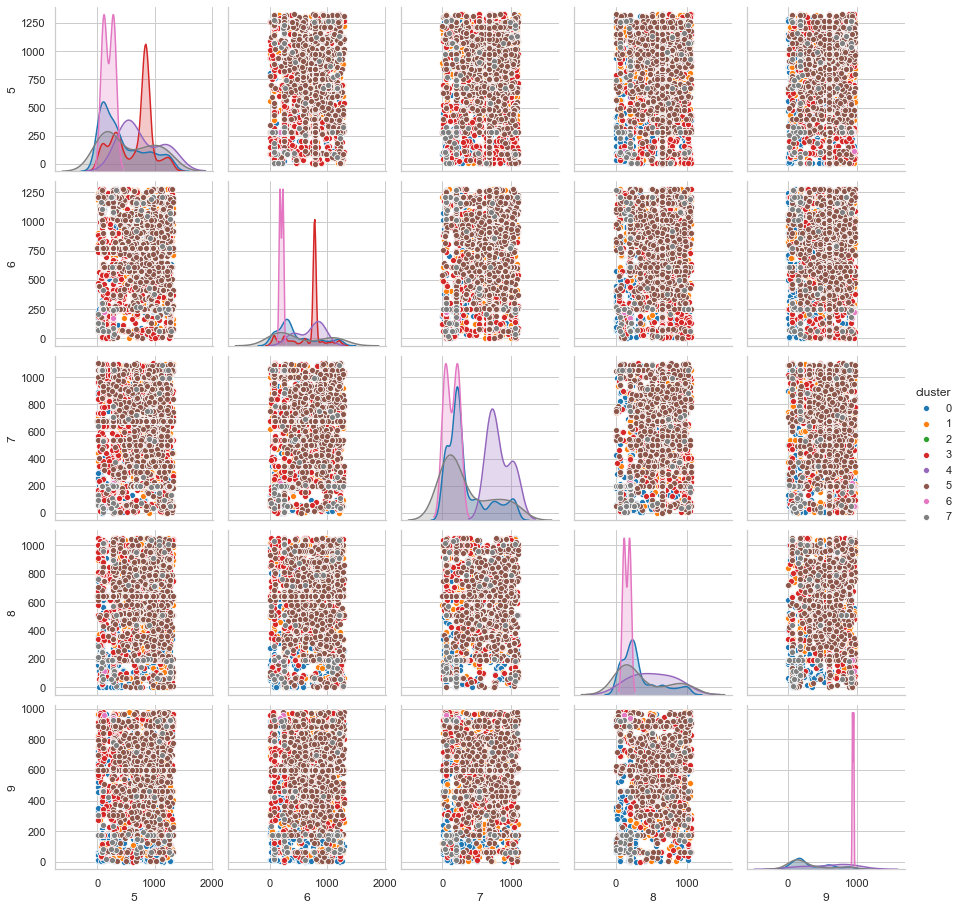

In [458]:
j+=5
sns.pairplot(txt_df[['cluster']+list(txt_df.columns[j:j+5])], hue='cluster')

14684

In [454]:
txt_df1.loc[txt_df[txt_df['cluster']==3].index]

0              1   2       3          4       5       6  \
6528            •  Analogamente,  os  planos  paralelos     aos  planos   
7651   Designamos             π1   o   plano        que  contém      os   
15931           O         centro  de     uma  hipérbole       é       a   

             7    8     9     10   11      12                13     14  \
6528       πXZ    e    πY      Z  são  dados,  respectivamente,    por   
7651    pontos   A,     B      e   C,      π2                 o  plano   
15931  origem,  sua  reta  focal    é      um               dos  eixos   

                15     16      17  18    19          20 21 22    23  24  \
6528      equações     da   forma   y     =           b  e  x     =  a,   
7651   determinado  pelos  pontos  A,     B           e  D  e    π3   o   
15931  coordenados      e     uma  de  suas  assíntotas  é  a  reta  2x   

          25           26     27      28         29 30       31    32    33  \
6528     com            b     6=       0          e  a       6=    0.  None   
7651   plano  determinado  pelos  pontos         A,  C        e  None  None   
15931      −           5y      =      0.  Determine  a  equação  None  None   

         34    35    36    37    38  
6528   None  None  None  None  None  
7651   None  None  None  None  None  
15931  None  None  None  None  None